In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import catboost

%matplotlib inline



In [4]:
# !easy_install --upgrade pip
# !pip install catboost

In [5]:
pd.set_option('max_columns',200)

In [6]:
signed_policy = pd.read_csv('./data_2/isClaim_sign_policy.csv')
claim_list = pd.read_csv('./claim_0702.csv')

In [27]:
signed_policy['Main_Insurance_Coverage_Group'].value_counts()

車責    1253120
車損     318013
竊盜     176809
Name: Main_Insurance_Coverage_Group, dtype: int64

In [40]:
signed_policy.head(20)

Policy_Number  \
0   79110176bf64b5094c19aad785aeac56e36cb609   
1   79110176bf64b5094c19aad785aeac56e36cb609   
2   61a449f6180b23379a584af904d7412205d8ff8c   
3   61a449f6180b23379a584af904d7412205d8ff8c   
4   1a1f5f582bf1ff23467352e8f2fd31acefddc654   
5   1a1f5f582bf1ff23467352e8f2fd31acefddc654   
6   1a1f5f582bf1ff23467352e8f2fd31acefddc654   
7   6b420a887376f4dce53e22e600f2ca56aadec0ee   
8   15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
9   15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
10  15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
11  15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
12  15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
13  15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
14  15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
15  15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
16  15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
17  15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9   
18  8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f   
19  8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f   

                                 Insured's_ID  \
0   Ae03a1ba75867f060504f8ee798d06275a5e5bb9c   
1   Ae03a1ba75867f060504f8ee798d06275a5e5bb9c   
2   J7697af29d66cb8a160fb68b1412ef06716ca4a57   
3   J7697af29d66cb8a160fb68b1412ef06716ca4a57   
4   Fcd3d3578e9ae55aa6140da432f69db2bd0c50fad   
5   Fcd3d3578e9ae55aa6140da432f69db2bd0c50fad   
6   Fcd3d3578e9ae55aa6140da432f69db2bd0c50fad   
7   P1cf232e92478ef7fd1aab3be9f94b3bfe812e422   
8   27a85951576aa3af5b9ed77f0015a2af9853488fe   
9   27a85951576aa3af5b9ed77f0015a2af9853488fe   
10  27a85951576aa3af5b9ed77f0015a2af9853488fe   
11  27a85951576aa3af5b9ed77f0015a2af9853488fe   
12  27a85951576aa3af5b9ed77f0015a2af9853488fe   
13  27a85951576aa3af5b9ed77f0015a2af9853488fe   
14  27a85951576aa3af5b9ed77f0015a2af9853488fe   
15  27a85951576aa3af5b9ed77f0015a2af9853488fe   
16  27a85951576aa3af5b9ed77f0015a2af9853488fe   
17  27a85951576aa3af5b9ed77f0015a2af9853488fe   
18  F0397f0eee8b1f690c354feac8f37851200b98121   
19  F0397f0eee8b1f690c354feac8f37851200b98121   

                         Prior_Policy_Number Cancellation  \
0   e1379d9c360fe4a20027b8acc161ec93f2727e66                
1   e1379d9c360fe4a20027b8acc161ec93f2727e66                
2   a2f57eef440f29783da32b4e3708e0ea5b84b9c4                
3   a2f57eef440f29783da32b4e3708e0ea5b84b9c4                
4   bd864927fc796b75c917ade554c0657d22b860bd                
5   bd864927fc796b75c917ade554c0657d22b860bd                
6   bd864927fc796b75c917ade554c0657d22b860bd                
7   872830c25ddf5ac8a050f25812bd7a14aa1eb9e5                
8   9429254b6bc54ec448c6f7d664b00d04749034d6                
9   9429254b6bc54ec448c6f7d664b00d04749034d6                
10  9429254b6bc54ec448c6f7d664b00d04749034d6                
11  9429254b6bc54ec448c6f7d664b00d04749034d6                
12  9429254b6bc54ec448c6f7d664b00d04749034d6                
13  9429254b6bc54ec448c6f7d664b00d04749034d6                
14  9429254b6bc54ec448c6f7d664b00d04749034d6                
15  9429254b6bc54ec448c6f7d664b00d04749034d6                
16  9429254b6bc54ec448c6f7d664b00d04749034d6                
17  9429254b6bc54ec448c6f7d664b00d04749034d6                
18  b1da972d9c8451df1bb2672c919ef3f6e327e0a3                
19  b1da972d9c8451df1bb2672c919ef3f6e327e0a3                

                          Vehicle_identifier  \
0   a05c4dbcfc92d99e715441b9cd3fcab5ce117be5   
1   a05c4dbcfc92d99e715441b9cd3fcab5ce117be5   
2   6d30feebf8bf0e46af73cd2a1d0649d4f0f83f8a   
3   6d30feebf8bf0e46af73cd2a1d0649d4f0f83f8a   
4   3828f4a4c40ac91647919306d0de0d11043d89fe   
5   3828f4a4c40ac91647919306d0de0d11043d89fe   
6   3828f4a4c40ac91647919306d0de0d11043d89fe   
7   4450ffd7879ec507d2400f346466a9fbbb54d12a   
8   8a57375aeaee76be15a11544079e9b6c768a1d1a   
9   8a57375aeaee76be15a11544079e9b6c768a1d1a   
10  8a57375aeaee76be15a11544079e9b6c768a1d1a   
11  8a57375aeaee76be15a11544079e9b6c768a1d1a   
12  8a57375aeaee76be15a11544079e9b6c768a1d1a   
13  8a57375aeaee76be15a11544079e9b6c76

In [41]:
signed_policy.shape

(1747942, 43)

In [42]:
def mode_method(r):
  
    return r.value_counts().index[0]

In [43]:
# signed_policy[2000:2100].groupby('Policy_Number').agg({'isClaim':['min'],
#                                                 'lia_class':['sum'],
#                                                  'fassured':[mode_method]
#                                                 })

In [16]:
# signed_policy.isnull().sum()

In [15]:
claim_list.head()

Claim_Number  Nature_of_the_claim  \
0  954ff50c11e2c6f6bf91514fdcca98578128da21                    1   
1  954ff50c11e2c6f6bf91514fdcca98578128da21                    1   
2  954ff50c11e2c6f6bf91514fdcca98578128da21                    1   
3  e33ba1121d6772dd84e83b266d66b1a7dea26d71                    1   
4  f26827172ff9528d11c66868cbf57f4e9c2d537c                    1   

                              Policy_Number  Driver's_Gender  \
0  91dc13e4e24dc9e0e0940c63924109e4ff66e18a                1   
1  91dc13e4e24dc9e0e0940c63924109e4ff66e18a                1   
2  91dc13e4e24dc9e0e0940c63924109e4ff66e18a                1   
3  83ec7fa50d3f77f9739f0ce8d0139514e2a5f3e7                2   
4  bb616a58f59cd6d1b51c0343aa2aab2ff03a7b48                2   

   Driver's_Relationship_with_Insured DOB_of_Driver  Marital_Status_of_Driver  \
0                                   3       06/1969                         1   
1                                   3       06/1969                         1   
2                                   3       06/1969                         1   
3                                   2       09/1975                         1   
4                                   2       02/1971                         1   

  Accident_Date                             Cause_of_Loss  Paid_Loss_Amount  \
0       2015/01  17ba0791499db908433b80f37c5fbc89b870084b             56705   
1       2015/01  17ba0791499db908433b80f37c5fbc89b870084b             30000   
2       2015/01  17ba0791499db908433b80f37c5fbc89b870084b              1100   
3       2015/01  17ba0791499db908433b80f37c5fbc89b870084b            151795   
4       2015/01  17ba0791499db908433b80f37c5fbc89b870084b                 0   

   paid_Expenses_Amount  Salvage_or_Subrogation? Coverage  \
0                     0                        0      00I   
1                   700                        0      16P   
2                     0                        0      16G   
3                   700                        0      16G   
4                     0                        0      16P   

                         Vehicle_identifier  At_Fault?  \
0  86ada5177903be297607713f3e0128e7b3f8a839      100.0   
1  86ada5177903be297607713f3e0128e7b3f8a839      100.0   
2  86ada5177903be297607713f3e0128e7b3f8a839      100.0   
3  0baf14fc451d6fef13ac82be90523fa7805df093      100.0   
4  34209497dbd08b03d61c532acf939cd1f194bfd2      100.0   

   Claim_Status_(close,_open,_reopen_etc)  Deductible  \
0                                       1        3000   
1                                       1           0   
2                                       1           0   
3                                       1           0   
4                                       1           0   

                              Accident_area  number_of_claimants  \
0  356a192b7913b04c54574d18c28d46e6395428ab                1.981   
1  356a192b7913b04c54574d18c28d46e6395428ab                1.981   
2  356a192b7913b04c54574d18c28d46e6395428ab                1.981   
3  a17554a0d2b15a664c0e73900184544f19e70227                1.981   
4  511a418e72591eb7e33f703f04c3fa16df6c90bd                1.981   

  Accident_Time                                         Pn_IC  
0         08:00  91dc13e4e24dc9e0e0940c63924109e4ff66e18a/00I  
1         08:00  91dc13e4e24dc9e0e0940c63924109e4ff66e18a/16P  
2         08:00  91dc13e4e24dc9e0e0940c63924109e4ff66e18a/16G  
3         08:00  83ec7fa50d3f77f9739f0ce8d0139514e2a5f3e7/16G  
4         08:00  bb616a58f59cd6d1b51c0343aa2aab2ff03a7b48/16P

In [7]:
claim_list['Pn_IC'] = claim_list['Policy_Number']+'/'+claim_list['Coverage']

In [8]:
claim_policy = signed_policy[signed_policy['isClaim'] ==1]
noclaim_policy = signed_policy[signed_policy['isClaim'] ==0]

In [46]:
# noclaim_policy

# At_Fault?補值 補眾數

In [47]:
claim_list['At_Fault?'].loc[claim_list['At_Fault?'].isnull()]=100.0

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [167]:
# claim_list.isnull().sum()

In [61]:
claim_list["Driver's_Relationship_with_Insured"].value_counts()

1.0      30107
2.0      15066
5.0      10127
3.0       8231
6.0       4653
7.0       1312
4.0         78
100.0       39
Name: Driver's_Relationship_with_Insured, dtype: int64

In [30]:
claim_list.head()

Claim_Number  Nature_of_the_claim  \
0  954ff50c11e2c6f6bf91514fdcca98578128da21                    1   
1  954ff50c11e2c6f6bf91514fdcca98578128da21                    1   
2  954ff50c11e2c6f6bf91514fdcca98578128da21                    1   
3  e33ba1121d6772dd84e83b266d66b1a7dea26d71                    1   
4  f26827172ff9528d11c66868cbf57f4e9c2d537c                    1   

                              Policy_Number  Driver's_Gender  \
0  91dc13e4e24dc9e0e0940c63924109e4ff66e18a                1   
1  91dc13e4e24dc9e0e0940c63924109e4ff66e18a                1   
2  91dc13e4e24dc9e0e0940c63924109e4ff66e18a                1   
3  83ec7fa50d3f77f9739f0ce8d0139514e2a5f3e7                2   
4  bb616a58f59cd6d1b51c0343aa2aab2ff03a7b48                2   

   Driver's_Relationship_with_Insured DOB_of_Driver  Marital_Status_of_Driver  \
0                                   3       06/1969                         1   
1                                   3       06/1969                         1   
2                                   3       06/1969                         1   
3                                   2       09/1975                         1   
4                                   2       02/1971                         1   

  Accident_Date                             Cause_of_Loss  Paid_Loss_Amount  \
0       2015/01  17ba0791499db908433b80f37c5fbc89b870084b             56705   
1       2015/01  17ba0791499db908433b80f37c5fbc89b870084b             30000   
2       2015/01  17ba0791499db908433b80f37c5fbc89b870084b              1100   
3       2015/01  17ba0791499db908433b80f37c5fbc89b870084b            151795   
4       2015/01  17ba0791499db908433b80f37c5fbc89b870084b                 0   

   paid_Expenses_Amount  Salvage_or_Subrogation? Coverage  \
0                     0                        0      00I   
1                   700                        0      16P   
2                     0                        0      16G   
3                   700                        0      16G   
4                     0                        0      16P   

                         Vehicle_identifier  At_Fault?  \
0  86ada5177903be297607713f3e0128e7b3f8a839      100.0   
1  86ada5177903be297607713f3e0128e7b3f8a839      100.0   
2  86ada5177903be297607713f3e0128e7b3f8a839      100.0   
3  0baf14fc451d6fef13ac82be90523fa7805df093      100.0   
4  34209497dbd08b03d61c532acf939cd1f194bfd2      100.0   

   Claim_Status_(close,_open,_reopen_etc)  Deductible  \
0                                       1        3000   
1                                       1           0   
2                                       1           0   
3                                       1           0   
4                                       1           0   

                              Accident_area  number_of_claimants  \
0  356a192b7913b04c54574d18c28d46e6395428ab                1.981   
1  356a192b7913b04c54574d18c28d46e6395428ab                1.981   
2  356a192b7913b04c54574d18c28d46e6395428ab                1.981   
3  a17554a0d2b15a664c0e73900184544f19e70227                1.981   
4  511a418e72591eb7e33f703f04c3fa16df6c90bd                1.981   

  Accident_Time                                         Pn_IC  
0         08:00  91dc13e4e24dc9e0e0940c63924109e4ff66e18a/00I  
1         08:00  91dc13e4e24dc9e0e0940c63924109e4ff66e18a/16P  
2         08:00  91dc13e4e24dc9e0e0940c63924109e4ff66e18a/16G  
3         08:00  83ec7fa50d3f77f9739f0ce8d0139514e2a5f3e7/16G  
4         08:00  bb616a58f59cd6d1b51c0343aa2aab2ff03a7b48/16P

In [166]:
# claim_list['Accident_area'].value_counts()

In [72]:
claim_table = claim_list.groupby('Pn_IC').agg({'Accident_area':[mode_method],
                                                'Deductible':['sum'],
                                                'At_Fault?':[mode_method],
                                                
                                                'Salvage_or_Subrogation?':['sum'],
                                                'paid_Expenses_Amount':['sum'],
                                                'Paid_Loss_Amount':['sum'],
                                                'Cause_of_Loss':[mode_method],
                                                'Marital_Status_of_Driver':[mode_method],
                                                'DOB_of_Driver':[mode_method],
                                                "Driver's_Relationship_with_Insured":[mode_method],
                                                "Driver's_Gender":[mode_method]})



In [76]:
test = claim_table.copy()

In [84]:
claim_table.columns = ['Accident_area', 'Deductible', 'At_Fault?', 'Salvage_or_Subrogation?', 'paid_Expenses_Amount', 'Paid_Loss_Amount', 'Cause_of_Loss', 'Marital_Status_of_Driver', 'DOB_of_Driver', "Driver's_Relationship_with_Insured", "Driver's_Gender"]



# read claim_table

In [82]:
test.to_csv('./data_2/claim_table.csv',index=False)

In [183]:
claim_table = pd.read_csv('./data_2/claim_table.csv')
claim_merge = pd.read_csv('./data_2/claim_merge.csv')

# 合併claim data

In [184]:
# claim_policy

In [185]:
# claim_merge.isnull().sum()

In [186]:
claim_merge.shape

(53769, 54)

# 先用xgboost測,把所有claim noclaim data集成

In [187]:
claim_merge.shape

(53769, 54)

In [188]:
noclaim_policy.shape

(1694173, 43)

In [189]:
all_train_test_policy = claim_merge.append(noclaim_policy,sort=True)

In [123]:
all_train_test_policy.isnull().sum()

Accident_area                                 1694173
At_Fault?                                     1694173
Cancellation                                        0
Cause_of_Loss                                 1694173
Coding_of_Vehicle_Branding_&_Type                   0
Coverage_Deductible_if_applied                      0
DOB_of_Driver                                 1694173
Deductible                                    1694173
Distribution_Channel                                0
Driver's_Gender                               1694173
Driver's_Relationship_with_Insured            1694173
Engine_Displacement_(Cubic_Centimeter)              0
Imported_or_Domestic_Car                            0
Insurance_Coverage                                  0
Insured's_ID                                        0
Insured_Amount1                                     0
Insured_Amount2                                     0
Insured_Amount3                                     0
Main_Insurance_Coverage_Grou

# 補差值

In [164]:
# all_train_test_policy.isnull().sum()

In [123]:
all_train_test_policy['Main_Insurance_Coverage_Group'].value_counts()

車責    1253120
車損     318013
竊盜     176809
Name: Main_Insurance_Coverage_Group, dtype: int64

In [104]:
# all_train_test_policy.loc[all_train_test_policy['fmarriage']==3]

In [124]:
all_train_test_policy['fmarriage'].loc[all_train_test_policy['fmarriage']==' ']=3
all_train_test_policy['fsex'].loc[all_train_test_policy['fsex']==' ']=3
all_train_test_policy['fmarriage'] = all_train_test_policy['fmarriage'].fillna(3)
all_train_test_policy['fsex'] = all_train_test_policy['fsex'].fillna(3)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# 新增column (get dummy)

> 根據Prior_Policy_Number 新增之前有無保險 

In [125]:
def determin_prior(r):
    if isinstance(r,float):
        return 0
    return 1

In [126]:
all_train_test_policy['has_Prior_Policy'] = all_train_test_policy['Prior_Policy_Number'].apply(determin_prior)

> 新增car age

In [127]:
all_train_test_policy['car_age'] = 2017 - all_train_test_policy['Manafactured_Year_and_Month']

> 新增age

In [128]:
all_train_test_policy['age'] = 2017 - all_train_test_policy['ibirth'].str.split('/').str[1].astype(float)

In [97]:
train_set[train_set['Policy_Number']=='79110176bf64b5094c19aad785aeac56e36cb609']

Policy_Number  Next_Premium
14  79110176bf64b5094c19aad785aeac56e36cb609          2412

In [49]:
all_train_test_policy[['Policy_Number','lia_class','plia_acc','pdmg_acc','Premium','isClaim','Main_Insurance_Coverage_Group']][all_train_test_policy['isClaim']==0]

Policy_Number  lia_class  plia_acc  \
0        79110176bf64b5094c19aad785aeac56e36cb609          3     -0.10   
1        79110176bf64b5094c19aad785aeac56e36cb609          3     -0.10   
2        61a449f6180b23379a584af904d7412205d8ff8c          1     -0.30   
3        61a449f6180b23379a584af904d7412205d8ff8c          1     -0.30   
4        1a1f5f582bf1ff23467352e8f2fd31acefddc654          6      0.30   
5        1a1f5f582bf1ff23467352e8f2fd31acefddc654          6      0.30   
6        1a1f5f582bf1ff23467352e8f2fd31acefddc654          6      0.30   
7        6b420a887376f4dce53e22e600f2ca56aadec0ee          4      0.00   
8        15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
9        15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
10       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
11       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
12       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
13       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
14       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
15       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
16       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
17       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
18       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
19       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
20       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
21       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
22       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
23       17ccb5ec55e642270298b3bbc959ff7c0ecfa6b1         -1     -0.38   
24       17ccb5ec55e642270298b3bbc959ff7c0ecfa6b1         -1     -0.38   
25       9f4f41b3412390a9cb4b125f61aee2626317d34f         -1     -0.38   
26       9f4f41b3412390a9cb4b125f61aee2626317d34f         -1     -0.38   
27       9f4f41b3412390a9cb4b125f61aee2626317d34f         -1     -0.38   
28       9f4f41b3412390a9cb4b125f61aee2626317d34f         -1     -0.38   
29       8004afed773c3ca2f9187cf035a89be9f65cadae          1     -0.30   
...                                           ...        ...       ...   
1747912  4d34ebbc125798d39e7ffeab047eaf088b899521         -1     -0.38   
1747913  4d34ebbc125798d39e7ffeab047eaf088b899521         -1     -0.38   
1747914  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747915  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747916  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747917  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747918  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747919  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747920  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747921  6a1781cc21d75845d99c941db243514dd19fd77a         -1     -0.38   
1747922  6a1781cc21d75845d99c941db243514dd19fd77a         -1     -0.38   
1747923  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747924  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747925  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747926  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747927  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747928  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747929  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747930  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747931  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747932  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747933  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747934  49637ef686406689e4b0e61dad183d0

In [39]:
all_train_test_policy[['Policy_Number','lia_class','plia_acc','pdmg_acc','Premium','isClaim','Main_Insurance_Coverage_Group']][all_train_test_policy['isClaim']==0]



Policy_Number  lia_class  plia_acc  \
0        79110176bf64b5094c19aad785aeac56e36cb609          3     -0.10   
1        79110176bf64b5094c19aad785aeac56e36cb609          3     -0.10   
2        61a449f6180b23379a584af904d7412205d8ff8c          1     -0.30   
3        61a449f6180b23379a584af904d7412205d8ff8c          1     -0.30   
4        1a1f5f582bf1ff23467352e8f2fd31acefddc654          6      0.30   
5        1a1f5f582bf1ff23467352e8f2fd31acefddc654          6      0.30   
6        1a1f5f582bf1ff23467352e8f2fd31acefddc654          6      0.30   
7        6b420a887376f4dce53e22e600f2ca56aadec0ee          4      0.00   
8        15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
9        15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
10       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
11       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
12       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
13       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
14       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
15       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
16       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
17       15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9          0     -0.35   
18       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
19       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
20       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
21       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
22       8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f         -1     -0.38   
23       17ccb5ec55e642270298b3bbc959ff7c0ecfa6b1         -1     -0.38   
24       17ccb5ec55e642270298b3bbc959ff7c0ecfa6b1         -1     -0.38   
25       9f4f41b3412390a9cb4b125f61aee2626317d34f         -1     -0.38   
26       9f4f41b3412390a9cb4b125f61aee2626317d34f         -1     -0.38   
27       9f4f41b3412390a9cb4b125f61aee2626317d34f         -1     -0.38   
28       9f4f41b3412390a9cb4b125f61aee2626317d34f         -1     -0.38   
29       8004afed773c3ca2f9187cf035a89be9f65cadae          1     -0.30   
...                                           ...        ...       ...   
1747912  4d34ebbc125798d39e7ffeab047eaf088b899521         -1     -0.38   
1747913  4d34ebbc125798d39e7ffeab047eaf088b899521         -1     -0.38   
1747914  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747915  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747916  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747917  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747918  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747919  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747920  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747921  6a1781cc21d75845d99c941db243514dd19fd77a         -1     -0.38   
1747922  6a1781cc21d75845d99c941db243514dd19fd77a         -1     -0.38   
1747923  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747924  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747925  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747926  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747927  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747928  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747929  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747930  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747931  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747932  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747933  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747934  49637ef686406689e4b0e61dad183d0

In [35]:
all_train_test_policy[['Policy_Number','lia_class','plia_acc','pdmg_acc','Premium','isClaim','Main_Insurance_Coverage_Group']]



Policy_Number  lia_class  plia_acc  \
0        e8ce526c61030175b6191f82554bd1847e7ae0e6         -1     -0.38   
1        e8ce526c61030175b6191f82554bd1847e7ae0e6         -1     -0.38   
2        88e2fb95af950a7b40eb2c8ad8fcf45626c65364         -1     -0.38   
3        88e2fb95af950a7b40eb2c8ad8fcf45626c65364         -1     -0.38   
4        2eac2a88c232a7eee944141b094f7fe337526241         -1     -0.38   
5        2eac2a88c232a7eee944141b094f7fe337526241         -1     -0.38   
6        95a448bb0abab8e778bbd79357dd99fb85ac125a          4      0.00   
7        ca5b7e36ca95bb23753f9e546651f812dc14c902          3     -0.10   
8        60d3930f509c07a9bb7edffa9e9a63543b37158e          3     -0.10   
9        81d3f97a4204e665337308591cf0d50a3abe780e          4      0.00   
10       81d3f97a4204e665337308591cf0d50a3abe780e          4      0.00   
11       2042c343e7fe6f828afa563cdd7d10aba01cdadc          1     -0.30   
12       a8b4bc9d539f5acbe78dd4981db56a534e2ae4f8         -1     -0.38   
13       a8b4bc9d539f5acbe78dd4981db56a534e2ae4f8         -1     -0.38   
14       a8b4bc9d539f5acbe78dd4981db56a534e2ae4f8         -1     -0.38   
15       c71e24fd582e6c16144303ee87c38721a6f5de82          0     -0.35   
16       c71e24fd582e6c16144303ee87c38721a6f5de82          0     -0.35   
17       c71e24fd582e6c16144303ee87c38721a6f5de82          0     -0.35   
18       ad97f9ad0d6fb719d6243ea9f905c66569455739          0     -0.35   
19       ad97f9ad0d6fb719d6243ea9f905c66569455739          0     -0.35   
20       73f786409371150259ce88c12422a03022d800ae          2     -0.20   
21       1092946d332b16ec80c731ba7b47bab5c8b355fe          2     -0.20   
22       8954cb64bd79db1f3a22fc8cfa53baf4651e3844          2     -0.20   
23       7b703bad7d6225fa9ff0b6e50f07077925aef6ba         -1     -0.38   
24       eb39c038fb9834a1358622258a19c7e4012d0f57         -1     -0.38   
25       eb39c038fb9834a1358622258a19c7e4012d0f57         -1     -0.38   
26       7eb1dd3e5ac90209012a3e9aef0f9e67382375df          1     -0.30   
27       b2f0ad6908219151a9fe0ee70ab62e40f06a9be1         -1     -0.38   
28       f16e1f616e986b75a73d97b381b99488d1a0a5ab         -1     -0.38   
29       90bdaa80b8dc1936e50665ff3a62b53815618a8e         -1     -0.38   
...                                           ...        ...       ...   
1747912  4d34ebbc125798d39e7ffeab047eaf088b899521         -1     -0.38   
1747913  4d34ebbc125798d39e7ffeab047eaf088b899521         -1     -0.38   
1747914  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747915  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747916  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747917  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747918  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747919  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747920  f4a55c56808e42646b6c1bebe8c5af642d258409          1     -0.30   
1747921  6a1781cc21d75845d99c941db243514dd19fd77a         -1     -0.38   
1747922  6a1781cc21d75845d99c941db243514dd19fd77a         -1     -0.38   
1747923  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747924  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747925  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747926  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747927  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747928  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747929  e0f99b8f745cf4b7d294009bde44051312ae6810          1     -0.30   
1747930  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747931  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747932  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747933  49637ef686406689e4b0e61dad183d0fc123fc8b          6      0.30   
1747934  49637ef686406689e4b0e61dad183d0

In [40]:
all_train_test_policy['plia_acc'].value_counts()

-0.38    933354
-0.30    169871
-0.20    160410
 0.00    143567
-0.10    139563
-0.35    137179
 0.10     23190
 0.30     16433
 0.50     12252
 0.70      4427
 0.90      3059
 1.20      1868
 1.50       835
 1.80       790
 2.10       407
 2.40       215
 2.80       191
 3.20       145
 4.20        74
 4.70        68
 3.70        44
Name: plia_acc, dtype: int64

> getdummy Main_Insurance_Coverage_Group: 車責 車損 竊盜

## 看偏態的column

In [220]:
skew_cols = ['age','car_age','Engine_Displacement_(Cubic_Centimeter)','Paid_Loss_Amount','Replacement_cost_of_insured_vehicle',
            'Salvage_or_Subrogation?','paid_Expenses_Amount']

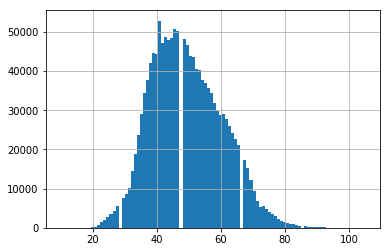

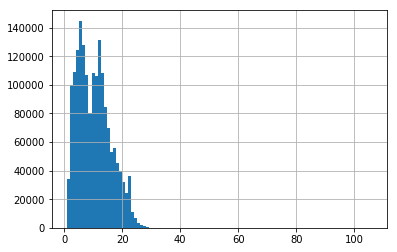

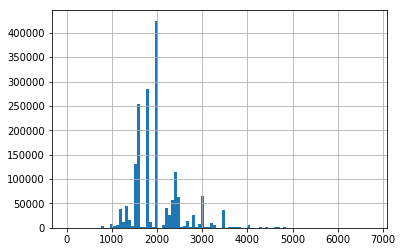

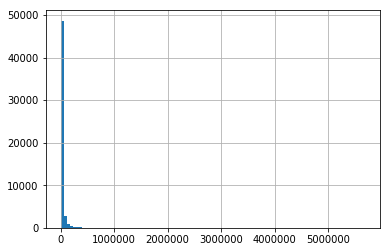

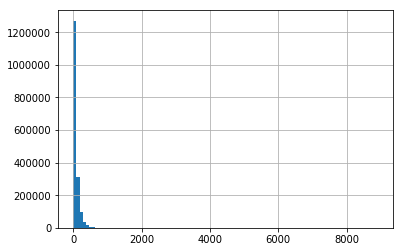

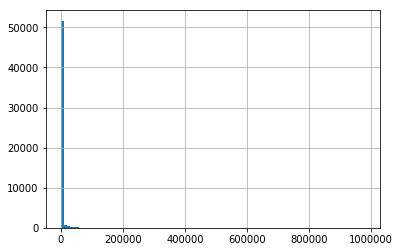

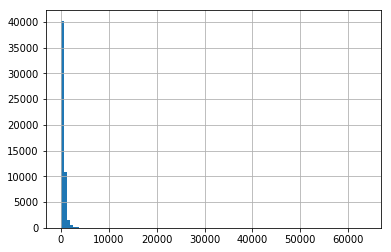

In [221]:
for col in skew_cols:
    all_train_test_policy[col].hist(bins=100)
    plt.show()

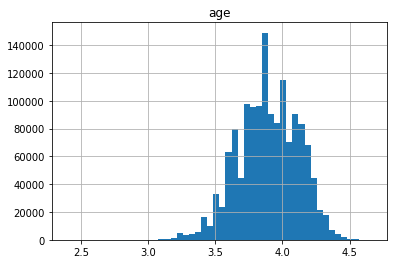

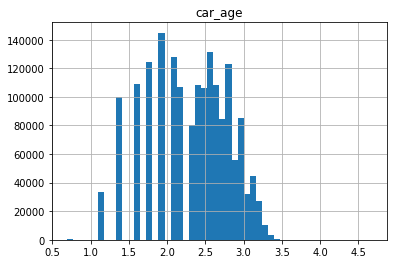

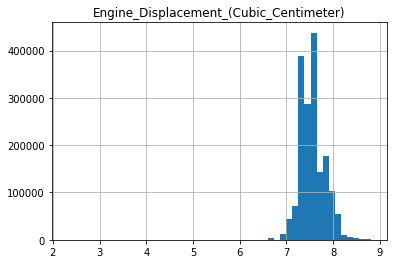

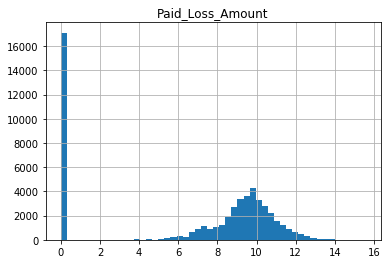

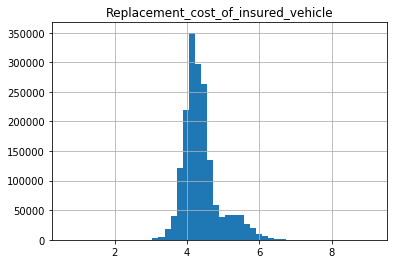

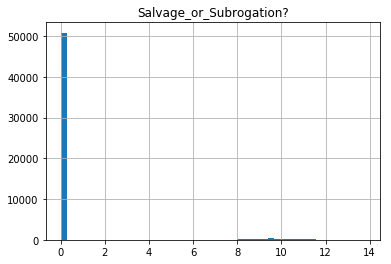

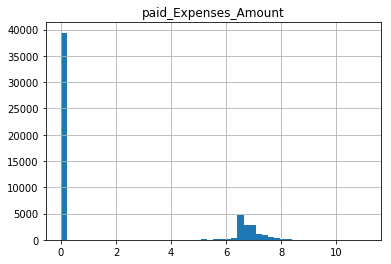

In [223]:
for col in skew_cols:
    pd.DataFrame(np.log1p(all_train_test_policy[col])).hist(bins=50)
    

In [225]:
for col in skew_cols:
    all_train_test_policy[col] = np.log1p(all_train_test_policy[col])

(1747942, 84)

In [131]:
def create_dummy(df,cols):
    res = df.copy()
    for col in cols:
        temp = pd.get_dummies(res[col],prefix=col+'_')
        res = pd.concat((res,temp),axis=1)
    return res
        

In [140]:
dummy_cols = ['Main_Insurance_Coverage_Group','Cancellation','Imported_or_Domestic_Car','fassured','fsex','fmarriage','has_Prior_Policy']



In [141]:
all_train_test_policy = create_dummy(all_train_test_policy,dummy_cols)

In [170]:
all_train_test_policy_dummy = all_train_test_policy
all_train_test_policy_dummy.to_csv('./data_2/all_train_test_policy_dummy.csv',index=False)

# 取要用的column

In [8]:
# all_train_test_policy['Paid_Loss_Amount'].value_counts()

In [99]:
all_train_test_policy.columns

Index(['Accident_area', 'At_Fault?', 'Cancellation', 'Cause_of_Loss',
       'Coding_of_Vehicle_Branding_&_Type', 'Coverage_Deductible_if_applied',
       'DOB_of_Driver', 'Deductible', 'Distribution_Channel',
       'Driver's_Gender', 'Driver's_Relationship_with_Insured',
       'Engine_Displacement_(Cubic_Centimeter)', 'Imported_or_Domestic_Car',
       'Insurance_Coverage', 'Insured's_ID', 'Insured_Amount1',
       'Insured_Amount2', 'Insured_Amount3', 'Main_Insurance_Coverage_Group',
       'Manafactured_Year_and_Month', 'Marital_Status_of_Driver',
       'Multiple_Products_with_TmNewa_(Yes_or_No?)', 'Paid_Loss_Amount',
       'Pn_IC', 'Policy_Number', 'Premium', 'Prior_Policy_Number',
       'Replacement_cost_of_insured_vehicle', 'Salvage_or_Subrogation?',
       'Vehicle_Make_and_Model1', 'Vehicle_Make_and_Model2',
       'Vehicle_identifier', 'aassured_zip', 'dbirth', 'fassured',
       'fequipment1', 'fequipment2', 'fequipment3', 'fequipment4',
       'fequipment5', 'fequipment

In [162]:
use_cols = ['At_Fault?',
       'Engine_Displacement_(Cubic_Centimeter)',
       'Multiple_Products_with_TmNewa_(Yes_or_No?)', 'Paid_Loss_Amount',
        'Policy_Number', 'Premium',
       'Replacement_cost_of_insured_vehicle', 'Salvage_or_Subrogation?',
       'paid_Expenses_Amount', 'age', 'car_age',
       'Main_Insurance_Coverage_Group__竊盜',
       'Main_Insurance_Coverage_Group__車損',
       'Main_Insurance_Coverage_Group__車責', 'Cancellation__ ',
       'Cancellation__Y', 'Imported_or_Domestic_Car__10',
       'Imported_or_Domestic_Car__20', 'Imported_or_Domestic_Car__21',
       'Imported_or_Domestic_Car__22', 'Imported_or_Domestic_Car__23',
       'Imported_or_Domestic_Car__24', 'Imported_or_Domestic_Car__30',
       'Imported_or_Domestic_Car__40', 'Imported_or_Domestic_Car__50',
       'Imported_or_Domestic_Car__90', 'fassured__1', 'fassured__2',
       'fassured__3', 'fassured__6', 'fsex__3', 'fsex__1', 'fsex__2',
       'fmarriage__3', 'fmarriage__1', 'fmarriage__2']

In [230]:
sum_op = ['Multiple_Products_with_TmNewa_(Yes_or_No?)','Main_Insurance_Coverage_Group__竊盜',
       'Main_Insurance_Coverage_Group__車損','Premium','Paid_Loss_Amount','Replacement_cost_of_insured_vehicle',
          'Salvage_or_Subrogation?','paid_Expenses_Amount',
       'Main_Insurance_Coverage_Group__車責', 'Cancellation__ ',
       'Cancellation__Y', 'Imported_or_Domestic_Car__10',
       'Imported_or_Domestic_Car__20', 'Imported_or_Domestic_Car__21',
       'Imported_or_Domestic_Car__22', 'Imported_or_Domestic_Car__23',
       'Imported_or_Domestic_Car__24', 'Imported_or_Domestic_Car__30',
       'Imported_or_Domestic_Car__40', 'Imported_or_Domestic_Car__50',
       'Imported_or_Domestic_Car__90', 'fassured__1', 'fassured__2',
       'fassured__3', 'fassured__6', 'fsex__3', 'fsex__1', 'fsex__2',
       'fmarriage__3', 'fmarriage__1', 'fmarriage__2', 'has_Prior_Policy__0',
       'has_Prior_Policy__1']
mean_op=['At_Fault?','age','car_age']

In [231]:
all_train_test_policy_sum_op = all_train_test_policy.groupby('Policy_Number')[sum_op].sum()
all_train_test_policy_mean_op = all_train_test_policy.groupby('Policy_Number')[mean_op].mean()

In [183]:
# all_train_test_policy_sum_op['Paid_Loss_Amount'].value_counts()

In [184]:
# all_train_test_policy["Multiple_Products_with_TmNewa_(Yes_or_No?)"].value_counts()

In [232]:
all_train_test_policy_append = pd.concat( (all_train_test_policy_sum_op,all_train_test_policy_mean_op),axis=1)



In [190]:
 all_train_test_policy_append = all_train_test_policy.groupby('Policy_Number').sum()

In [138]:
# all_train_test_policy = all_train_test_policy.fillna(0)

In [105]:
# all_train_test_policy.groupby('Policy_Number').sum()

# 排序data

In [191]:
all_train_test_policy_append.shape

(351273, 31)

In [135]:
# all_train_test_policy_append.isnull().sum()

> 讀進訓練測試集

In [192]:
train_set = pd.read_csv('./training-set.csv')
test_set = pd.read_csv('./testing-set.csv')

split_idx = len(train_set)

all_set = train_set.append(test_set)
all_set = all_set.reset_index(drop=True)

mapping_order = dict(zip(all_set['Policy_Number'].values,all_set.index))
mapping_premium = dict(zip(all_set['Policy_Number'].values,all_set['Next_Premium'].values))

> sort

In [193]:
all_train_test_policy_append['Policy_Number'] = all_train_test_policy_append.index

In [194]:
all_train_test_policy_append['order'] = all_train_test_policy_append['Policy_Number'].map(mapping_order)
all_train_test_policy_append['Next_Premium'] = all_train_test_policy_append['Policy_Number'].map(mapping_premium)

In [195]:
all_train_test_policy_append = all_train_test_policy_append.sort_values('order')
all_train_test_policy_append = all_train_test_policy_append.reset_index(drop=True)
all_train_test_policy_append.to_csv('./data_2/train_test_already.csv',index=False)

# load 準備要train的data

In [234]:
all_train_test_policy_append = pd.read_csv('./data_2/train_test_already.csv')

In [235]:
all_train_test_policy_append.isnull().sum()

At_Fault?                                     0
Coverage_Deductible_if_applied                0
Deductible                                    0
Driver's_Gender                               0
Driver's_Relationship_with_Insured            0
Engine_Displacement_(Cubic_Centimeter)        0
Imported_or_Domestic_Car                      0
Insured_Amount1                               0
Insured_Amount2                               0
Insured_Amount3                               0
Manafactured_Year_and_Month                   0
Marital_Status_of_Driver                      0
Multiple_Products_with_TmNewa_(Yes_or_No?)    0
Paid_Loss_Amount                              0
Premium                                       0
Replacement_cost_of_insured_vehicle           0
Salvage_or_Subrogation?                       0
fassured                                      0
fequipment1                                   0
fequipment2                                   0
fequipment3                             

In [236]:
all_train_test_policy_append.shape

(351273, 34)

In [237]:
train_set.head()

Policy_Number  Next_Premium
0  8e31b2f7864ddeac1be3a31766b0bf2c54908d37          4414
1  3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda          8236
2  9864c955e499d1fa908f5dc7292054a232f01722          6153
3  92170afa649706baf10774dc0a46e67617c0d50d         12135
4  d16c11ef69f5f6bac02ed18fb1e372394563697f          4345

In [238]:
# all_train_test_policy_append['Next_Premium'] = np.log1p(all_train_test_policy_append['Next_Premium'])

In [239]:
training_data = all_train_test_policy_append[:split_idx]
testing_data = all_train_test_policy_append[split_idx:]

In [240]:
training_data = training_data.drop(['Policy_Number','order'],axis=1)
testing_data = testing_data.drop(['Policy_Number','order','Next_Premium'],axis=1)

In [227]:
# training_data['Next_Premium'][training_data['Next_Premium']>160000]

In [228]:
drop_idx= training_data['Next_Premium'][training_data['Next_Premium']==0].index

In [231]:
training_data = training_data.drop([ 46018,  46782,  65019,  66866,  67491,  70273,  70885,  71694,
             73380,  74913,  82977,  97377, 100101, 106145, 152512, 201690],axis=0)

In [232]:
training_data = training_data.drop(drop_idx,axis=0)

In [14]:
# training_data['Next_Premium'] = np.log1p(training_data['Next_Premium'])

In [229]:


testing_data_values = testing_data.values

In [233]:
X_train_data.shape

(164537, 31)

# training data , testing data

In [241]:
X_train_data = training_data.drop(['Next_Premium'],axis=1).values
y_train_data = training_data['Next_Premium'].values

In [297]:
model_cat = CatBoostRegressor(iterations=35000,
learning_rate=200,loss_function='MAE')

In [243]:
# CatBoostRegressor?

In [247]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_data,y_train_data,test_size=0.2,random_state=42)

In [287]:
model_cat

In [298]:
model_cat.fit(X_train_data,y_train_data,
             early_stopping_rounds=10000,
             use_best_model=True,
             eval_set=[(X_test_,y_test_)],
#             save_snapshot=True,
#               snapshot_file='./catboost_info/continous'
             )

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
0:	learn: 5049.6484712	test: 5100.4441951	best: 5100.4441951 (0)	total: 111ms	remaining: 1h 4m 33s
1:	learn: 5006.4227530	test: 5057.0788494	best: 5057.0788494 (1)	total: 319ms	remaining: 1h 32m 54s
2:	learn: 4971.3261776	test: 5021.5889536	best: 5021.5889536 (2)	total: 620ms	remaining: 2h 36s
3:	learn: 4928.4982434	test: 4978.6418183	best: 4978.6418183 (3)	total: 799ms	remaining: 1h 56m 26s
4:	learn: 4893.9116557	test: 4943.7168543	best: 4943.7168543 (4)	total: 1s	remaining: 1h 57m 10s
5:	learn: 4852.3979505	test: 4901.919458

77:	learn: 2868.0428705	test: 2902.6509125	best: 2902.6509125 (77)	total: 14.3s	remaining: 1h 46m 28s
78:	learn: 2854.2876628	test: 2888.8361781	best: 2888.8361781 (78)	total: 14.5s	remaining: 1h 46m 33s
79:	learn: 2841.1822406	test: 2875.6420330	best: 2875.6420330 (79)	total: 14.7s	remaining: 1h 46m 42s
80:	learn: 2828.0763229	test: 2862.4931405	best: 2862.4931405 (80)	total: 14.9s	remaining: 1h 46m 47s
81:	learn: 2815.3586186	test: 2849.6689143	best: 2849.6689143 (81)	total: 15.1s	remaining: 1h 46m 53s
82:	learn: 2802.5917531	test: 2836.9572102	best: 2836.9572102 (82)	total: 15.3s	remaining: 1h 46m 58s
83:	learn: 2789.9013215	test: 2824.1369649	best: 2824.1369649 (83)	total: 15.5s	remaining: 1h 47m 5s
84:	learn: 2777.4158760	test: 2811.6309339	best: 2811.6309339 (84)	total: 15.6s	remaining: 1h 47m 8s
85:	learn: 2765.7309651	test: 2799.7958095	best: 2799.7958095 (85)	total: 15.8s	remaining: 1h 46m 41s
86:	learn: 2753.8255456	test: 2787.8034081	best: 2787.8034081 (86)	total: 16s	remain

157:	learn: 2277.3817264	test: 2307.4297483	best: 2307.4297483 (157)	total: 28.5s	remaining: 1h 44m 48s
158:	learn: 2273.7914926	test: 2303.7097311	best: 2303.7097311 (158)	total: 28.7s	remaining: 1h 44m 51s
159:	learn: 2269.5481332	test: 2299.4477451	best: 2299.4477451 (159)	total: 28.8s	remaining: 1h 44m 38s
160:	learn: 2266.0363601	test: 2295.9274108	best: 2295.9274108 (160)	total: 29s	remaining: 1h 44m 39s
161:	learn: 2262.2761993	test: 2292.1000896	best: 2292.1000896 (161)	total: 29.2s	remaining: 1h 44m 43s
162:	learn: 2258.1907661	test: 2287.9786700	best: 2287.9786700 (162)	total: 29.4s	remaining: 1h 44m 47s
163:	learn: 2255.2485032	test: 2284.9610162	best: 2284.9610162 (163)	total: 29.5s	remaining: 1h 44m 30s
164:	learn: 2251.5384298	test: 2281.1766098	best: 2281.1766098 (164)	total: 29.7s	remaining: 1h 44m 34s
165:	learn: 2248.1531801	test: 2277.8136120	best: 2277.8136120 (165)	total: 29.9s	remaining: 1h 44m 37s
166:	learn: 2245.0680076	test: 2274.7042104	best: 2274.7042104 (16

237:	learn: 2070.9781280	test: 2096.1648449	best: 2096.1648449 (237)	total: 42.8s	remaining: 1h 44m 5s
238:	learn: 2068.9149668	test: 2094.0875446	best: 2094.0875446 (238)	total: 43s	remaining: 1h 44m 7s
239:	learn: 2067.0657629	test: 2092.2082277	best: 2092.2082277 (239)	total: 43.2s	remaining: 1h 44m 9s
240:	learn: 2065.7212742	test: 2090.8435430	best: 2090.8435430 (240)	total: 43.3s	remaining: 1h 43m 58s
241:	learn: 2063.7428242	test: 2088.8639801	best: 2088.8639801 (241)	total: 43.4s	remaining: 1h 43m 49s
242:	learn: 2062.3100948	test: 2087.4059845	best: 2087.4059845 (242)	total: 43.6s	remaining: 1h 43m 52s
243:	learn: 2060.5058823	test: 2085.4974001	best: 2085.4974001 (243)	total: 43.8s	remaining: 1h 43m 53s
244:	learn: 2058.9132284	test: 2083.8203124	best: 2083.8203124 (244)	total: 44s	remaining: 1h 43m 55s
245:	learn: 2057.2381147	test: 2082.1130691	best: 2082.1130691 (245)	total: 44.2s	remaining: 1h 43m 58s
246:	learn: 2055.5141698	test: 2080.3294454	best: 2080.3294454 (246)	to

317:	learn: 1959.6644437	test: 1980.5239003	best: 1980.5239003 (317)	total: 56.8s	remaining: 1h 43m 11s
318:	learn: 1958.7721036	test: 1979.6124133	best: 1979.6124133 (318)	total: 56.9s	remaining: 1h 43m 2s
319:	learn: 1957.8054506	test: 1978.5630929	best: 1978.5630929 (319)	total: 57.1s	remaining: 1h 43m 3s
320:	learn: 1956.8291237	test: 1977.5477565	best: 1977.5477565 (320)	total: 57.3s	remaining: 1h 43m 6s
321:	learn: 1955.7283274	test: 1976.3691180	best: 1976.3691180 (321)	total: 57.5s	remaining: 1h 43m 7s
322:	learn: 1954.7462791	test: 1975.3743530	best: 1975.3743530 (322)	total: 57.6s	remaining: 1h 43m 9s
323:	learn: 1953.7096069	test: 1974.2995119	best: 1974.2995119 (323)	total: 57.8s	remaining: 1h 43m 11s
324:	learn: 1952.5534170	test: 1973.1506975	best: 1973.1506975 (324)	total: 58s	remaining: 1h 43m 13s
325:	learn: 1951.5648796	test: 1972.0834597	best: 1972.0834597 (325)	total: 58.2s	remaining: 1h 43m 15s
326:	learn: 1951.0158508	test: 1971.4487725	best: 1971.4487725 (326)	to

397:	learn: 1899.5488894	test: 1918.0119676	best: 1918.0119676 (397)	total: 1m 10s	remaining: 1h 42m 52s
398:	learn: 1898.9462536	test: 1917.3307499	best: 1917.3307499 (398)	total: 1m 11s	remaining: 1h 42m 45s
399:	learn: 1898.7138812	test: 1917.0934777	best: 1917.0934777 (399)	total: 1m 11s	remaining: 1h 42m 46s
400:	learn: 1897.8815317	test: 1916.2182924	best: 1916.2182924 (400)	total: 1m 11s	remaining: 1h 42m 48s
401:	learn: 1897.4449910	test: 1915.7771892	best: 1915.7771892 (401)	total: 1m 11s	remaining: 1h 42m 49s
402:	learn: 1897.1495410	test: 1915.4647801	best: 1915.4647801 (402)	total: 1m 11s	remaining: 1h 42m 43s
403:	learn: 1896.3811332	test: 1914.7005907	best: 1914.7005907 (403)	total: 1m 11s	remaining: 1h 42m 45s
404:	learn: 1895.9960751	test: 1914.3104430	best: 1914.3104430 (404)	total: 1m 12s	remaining: 1h 42m 46s
405:	learn: 1895.7119367	test: 1914.0392739	best: 1914.0392739 (405)	total: 1m 12s	remaining: 1h 42m 47s
406:	learn: 1894.9135171	test: 1913.1805741	best: 1913.

476:	learn: 1861.5150317	test: 1878.8549410	best: 1878.8549410 (476)	total: 1m 24s	remaining: 1h 42m 26s
477:	learn: 1860.9994852	test: 1878.3295638	best: 1878.3295638 (477)	total: 1m 25s	remaining: 1h 42m 27s
478:	learn: 1860.5275895	test: 1877.8547102	best: 1877.8547102 (478)	total: 1m 25s	remaining: 1h 42m 28s
479:	learn: 1859.9355830	test: 1877.2728025	best: 1877.2728025 (479)	total: 1m 25s	remaining: 1h 42m 29s
480:	learn: 1859.4128636	test: 1876.7434042	best: 1876.7434042 (480)	total: 1m 25s	remaining: 1h 42m 25s
481:	learn: 1858.9104138	test: 1876.2316257	best: 1876.2316257 (481)	total: 1m 25s	remaining: 1h 42m 26s
482:	learn: 1858.4398727	test: 1875.7898906	best: 1875.7898906 (482)	total: 1m 26s	remaining: 1h 42m 27s
483:	learn: 1857.9788941	test: 1875.3189477	best: 1875.3189477 (483)	total: 1m 26s	remaining: 1h 42m 26s
484:	learn: 1857.4761133	test: 1874.7960549	best: 1874.7960549 (484)	total: 1m 26s	remaining: 1h 42m 21s
485:	learn: 1856.9698047	test: 1874.3013584	best: 1874.

555:	learn: 1834.0895868	test: 1850.2092219	best: 1850.2092219 (555)	total: 1m 38s	remaining: 1h 42m 7s
556:	learn: 1833.9224084	test: 1850.0218865	best: 1850.0218865 (556)	total: 1m 39s	remaining: 1h 42m 13s
557:	learn: 1833.6241982	test: 1849.7005329	best: 1849.7005329 (557)	total: 1m 39s	remaining: 1h 42m 9s
558:	learn: 1833.5264527	test: 1849.6413604	best: 1849.6413604 (558)	total: 1m 39s	remaining: 1h 42m 9s
559:	learn: 1833.2928514	test: 1849.3269522	best: 1849.3269522 (559)	total: 1m 39s	remaining: 1h 42m 10s
560:	learn: 1832.9573896	test: 1848.9823689	best: 1848.9823689 (560)	total: 1m 39s	remaining: 1h 42m 6s
561:	learn: 1832.8749306	test: 1848.8799786	best: 1848.8799786 (561)	total: 1m 40s	remaining: 1h 42m 7s
562:	learn: 1832.6409166	test: 1848.6246999	best: 1848.6246999 (562)	total: 1m 40s	remaining: 1h 42m 8s
563:	learn: 1832.3042400	test: 1848.2431652	best: 1848.2431652 (563)	total: 1m 40s	remaining: 1h 42m 9s
564:	learn: 1832.3066447	test: 1848.2456070	best: 1848.2431652

634:	learn: 1815.5077766	test: 1829.9248397	best: 1829.9248397 (634)	total: 1m 53s	remaining: 1h 42m 15s
635:	learn: 1815.2427731	test: 1829.6411623	best: 1829.6411623 (635)	total: 1m 53s	remaining: 1h 42m 16s
636:	learn: 1814.9509856	test: 1829.3184837	best: 1829.3184837 (636)	total: 1m 53s	remaining: 1h 42m 16s
637:	learn: 1814.7063578	test: 1829.0850051	best: 1829.0850051 (637)	total: 1m 53s	remaining: 1h 42m 13s
638:	learn: 1814.4438790	test: 1828.8002360	best: 1828.8002360 (638)	total: 1m 54s	remaining: 1h 42m 14s
639:	learn: 1814.1847753	test: 1828.5155155	best: 1828.5155155 (639)	total: 1m 54s	remaining: 1h 42m 14s
640:	learn: 1813.9136024	test: 1828.2268754	best: 1828.2268754 (640)	total: 1m 54s	remaining: 1h 42m 15s
641:	learn: 1813.8102434	test: 1828.0922143	best: 1828.0922143 (641)	total: 1m 54s	remaining: 1h 42m 16s
642:	learn: 1813.7299476	test: 1828.0031361	best: 1828.0031361 (642)	total: 1m 54s	remaining: 1h 42m 17s
643:	learn: 1813.4498432	test: 1827.6808713	best: 1827.

714:	learn: 1799.2559490	test: 1811.9968636	best: 1811.9968636 (714)	total: 2m 8s	remaining: 1h 42m 30s
715:	learn: 1799.1578545	test: 1811.8866890	best: 1811.8866890 (715)	total: 2m 8s	remaining: 1h 42m 31s
716:	learn: 1799.1279696	test: 1811.8456632	best: 1811.8456632 (716)	total: 2m 8s	remaining: 1h 42m 31s
717:	learn: 1799.0304772	test: 1811.7371591	best: 1811.7371591 (717)	total: 2m 8s	remaining: 1h 42m 32s
718:	learn: 1798.9260038	test: 1811.5491909	best: 1811.5491909 (718)	total: 2m 9s	remaining: 1h 42m 33s
719:	learn: 1798.7900232	test: 1811.4065142	best: 1811.4065142 (719)	total: 2m 9s	remaining: 1h 42m 33s
720:	learn: 1798.7369490	test: 1811.3200701	best: 1811.3200701 (720)	total: 2m 9s	remaining: 1h 42m 34s
721:	learn: 1798.5592189	test: 1811.1223461	best: 1811.1223461 (721)	total: 2m 9s	remaining: 1h 42m 31s
722:	learn: 1798.4418910	test: 1810.9805769	best: 1810.9805769 (722)	total: 2m 9s	remaining: 1h 42m 27s
723:	learn: 1798.3319033	test: 1810.8795819	best: 1810.8795819 (

794:	learn: 1790.5820574	test: 1801.5761150	best: 1801.5761150 (794)	total: 2m 22s	remaining: 1h 42m 13s
795:	learn: 1790.5601709	test: 1801.5485646	best: 1801.5485646 (795)	total: 2m 22s	remaining: 1h 42m 13s
796:	learn: 1790.5040003	test: 1801.4720869	best: 1801.4720869 (796)	total: 2m 22s	remaining: 1h 42m 14s
797:	learn: 1790.3295794	test: 1801.2851962	best: 1801.2851962 (797)	total: 2m 23s	remaining: 1h 42m 14s
798:	learn: 1790.2788844	test: 1801.1898981	best: 1801.1898981 (798)	total: 2m 23s	remaining: 1h 42m 11s
799:	learn: 1790.1752908	test: 1801.1044238	best: 1801.1044238 (799)	total: 2m 23s	remaining: 1h 42m 12s
800:	learn: 1790.1270099	test: 1801.0113889	best: 1801.0113889 (800)	total: 2m 23s	remaining: 1h 42m 16s
801:	learn: 1790.0221479	test: 1800.9163788	best: 1800.9163788 (801)	total: 2m 23s	remaining: 1h 42m 14s
802:	learn: 1789.9987542	test: 1800.8553334	best: 1800.8553334 (802)	total: 2m 24s	remaining: 1h 42m 14s
803:	learn: 1789.8319167	test: 1800.6875924	best: 1800.

874:	learn: 1781.5361360	test: 1791.3629021	best: 1791.3629021 (874)	total: 2m 37s	remaining: 1h 42m 6s
875:	learn: 1781.4550458	test: 1791.2895784	best: 1791.2895784 (875)	total: 2m 37s	remaining: 1h 42m 3s
876:	learn: 1781.2947668	test: 1791.1371826	best: 1791.1371826 (876)	total: 2m 37s	remaining: 1h 42m 3s
877:	learn: 1781.1800716	test: 1791.0079352	best: 1791.0079352 (877)	total: 2m 37s	remaining: 1h 42m 4s
878:	learn: 1781.0730966	test: 1790.8865405	best: 1790.8865405 (878)	total: 2m 37s	remaining: 1h 42m 4s
879:	learn: 1780.9242724	test: 1790.7234912	best: 1790.7234912 (879)	total: 2m 37s	remaining: 1h 42m 5s
880:	learn: 1780.8208046	test: 1790.5952436	best: 1790.5952436 (880)	total: 2m 38s	remaining: 1h 42m 5s
881:	learn: 1780.7131702	test: 1790.4836353	best: 1790.4836353 (881)	total: 2m 38s	remaining: 1h 42m 6s
882:	learn: 1780.6029048	test: 1790.3723292	best: 1790.3723292 (882)	total: 2m 38s	remaining: 1h 42m 3s
883:	learn: 1780.4781058	test: 1790.2392842	best: 1790.2392842 (

953:	learn: 1774.5646105	test: 1783.6331487	best: 1783.6331487 (953)	total: 2m 50s	remaining: 1h 41m 37s
954:	learn: 1774.4793967	test: 1783.5241187	best: 1783.5241187 (954)	total: 2m 51s	remaining: 1h 41m 38s
955:	learn: 1774.3837963	test: 1783.4281630	best: 1783.4281630 (955)	total: 2m 51s	remaining: 1h 41m 38s
956:	learn: 1774.2771724	test: 1783.3248224	best: 1783.3248224 (956)	total: 2m 51s	remaining: 1h 41m 38s
957:	learn: 1774.1795417	test: 1783.2283117	best: 1783.2283117 (957)	total: 2m 51s	remaining: 1h 41m 39s
958:	learn: 1774.0191403	test: 1783.0410766	best: 1783.0410766 (958)	total: 2m 51s	remaining: 1h 41m 39s
959:	learn: 1773.9430542	test: 1782.9427278	best: 1782.9427278 (959)	total: 2m 51s	remaining: 1h 41m 37s
960:	learn: 1773.8708965	test: 1782.8791765	best: 1782.8791765 (960)	total: 2m 52s	remaining: 1h 41m 37s
961:	learn: 1773.7622458	test: 1782.7639321	best: 1782.7639321 (961)	total: 2m 52s	remaining: 1h 41m 37s
962:	learn: 1773.6920602	test: 1782.6874512	best: 1782.

1032:	learn: 1768.1718866	test: 1776.5240775	best: 1776.5240775 (1032)	total: 3m 4s	remaining: 1h 41m 21s
1033:	learn: 1768.0973966	test: 1776.4440831	best: 1776.4440831 (1033)	total: 3m 5s	remaining: 1h 41m 21s
1034:	learn: 1768.0565570	test: 1776.3923090	best: 1776.3923090 (1034)	total: 3m 5s	remaining: 1h 41m 22s
1035:	learn: 1767.9516454	test: 1776.2839523	best: 1776.2839523 (1035)	total: 3m 5s	remaining: 1h 41m 22s
1036:	learn: 1767.8430547	test: 1776.1626945	best: 1776.1626945 (1036)	total: 3m 5s	remaining: 1h 41m 23s
1037:	learn: 1767.7347958	test: 1776.0601145	best: 1776.0601145 (1037)	total: 3m 5s	remaining: 1h 41m 20s
1038:	learn: 1767.6426359	test: 1775.9545537	best: 1775.9545537 (1038)	total: 3m 6s	remaining: 1h 41m 21s
1039:	learn: 1767.5121930	test: 1775.8080068	best: 1775.8080068 (1039)	total: 3m 6s	remaining: 1h 41m 21s
1040:	learn: 1767.4567376	test: 1775.7401641	best: 1775.7401641 (1040)	total: 3m 6s	remaining: 1h 41m 21s
1041:	learn: 1767.3929486	test: 1775.6624609	b

1110:	learn: 1764.9877847	test: 1773.0192582	best: 1773.0192582 (1110)	total: 3m 19s	remaining: 1h 41m 10s
1111:	learn: 1764.9129454	test: 1772.9414112	best: 1772.9414112 (1111)	total: 3m 19s	remaining: 1h 41m 11s
1112:	learn: 1764.8566110	test: 1772.8748156	best: 1772.8748156 (1112)	total: 3m 19s	remaining: 1h 41m 11s
1113:	learn: 1764.8102576	test: 1772.8298567	best: 1772.8298567 (1113)	total: 3m 19s	remaining: 1h 41m 12s
1114:	learn: 1764.7611813	test: 1772.7799754	best: 1772.7799754 (1114)	total: 3m 19s	remaining: 1h 41m 9s
1115:	learn: 1764.6967638	test: 1772.7121201	best: 1772.7121201 (1115)	total: 3m 19s	remaining: 1h 41m 10s
1116:	learn: 1764.5817071	test: 1772.5736067	best: 1772.5736067 (1116)	total: 3m 20s	remaining: 1h 41m 10s
1117:	learn: 1764.5240142	test: 1772.5149274	best: 1772.5149274 (1117)	total: 3m 20s	remaining: 1h 41m 10s
1118:	learn: 1764.4812271	test: 1772.4703864	best: 1772.4703864 (1118)	total: 3m 20s	remaining: 1h 41m 8s
1119:	learn: 1764.4247500	test: 1772.41

1188:	learn: 1761.1043768	test: 1768.7375072	best: 1768.7278060 (1185)	total: 3m 32s	remaining: 1h 40m 46s
1189:	learn: 1761.0683239	test: 1768.6799332	best: 1768.6799332 (1189)	total: 3m 32s	remaining: 1h 40m 43s
1190:	learn: 1761.1089930	test: 1768.7285771	best: 1768.6799332 (1189)	total: 3m 32s	remaining: 1h 40m 44s
1191:	learn: 1761.0797972	test: 1768.6922227	best: 1768.6799332 (1189)	total: 3m 33s	remaining: 1h 40m 44s
1192:	learn: 1761.0501562	test: 1768.6545116	best: 1768.6545116 (1192)	total: 3m 33s	remaining: 1h 40m 44s
1193:	learn: 1760.9704910	test: 1768.5771424	best: 1768.5771424 (1193)	total: 3m 33s	remaining: 1h 40m 45s
1194:	learn: 1760.9296628	test: 1768.5227513	best: 1768.5227513 (1194)	total: 3m 33s	remaining: 1h 40m 45s
1195:	learn: 1760.8930361	test: 1768.4808050	best: 1768.4808050 (1195)	total: 3m 33s	remaining: 1h 40m 43s
1196:	learn: 1760.8893918	test: 1768.4736687	best: 1768.4736687 (1196)	total: 3m 34s	remaining: 1h 40m 43s
1197:	learn: 1760.8943820	test: 1768.

1265:	learn: 1757.8847200	test: 1765.2261480	best: 1765.2261480 (1265)	total: 3m 46s	remaining: 1h 40m 26s
1266:	learn: 1757.8326177	test: 1765.1709062	best: 1765.1709062 (1266)	total: 3m 46s	remaining: 1h 40m 26s
1267:	learn: 1757.8121440	test: 1765.1393235	best: 1765.1393235 (1267)	total: 3m 46s	remaining: 1h 40m 26s
1268:	learn: 1757.8433343	test: 1765.1563052	best: 1765.1393235 (1267)	total: 3m 46s	remaining: 1h 40m 27s
1269:	learn: 1757.8326329	test: 1765.1570708	best: 1765.1393235 (1267)	total: 3m 46s	remaining: 1h 40m 25s
1270:	learn: 1757.8071226	test: 1765.1406224	best: 1765.1393235 (1267)	total: 3m 47s	remaining: 1h 40m 25s
1271:	learn: 1757.8150273	test: 1765.1615240	best: 1765.1393235 (1267)	total: 3m 47s	remaining: 1h 40m 25s
1272:	learn: 1757.8185049	test: 1765.1597977	best: 1765.1393235 (1267)	total: 3m 47s	remaining: 1h 40m 25s
1273:	learn: 1757.7624514	test: 1765.0798619	best: 1765.0798619 (1273)	total: 3m 47s	remaining: 1h 40m 26s
1274:	learn: 1757.7129684	test: 1765.

1342:	learn: 1755.3983668	test: 1762.4482732	best: 1762.4482732 (1342)	total: 3m 59s	remaining: 1h 40m 13s
1343:	learn: 1755.3632940	test: 1762.4214583	best: 1762.4214583 (1343)	total: 4m	remaining: 1h 40m 13s
1344:	learn: 1755.3249887	test: 1762.3863453	best: 1762.3863453 (1344)	total: 4m	remaining: 1h 40m 13s
1345:	learn: 1755.2489470	test: 1762.3048425	best: 1762.3048425 (1345)	total: 4m	remaining: 1h 40m 13s
1346:	learn: 1755.2216112	test: 1762.2782239	best: 1762.2782239 (1346)	total: 4m	remaining: 1h 40m 11s
1347:	learn: 1755.1698686	test: 1762.2243092	best: 1762.2243092 (1347)	total: 4m	remaining: 1h 40m 12s
1348:	learn: 1755.1096359	test: 1762.1566508	best: 1762.1566508 (1348)	total: 4m 1s	remaining: 1h 40m 14s
1349:	learn: 1755.0379387	test: 1762.0699685	best: 1762.0699685 (1349)	total: 4m 1s	remaining: 1h 40m 12s
1350:	learn: 1755.0388829	test: 1762.0840453	best: 1762.0699685 (1349)	total: 4m 1s	remaining: 1h 40m 10s
1351:	learn: 1754.9530173	test: 1761.9917430	best: 1761.9917

1421:	learn: 1751.9791311	test: 1758.9403252	best: 1758.9403252 (1421)	total: 4m 13s	remaining: 1h 39m 50s
1422:	learn: 1751.9604323	test: 1758.9237050	best: 1758.9237050 (1422)	total: 4m 13s	remaining: 1h 39m 50s
1423:	learn: 1751.9343483	test: 1758.9008970	best: 1758.9008970 (1423)	total: 4m 14s	remaining: 1h 39m 51s
1424:	learn: 1751.8696252	test: 1758.8251277	best: 1758.8251277 (1424)	total: 4m 14s	remaining: 1h 39m 51s
1425:	learn: 1751.8184150	test: 1758.7681690	best: 1758.7681690 (1425)	total: 4m 14s	remaining: 1h 39m 51s
1426:	learn: 1751.7759726	test: 1758.7148503	best: 1758.7148503 (1426)	total: 4m 14s	remaining: 1h 39m 51s
1427:	learn: 1751.7207072	test: 1758.6376580	best: 1758.6376580 (1427)	total: 4m 14s	remaining: 1h 39m 50s
1428:	learn: 1751.6849901	test: 1758.5940957	best: 1758.5940957 (1428)	total: 4m 14s	remaining: 1h 39m 50s
1429:	learn: 1751.6546154	test: 1758.5510762	best: 1758.5510762 (1429)	total: 4m 15s	remaining: 1h 39m 50s
1430:	learn: 1751.6000592	test: 1758.

1499:	learn: 1749.4688323	test: 1756.2351685	best: 1756.2351685 (1499)	total: 4m 27s	remaining: 1h 39m 37s
1500:	learn: 1749.4074588	test: 1756.1710958	best: 1756.1710958 (1500)	total: 4m 27s	remaining: 1h 39m 35s
1501:	learn: 1749.3819363	test: 1756.1524929	best: 1756.1524929 (1501)	total: 4m 27s	remaining: 1h 39m 35s
1502:	learn: 1749.3348252	test: 1756.0915955	best: 1756.0915955 (1502)	total: 4m 28s	remaining: 1h 39m 35s
1503:	learn: 1749.3101819	test: 1756.0686759	best: 1756.0686759 (1503)	total: 4m 28s	remaining: 1h 39m 36s
1504:	learn: 1749.2579554	test: 1756.0194120	best: 1756.0194120 (1504)	total: 4m 28s	remaining: 1h 39m 36s
1505:	learn: 1749.2107476	test: 1755.9758001	best: 1755.9758001 (1505)	total: 4m 28s	remaining: 1h 39m 34s
1506:	learn: 1749.1885328	test: 1755.9548423	best: 1755.9548423 (1506)	total: 4m 28s	remaining: 1h 39m 35s
1507:	learn: 1749.1375451	test: 1755.8911098	best: 1755.8911098 (1507)	total: 4m 29s	remaining: 1h 39m 35s
1508:	learn: 1749.1204725	test: 1755.

1576:	learn: 1747.3506472	test: 1754.0337362	best: 1754.0337362 (1576)	total: 4m 41s	remaining: 1h 39m 18s
1577:	learn: 1747.3018272	test: 1753.9762309	best: 1753.9762309 (1577)	total: 4m 41s	remaining: 1h 39m 18s
1578:	learn: 1747.2885093	test: 1753.9589953	best: 1753.9589953 (1578)	total: 4m 41s	remaining: 1h 39m 16s
1579:	learn: 1747.2721222	test: 1753.9527671	best: 1753.9527671 (1579)	total: 4m 41s	remaining: 1h 39m 16s
1580:	learn: 1747.2614416	test: 1753.9337621	best: 1753.9337621 (1580)	total: 4m 41s	remaining: 1h 39m 16s
1581:	learn: 1747.2344489	test: 1753.9060605	best: 1753.9060605 (1581)	total: 4m 42s	remaining: 1h 39m 17s
1582:	learn: 1747.2260143	test: 1753.8958958	best: 1753.8958958 (1582)	total: 4m 42s	remaining: 1h 39m 17s
1583:	learn: 1747.2185211	test: 1753.8958852	best: 1753.8958852 (1583)	total: 4m 42s	remaining: 1h 39m 17s
1584:	learn: 1747.2120970	test: 1753.8815582	best: 1753.8815582 (1584)	total: 4m 42s	remaining: 1h 39m 17s
1585:	learn: 1747.1757106	test: 1753.

1653:	learn: 1745.6249782	test: 1752.2791657	best: 1752.2791657 (1653)	total: 4m 54s	remaining: 1h 38m 56s
1654:	learn: 1745.5816692	test: 1752.2216077	best: 1752.2216077 (1654)	total: 4m 54s	remaining: 1h 38m 56s
1655:	learn: 1745.5509391	test: 1752.1864502	best: 1752.1864502 (1655)	total: 4m 54s	remaining: 1h 38m 57s
1656:	learn: 1745.5148292	test: 1752.1410826	best: 1752.1410826 (1656)	total: 4m 54s	remaining: 1h 38m 55s
1657:	learn: 1745.5041146	test: 1752.1220588	best: 1752.1220588 (1657)	total: 4m 55s	remaining: 1h 38m 55s
1658:	learn: 1745.5316283	test: 1752.1512700	best: 1752.1220588 (1657)	total: 4m 55s	remaining: 1h 38m 55s
1659:	learn: 1745.4987184	test: 1752.1133809	best: 1752.1133809 (1659)	total: 4m 55s	remaining: 1h 38m 56s
1660:	learn: 1745.4808702	test: 1752.0946432	best: 1752.0946432 (1660)	total: 4m 55s	remaining: 1h 38m 54s
1661:	learn: 1745.4089899	test: 1752.0294621	best: 1752.0294621 (1661)	total: 4m 55s	remaining: 1h 38m 54s
1662:	learn: 1745.3899957	test: 1752.

1732:	learn: 1743.4043709	test: 1749.9867646	best: 1749.9867646 (1732)	total: 5m 8s	remaining: 1h 38m 49s
1733:	learn: 1743.3707306	test: 1749.9558327	best: 1749.9558327 (1733)	total: 5m 9s	remaining: 1h 38m 50s
1734:	learn: 1743.3722323	test: 1749.9603371	best: 1749.9558327 (1733)	total: 5m 9s	remaining: 1h 38m 50s
1735:	learn: 1743.3402674	test: 1749.9172013	best: 1749.9172013 (1735)	total: 5m 9s	remaining: 1h 38m 50s
1736:	learn: 1743.3438085	test: 1749.9025944	best: 1749.9025944 (1736)	total: 5m 9s	remaining: 1h 38m 52s
1737:	learn: 1743.3246285	test: 1749.8847492	best: 1749.8847492 (1737)	total: 5m 10s	remaining: 1h 38m 52s
1738:	learn: 1743.3055845	test: 1749.8645948	best: 1749.8645948 (1738)	total: 5m 10s	remaining: 1h 38m 53s
1739:	learn: 1743.2858138	test: 1749.8550119	best: 1749.8550119 (1739)	total: 5m 10s	remaining: 1h 38m 53s
1740:	learn: 1743.2592770	test: 1749.8219987	best: 1749.8219987 (1740)	total: 5m 10s	remaining: 1h 38m 51s
1741:	learn: 1743.2416237	test: 1749.80611

1809:	learn: 1741.5331377	test: 1748.0660567	best: 1748.0660567 (1809)	total: 5m 22s	remaining: 1h 38m 40s
1810:	learn: 1741.5084407	test: 1748.0601484	best: 1748.0601484 (1810)	total: 5m 23s	remaining: 1h 38m 40s
1811:	learn: 1741.5023464	test: 1748.0594884	best: 1748.0594884 (1811)	total: 5m 23s	remaining: 1h 38m 40s
1812:	learn: 1741.5181400	test: 1748.0785532	best: 1748.0594884 (1811)	total: 5m 23s	remaining: 1h 38m 38s
1813:	learn: 1741.4615969	test: 1748.0078026	best: 1748.0078026 (1813)	total: 5m 23s	remaining: 1h 38m 39s
1814:	learn: 1741.4627520	test: 1747.9999693	best: 1747.9999693 (1814)	total: 5m 23s	remaining: 1h 38m 39s
1815:	learn: 1741.4340495	test: 1747.9677807	best: 1747.9677807 (1815)	total: 5m 23s	remaining: 1h 38m 39s
1816:	learn: 1741.4176658	test: 1747.9684583	best: 1747.9677807 (1815)	total: 5m 24s	remaining: 1h 38m 37s
1817:	learn: 1741.4180386	test: 1747.9569209	best: 1747.9569209 (1817)	total: 5m 24s	remaining: 1h 38m 37s
1818:	learn: 1741.4380639	test: 1747.

1887:	learn: 1740.4204734	test: 1746.8410286	best: 1746.8410286 (1887)	total: 5m 36s	remaining: 1h 38m 21s
1888:	learn: 1740.3895969	test: 1746.8000360	best: 1746.8000360 (1888)	total: 5m 36s	remaining: 1h 38m 20s
1889:	learn: 1740.3792710	test: 1746.7901224	best: 1746.7901224 (1889)	total: 5m 36s	remaining: 1h 38m 19s
1890:	learn: 1740.3161720	test: 1746.7364942	best: 1746.7364942 (1890)	total: 5m 36s	remaining: 1h 38m 20s
1891:	learn: 1740.3090359	test: 1746.7209808	best: 1746.7209808 (1891)	total: 5m 37s	remaining: 1h 38m 18s
1892:	learn: 1740.2838907	test: 1746.6788130	best: 1746.6788130 (1892)	total: 5m 37s	remaining: 1h 38m 18s
1893:	learn: 1740.2624053	test: 1746.6552751	best: 1746.6552751 (1893)	total: 5m 37s	remaining: 1h 38m 18s
1894:	learn: 1740.2254067	test: 1746.6063901	best: 1746.6063901 (1894)	total: 5m 37s	remaining: 1h 38m 19s
1895:	learn: 1740.2040829	test: 1746.5906144	best: 1746.5906144 (1895)	total: 5m 37s	remaining: 1h 38m 19s
1896:	learn: 1740.1679344	test: 1746.

1965:	learn: 1738.6419772	test: 1745.0290477	best: 1745.0254710 (1961)	total: 5m 50s	remaining: 1h 38m 6s
1966:	learn: 1738.6211400	test: 1745.0105249	best: 1745.0105249 (1966)	total: 5m 50s	remaining: 1h 38m 6s
1967:	learn: 1738.6088382	test: 1744.9996123	best: 1744.9996123 (1967)	total: 5m 50s	remaining: 1h 38m 5s
1968:	learn: 1738.5913704	test: 1745.0043530	best: 1744.9996123 (1967)	total: 5m 50s	remaining: 1h 38m 5s
1969:	learn: 1738.5583381	test: 1744.9654510	best: 1744.9654510 (1969)	total: 5m 51s	remaining: 1h 38m 5s
1970:	learn: 1738.5349466	test: 1744.9544804	best: 1744.9544804 (1970)	total: 5m 51s	remaining: 1h 38m 5s
1971:	learn: 1738.4967874	test: 1744.9194646	best: 1744.9194646 (1971)	total: 5m 51s	remaining: 1h 38m 6s
1972:	learn: 1738.4741027	test: 1744.8999748	best: 1744.8999748 (1972)	total: 5m 51s	remaining: 1h 38m 6s
1973:	learn: 1738.4641795	test: 1744.8889683	best: 1744.8889683 (1973)	total: 5m 51s	remaining: 1h 38m 4s
1974:	learn: 1738.4450669	test: 1744.8582708	b

2044:	learn: 1737.3174209	test: 1743.7875239	best: 1743.7875239 (2044)	total: 6m 4s	remaining: 1h 37m 47s
2045:	learn: 1737.2939574	test: 1743.7623719	best: 1743.7623719 (2045)	total: 6m 4s	remaining: 1h 37m 47s
2046:	learn: 1737.2683315	test: 1743.7160920	best: 1743.7160920 (2046)	total: 6m 4s	remaining: 1h 37m 47s
2047:	learn: 1737.2668038	test: 1743.7284530	best: 1743.7160920 (2046)	total: 6m 4s	remaining: 1h 37m 46s
2048:	learn: 1737.2706611	test: 1743.7249592	best: 1743.7160920 (2046)	total: 6m 4s	remaining: 1h 37m 46s
2049:	learn: 1737.2600963	test: 1743.7243683	best: 1743.7160920 (2046)	total: 6m 4s	remaining: 1h 37m 46s
2050:	learn: 1737.2702724	test: 1743.7142164	best: 1743.7142164 (2050)	total: 6m 5s	remaining: 1h 37m 46s
2051:	learn: 1737.2448659	test: 1743.6957197	best: 1743.6957197 (2051)	total: 6m 5s	remaining: 1h 37m 45s
2052:	learn: 1737.2481842	test: 1743.6910746	best: 1743.6910746 (2052)	total: 6m 5s	remaining: 1h 37m 45s
2053:	learn: 1737.2278516	test: 1743.6695033	b

2121:	learn: 1736.3281296	test: 1742.8355102	best: 1742.8355102 (2121)	total: 6m 17s	remaining: 1h 37m 32s
2122:	learn: 1736.2821063	test: 1742.7949531	best: 1742.7949531 (2122)	total: 6m 17s	remaining: 1h 37m 32s
2123:	learn: 1736.2426583	test: 1742.7467185	best: 1742.7467185 (2123)	total: 6m 18s	remaining: 1h 37m 32s
2124:	learn: 1736.2361332	test: 1742.7312463	best: 1742.7312463 (2124)	total: 6m 18s	remaining: 1h 37m 32s
2125:	learn: 1736.2064432	test: 1742.7009910	best: 1742.7009910 (2125)	total: 6m 18s	remaining: 1h 37m 32s
2126:	learn: 1736.1955831	test: 1742.6993064	best: 1742.6993064 (2126)	total: 6m 18s	remaining: 1h 37m 32s
2127:	learn: 1736.1599317	test: 1742.6642048	best: 1742.6642048 (2127)	total: 6m 18s	remaining: 1h 37m 33s
2128:	learn: 1736.1432298	test: 1742.6567161	best: 1742.6567161 (2128)	total: 6m 19s	remaining: 1h 37m 33s
2129:	learn: 1736.1234116	test: 1742.6261648	best: 1742.6261648 (2129)	total: 6m 19s	remaining: 1h 37m 33s
2130:	learn: 1736.1135998	test: 1742.

2198:	learn: 1735.0305095	test: 1741.4877100	best: 1741.4877100 (2198)	total: 6m 31s	remaining: 1h 37m 14s
2199:	learn: 1735.0125856	test: 1741.4669388	best: 1741.4669388 (2199)	total: 6m 31s	remaining: 1h 37m 14s
2200:	learn: 1734.9801586	test: 1741.4281169	best: 1741.4281169 (2200)	total: 6m 31s	remaining: 1h 37m 13s
2201:	learn: 1734.9642464	test: 1741.4072185	best: 1741.4072185 (2201)	total: 6m 31s	remaining: 1h 37m 14s
2202:	learn: 1734.9469260	test: 1741.3857985	best: 1741.3857985 (2202)	total: 6m 31s	remaining: 1h 37m 13s
2203:	learn: 1734.9254229	test: 1741.3563782	best: 1741.3563782 (2203)	total: 6m 32s	remaining: 1h 37m 13s
2204:	learn: 1734.9103609	test: 1741.3413509	best: 1741.3413509 (2204)	total: 6m 32s	remaining: 1h 37m 13s
2205:	learn: 1734.8888403	test: 1741.3140096	best: 1741.3140096 (2205)	total: 6m 32s	remaining: 1h 37m 13s
2206:	learn: 1734.8804677	test: 1741.2928102	best: 1741.2928102 (2206)	total: 6m 32s	remaining: 1h 37m 12s
2207:	learn: 1734.8679629	test: 1741.

2277:	learn: 1733.7835276	test: 1740.2450798	best: 1740.2450798 (2277)	total: 6m 44s	remaining: 1h 36m 57s
2278:	learn: 1733.7534239	test: 1740.2057872	best: 1740.2057872 (2278)	total: 6m 45s	remaining: 1h 36m 57s
2279:	learn: 1733.7424416	test: 1740.1932447	best: 1740.1932447 (2279)	total: 6m 45s	remaining: 1h 36m 57s
2280:	learn: 1733.7215549	test: 1740.1649483	best: 1740.1649483 (2280)	total: 6m 45s	remaining: 1h 36m 57s
2281:	learn: 1733.7197986	test: 1740.1633989	best: 1740.1633989 (2281)	total: 6m 45s	remaining: 1h 36m 57s
2282:	learn: 1733.6924924	test: 1740.1328609	best: 1740.1328609 (2282)	total: 6m 45s	remaining: 1h 36m 56s
2283:	learn: 1733.6752962	test: 1740.1100014	best: 1740.1100014 (2283)	total: 6m 46s	remaining: 1h 36m 56s
2284:	learn: 1733.6485024	test: 1740.0716103	best: 1740.0716103 (2284)	total: 6m 46s	remaining: 1h 36m 55s
2285:	learn: 1733.6224688	test: 1740.0563732	best: 1740.0563732 (2285)	total: 6m 46s	remaining: 1h 36m 55s
2286:	learn: 1733.6078053	test: 1740.

2354:	learn: 1732.3787203	test: 1738.8420035	best: 1738.8420035 (2354)	total: 6m 58s	remaining: 1h 36m 38s
2355:	learn: 1732.3622215	test: 1738.8222907	best: 1738.8222907 (2355)	total: 6m 58s	remaining: 1h 36m 39s
2356:	learn: 1732.3211352	test: 1738.7744405	best: 1738.7744405 (2356)	total: 6m 58s	remaining: 1h 36m 39s
2357:	learn: 1732.2982966	test: 1738.7395412	best: 1738.7395412 (2357)	total: 6m 58s	remaining: 1h 36m 39s
2358:	learn: 1732.3125487	test: 1738.7482582	best: 1738.7395412 (2357)	total: 6m 59s	remaining: 1h 36m 39s
2359:	learn: 1732.2833589	test: 1738.7119875	best: 1738.7119875 (2359)	total: 6m 59s	remaining: 1h 36m 39s
2360:	learn: 1732.2578044	test: 1738.6841622	best: 1738.6841622 (2360)	total: 6m 59s	remaining: 1h 36m 39s
2361:	learn: 1732.2155719	test: 1738.6431371	best: 1738.6431371 (2361)	total: 6m 59s	remaining: 1h 36m 38s
2362:	learn: 1732.1953303	test: 1738.6295009	best: 1738.6295009 (2362)	total: 6m 59s	remaining: 1h 36m 38s
2363:	learn: 1732.1911796	test: 1738.

2433:	learn: 1731.3496679	test: 1737.7727695	best: 1737.7727695 (2433)	total: 7m 12s	remaining: 1h 36m 26s
2434:	learn: 1731.3321777	test: 1737.7596291	best: 1737.7596291 (2434)	total: 7m 12s	remaining: 1h 36m 25s
2435:	learn: 1731.3162569	test: 1737.7476734	best: 1737.7476734 (2435)	total: 7m 12s	remaining: 1h 36m 26s
2436:	learn: 1731.2823493	test: 1737.7131306	best: 1737.7131306 (2436)	total: 7m 12s	remaining: 1h 36m 25s
2437:	learn: 1731.2697978	test: 1737.7097474	best: 1737.7097474 (2437)	total: 7m 13s	remaining: 1h 36m 25s
2438:	learn: 1731.2583513	test: 1737.6937523	best: 1737.6937523 (2438)	total: 7m 13s	remaining: 1h 36m 25s
2439:	learn: 1731.2403691	test: 1737.6731906	best: 1737.6731906 (2439)	total: 7m 13s	remaining: 1h 36m 25s
2440:	learn: 1731.2266461	test: 1737.6722987	best: 1737.6722987 (2440)	total: 7m 13s	remaining: 1h 36m 25s
2441:	learn: 1731.2153698	test: 1737.6596991	best: 1737.6596991 (2441)	total: 7m 13s	remaining: 1h 36m 25s
2442:	learn: 1731.1976094	test: 1737.

2510:	learn: 1730.1703418	test: 1736.5622208	best: 1736.5592598 (2509)	total: 7m 26s	remaining: 1h 36m 12s
2511:	learn: 1730.1516074	test: 1736.5459614	best: 1736.5459614 (2511)	total: 7m 26s	remaining: 1h 36m 11s
2512:	learn: 1730.1327183	test: 1736.5207805	best: 1736.5207805 (2512)	total: 7m 26s	remaining: 1h 36m 11s
2513:	learn: 1730.1234369	test: 1736.5192277	best: 1736.5192277 (2513)	total: 7m 26s	remaining: 1h 36m 11s
2514:	learn: 1730.1062493	test: 1736.5001623	best: 1736.5001623 (2514)	total: 7m 26s	remaining: 1h 36m 12s
2515:	learn: 1730.1017393	test: 1736.4938647	best: 1736.4938647 (2515)	total: 7m 27s	remaining: 1h 36m 12s
2516:	learn: 1730.0828346	test: 1736.4683293	best: 1736.4683293 (2516)	total: 7m 27s	remaining: 1h 36m 12s
2517:	learn: 1730.0745227	test: 1736.4647116	best: 1736.4647116 (2517)	total: 7m 27s	remaining: 1h 36m 11s
2518:	learn: 1730.0597814	test: 1736.4534665	best: 1736.4534665 (2518)	total: 7m 27s	remaining: 1h 36m 11s
2519:	learn: 1730.0544364	test: 1736.

2587:	learn: 1729.0572510	test: 1735.4344866	best: 1735.4344866 (2587)	total: 7m 39s	remaining: 1h 35m 55s
2588:	learn: 1729.0498182	test: 1735.4202289	best: 1735.4202289 (2588)	total: 7m 39s	remaining: 1h 35m 54s
2589:	learn: 1729.0154738	test: 1735.3703731	best: 1735.3703731 (2589)	total: 7m 39s	remaining: 1h 35m 54s
2590:	learn: 1729.0338321	test: 1735.4062076	best: 1735.3703731 (2589)	total: 7m 40s	remaining: 1h 35m 54s
2591:	learn: 1729.0030848	test: 1735.3754139	best: 1735.3703731 (2589)	total: 7m 40s	remaining: 1h 35m 54s
2592:	learn: 1728.9861262	test: 1735.3495699	best: 1735.3495699 (2592)	total: 7m 40s	remaining: 1h 35m 54s
2593:	learn: 1728.9638196	test: 1735.3159013	best: 1735.3159013 (2593)	total: 7m 40s	remaining: 1h 35m 53s
2594:	learn: 1728.9314457	test: 1735.2978171	best: 1735.2978171 (2594)	total: 7m 40s	remaining: 1h 35m 53s
2595:	learn: 1728.9288271	test: 1735.2898731	best: 1735.2898731 (2595)	total: 7m 40s	remaining: 1h 35m 53s
2596:	learn: 1728.9125889	test: 1735.

2665:	learn: 1727.9487982	test: 1734.2306131	best: 1734.2214166 (2664)	total: 7m 53s	remaining: 1h 35m 41s
2666:	learn: 1727.9426586	test: 1734.2265183	best: 1734.2214166 (2664)	total: 7m 53s	remaining: 1h 35m 41s
2667:	learn: 1727.9209621	test: 1734.2086909	best: 1734.2086909 (2667)	total: 7m 53s	remaining: 1h 35m 43s
2668:	learn: 1727.9121074	test: 1734.2076245	best: 1734.2076245 (2668)	total: 7m 54s	remaining: 1h 35m 42s
2669:	learn: 1727.9116108	test: 1734.2057156	best: 1734.2057156 (2669)	total: 7m 54s	remaining: 1h 35m 42s
2670:	learn: 1727.9280238	test: 1734.2192728	best: 1734.2057156 (2669)	total: 7m 54s	remaining: 1h 35m 42s
2671:	learn: 1727.9199181	test: 1734.2088215	best: 1734.2057156 (2669)	total: 7m 54s	remaining: 1h 35m 42s
2672:	learn: 1727.9160307	test: 1734.2049156	best: 1734.2049156 (2672)	total: 7m 54s	remaining: 1h 35m 42s
2673:	learn: 1727.8927380	test: 1734.1774248	best: 1734.1774248 (2673)	total: 7m 55s	remaining: 1h 35m 43s
2674:	learn: 1727.8772191	test: 1734.

2743:	learn: 1726.7454457	test: 1733.0490327	best: 1733.0490327 (2743)	total: 8m 7s	remaining: 1h 35m 31s
2744:	learn: 1726.7285948	test: 1733.0380028	best: 1733.0380028 (2744)	total: 8m 7s	remaining: 1h 35m 31s
2745:	learn: 1726.7045937	test: 1733.0088915	best: 1733.0088915 (2745)	total: 8m 7s	remaining: 1h 35m 31s
2746:	learn: 1726.6968656	test: 1733.0095191	best: 1733.0088915 (2745)	total: 8m 8s	remaining: 1h 35m 30s
2747:	learn: 1726.6886491	test: 1733.0051583	best: 1733.0051583 (2747)	total: 8m 8s	remaining: 1h 35m 30s
2748:	learn: 1726.6744159	test: 1732.9818875	best: 1732.9818875 (2748)	total: 8m 8s	remaining: 1h 35m 30s
2749:	learn: 1726.6464601	test: 1732.9674931	best: 1732.9674931 (2749)	total: 8m 8s	remaining: 1h 35m 30s
2750:	learn: 1726.6402545	test: 1732.9533877	best: 1732.9533877 (2750)	total: 8m 8s	remaining: 1h 35m 30s
2751:	learn: 1726.6268374	test: 1732.9393964	best: 1732.9393964 (2751)	total: 8m 9s	remaining: 1h 35m 30s
2752:	learn: 1726.6114715	test: 1732.9228585	b

2821:	learn: 1725.9048432	test: 1732.2442376	best: 1732.1899810 (2814)	total: 8m 21s	remaining: 1h 35m 18s
2822:	learn: 1725.8812175	test: 1732.2025962	best: 1732.1899810 (2814)	total: 8m 21s	remaining: 1h 35m 18s
2823:	learn: 1725.8982988	test: 1732.2178752	best: 1732.1899810 (2814)	total: 8m 21s	remaining: 1h 35m 18s
2824:	learn: 1725.9173748	test: 1732.2446626	best: 1732.1899810 (2814)	total: 8m 22s	remaining: 1h 35m 18s
2825:	learn: 1725.9049967	test: 1732.2307009	best: 1732.1899810 (2814)	total: 8m 22s	remaining: 1h 35m 17s
2826:	learn: 1725.8865751	test: 1732.2165047	best: 1732.1899810 (2814)	total: 8m 22s	remaining: 1h 35m 18s
2827:	learn: 1725.8771151	test: 1732.1946610	best: 1732.1899810 (2814)	total: 8m 22s	remaining: 1h 35m 18s
2828:	learn: 1725.8893360	test: 1732.2043768	best: 1732.1899810 (2814)	total: 8m 22s	remaining: 1h 35m 18s
2829:	learn: 1725.8814484	test: 1732.2038701	best: 1732.1899810 (2814)	total: 8m 23s	remaining: 1h 35m 18s
2830:	learn: 1725.8835369	test: 1732.

2899:	learn: 1725.1139243	test: 1731.3689221	best: 1731.3689221 (2899)	total: 8m 35s	remaining: 1h 35m 2s
2900:	learn: 1725.0850904	test: 1731.3516184	best: 1731.3516184 (2900)	total: 8m 35s	remaining: 1h 35m 2s
2901:	learn: 1725.0747439	test: 1731.3473763	best: 1731.3473763 (2901)	total: 8m 35s	remaining: 1h 35m 2s
2902:	learn: 1725.0586145	test: 1731.3369864	best: 1731.3369864 (2902)	total: 8m 35s	remaining: 1h 35m 1s
2903:	learn: 1725.0220703	test: 1731.2893108	best: 1731.2893108 (2903)	total: 8m 35s	remaining: 1h 35m 2s
2904:	learn: 1724.9983068	test: 1731.2584677	best: 1731.2584677 (2904)	total: 8m 36s	remaining: 1h 35m 1s
2905:	learn: 1724.9922992	test: 1731.2536193	best: 1731.2536193 (2905)	total: 8m 36s	remaining: 1h 35m 1s
2906:	learn: 1724.9852634	test: 1731.2407856	best: 1731.2407856 (2906)	total: 8m 36s	remaining: 1h 35m 2s
2907:	learn: 1724.9832730	test: 1731.2432470	best: 1731.2407856 (2906)	total: 8m 36s	remaining: 1h 35m 1s
2908:	learn: 1724.9665797	test: 1731.2338643	b

2976:	learn: 1724.1215864	test: 1730.3424948	best: 1730.3357708 (2975)	total: 8m 48s	remaining: 1h 34m 46s
2977:	learn: 1724.1023869	test: 1730.3183079	best: 1730.3183079 (2977)	total: 8m 48s	remaining: 1h 34m 46s
2978:	learn: 1724.0972871	test: 1730.3246202	best: 1730.3183079 (2977)	total: 8m 48s	remaining: 1h 34m 45s
2979:	learn: 1724.0770305	test: 1730.2971325	best: 1730.2971325 (2979)	total: 8m 49s	remaining: 1h 34m 45s
2980:	learn: 1724.0623099	test: 1730.2836660	best: 1730.2836660 (2980)	total: 8m 49s	remaining: 1h 34m 45s
2981:	learn: 1724.0520598	test: 1730.2754890	best: 1730.2754890 (2981)	total: 8m 49s	remaining: 1h 34m 45s
2982:	learn: 1724.0420596	test: 1730.2613824	best: 1730.2613824 (2982)	total: 8m 49s	remaining: 1h 34m 45s
2983:	learn: 1724.0390349	test: 1730.2596190	best: 1730.2596190 (2983)	total: 8m 49s	remaining: 1h 34m 44s
2984:	learn: 1724.0146456	test: 1730.2309422	best: 1730.2309422 (2984)	total: 8m 49s	remaining: 1h 34m 44s
2985:	learn: 1723.9989434	test: 1730.

3054:	learn: 1723.0459251	test: 1729.2120632	best: 1729.2120632 (3054)	total: 9m 2s	remaining: 1h 34m 29s
3055:	learn: 1723.0335708	test: 1729.1879625	best: 1729.1879625 (3055)	total: 9m 2s	remaining: 1h 34m 29s
3056:	learn: 1723.0076409	test: 1729.1654155	best: 1729.1654155 (3056)	total: 9m 2s	remaining: 1h 34m 29s
3057:	learn: 1722.9872171	test: 1729.1436364	best: 1729.1436364 (3057)	total: 9m 2s	remaining: 1h 34m 29s
3058:	learn: 1722.9697120	test: 1729.1259539	best: 1729.1259539 (3058)	total: 9m 2s	remaining: 1h 34m 28s
3059:	learn: 1722.9593118	test: 1729.1035046	best: 1729.1035046 (3059)	total: 9m 3s	remaining: 1h 34m 28s
3060:	learn: 1722.9692856	test: 1729.1161616	best: 1729.1035046 (3059)	total: 9m 3s	remaining: 1h 34m 28s
3061:	learn: 1722.9405026	test: 1729.0818010	best: 1729.0818010 (3061)	total: 9m 3s	remaining: 1h 34m 28s
3062:	learn: 1722.9113159	test: 1729.0471205	best: 1729.0471205 (3062)	total: 9m 3s	remaining: 1h 34m 28s
3063:	learn: 1722.8793430	test: 1729.0062479	b

3131:	learn: 1721.8843745	test: 1727.9492690	best: 1727.9492690 (3131)	total: 9m 15s	remaining: 1h 34m 16s
3132:	learn: 1721.8780721	test: 1727.9544975	best: 1727.9492690 (3131)	total: 9m 16s	remaining: 1h 34m 16s
3133:	learn: 1721.8588662	test: 1727.9340989	best: 1727.9340989 (3133)	total: 9m 16s	remaining: 1h 34m 16s
3134:	learn: 1721.8411299	test: 1727.9185308	best: 1727.9185308 (3134)	total: 9m 16s	remaining: 1h 34m 16s
3135:	learn: 1721.8095800	test: 1727.8767795	best: 1727.8767795 (3135)	total: 9m 16s	remaining: 1h 34m 15s
3136:	learn: 1721.7869352	test: 1727.8544161	best: 1727.8544161 (3136)	total: 9m 16s	remaining: 1h 34m 16s
3137:	learn: 1721.7610187	test: 1727.8288898	best: 1727.8288898 (3137)	total: 9m 16s	remaining: 1h 34m 15s
3138:	learn: 1721.7511324	test: 1727.8188103	best: 1727.8188103 (3138)	total: 9m 17s	remaining: 1h 34m 15s
3139:	learn: 1721.7381676	test: 1727.8039823	best: 1727.8039823 (3139)	total: 9m 17s	remaining: 1h 34m 15s
3140:	learn: 1721.7331147	test: 1727.

3208:	learn: 1721.1667829	test: 1727.2908021	best: 1727.2577518 (3203)	total: 9m 29s	remaining: 1h 34m 4s
3209:	learn: 1721.1509054	test: 1727.2755938	best: 1727.2577518 (3203)	total: 9m 29s	remaining: 1h 34m 4s
3210:	learn: 1721.1467534	test: 1727.2580254	best: 1727.2577518 (3203)	total: 9m 30s	remaining: 1h 34m 3s
3211:	learn: 1721.1358021	test: 1727.2535063	best: 1727.2535063 (3211)	total: 9m 30s	remaining: 1h 34m 3s
3212:	learn: 1721.1283193	test: 1727.2442759	best: 1727.2442759 (3212)	total: 9m 30s	remaining: 1h 34m 2s
3213:	learn: 1721.1185370	test: 1727.2219070	best: 1727.2219070 (3213)	total: 9m 30s	remaining: 1h 34m 1s
3214:	learn: 1721.1132607	test: 1727.2162574	best: 1727.2162574 (3214)	total: 9m 30s	remaining: 1h 34m 1s
3215:	learn: 1721.0896177	test: 1727.1841056	best: 1727.1841056 (3215)	total: 9m 30s	remaining: 1h 34m 1s
3216:	learn: 1721.0850843	test: 1727.1895179	best: 1727.1841056 (3215)	total: 9m 30s	remaining: 1h 34m
3217:	learn: 1721.0732615	test: 1727.1765936	best

3286:	learn: 1720.6874530	test: 1726.8003787	best: 1726.7796401 (3278)	total: 9m 42s	remaining: 1h 33m 44s
3287:	learn: 1720.6718566	test: 1726.7887649	best: 1726.7796401 (3278)	total: 9m 43s	remaining: 1h 33m 44s
3288:	learn: 1720.6507089	test: 1726.7654235	best: 1726.7654235 (3288)	total: 9m 43s	remaining: 1h 33m 44s
3289:	learn: 1720.6550744	test: 1726.7722869	best: 1726.7654235 (3288)	total: 9m 43s	remaining: 1h 33m 44s
3290:	learn: 1720.6581252	test: 1726.7691197	best: 1726.7654235 (3288)	total: 9m 43s	remaining: 1h 33m 44s
3291:	learn: 1720.6407110	test: 1726.7556444	best: 1726.7556444 (3291)	total: 9m 43s	remaining: 1h 33m 44s
3292:	learn: 1720.6304844	test: 1726.7490648	best: 1726.7490648 (3292)	total: 9m 44s	remaining: 1h 33m 43s
3293:	learn: 1720.6215034	test: 1726.7351536	best: 1726.7351536 (3293)	total: 9m 44s	remaining: 1h 33m 43s
3294:	learn: 1720.6451336	test: 1726.7495499	best: 1726.7351536 (3293)	total: 9m 44s	remaining: 1h 33m 43s
3295:	learn: 1720.6397422	test: 1726.

3364:	learn: 1719.8123214	test: 1725.9541313	best: 1725.9480729 (3363)	total: 9m 56s	remaining: 1h 33m 30s
3365:	learn: 1719.8068901	test: 1725.9420533	best: 1725.9420533 (3365)	total: 9m 56s	remaining: 1h 33m 29s
3366:	learn: 1719.8040219	test: 1725.9415275	best: 1725.9415275 (3366)	total: 9m 57s	remaining: 1h 33m 29s
3367:	learn: 1719.7740430	test: 1725.9122609	best: 1725.9122609 (3367)	total: 9m 57s	remaining: 1h 33m 28s
3368:	learn: 1719.7686524	test: 1725.9173921	best: 1725.9122609 (3367)	total: 9m 57s	remaining: 1h 33m 28s
3369:	learn: 1719.7608018	test: 1725.9117462	best: 1725.9117462 (3369)	total: 9m 57s	remaining: 1h 33m 28s
3370:	learn: 1719.7563899	test: 1725.9150972	best: 1725.9117462 (3369)	total: 9m 57s	remaining: 1h 33m 28s
3371:	learn: 1719.7433707	test: 1725.9002722	best: 1725.9002722 (3371)	total: 9m 57s	remaining: 1h 33m 28s
3372:	learn: 1719.7456062	test: 1725.8951051	best: 1725.8951051 (3372)	total: 9m 58s	remaining: 1h 33m 27s
3373:	learn: 1719.7138907	test: 1725.

3442:	learn: 1719.0241238	test: 1725.1512180	best: 1725.1512180 (3442)	total: 10m 9s	remaining: 1h 33m 9s
3443:	learn: 1719.0200932	test: 1725.1495266	best: 1725.1495266 (3443)	total: 10m 9s	remaining: 1h 33m 8s
3444:	learn: 1719.0071683	test: 1725.1249585	best: 1725.1249585 (3444)	total: 10m 10s	remaining: 1h 33m 8s
3445:	learn: 1718.9988706	test: 1725.1119886	best: 1725.1119886 (3445)	total: 10m 10s	remaining: 1h 33m 7s
3446:	learn: 1718.9841910	test: 1725.0954535	best: 1725.0954535 (3446)	total: 10m 10s	remaining: 1h 33m 7s
3447:	learn: 1718.9629395	test: 1725.0639249	best: 1725.0639249 (3447)	total: 10m 10s	remaining: 1h 33m 7s
3448:	learn: 1718.9552227	test: 1725.0519220	best: 1725.0519220 (3448)	total: 10m 10s	remaining: 1h 33m 6s
3449:	learn: 1718.9441297	test: 1725.0373929	best: 1725.0373929 (3449)	total: 10m 10s	remaining: 1h 33m 7s
3450:	learn: 1718.9204896	test: 1725.0168547	best: 1725.0168547 (3450)	total: 10m 11s	remaining: 1h 33m 7s
3451:	learn: 1718.9090509	test: 1724.99

3520:	learn: 1718.1642076	test: 1724.2680306	best: 1724.2680306 (3520)	total: 10m 23s	remaining: 1h 32m 53s
3521:	learn: 1718.1502576	test: 1724.2634709	best: 1724.2634709 (3521)	total: 10m 23s	remaining: 1h 32m 53s
3522:	learn: 1718.1517437	test: 1724.2647062	best: 1724.2634709 (3521)	total: 10m 23s	remaining: 1h 32m 53s
3523:	learn: 1718.1344607	test: 1724.2451369	best: 1724.2451369 (3523)	total: 10m 23s	remaining: 1h 32m 53s
3524:	learn: 1718.1240132	test: 1724.2411017	best: 1724.2411017 (3524)	total: 10m 24s	remaining: 1h 32m 52s
3525:	learn: 1718.1038941	test: 1724.2287571	best: 1724.2287571 (3525)	total: 10m 24s	remaining: 1h 32m 52s
3526:	learn: 1718.0912760	test: 1724.2210511	best: 1724.2210511 (3526)	total: 10m 24s	remaining: 1h 32m 52s
3527:	learn: 1718.0735998	test: 1724.2007664	best: 1724.2007664 (3527)	total: 10m 24s	remaining: 1h 32m 52s
3528:	learn: 1718.0612114	test: 1724.1888825	best: 1724.1888825 (3528)	total: 10m 24s	remaining: 1h 32m 52s
3529:	learn: 1718.0459876	te

3596:	learn: 1717.3459570	test: 1723.4492005	best: 1723.4492005 (3596)	total: 10m 36s	remaining: 1h 32m 39s
3597:	learn: 1717.3228066	test: 1723.4167904	best: 1723.4167904 (3597)	total: 10m 37s	remaining: 1h 32m 39s
3598:	learn: 1717.3071997	test: 1723.4208057	best: 1723.4167904 (3597)	total: 10m 37s	remaining: 1h 32m 39s
3599:	learn: 1717.2963711	test: 1723.4114128	best: 1723.4114128 (3599)	total: 10m 37s	remaining: 1h 32m 39s
3600:	learn: 1717.2731183	test: 1723.3815922	best: 1723.3815922 (3600)	total: 10m 37s	remaining: 1h 32m 39s
3601:	learn: 1717.2614566	test: 1723.3630513	best: 1723.3630513 (3601)	total: 10m 37s	remaining: 1h 32m 38s
3602:	learn: 1717.2451790	test: 1723.3372208	best: 1723.3372208 (3602)	total: 10m 37s	remaining: 1h 32m 37s
3603:	learn: 1717.2332420	test: 1723.3231116	best: 1723.3231116 (3603)	total: 10m 37s	remaining: 1h 32m 37s
3604:	learn: 1717.2163252	test: 1723.3064596	best: 1723.3064596 (3604)	total: 10m 38s	remaining: 1h 32m 37s
3605:	learn: 1717.1984067	te

3672:	learn: 1716.5698688	test: 1722.6467132	best: 1722.6068547 (3662)	total: 10m 50s	remaining: 1h 32m 24s
3673:	learn: 1716.5652918	test: 1722.6567451	best: 1722.6068547 (3662)	total: 10m 50s	remaining: 1h 32m 24s
3674:	learn: 1716.5494271	test: 1722.6357077	best: 1722.6068547 (3662)	total: 10m 50s	remaining: 1h 32m 24s
3675:	learn: 1716.5394741	test: 1722.6254116	best: 1722.6068547 (3662)	total: 10m 50s	remaining: 1h 32m 24s
3676:	learn: 1716.5381768	test: 1722.6328246	best: 1722.6068547 (3662)	total: 10m 50s	remaining: 1h 32m 23s
3677:	learn: 1716.5248469	test: 1722.6172979	best: 1722.6068547 (3662)	total: 10m 50s	remaining: 1h 32m 23s
3678:	learn: 1716.5173627	test: 1722.6138446	best: 1722.6068547 (3662)	total: 10m 51s	remaining: 1h 32m 23s
3679:	learn: 1716.5295003	test: 1722.6287172	best: 1722.6068547 (3662)	total: 10m 51s	remaining: 1h 32m 23s
3680:	learn: 1716.5331223	test: 1722.6338582	best: 1722.6068547 (3662)	total: 10m 51s	remaining: 1h 32m 23s
3681:	learn: 1716.5205557	te

3749:	learn: 1716.0852616	test: 1722.1873589	best: 1722.1873589 (3749)	total: 11m 3s	remaining: 1h 32m 12s
3750:	learn: 1716.0830333	test: 1722.1819106	best: 1722.1819106 (3750)	total: 11m 4s	remaining: 1h 32m 12s
3751:	learn: 1716.0747719	test: 1722.1701747	best: 1722.1701747 (3751)	total: 11m 4s	remaining: 1h 32m 11s
3752:	learn: 1716.0786540	test: 1722.1756626	best: 1722.1701747 (3751)	total: 11m 4s	remaining: 1h 32m 11s
3753:	learn: 1716.0721207	test: 1722.1701283	best: 1722.1701283 (3753)	total: 11m 4s	remaining: 1h 32m 11s
3754:	learn: 1716.0551582	test: 1722.1590765	best: 1722.1590765 (3754)	total: 11m 4s	remaining: 1h 32m 11s
3755:	learn: 1716.0495694	test: 1722.1516111	best: 1722.1516111 (3755)	total: 11m 4s	remaining: 1h 32m 11s
3756:	learn: 1716.0360690	test: 1722.1359975	best: 1722.1359975 (3756)	total: 11m 5s	remaining: 1h 32m 11s
3757:	learn: 1716.0241656	test: 1722.1125731	best: 1722.1125731 (3757)	total: 11m 5s	remaining: 1h 32m 11s
3758:	learn: 1716.0132547	test: 1722.

3827:	learn: 1715.4548974	test: 1721.5553338	best: 1721.5553338 (3827)	total: 11m 17s	remaining: 1h 32m
3828:	learn: 1715.4591646	test: 1721.5662376	best: 1721.5553338 (3827)	total: 11m 18s	remaining: 1h 32m
3829:	learn: 1715.4524092	test: 1721.5613743	best: 1721.5553338 (3827)	total: 11m 18s	remaining: 1h 32m
3830:	learn: 1715.4451091	test: 1721.5636553	best: 1721.5553338 (3827)	total: 11m 18s	remaining: 1h 32m
3831:	learn: 1715.4384493	test: 1721.5681478	best: 1721.5553338 (3827)	total: 11m 18s	remaining: 1h 32m
3832:	learn: 1715.4501344	test: 1721.5740418	best: 1721.5553338 (3827)	total: 11m 18s	remaining: 1h 31m 59s
3833:	learn: 1715.4471205	test: 1721.5607144	best: 1721.5553338 (3827)	total: 11m 18s	remaining: 1h 31m 59s
3834:	learn: 1715.4474072	test: 1721.5612083	best: 1721.5553338 (3827)	total: 11m 19s	remaining: 1h 31m 59s
3835:	learn: 1715.4059736	test: 1721.5321208	best: 1721.5321208 (3835)	total: 11m 19s	remaining: 1h 31m 59s
3836:	learn: 1715.3955403	test: 1721.5173352	bes

3905:	learn: 1714.7766623	test: 1720.8557534	best: 1720.8557534 (3905)	total: 11m 31s	remaining: 1h 31m 43s
3906:	learn: 1714.7421684	test: 1720.8303466	best: 1720.8303466 (3906)	total: 11m 31s	remaining: 1h 31m 43s
3907:	learn: 1714.7126866	test: 1720.8019682	best: 1720.8019682 (3907)	total: 11m 31s	remaining: 1h 31m 42s
3908:	learn: 1714.6995166	test: 1720.7889000	best: 1720.7889000 (3908)	total: 11m 31s	remaining: 1h 31m 42s
3909:	learn: 1714.6821148	test: 1720.7740143	best: 1720.7740143 (3909)	total: 11m 31s	remaining: 1h 31m 41s
3910:	learn: 1714.6617707	test: 1720.7351695	best: 1720.7351695 (3910)	total: 11m 32s	remaining: 1h 31m 41s
3911:	learn: 1714.6450240	test: 1720.7135941	best: 1720.7135941 (3911)	total: 11m 32s	remaining: 1h 31m 40s
3912:	learn: 1714.6327795	test: 1720.7070423	best: 1720.7070423 (3912)	total: 11m 32s	remaining: 1h 31m 40s
3913:	learn: 1714.6119137	test: 1720.6830248	best: 1720.6830248 (3913)	total: 11m 32s	remaining: 1h 31m 40s
3914:	learn: 1714.5909631	te

3982:	learn: 1713.8542894	test: 1719.9288576	best: 1719.9288576 (3982)	total: 11m 44s	remaining: 1h 31m 28s
3983:	learn: 1713.8431482	test: 1719.9167806	best: 1719.9167806 (3983)	total: 11m 44s	remaining: 1h 31m 27s
3984:	learn: 1713.8304174	test: 1719.8937185	best: 1719.8937185 (3984)	total: 11m 45s	remaining: 1h 31m 27s
3985:	learn: 1713.8185328	test: 1719.8805650	best: 1719.8805650 (3985)	total: 11m 45s	remaining: 1h 31m 27s
3986:	learn: 1713.8143343	test: 1719.8716548	best: 1719.8716548 (3986)	total: 11m 45s	remaining: 1h 31m 27s
3987:	learn: 1713.8056728	test: 1719.8626734	best: 1719.8626734 (3987)	total: 11m 45s	remaining: 1h 31m 27s
3988:	learn: 1713.7974086	test: 1719.8609763	best: 1719.8609763 (3988)	total: 11m 45s	remaining: 1h 31m 27s
3989:	learn: 1713.7850909	test: 1719.8599185	best: 1719.8599185 (3989)	total: 11m 45s	remaining: 1h 31m 26s
3990:	learn: 1713.7672664	test: 1719.8357313	best: 1719.8357313 (3990)	total: 11m 46s	remaining: 1h 31m 25s
3991:	learn: 1713.7539707	te

4059:	learn: 1713.2952359	test: 1719.2817297	best: 1719.2817297 (4059)	total: 11m 58s	remaining: 1h 31m 12s
4060:	learn: 1713.2902528	test: 1719.2715634	best: 1719.2715634 (4060)	total: 11m 58s	remaining: 1h 31m 12s
4061:	learn: 1713.2746614	test: 1719.2577891	best: 1719.2577891 (4061)	total: 11m 58s	remaining: 1h 31m 12s
4062:	learn: 1713.2629817	test: 1719.2533558	best: 1719.2533558 (4062)	total: 11m 58s	remaining: 1h 31m 11s
4063:	learn: 1713.2532113	test: 1719.2443525	best: 1719.2443525 (4063)	total: 11m 58s	remaining: 1h 31m 11s
4064:	learn: 1713.2480733	test: 1719.2332671	best: 1719.2332671 (4064)	total: 11m 58s	remaining: 1h 31m 11s
4065:	learn: 1713.2348170	test: 1719.2214463	best: 1719.2214463 (4065)	total: 11m 59s	remaining: 1h 31m 11s
4066:	learn: 1713.2235114	test: 1719.2130990	best: 1719.2130990 (4066)	total: 11m 59s	remaining: 1h 31m 11s
4067:	learn: 1713.2114910	test: 1719.1968761	best: 1719.1968761 (4067)	total: 11m 59s	remaining: 1h 31m 11s
4068:	learn: 1713.1927574	te

4137:	learn: 1712.6788027	test: 1718.7071743	best: 1718.7071743 (4137)	total: 12m 11s	remaining: 1h 30m 56s
4138:	learn: 1712.6753005	test: 1718.6937924	best: 1718.6937924 (4138)	total: 12m 11s	remaining: 1h 30m 56s
4139:	learn: 1712.6924049	test: 1718.7033352	best: 1718.6937924 (4138)	total: 12m 11s	remaining: 1h 30m 56s
4140:	learn: 1712.6738199	test: 1718.6981325	best: 1718.6937924 (4138)	total: 12m 12s	remaining: 1h 30m 55s
4141:	learn: 1712.6851248	test: 1718.7062477	best: 1718.6937924 (4138)	total: 12m 12s	remaining: 1h 30m 55s
4142:	learn: 1712.6702369	test: 1718.6909578	best: 1718.6909578 (4142)	total: 12m 12s	remaining: 1h 30m 55s
4143:	learn: 1712.6639375	test: 1718.6884595	best: 1718.6884595 (4143)	total: 12m 12s	remaining: 1h 30m 55s
4144:	learn: 1712.6528836	test: 1718.6802280	best: 1718.6802280 (4144)	total: 12m 12s	remaining: 1h 30m 55s
4145:	learn: 1712.6518322	test: 1718.6840853	best: 1718.6802280 (4144)	total: 12m 12s	remaining: 1h 30m 54s
4146:	learn: 1712.6534911	te

4214:	learn: 1712.2118008	test: 1718.2171893	best: 1718.2171893 (4214)	total: 12m 24s	remaining: 1h 30m 40s
4215:	learn: 1712.2168989	test: 1718.2341062	best: 1718.2171893 (4214)	total: 12m 25s	remaining: 1h 30m 40s
4216:	learn: 1712.2066291	test: 1718.2199403	best: 1718.2171893 (4214)	total: 12m 25s	remaining: 1h 30m 40s
4217:	learn: 1712.1890945	test: 1718.2063797	best: 1718.2063797 (4217)	total: 12m 25s	remaining: 1h 30m 40s
4218:	learn: 1712.2111899	test: 1718.2170936	best: 1718.2063797 (4217)	total: 12m 25s	remaining: 1h 30m 39s
4219:	learn: 1712.1937308	test: 1718.1931724	best: 1718.1931724 (4219)	total: 12m 25s	remaining: 1h 30m 39s
4220:	learn: 1712.1862995	test: 1718.1886475	best: 1718.1886475 (4220)	total: 12m 26s	remaining: 1h 30m 39s
4221:	learn: 1712.1724907	test: 1718.1683167	best: 1718.1683167 (4221)	total: 12m 26s	remaining: 1h 30m 39s
4222:	learn: 1712.1628919	test: 1718.1635594	best: 1718.1635594 (4222)	total: 12m 26s	remaining: 1h 30m 39s
4223:	learn: 1712.1505147	te

4291:	learn: 1711.6192499	test: 1717.6995283	best: 1717.6995283 (4291)	total: 12m 38s	remaining: 1h 30m 24s
4292:	learn: 1711.6247611	test: 1717.7100470	best: 1717.6995283 (4291)	total: 12m 38s	remaining: 1h 30m 24s
4293:	learn: 1711.6072316	test: 1717.6967907	best: 1717.6967907 (4293)	total: 12m 38s	remaining: 1h 30m 24s
4294:	learn: 1711.5877832	test: 1717.6712144	best: 1717.6712144 (4294)	total: 12m 38s	remaining: 1h 30m 23s
4295:	learn: 1711.5794488	test: 1717.6615398	best: 1717.6615398 (4295)	total: 12m 38s	remaining: 1h 30m 22s
4296:	learn: 1711.5809189	test: 1717.6690549	best: 1717.6615398 (4295)	total: 12m 38s	remaining: 1h 30m 22s
4297:	learn: 1711.5702526	test: 1717.6558062	best: 1717.6558062 (4297)	total: 12m 39s	remaining: 1h 30m 21s
4298:	learn: 1711.5581276	test: 1717.6435072	best: 1717.6435072 (4298)	total: 12m 39s	remaining: 1h 30m 21s
4299:	learn: 1711.5453963	test: 1717.6285026	best: 1717.6285026 (4299)	total: 12m 39s	remaining: 1h 30m 21s
4300:	learn: 1711.5405566	te

4367:	learn: 1711.0531206	test: 1717.1202523	best: 1717.1202523 (4367)	total: 12m 51s	remaining: 1h 30m 7s
4368:	learn: 1711.0435088	test: 1717.1082665	best: 1717.1082665 (4368)	total: 12m 51s	remaining: 1h 30m 7s
4369:	learn: 1711.0327297	test: 1717.1008478	best: 1717.1008478 (4369)	total: 12m 51s	remaining: 1h 30m 7s
4370:	learn: 1711.0228868	test: 1717.0907925	best: 1717.0907925 (4370)	total: 12m 51s	remaining: 1h 30m 7s
4371:	learn: 1711.0204579	test: 1717.0942913	best: 1717.0907925 (4370)	total: 12m 51s	remaining: 1h 30m 7s
4372:	learn: 1711.0152227	test: 1717.0774119	best: 1717.0774119 (4372)	total: 12m 52s	remaining: 1h 30m 7s
4373:	learn: 1710.9865337	test: 1717.0537974	best: 1717.0537974 (4373)	total: 12m 52s	remaining: 1h 30m 6s
4374:	learn: 1710.9769545	test: 1717.0369242	best: 1717.0369242 (4374)	total: 12m 52s	remaining: 1h 30m 6s
4375:	learn: 1710.9730495	test: 1717.0305847	best: 1717.0305847 (4375)	total: 12m 52s	remaining: 1h 30m 6s
4376:	learn: 1710.9729782	test: 1717.

4445:	learn: 1710.3973133	test: 1716.4126855	best: 1716.4126855 (4445)	total: 13m 4s	remaining: 1h 29m 53s
4446:	learn: 1710.3855228	test: 1716.3899167	best: 1716.3899167 (4446)	total: 13m 4s	remaining: 1h 29m 52s
4447:	learn: 1710.3691328	test: 1716.3775836	best: 1716.3775836 (4447)	total: 13m 5s	remaining: 1h 29m 52s
4448:	learn: 1710.3597220	test: 1716.3670676	best: 1716.3670676 (4448)	total: 13m 5s	remaining: 1h 29m 52s
4449:	learn: 1710.3512932	test: 1716.3573597	best: 1716.3573597 (4449)	total: 13m 5s	remaining: 1h 29m 51s
4450:	learn: 1710.3374342	test: 1716.3419597	best: 1716.3419597 (4450)	total: 13m 5s	remaining: 1h 29m 51s
4451:	learn: 1710.3092615	test: 1716.3119700	best: 1716.3119700 (4451)	total: 13m 5s	remaining: 1h 29m 51s
4452:	learn: 1710.2846354	test: 1716.2846507	best: 1716.2846507 (4452)	total: 13m 5s	remaining: 1h 29m 51s
4453:	learn: 1710.2790261	test: 1716.2742550	best: 1716.2742550 (4453)	total: 13m 6s	remaining: 1h 29m 51s
4454:	learn: 1710.2893962	test: 1716.

4522:	learn: 1709.6137324	test: 1715.5195424	best: 1715.5047673 (4518)	total: 13m 18s	remaining: 1h 29m 39s
4523:	learn: 1709.5956509	test: 1715.5020681	best: 1715.5020681 (4523)	total: 13m 18s	remaining: 1h 29m 39s
4524:	learn: 1709.5831855	test: 1715.4954622	best: 1715.4954622 (4524)	total: 13m 18s	remaining: 1h 29m 38s
4525:	learn: 1709.5673703	test: 1715.4781473	best: 1715.4781473 (4525)	total: 13m 18s	remaining: 1h 29m 38s
4526:	learn: 1709.5735384	test: 1715.5063499	best: 1715.4781473 (4525)	total: 13m 19s	remaining: 1h 29m 38s
4527:	learn: 1709.5971710	test: 1715.5367309	best: 1715.4781473 (4525)	total: 13m 19s	remaining: 1h 29m 37s
4528:	learn: 1709.6006906	test: 1715.5533903	best: 1715.4781473 (4525)	total: 13m 19s	remaining: 1h 29m 37s
4529:	learn: 1709.5845670	test: 1715.5420930	best: 1715.4781473 (4525)	total: 13m 19s	remaining: 1h 29m 37s
4530:	learn: 1709.5751141	test: 1715.5221379	best: 1715.4781473 (4525)	total: 13m 19s	remaining: 1h 29m 37s
4531:	learn: 1709.5696451	te

4598:	learn: 1709.2134402	test: 1715.1977601	best: 1715.1977601 (4598)	total: 13m 32s	remaining: 1h 29m 27s
4599:	learn: 1709.1919051	test: 1715.1759173	best: 1715.1759173 (4599)	total: 13m 32s	remaining: 1h 29m 27s
4600:	learn: 1709.1795562	test: 1715.1694414	best: 1715.1694414 (4600)	total: 13m 32s	remaining: 1h 29m 26s
4601:	learn: 1709.1719371	test: 1715.1719870	best: 1715.1694414 (4600)	total: 13m 32s	remaining: 1h 29m 26s
4602:	learn: 1709.1613102	test: 1715.1626865	best: 1715.1626865 (4602)	total: 13m 32s	remaining: 1h 29m 26s
4603:	learn: 1709.1671953	test: 1715.1703609	best: 1715.1626865 (4602)	total: 13m 32s	remaining: 1h 29m 26s
4604:	learn: 1709.1639835	test: 1715.1612952	best: 1715.1612952 (4604)	total: 13m 32s	remaining: 1h 29m 26s
4605:	learn: 1709.1446999	test: 1715.1445755	best: 1715.1445755 (4605)	total: 13m 33s	remaining: 1h 29m 26s
4606:	learn: 1709.1356201	test: 1715.1371209	best: 1715.1371209 (4606)	total: 13m 33s	remaining: 1h 29m 25s
4607:	learn: 1709.1380284	te

4674:	learn: 1708.5479551	test: 1714.4447494	best: 1714.4374573 (4673)	total: 13m 45s	remaining: 1h 29m 12s
4675:	learn: 1708.5360088	test: 1714.4342218	best: 1714.4342218 (4675)	total: 13m 45s	remaining: 1h 29m 11s
4676:	learn: 1708.5405616	test: 1714.4351641	best: 1714.4342218 (4675)	total: 13m 45s	remaining: 1h 29m 11s
4677:	learn: 1708.5246945	test: 1714.4160845	best: 1714.4160845 (4677)	total: 13m 45s	remaining: 1h 29m 11s
4678:	learn: 1708.5212078	test: 1714.4121176	best: 1714.4121176 (4678)	total: 13m 45s	remaining: 1h 29m 11s
4679:	learn: 1708.5135511	test: 1714.3974668	best: 1714.3974668 (4679)	total: 13m 45s	remaining: 1h 29m 11s
4680:	learn: 1708.5087431	test: 1714.4028664	best: 1714.3974668 (4679)	total: 13m 46s	remaining: 1h 29m 10s
4681:	learn: 1708.4900337	test: 1714.3841110	best: 1714.3841110 (4681)	total: 13m 46s	remaining: 1h 29m 10s
4682:	learn: 1708.4614079	test: 1714.3581336	best: 1714.3581336 (4682)	total: 13m 46s	remaining: 1h 29m 10s
4683:	learn: 1708.4549352	te

4752:	learn: 1707.8031343	test: 1713.6554482	best: 1713.6554482 (4752)	total: 13m 59s	remaining: 1h 29m
4753:	learn: 1707.7925842	test: 1713.6433927	best: 1713.6433927 (4753)	total: 13m 59s	remaining: 1h 29m
4754:	learn: 1707.7826377	test: 1713.6386768	best: 1713.6386768 (4754)	total: 13m 59s	remaining: 1h 29m
4755:	learn: 1707.7682016	test: 1713.6173783	best: 1713.6173783 (4755)	total: 13m 59s	remaining: 1h 29m
4756:	learn: 1707.7568158	test: 1713.6139630	best: 1713.6139630 (4756)	total: 13m 59s	remaining: 1h 28m 59s
4757:	learn: 1707.7440004	test: 1713.6020423	best: 1713.6020423 (4757)	total: 14m	remaining: 1h 28m 59s
4758:	learn: 1707.7328251	test: 1713.5951283	best: 1713.5951283 (4758)	total: 14m	remaining: 1h 28m 59s
4759:	learn: 1707.7303254	test: 1713.6020742	best: 1713.5951283 (4758)	total: 14m	remaining: 1h 28m 59s
4760:	learn: 1707.7189179	test: 1713.5730249	best: 1713.5730249 (4760)	total: 14m	remaining: 1h 28m 59s
4761:	learn: 1707.7081158	test: 1713.5578967	best: 1713.5578

4830:	learn: 1707.0612556	test: 1712.8627362	best: 1712.8354478 (4829)	total: 14m 13s	remaining: 1h 28m 47s
4831:	learn: 1707.0615209	test: 1712.8593548	best: 1712.8354478 (4829)	total: 14m 13s	remaining: 1h 28m 47s
4832:	learn: 1707.0516749	test: 1712.8514787	best: 1712.8354478 (4829)	total: 14m 13s	remaining: 1h 28m 47s
4833:	learn: 1707.0521318	test: 1712.8602096	best: 1712.8354478 (4829)	total: 14m 13s	remaining: 1h 28m 47s
4834:	learn: 1707.0544375	test: 1712.8581844	best: 1712.8354478 (4829)	total: 14m 13s	remaining: 1h 28m 47s
4835:	learn: 1707.0611111	test: 1712.8679402	best: 1712.8354478 (4829)	total: 14m 14s	remaining: 1h 28m 46s
4836:	learn: 1707.0564600	test: 1712.8455682	best: 1712.8354478 (4829)	total: 14m 14s	remaining: 1h 28m 46s
4837:	learn: 1707.0457222	test: 1712.8357786	best: 1712.8354478 (4829)	total: 14m 14s	remaining: 1h 28m 46s
4838:	learn: 1707.0359025	test: 1712.8261224	best: 1712.8261224 (4838)	total: 14m 14s	remaining: 1h 28m 46s
4839:	learn: 1707.0173588	te

4907:	learn: 1706.5556898	test: 1712.2790556	best: 1712.2790556 (4907)	total: 14m 26s	remaining: 1h 28m 35s
4908:	learn: 1706.5701411	test: 1712.2966966	best: 1712.2790556 (4907)	total: 14m 27s	remaining: 1h 28m 35s
4909:	learn: 1706.5445870	test: 1712.2624726	best: 1712.2624726 (4909)	total: 14m 27s	remaining: 1h 28m 34s
4910:	learn: 1706.5342374	test: 1712.2645362	best: 1712.2624726 (4909)	total: 14m 27s	remaining: 1h 28m 34s
4911:	learn: 1706.5469580	test: 1712.2766195	best: 1712.2624726 (4909)	total: 14m 27s	remaining: 1h 28m 34s
4912:	learn: 1706.5296817	test: 1712.2694598	best: 1712.2624726 (4909)	total: 14m 27s	remaining: 1h 28m 33s
4913:	learn: 1706.5287159	test: 1712.2747016	best: 1712.2624726 (4909)	total: 14m 27s	remaining: 1h 28m 33s
4914:	learn: 1706.5189352	test: 1712.2594013	best: 1712.2594013 (4914)	total: 14m 28s	remaining: 1h 28m 33s
4915:	learn: 1706.5139169	test: 1712.2503609	best: 1712.2503609 (4915)	total: 14m 28s	remaining: 1h 28m 33s
4916:	learn: 1706.5062869	te

4984:	learn: 1706.0874823	test: 1711.8478420	best: 1711.8478420 (4984)	total: 14m 40s	remaining: 1h 28m 20s
4985:	learn: 1706.0710527	test: 1711.8242319	best: 1711.8242319 (4985)	total: 14m 40s	remaining: 1h 28m 20s
4986:	learn: 1706.0522386	test: 1711.7909909	best: 1711.7909909 (4986)	total: 14m 40s	remaining: 1h 28m 20s
4987:	learn: 1706.0391325	test: 1711.7768430	best: 1711.7768430 (4987)	total: 14m 40s	remaining: 1h 28m 20s
4988:	learn: 1706.0356588	test: 1711.7783030	best: 1711.7768430 (4987)	total: 14m 41s	remaining: 1h 28m 19s
4989:	learn: 1706.0178862	test: 1711.7559100	best: 1711.7559100 (4989)	total: 14m 41s	remaining: 1h 28m 19s
4990:	learn: 1706.0174080	test: 1711.7598498	best: 1711.7559100 (4989)	total: 14m 41s	remaining: 1h 28m 19s
4991:	learn: 1706.0025084	test: 1711.7439427	best: 1711.7439427 (4991)	total: 14m 41s	remaining: 1h 28m 19s
4992:	learn: 1705.9994635	test: 1711.7519659	best: 1711.7439427 (4991)	total: 14m 41s	remaining: 1h 28m 19s
4993:	learn: 1705.9881622	te

5061:	learn: 1705.4473291	test: 1711.2232561	best: 1711.2232561 (5061)	total: 14m 53s	remaining: 1h 28m 7s
5062:	learn: 1705.4485789	test: 1711.2102398	best: 1711.2102398 (5062)	total: 14m 54s	remaining: 1h 28m 6s
5063:	learn: 1705.4234424	test: 1711.1803220	best: 1711.1803220 (5063)	total: 14m 54s	remaining: 1h 28m 6s
5064:	learn: 1705.4179781	test: 1711.1756050	best: 1711.1756050 (5064)	total: 14m 54s	remaining: 1h 28m 6s
5065:	learn: 1705.3999049	test: 1711.1483226	best: 1711.1483226 (5065)	total: 14m 54s	remaining: 1h 28m 6s
5066:	learn: 1705.3822733	test: 1711.1342843	best: 1711.1342843 (5066)	total: 14m 54s	remaining: 1h 28m 5s
5067:	learn: 1705.3723271	test: 1711.1329957	best: 1711.1329957 (5067)	total: 14m 54s	remaining: 1h 28m 5s
5068:	learn: 1705.3717725	test: 1711.1460163	best: 1711.1329957 (5067)	total: 14m 55s	remaining: 1h 28m 5s
5069:	learn: 1705.3602504	test: 1711.1305837	best: 1711.1305837 (5069)	total: 14m 55s	remaining: 1h 28m 5s
5070:	learn: 1705.3599580	test: 1711.

5139:	learn: 1704.7348255	test: 1710.4310004	best: 1710.4238418 (5138)	total: 15m 7s	remaining: 1h 27m 50s
5140:	learn: 1704.7232679	test: 1710.4126979	best: 1710.4126979 (5140)	total: 15m 7s	remaining: 1h 27m 50s
5141:	learn: 1704.7098677	test: 1710.4012322	best: 1710.4012322 (5141)	total: 15m 7s	remaining: 1h 27m 50s
5142:	learn: 1704.7028705	test: 1710.3883829	best: 1710.3883829 (5142)	total: 15m 7s	remaining: 1h 27m 50s
5143:	learn: 1704.6946894	test: 1710.3731601	best: 1710.3731601 (5143)	total: 15m 7s	remaining: 1h 27m 49s
5144:	learn: 1704.6832562	test: 1710.3666082	best: 1710.3666082 (5144)	total: 15m 8s	remaining: 1h 27m 49s
5145:	learn: 1704.6694876	test: 1710.3494164	best: 1710.3494164 (5145)	total: 15m 8s	remaining: 1h 27m 49s
5146:	learn: 1704.6511992	test: 1710.3381594	best: 1710.3381594 (5146)	total: 15m 8s	remaining: 1h 27m 49s
5147:	learn: 1704.6457592	test: 1710.3285913	best: 1710.3285913 (5147)	total: 15m 8s	remaining: 1h 27m 49s
5148:	learn: 1704.6523567	test: 1710.

5216:	learn: 1704.1875946	test: 1709.9417404	best: 1709.9239051 (5210)	total: 15m 20s	remaining: 1h 27m 34s
5217:	learn: 1704.1871431	test: 1709.9426540	best: 1709.9239051 (5210)	total: 15m 20s	remaining: 1h 27m 33s
5218:	learn: 1704.1802315	test: 1709.9283803	best: 1709.9239051 (5210)	total: 15m 20s	remaining: 1h 27m 33s
5219:	learn: 1704.1772795	test: 1709.9377352	best: 1709.9239051 (5210)	total: 15m 20s	remaining: 1h 27m 33s
5220:	learn: 1704.1802651	test: 1709.9464836	best: 1709.9239051 (5210)	total: 15m 21s	remaining: 1h 27m 33s
5221:	learn: 1704.1711066	test: 1709.9397301	best: 1709.9239051 (5210)	total: 15m 21s	remaining: 1h 27m 33s
5222:	learn: 1704.1665507	test: 1709.9325494	best: 1709.9239051 (5210)	total: 15m 21s	remaining: 1h 27m 33s
5223:	learn: 1704.1494967	test: 1709.9123341	best: 1709.9123341 (5223)	total: 15m 21s	remaining: 1h 27m 32s
5224:	learn: 1704.1310333	test: 1709.8956900	best: 1709.8956900 (5224)	total: 15m 21s	remaining: 1h 27m 32s
5225:	learn: 1704.1155168	te

5293:	learn: 1703.7105935	test: 1709.4204991	best: 1709.4084002 (5292)	total: 15m 33s	remaining: 1h 27m 18s
5294:	learn: 1703.7153340	test: 1709.4311097	best: 1709.4084002 (5292)	total: 15m 33s	remaining: 1h 27m 18s
5295:	learn: 1703.7107003	test: 1709.4248466	best: 1709.4084002 (5292)	total: 15m 33s	remaining: 1h 27m 18s
5296:	learn: 1703.6916360	test: 1709.4095103	best: 1709.4084002 (5292)	total: 15m 34s	remaining: 1h 27m 18s
5297:	learn: 1703.6619624	test: 1709.3859206	best: 1709.3859206 (5297)	total: 15m 34s	remaining: 1h 27m 18s
5298:	learn: 1703.6660676	test: 1709.3793510	best: 1709.3793510 (5298)	total: 15m 34s	remaining: 1h 27m 17s
5299:	learn: 1703.6642003	test: 1709.3813180	best: 1709.3793510 (5298)	total: 15m 34s	remaining: 1h 27m 17s
5300:	learn: 1703.6417789	test: 1709.3549409	best: 1709.3549409 (5300)	total: 15m 34s	remaining: 1h 27m 17s
5301:	learn: 1703.6397280	test: 1709.3489055	best: 1709.3489055 (5301)	total: 15m 34s	remaining: 1h 27m 16s
5302:	learn: 1703.6502679	te

5370:	learn: 1703.2959767	test: 1708.9785604	best: 1708.9641841 (5363)	total: 15m 46s	remaining: 1h 27m 3s
5371:	learn: 1703.2938623	test: 1708.9730750	best: 1708.9641841 (5363)	total: 15m 47s	remaining: 1h 27m 3s
5372:	learn: 1703.2833056	test: 1708.9595695	best: 1708.9595695 (5372)	total: 15m 47s	remaining: 1h 27m 3s
5373:	learn: 1703.2626300	test: 1708.9417673	best: 1708.9417673 (5373)	total: 15m 47s	remaining: 1h 27m 3s
5374:	learn: 1703.2467910	test: 1708.9311476	best: 1708.9311476 (5374)	total: 15m 47s	remaining: 1h 27m 2s
5375:	learn: 1703.2386779	test: 1708.9128358	best: 1708.9128358 (5375)	total: 15m 47s	remaining: 1h 27m 2s
5376:	learn: 1703.2293616	test: 1708.8995957	best: 1708.8995957 (5376)	total: 15m 47s	remaining: 1h 27m 1s
5377:	learn: 1703.2187238	test: 1708.8905577	best: 1708.8905577 (5377)	total: 15m 48s	remaining: 1h 27m 1s
5378:	learn: 1703.1861841	test: 1708.8639662	best: 1708.8639662 (5378)	total: 15m 48s	remaining: 1h 27m 1s
5379:	learn: 1703.1790572	test: 1708.

5447:	learn: 1702.6579958	test: 1708.4007181	best: 1708.4007181 (5447)	total: 16m	remaining: 1h 26m 50s
5448:	learn: 1702.6666206	test: 1708.4076984	best: 1708.4007181 (5447)	total: 16m	remaining: 1h 26m 49s
5449:	learn: 1702.6435212	test: 1708.3956004	best: 1708.3956004 (5449)	total: 16m	remaining: 1h 26m 49s
5450:	learn: 1702.6248172	test: 1708.3910918	best: 1708.3910918 (5450)	total: 16m	remaining: 1h 26m 49s
5451:	learn: 1702.6345135	test: 1708.3902993	best: 1708.3902993 (5451)	total: 16m 1s	remaining: 1h 26m 49s
5452:	learn: 1702.6218308	test: 1708.3791273	best: 1708.3791273 (5452)	total: 16m 1s	remaining: 1h 26m 49s
5453:	learn: 1702.6190553	test: 1708.3783646	best: 1708.3783646 (5453)	total: 16m 1s	remaining: 1h 26m 49s
5454:	learn: 1702.6030776	test: 1708.3603841	best: 1708.3603841 (5454)	total: 16m 1s	remaining: 1h 26m 48s
5455:	learn: 1702.6125986	test: 1708.3709448	best: 1708.3603841 (5454)	total: 16m 1s	remaining: 1h 26m 48s
5456:	learn: 1702.6077888	test: 1708.3742148	best

5524:	learn: 1701.9943285	test: 1707.7469632	best: 1707.7469632 (5524)	total: 16m 14s	remaining: 1h 26m 37s
5525:	learn: 1701.9992652	test: 1707.7568638	best: 1707.7469632 (5524)	total: 16m 14s	remaining: 1h 26m 37s
5526:	learn: 1701.9944433	test: 1707.7473723	best: 1707.7469632 (5524)	total: 16m 14s	remaining: 1h 26m 36s
5527:	learn: 1701.9860606	test: 1707.7398348	best: 1707.7398348 (5527)	total: 16m 14s	remaining: 1h 26m 36s
5528:	learn: 1701.9775826	test: 1707.7348873	best: 1707.7348873 (5528)	total: 16m 14s	remaining: 1h 26m 36s
5529:	learn: 1701.9677162	test: 1707.7298892	best: 1707.7298892 (5529)	total: 16m 15s	remaining: 1h 26m 36s
5530:	learn: 1701.9565884	test: 1707.7039070	best: 1707.7039070 (5530)	total: 16m 15s	remaining: 1h 26m 36s
5531:	learn: 1701.9514438	test: 1707.7152641	best: 1707.7039070 (5530)	total: 16m 15s	remaining: 1h 26m 36s
5532:	learn: 1701.9566161	test: 1707.6977747	best: 1707.6977747 (5532)	total: 16m 15s	remaining: 1h 26m 35s
5533:	learn: 1701.9608567	te

5600:	learn: 1701.4461172	test: 1707.2091177	best: 1707.2091177 (5600)	total: 16m 27s	remaining: 1h 26m 23s
5601:	learn: 1701.4388184	test: 1707.1956877	best: 1707.1956877 (5601)	total: 16m 27s	remaining: 1h 26m 23s
5602:	learn: 1701.4339359	test: 1707.1921574	best: 1707.1921574 (5602)	total: 16m 27s	remaining: 1h 26m 23s
5603:	learn: 1701.4174870	test: 1707.1840207	best: 1707.1840207 (5603)	total: 16m 28s	remaining: 1h 26m 23s
5604:	learn: 1701.4106228	test: 1707.1901351	best: 1707.1840207 (5603)	total: 16m 28s	remaining: 1h 26m 23s
5605:	learn: 1701.4026473	test: 1707.1780725	best: 1707.1780725 (5605)	total: 16m 28s	remaining: 1h 26m 22s
5606:	learn: 1701.4001994	test: 1707.1741289	best: 1707.1741289 (5606)	total: 16m 28s	remaining: 1h 26m 22s
5607:	learn: 1701.3940357	test: 1707.1699066	best: 1707.1699066 (5607)	total: 16m 28s	remaining: 1h 26m 22s
5608:	learn: 1701.3766472	test: 1707.1544431	best: 1707.1544431 (5608)	total: 16m 28s	remaining: 1h 26m 22s
5609:	learn: 1701.3524443	te

5676:	learn: 1700.9080316	test: 1706.6667274	best: 1706.6667274 (5676)	total: 16m 40s	remaining: 1h 26m 7s
5677:	learn: 1700.9002930	test: 1706.6628054	best: 1706.6628054 (5677)	total: 16m 40s	remaining: 1h 26m 7s
5678:	learn: 1700.8900078	test: 1706.6511892	best: 1706.6511892 (5678)	total: 16m 40s	remaining: 1h 26m 7s
5679:	learn: 1700.8906613	test: 1706.6431767	best: 1706.6431767 (5679)	total: 16m 41s	remaining: 1h 26m 7s
5680:	learn: 1700.9007351	test: 1706.6583448	best: 1706.6431767 (5679)	total: 16m 41s	remaining: 1h 26m 7s
5681:	learn: 1700.8934757	test: 1706.6515929	best: 1706.6431767 (5679)	total: 16m 41s	remaining: 1h 26m 6s
5682:	learn: 1700.8884754	test: 1706.6345306	best: 1706.6345306 (5682)	total: 16m 41s	remaining: 1h 26m 6s
5683:	learn: 1700.8716883	test: 1706.6129147	best: 1706.6129147 (5683)	total: 16m 41s	remaining: 1h 26m 6s
5684:	learn: 1700.8685447	test: 1706.6070944	best: 1706.6070944 (5684)	total: 16m 41s	remaining: 1h 26m 6s
5685:	learn: 1700.8675376	test: 1706.

5754:	learn: 1700.6634902	test: 1706.4180516	best: 1706.4094398 (5748)	total: 16m 54s	remaining: 1h 25m 54s
5755:	learn: 1700.6583605	test: 1706.4194309	best: 1706.4094398 (5748)	total: 16m 54s	remaining: 1h 25m 54s
5756:	learn: 1700.6626375	test: 1706.4232209	best: 1706.4094398 (5748)	total: 16m 54s	remaining: 1h 25m 53s
5757:	learn: 1700.6629424	test: 1706.4362219	best: 1706.4094398 (5748)	total: 16m 54s	remaining: 1h 25m 53s
5758:	learn: 1700.6657107	test: 1706.4492734	best: 1706.4094398 (5748)	total: 16m 54s	remaining: 1h 25m 53s
5759:	learn: 1700.6643957	test: 1706.4559034	best: 1706.4094398 (5748)	total: 16m 55s	remaining: 1h 25m 53s
5760:	learn: 1700.6696232	test: 1706.4405578	best: 1706.4094398 (5748)	total: 16m 55s	remaining: 1h 25m 53s
5761:	learn: 1700.6662641	test: 1706.4462621	best: 1706.4094398 (5748)	total: 16m 55s	remaining: 1h 25m 53s
5762:	learn: 1700.6695702	test: 1706.4301402	best: 1706.4094398 (5748)	total: 16m 55s	remaining: 1h 25m 53s
5763:	learn: 1700.6619863	te

5831:	learn: 1700.3252147	test: 1706.0405847	best: 1706.0405847 (5831)	total: 17m 8s	remaining: 1h 25m 43s
5832:	learn: 1700.3249822	test: 1706.0465655	best: 1706.0405847 (5831)	total: 17m 8s	remaining: 1h 25m 43s
5833:	learn: 1700.3172396	test: 1706.0348295	best: 1706.0348295 (5833)	total: 17m 8s	remaining: 1h 25m 42s
5834:	learn: 1700.3075063	test: 1706.0209532	best: 1706.0209532 (5834)	total: 17m 8s	remaining: 1h 25m 42s
5835:	learn: 1700.2961096	test: 1706.0109583	best: 1706.0109583 (5835)	total: 17m 9s	remaining: 1h 25m 42s
5836:	learn: 1700.2811980	test: 1705.9987259	best: 1705.9987259 (5836)	total: 17m 9s	remaining: 1h 25m 42s
5837:	learn: 1700.2731712	test: 1705.9935252	best: 1705.9935252 (5837)	total: 17m 9s	remaining: 1h 25m 42s
5838:	learn: 1700.2610762	test: 1705.9860295	best: 1705.9860295 (5838)	total: 17m 9s	remaining: 1h 25m 41s
5839:	learn: 1700.2474980	test: 1705.9649391	best: 1705.9649391 (5839)	total: 17m 9s	remaining: 1h 25m 41s
5840:	learn: 1700.2345450	test: 1705.

5907:	learn: 1699.7758252	test: 1705.4718966	best: 1705.4689629 (5906)	total: 17m 21s	remaining: 1h 25m 29s
5908:	learn: 1699.7691670	test: 1705.4675074	best: 1705.4675074 (5908)	total: 17m 21s	remaining: 1h 25m 29s
5909:	learn: 1699.7571478	test: 1705.4633715	best: 1705.4633715 (5909)	total: 17m 22s	remaining: 1h 25m 29s
5910:	learn: 1699.7540788	test: 1705.4655703	best: 1705.4633715 (5909)	total: 17m 22s	remaining: 1h 25m 29s
5911:	learn: 1699.7308314	test: 1705.4406629	best: 1705.4406629 (5911)	total: 17m 22s	remaining: 1h 25m 29s
5912:	learn: 1699.7244576	test: 1705.4255806	best: 1705.4255806 (5912)	total: 17m 22s	remaining: 1h 25m 28s
5913:	learn: 1699.7261554	test: 1705.4227090	best: 1705.4227090 (5913)	total: 17m 22s	remaining: 1h 25m 28s
5914:	learn: 1699.7260784	test: 1705.4177750	best: 1705.4177750 (5914)	total: 17m 22s	remaining: 1h 25m 28s
5915:	learn: 1699.7159229	test: 1705.4085909	best: 1705.4085909 (5915)	total: 17m 23s	remaining: 1h 25m 27s
5916:	learn: 1699.7045407	te

5984:	learn: 1699.1825188	test: 1704.8388897	best: 1704.8359153 (5983)	total: 17m 35s	remaining: 1h 25m 16s
5985:	learn: 1699.1541711	test: 1704.8185081	best: 1704.8185081 (5985)	total: 17m 35s	remaining: 1h 25m 16s
5986:	learn: 1699.1472630	test: 1704.8136231	best: 1704.8136231 (5986)	total: 17m 35s	remaining: 1h 25m 15s
5987:	learn: 1699.1361132	test: 1704.8080035	best: 1704.8080035 (5987)	total: 17m 35s	remaining: 1h 25m 15s
5988:	learn: 1699.1448743	test: 1704.8091653	best: 1704.8080035 (5987)	total: 17m 36s	remaining: 1h 25m 15s
5989:	learn: 1699.1244706	test: 1704.7907172	best: 1704.7907172 (5989)	total: 17m 36s	remaining: 1h 25m 15s
5990:	learn: 1699.1178456	test: 1704.7927017	best: 1704.7907172 (5989)	total: 17m 36s	remaining: 1h 25m 15s
5991:	learn: 1699.1062816	test: 1704.7735913	best: 1704.7735913 (5991)	total: 17m 36s	remaining: 1h 25m 14s
5992:	learn: 1699.0939073	test: 1704.7631306	best: 1704.7631306 (5992)	total: 17m 36s	remaining: 1h 25m 14s
5993:	learn: 1699.0876600	te

6061:	learn: 1698.5694829	test: 1704.1965104	best: 1704.1965104 (6061)	total: 17m 48s	remaining: 1h 25m 2s
6062:	learn: 1698.5608294	test: 1704.1861306	best: 1704.1861306 (6062)	total: 17m 49s	remaining: 1h 25m 2s
6063:	learn: 1698.5580499	test: 1704.1882779	best: 1704.1861306 (6062)	total: 17m 49s	remaining: 1h 25m 2s
6064:	learn: 1698.5461676	test: 1704.1795404	best: 1704.1795404 (6064)	total: 17m 49s	remaining: 1h 25m 2s
6065:	learn: 1698.5429503	test: 1704.1817631	best: 1704.1795404 (6064)	total: 17m 49s	remaining: 1h 25m 1s
6066:	learn: 1698.5357532	test: 1704.1828101	best: 1704.1795404 (6064)	total: 17m 49s	remaining: 1h 25m 1s
6067:	learn: 1698.5270051	test: 1704.1857249	best: 1704.1795404 (6064)	total: 17m 49s	remaining: 1h 25m 1s
6068:	learn: 1698.5189252	test: 1704.1688563	best: 1704.1688563 (6068)	total: 17m 50s	remaining: 1h 25m 1s
6069:	learn: 1698.5150244	test: 1704.1672909	best: 1704.1672909 (6069)	total: 17m 50s	remaining: 1h 25m 1s
6070:	learn: 1698.5141681	test: 1704.

6139:	learn: 1698.0887676	test: 1703.7355141	best: 1703.7355141 (6139)	total: 18m 2s	remaining: 1h 24m 47s
6140:	learn: 1698.0761272	test: 1703.7188088	best: 1703.7188088 (6140)	total: 18m 2s	remaining: 1h 24m 47s
6141:	learn: 1698.0767589	test: 1703.7134770	best: 1703.7134770 (6141)	total: 18m 2s	remaining: 1h 24m 46s
6142:	learn: 1698.0655620	test: 1703.6970688	best: 1703.6970688 (6142)	total: 18m 2s	remaining: 1h 24m 46s
6143:	learn: 1698.0650031	test: 1703.7035456	best: 1703.6970688 (6142)	total: 18m 2s	remaining: 1h 24m 46s
6144:	learn: 1698.0559160	test: 1703.6922515	best: 1703.6922515 (6144)	total: 18m 3s	remaining: 1h 24m 46s
6145:	learn: 1698.0706062	test: 1703.7029929	best: 1703.6922515 (6144)	total: 18m 3s	remaining: 1h 24m 46s
6146:	learn: 1698.0632380	test: 1703.6970606	best: 1703.6922515 (6144)	total: 18m 3s	remaining: 1h 24m 45s
6147:	learn: 1698.0578838	test: 1703.6816104	best: 1703.6816104 (6147)	total: 18m 3s	remaining: 1h 24m 45s
6148:	learn: 1698.0664353	test: 1703.

6216:	learn: 1697.5627614	test: 1703.1393411	best: 1703.1244734 (6214)	total: 18m 15s	remaining: 1h 24m 32s
6217:	learn: 1697.5576349	test: 1703.1404275	best: 1703.1244734 (6214)	total: 18m 15s	remaining: 1h 24m 32s
6218:	learn: 1697.5561965	test: 1703.1245082	best: 1703.1244734 (6214)	total: 18m 15s	remaining: 1h 24m 31s
6219:	learn: 1697.5437502	test: 1703.1003365	best: 1703.1003365 (6219)	total: 18m 16s	remaining: 1h 24m 31s
6220:	learn: 1697.5293264	test: 1703.0928506	best: 1703.0928506 (6220)	total: 18m 16s	remaining: 1h 24m 31s
6221:	learn: 1697.5280341	test: 1703.0927835	best: 1703.0927835 (6221)	total: 18m 16s	remaining: 1h 24m 31s
6222:	learn: 1697.5175186	test: 1703.0803325	best: 1703.0803325 (6222)	total: 18m 16s	remaining: 1h 24m 31s
6223:	learn: 1697.5171185	test: 1703.0801312	best: 1703.0801312 (6223)	total: 18m 16s	remaining: 1h 24m 30s
6224:	learn: 1697.5163675	test: 1703.0846739	best: 1703.0801312 (6223)	total: 18m 16s	remaining: 1h 24m 30s
6225:	learn: 1697.5105240	te

6292:	learn: 1697.0605698	test: 1702.6574048	best: 1702.6574048 (6292)	total: 18m 28s	remaining: 1h 24m 15s
6293:	learn: 1697.0549616	test: 1702.6607341	best: 1702.6574048 (6292)	total: 18m 28s	remaining: 1h 24m 15s
6294:	learn: 1697.0473746	test: 1702.6518213	best: 1702.6518213 (6294)	total: 18m 28s	remaining: 1h 24m 14s
6295:	learn: 1697.0479627	test: 1702.6531475	best: 1702.6518213 (6294)	total: 18m 28s	remaining: 1h 24m 14s
6296:	learn: 1697.0294704	test: 1702.6306767	best: 1702.6306767 (6296)	total: 18m 28s	remaining: 1h 24m 14s
6297:	learn: 1697.0300668	test: 1702.6325907	best: 1702.6306767 (6296)	total: 18m 29s	remaining: 1h 24m 14s
6298:	learn: 1697.0300678	test: 1702.6389243	best: 1702.6306767 (6296)	total: 18m 29s	remaining: 1h 24m 14s
6299:	learn: 1697.0234671	test: 1702.6341769	best: 1702.6306767 (6296)	total: 18m 29s	remaining: 1h 24m 13s
6300:	learn: 1697.0187960	test: 1702.6320730	best: 1702.6306767 (6296)	total: 18m 29s	remaining: 1h 24m 13s
6301:	learn: 1697.0102604	te

6370:	learn: 1696.5638029	test: 1702.2193509	best: 1702.2193509 (6370)	total: 18m 41s	remaining: 1h 23m 59s
6371:	learn: 1696.5512814	test: 1702.2021232	best: 1702.2021232 (6371)	total: 18m 41s	remaining: 1h 23m 59s
6372:	learn: 1696.5485785	test: 1702.1990242	best: 1702.1990242 (6372)	total: 18m 41s	remaining: 1h 23m 59s
6373:	learn: 1696.5367165	test: 1702.1829448	best: 1702.1829448 (6373)	total: 18m 42s	remaining: 1h 23m 59s
6374:	learn: 1696.5106389	test: 1702.1613657	best: 1702.1613657 (6374)	total: 18m 42s	remaining: 1h 23m 59s
6375:	learn: 1696.4996695	test: 1702.1527583	best: 1702.1527583 (6375)	total: 18m 42s	remaining: 1h 23m 59s
6376:	learn: 1696.4814098	test: 1702.1432489	best: 1702.1432489 (6376)	total: 18m 42s	remaining: 1h 23m 58s
6377:	learn: 1696.4574438	test: 1702.1173811	best: 1702.1173811 (6377)	total: 18m 42s	remaining: 1h 23m 58s
6378:	learn: 1696.4499988	test: 1702.1082536	best: 1702.1082536 (6378)	total: 18m 43s	remaining: 1h 23m 58s
6379:	learn: 1696.4379327	te

6447:	learn: 1695.9441468	test: 1701.5745215	best: 1701.5745215 (6447)	total: 18m 54s	remaining: 1h 23m 45s
6448:	learn: 1695.9351093	test: 1701.5730514	best: 1701.5730514 (6448)	total: 18m 55s	remaining: 1h 23m 44s
6449:	learn: 1695.9165844	test: 1701.5651983	best: 1701.5651983 (6449)	total: 18m 55s	remaining: 1h 23m 44s
6450:	learn: 1695.8879812	test: 1701.5312136	best: 1701.5312136 (6450)	total: 18m 55s	remaining: 1h 23m 44s
6451:	learn: 1695.8799598	test: 1701.5322166	best: 1701.5312136 (6450)	total: 18m 55s	remaining: 1h 23m 43s
6452:	learn: 1695.8880677	test: 1701.5416937	best: 1701.5312136 (6450)	total: 18m 55s	remaining: 1h 23m 43s
6453:	learn: 1695.8944218	test: 1701.5620355	best: 1701.5312136 (6450)	total: 18m 55s	remaining: 1h 23m 43s
6454:	learn: 1695.8867979	test: 1701.5461293	best: 1701.5312136 (6450)	total: 18m 56s	remaining: 1h 23m 43s
6455:	learn: 1695.8789669	test: 1701.5447362	best: 1701.5312136 (6450)	total: 18m 56s	remaining: 1h 23m 43s
6456:	learn: 1695.8690481	te

6524:	learn: 1695.3399715	test: 1701.0491231	best: 1701.0429500 (6520)	total: 19m 7s	remaining: 1h 23m 29s
6525:	learn: 1695.3355824	test: 1701.0332922	best: 1701.0332922 (6525)	total: 19m 8s	remaining: 1h 23m 29s
6526:	learn: 1695.3283141	test: 1701.0361822	best: 1701.0332922 (6525)	total: 19m 8s	remaining: 1h 23m 29s
6527:	learn: 1695.3299725	test: 1701.0223266	best: 1701.0223266 (6527)	total: 19m 8s	remaining: 1h 23m 29s
6528:	learn: 1695.3103710	test: 1701.0127664	best: 1701.0127664 (6528)	total: 19m 8s	remaining: 1h 23m 29s
6529:	learn: 1695.2994633	test: 1701.0011053	best: 1701.0011053 (6529)	total: 19m 8s	remaining: 1h 23m 28s
6530:	learn: 1695.2961986	test: 1700.9806032	best: 1700.9806032 (6530)	total: 19m 9s	remaining: 1h 23m 28s
6531:	learn: 1695.2925993	test: 1700.9820924	best: 1700.9806032 (6530)	total: 19m 9s	remaining: 1h 23m 28s
6532:	learn: 1695.2942930	test: 1700.9805318	best: 1700.9805318 (6532)	total: 19m 9s	remaining: 1h 23m 28s
6533:	learn: 1695.2866569	test: 1700.

6600:	learn: 1694.6856536	test: 1700.3677440	best: 1700.3677440 (6600)	total: 19m 21s	remaining: 1h 23m 15s
6601:	learn: 1694.6763201	test: 1700.3479566	best: 1700.3479566 (6601)	total: 19m 21s	remaining: 1h 23m 15s
6602:	learn: 1694.6534395	test: 1700.3196556	best: 1700.3196556 (6602)	total: 19m 21s	remaining: 1h 23m 15s
6603:	learn: 1694.6438408	test: 1700.3169226	best: 1700.3169226 (6603)	total: 19m 21s	remaining: 1h 23m 15s
6604:	learn: 1694.6396163	test: 1700.2983142	best: 1700.2983142 (6604)	total: 19m 21s	remaining: 1h 23m 15s
6605:	learn: 1694.6251717	test: 1700.2888256	best: 1700.2888256 (6605)	total: 19m 22s	remaining: 1h 23m 14s
6606:	learn: 1694.6153569	test: 1700.2820773	best: 1700.2820773 (6606)	total: 19m 22s	remaining: 1h 23m 14s
6607:	learn: 1694.6058846	test: 1700.2686766	best: 1700.2686766 (6607)	total: 19m 22s	remaining: 1h 23m 14s
6608:	learn: 1694.5873075	test: 1700.2426834	best: 1700.2426834 (6608)	total: 19m 22s	remaining: 1h 23m 14s
6609:	learn: 1694.5749817	te

6678:	learn: 1694.0394475	test: 1699.6041244	best: 1699.6041244 (6678)	total: 19m 34s	remaining: 1h 22m 58s
6679:	learn: 1694.0313709	test: 1699.6005607	best: 1699.6005607 (6679)	total: 19m 34s	remaining: 1h 22m 58s
6680:	learn: 1694.0168117	test: 1699.5905299	best: 1699.5905299 (6680)	total: 19m 34s	remaining: 1h 22m 58s
6681:	learn: 1694.0223647	test: 1699.5924480	best: 1699.5905299 (6680)	total: 19m 34s	remaining: 1h 22m 57s
6682:	learn: 1694.0041872	test: 1699.5669719	best: 1699.5669719 (6682)	total: 19m 34s	remaining: 1h 22m 57s
6683:	learn: 1693.9940248	test: 1699.5613575	best: 1699.5613575 (6683)	total: 19m 34s	remaining: 1h 22m 57s
6684:	learn: 1693.9883487	test: 1699.5445237	best: 1699.5445237 (6684)	total: 19m 35s	remaining: 1h 22m 57s
6685:	learn: 1693.9712372	test: 1699.5326023	best: 1699.5326023 (6685)	total: 19m 35s	remaining: 1h 22m 56s
6686:	learn: 1693.9791945	test: 1699.5297209	best: 1699.5297209 (6686)	total: 19m 35s	remaining: 1h 22m 56s
6687:	learn: 1693.9643719	te

6755:	learn: 1693.4185399	test: 1698.9164043	best: 1698.9055973 (6754)	total: 19m 45s	remaining: 1h 22m 38s
6756:	learn: 1693.4090276	test: 1698.8964803	best: 1698.8964803 (6756)	total: 19m 46s	remaining: 1h 22m 37s
6757:	learn: 1693.4127155	test: 1698.8940910	best: 1698.8940910 (6757)	total: 19m 46s	remaining: 1h 22m 37s
6758:	learn: 1693.3985379	test: 1698.8819047	best: 1698.8819047 (6758)	total: 19m 46s	remaining: 1h 22m 37s
6759:	learn: 1693.3892574	test: 1698.8539236	best: 1698.8539236 (6759)	total: 19m 46s	remaining: 1h 22m 37s
6760:	learn: 1693.3978108	test: 1698.8786218	best: 1698.8539236 (6759)	total: 19m 46s	remaining: 1h 22m 37s
6761:	learn: 1693.4210273	test: 1698.9023386	best: 1698.8539236 (6759)	total: 19m 47s	remaining: 1h 22m 37s
6762:	learn: 1693.3970545	test: 1698.8809248	best: 1698.8539236 (6759)	total: 19m 47s	remaining: 1h 22m 37s
6763:	learn: 1693.3998920	test: 1698.8753957	best: 1698.8539236 (6759)	total: 19m 47s	remaining: 1h 22m 36s
6764:	learn: 1693.3980294	te

6831:	learn: 1692.9976145	test: 1698.4868924	best: 1698.4868924 (6831)	total: 19m 59s	remaining: 1h 22m 25s
6832:	learn: 1692.9924615	test: 1698.4915099	best: 1698.4868924 (6831)	total: 19m 59s	remaining: 1h 22m 25s
6833:	learn: 1692.9663112	test: 1698.4662161	best: 1698.4662161 (6833)	total: 19m 59s	remaining: 1h 22m 25s
6834:	learn: 1692.9558972	test: 1698.4593515	best: 1698.4593515 (6834)	total: 20m	remaining: 1h 22m 25s
6835:	learn: 1692.9443115	test: 1698.4475281	best: 1698.4475281 (6835)	total: 20m	remaining: 1h 22m 24s
6836:	learn: 1692.9415763	test: 1698.4450906	best: 1698.4450906 (6836)	total: 20m	remaining: 1h 22m 24s
6837:	learn: 1692.9337514	test: 1698.4478929	best: 1698.4450906 (6836)	total: 20m	remaining: 1h 22m 24s
6838:	learn: 1692.9315200	test: 1698.4539491	best: 1698.4450906 (6836)	total: 20m	remaining: 1h 22m 24s
6839:	learn: 1692.9284882	test: 1698.4401948	best: 1698.4401948 (6839)	total: 20m	remaining: 1h 22m 23s
6840:	learn: 1692.9363976	test: 1698.4429106	best: 1

6908:	learn: 1692.5636732	test: 1698.0845874	best: 1698.0845874 (6908)	total: 20m 12s	remaining: 1h 22m 11s
6909:	learn: 1692.5588275	test: 1698.0847730	best: 1698.0845874 (6908)	total: 20m 13s	remaining: 1h 22m 11s
6910:	learn: 1692.5681698	test: 1698.0894662	best: 1698.0845874 (6908)	total: 20m 13s	remaining: 1h 22m 11s
6911:	learn: 1692.5679075	test: 1698.0924962	best: 1698.0845874 (6908)	total: 20m 13s	remaining: 1h 22m 11s
6912:	learn: 1692.5392173	test: 1698.0651398	best: 1698.0651398 (6912)	total: 20m 13s	remaining: 1h 22m 10s
6913:	learn: 1692.5293739	test: 1698.0634528	best: 1698.0634528 (6913)	total: 20m 13s	remaining: 1h 22m 10s
6914:	learn: 1692.5317723	test: 1698.0735108	best: 1698.0634528 (6913)	total: 20m 13s	remaining: 1h 22m 10s
6915:	learn: 1692.5193540	test: 1698.0589807	best: 1698.0589807 (6915)	total: 20m 14s	remaining: 1h 22m 10s
6916:	learn: 1692.5185793	test: 1698.0598994	best: 1698.0589807 (6915)	total: 20m 14s	remaining: 1h 22m 9s
6917:	learn: 1692.5021432	tes

6986:	learn: 1692.0830828	test: 1697.6733431	best: 1697.6733431 (6986)	total: 20m 26s	remaining: 1h 21m 55s
6987:	learn: 1692.0698091	test: 1697.6622916	best: 1697.6622916 (6987)	total: 20m 26s	remaining: 1h 21m 55s
6988:	learn: 1692.0664885	test: 1697.6632721	best: 1697.6622916 (6987)	total: 20m 26s	remaining: 1h 21m 55s
6989:	learn: 1692.0632116	test: 1697.6643618	best: 1697.6622916 (6987)	total: 20m 26s	remaining: 1h 21m 55s
6990:	learn: 1692.0614838	test: 1697.6596930	best: 1697.6596930 (6990)	total: 20m 26s	remaining: 1h 21m 54s
6991:	learn: 1692.0550464	test: 1697.6571987	best: 1697.6571987 (6991)	total: 20m 26s	remaining: 1h 21m 54s
6992:	learn: 1692.0510338	test: 1697.6502467	best: 1697.6502467 (6992)	total: 20m 26s	remaining: 1h 21m 54s
6993:	learn: 1692.0678360	test: 1697.6617984	best: 1697.6502467 (6992)	total: 20m 27s	remaining: 1h 21m 54s
6994:	learn: 1692.0549971	test: 1697.6634436	best: 1697.6502467 (6992)	total: 20m 27s	remaining: 1h 21m 53s
6995:	learn: 1692.0539189	te

7063:	learn: 1691.3524933	test: 1697.0062460	best: 1697.0062460 (7063)	total: 20m 36s	remaining: 1h 21m 30s
7064:	learn: 1691.3467386	test: 1696.9997376	best: 1696.9997376 (7064)	total: 20m 36s	remaining: 1h 21m 29s
7065:	learn: 1691.3403271	test: 1696.9910895	best: 1696.9910895 (7065)	total: 20m 36s	remaining: 1h 21m 29s
7066:	learn: 1691.3374862	test: 1696.9854909	best: 1696.9854909 (7066)	total: 20m 36s	remaining: 1h 21m 29s
7067:	learn: 1691.3276058	test: 1696.9707346	best: 1696.9707346 (7067)	total: 20m 37s	remaining: 1h 21m 28s
7068:	learn: 1691.3169268	test: 1696.9540315	best: 1696.9540315 (7068)	total: 20m 37s	remaining: 1h 21m 28s
7069:	learn: 1691.3135099	test: 1696.9455965	best: 1696.9455965 (7069)	total: 20m 37s	remaining: 1h 21m 27s
7070:	learn: 1691.3078554	test: 1696.9441740	best: 1696.9441740 (7070)	total: 20m 37s	remaining: 1h 21m 27s
7071:	learn: 1691.3026191	test: 1696.9419148	best: 1696.9419148 (7071)	total: 20m 37s	remaining: 1h 21m 27s
7072:	learn: 1691.3113410	te

7140:	learn: 1691.0301220	test: 1696.6324927	best: 1696.6129139 (7125)	total: 20m 45s	remaining: 1h 20m 59s
7141:	learn: 1691.0431167	test: 1696.6446528	best: 1696.6129139 (7125)	total: 20m 45s	remaining: 1h 20m 59s
7142:	learn: 1691.0191544	test: 1696.6191697	best: 1696.6129139 (7125)	total: 20m 45s	remaining: 1h 20m 58s
7143:	learn: 1691.0355423	test: 1696.6303948	best: 1696.6129139 (7125)	total: 20m 45s	remaining: 1h 20m 58s
7144:	learn: 1691.0144784	test: 1696.6080874	best: 1696.6080874 (7144)	total: 20m 46s	remaining: 1h 20m 57s
7145:	learn: 1691.0126072	test: 1696.6023780	best: 1696.6023780 (7145)	total: 20m 46s	remaining: 1h 20m 56s
7146:	learn: 1691.0085081	test: 1696.5977369	best: 1696.5977369 (7146)	total: 20m 46s	remaining: 1h 20m 56s
7147:	learn: 1691.0018856	test: 1696.5863853	best: 1696.5863853 (7147)	total: 20m 46s	remaining: 1h 20m 55s
7148:	learn: 1690.9912568	test: 1696.5652209	best: 1696.5652209 (7148)	total: 20m 46s	remaining: 1h 20m 55s
7149:	learn: 1690.9941862	te

7217:	learn: 1690.6468486	test: 1696.2364926	best: 1696.2124282 (7214)	total: 20m 53s	remaining: 1h 20m 23s
7218:	learn: 1690.6344639	test: 1696.2186022	best: 1696.2124282 (7214)	total: 20m 53s	remaining: 1h 20m 22s
7219:	learn: 1690.6149843	test: 1696.1997553	best: 1696.1997553 (7219)	total: 20m 53s	remaining: 1h 20m 22s
7220:	learn: 1690.6108124	test: 1696.1967804	best: 1696.1967804 (7220)	total: 20m 53s	remaining: 1h 20m 22s
7221:	learn: 1690.6204381	test: 1696.1962583	best: 1696.1962583 (7221)	total: 20m 53s	remaining: 1h 20m 21s
7222:	learn: 1690.6131848	test: 1696.1859823	best: 1696.1859823 (7222)	total: 20m 53s	remaining: 1h 20m 21s
7223:	learn: 1690.6187161	test: 1696.2082967	best: 1696.1859823 (7222)	total: 20m 53s	remaining: 1h 20m 20s
7224:	learn: 1690.6148062	test: 1696.2068834	best: 1696.1859823 (7222)	total: 20m 53s	remaining: 1h 20m 19s
7225:	learn: 1690.6168318	test: 1696.1993374	best: 1696.1859823 (7222)	total: 20m 53s	remaining: 1h 20m 19s
7226:	learn: 1690.5930829	te

7294:	learn: 1690.1029087	test: 1695.5972328	best: 1695.5972328 (7294)	total: 21m 3s	remaining: 1h 19m 58s
7295:	learn: 1690.0962940	test: 1695.5871878	best: 1695.5871878 (7295)	total: 21m 3s	remaining: 1h 19m 58s
7296:	learn: 1690.0884899	test: 1695.5763383	best: 1695.5763383 (7296)	total: 21m 3s	remaining: 1h 19m 58s
7297:	learn: 1690.1002569	test: 1695.6022395	best: 1695.5763383 (7296)	total: 21m 3s	remaining: 1h 19m 57s
7298:	learn: 1690.0949821	test: 1695.5913045	best: 1695.5763383 (7296)	total: 21m 4s	remaining: 1h 19m 57s
7299:	learn: 1690.1002989	test: 1695.5808554	best: 1695.5763383 (7296)	total: 21m 4s	remaining: 1h 19m 56s
7300:	learn: 1690.1073032	test: 1695.5906436	best: 1695.5763383 (7296)	total: 21m 4s	remaining: 1h 19m 56s
7301:	learn: 1690.0953646	test: 1695.5697504	best: 1695.5697504 (7301)	total: 21m 4s	remaining: 1h 19m 56s
7302:	learn: 1690.1006112	test: 1695.5787125	best: 1695.5697504 (7301)	total: 21m 4s	remaining: 1h 19m 55s
7303:	learn: 1690.0920197	test: 1695.

7371:	learn: 1689.7245721	test: 1695.2173238	best: 1695.2173238 (7371)	total: 21m 10s	remaining: 1h 19m 23s
7372:	learn: 1689.7231627	test: 1695.2227453	best: 1695.2173238 (7371)	total: 21m 10s	remaining: 1h 19m 22s
7373:	learn: 1689.7220250	test: 1695.2164798	best: 1695.2164798 (7373)	total: 21m 11s	remaining: 1h 19m 22s
7374:	learn: 1689.7215693	test: 1695.2185547	best: 1695.2164798 (7373)	total: 21m 11s	remaining: 1h 19m 21s
7375:	learn: 1689.6991394	test: 1695.2125842	best: 1695.2125842 (7375)	total: 21m 11s	remaining: 1h 19m 21s
7376:	learn: 1689.6895078	test: 1695.2045012	best: 1695.2045012 (7376)	total: 21m 11s	remaining: 1h 19m 20s
7377:	learn: 1689.6711035	test: 1695.1860144	best: 1695.1860144 (7377)	total: 21m 11s	remaining: 1h 19m 19s
7378:	learn: 1689.6538358	test: 1695.1724077	best: 1695.1724077 (7378)	total: 21m 11s	remaining: 1h 19m 19s
7379:	learn: 1689.6510034	test: 1695.1578982	best: 1695.1578982 (7379)	total: 21m 11s	remaining: 1h 19m 18s
7380:	learn: 1689.6360862	te

7450:	learn: 1689.2791604	test: 1694.7962221	best: 1694.7962221 (7450)	total: 21m 17s	remaining: 1h 18m 43s
7451:	learn: 1689.2658119	test: 1694.7854634	best: 1694.7854634 (7451)	total: 21m 17s	remaining: 1h 18m 42s
7452:	learn: 1689.2575039	test: 1694.7749560	best: 1694.7749560 (7452)	total: 21m 17s	remaining: 1h 18m 42s
7453:	learn: 1689.2620688	test: 1694.7870173	best: 1694.7749560 (7452)	total: 21m 17s	remaining: 1h 18m 41s
7454:	learn: 1689.2578322	test: 1694.7863658	best: 1694.7749560 (7452)	total: 21m 17s	remaining: 1h 18m 41s
7455:	learn: 1689.2579518	test: 1694.7980209	best: 1694.7749560 (7452)	total: 21m 17s	remaining: 1h 18m 40s
7456:	learn: 1689.2638889	test: 1694.7845169	best: 1694.7749560 (7452)	total: 21m 17s	remaining: 1h 18m 40s
7457:	learn: 1689.2434275	test: 1694.7774824	best: 1694.7749560 (7452)	total: 21m 18s	remaining: 1h 18m 39s
7458:	learn: 1689.2348018	test: 1694.7758588	best: 1694.7749560 (7452)	total: 21m 18s	remaining: 1h 18m 39s
7459:	learn: 1689.2295707	te

7528:	learn: 1688.8173931	test: 1694.3641640	best: 1694.3582260 (7526)	total: 21m 27s	remaining: 1h 18m 17s
7529:	learn: 1688.8430717	test: 1694.4026436	best: 1694.3582260 (7526)	total: 21m 27s	remaining: 1h 18m 16s
7530:	learn: 1688.8414532	test: 1694.4070355	best: 1694.3582260 (7526)	total: 21m 27s	remaining: 1h 18m 16s
7531:	learn: 1688.8304354	test: 1694.3954879	best: 1694.3582260 (7526)	total: 21m 27s	remaining: 1h 18m 15s
7532:	learn: 1688.8225409	test: 1694.3870543	best: 1694.3582260 (7526)	total: 21m 27s	remaining: 1h 18m 15s
7533:	learn: 1688.8186178	test: 1694.3671757	best: 1694.3582260 (7526)	total: 21m 27s	remaining: 1h 18m 15s
7534:	learn: 1688.8138932	test: 1694.3490920	best: 1694.3490920 (7534)	total: 21m 27s	remaining: 1h 18m 14s
7535:	learn: 1688.7995697	test: 1694.3299279	best: 1694.3299279 (7535)	total: 21m 28s	remaining: 1h 18m 14s
7536:	learn: 1688.7922356	test: 1694.3310183	best: 1694.3299279 (7535)	total: 21m 28s	remaining: 1h 18m 13s
7537:	learn: 1688.7860408	te

7605:	learn: 1688.3331020	test: 1693.7979156	best: 1693.7979156 (7605)	total: 21m 35s	remaining: 1h 17m 45s
7606:	learn: 1688.3303244	test: 1693.7969063	best: 1693.7969063 (7606)	total: 21m 35s	remaining: 1h 17m 44s
7607:	learn: 1688.3233532	test: 1693.7921103	best: 1693.7921103 (7607)	total: 21m 35s	remaining: 1h 17m 44s
7608:	learn: 1688.3187018	test: 1693.7782799	best: 1693.7782799 (7608)	total: 21m 35s	remaining: 1h 17m 43s
7609:	learn: 1688.3068736	test: 1693.7624831	best: 1693.7624831 (7609)	total: 21m 35s	remaining: 1h 17m 43s
7610:	learn: 1688.3124987	test: 1693.7856634	best: 1693.7624831 (7609)	total: 21m 35s	remaining: 1h 17m 43s
7611:	learn: 1688.2953829	test: 1693.7786660	best: 1693.7624831 (7609)	total: 21m 35s	remaining: 1h 17m 42s
7612:	learn: 1688.2853734	test: 1693.7750831	best: 1693.7624831 (7609)	total: 21m 36s	remaining: 1h 17m 42s
7613:	learn: 1688.2783705	test: 1693.7706777	best: 1693.7624831 (7609)	total: 21m 36s	remaining: 1h 17m 42s
7614:	learn: 1688.2642428	te

7681:	learn: 1687.8595845	test: 1693.3013484	best: 1693.3006210 (7680)	total: 21m 43s	remaining: 1h 17m 13s
7682:	learn: 1687.8705854	test: 1693.3224378	best: 1693.3006210 (7680)	total: 21m 43s	remaining: 1h 17m 13s
7683:	learn: 1687.8541082	test: 1693.2922889	best: 1693.2922889 (7683)	total: 21m 43s	remaining: 1h 17m 12s
7684:	learn: 1687.8668518	test: 1693.3039422	best: 1693.2922889 (7683)	total: 21m 43s	remaining: 1h 17m 12s
7685:	learn: 1687.8668774	test: 1693.3163482	best: 1693.2922889 (7683)	total: 21m 43s	remaining: 1h 17m 11s
7686:	learn: 1687.8610725	test: 1693.3035576	best: 1693.2922889 (7683)	total: 21m 43s	remaining: 1h 17m 11s
7687:	learn: 1687.8858482	test: 1693.3234958	best: 1693.2922889 (7683)	total: 21m 43s	remaining: 1h 17m 11s
7688:	learn: 1687.8728688	test: 1693.3145161	best: 1693.2922889 (7683)	total: 21m 43s	remaining: 1h 17m 10s
7689:	learn: 1687.8496300	test: 1693.3069458	best: 1693.2922889 (7683)	total: 21m 43s	remaining: 1h 17m 10s
7690:	learn: 1687.8547931	te

7758:	learn: 1687.5972920	test: 1693.0860801	best: 1693.0855067 (7747)	total: 21m 53s	remaining: 1h 16m 51s
7759:	learn: 1687.5920495	test: 1693.0822011	best: 1693.0822011 (7759)	total: 21m 53s	remaining: 1h 16m 51s
7760:	learn: 1687.5832419	test: 1693.0676367	best: 1693.0676367 (7760)	total: 21m 53s	remaining: 1h 16m 51s
7761:	learn: 1687.5863617	test: 1693.0764209	best: 1693.0676367 (7760)	total: 21m 53s	remaining: 1h 16m 50s
7762:	learn: 1687.5784486	test: 1693.0672985	best: 1693.0672985 (7762)	total: 21m 54s	remaining: 1h 16m 50s
7763:	learn: 1687.5759081	test: 1693.0639962	best: 1693.0639962 (7763)	total: 21m 54s	remaining: 1h 16m 50s
7764:	learn: 1687.5661250	test: 1693.0537220	best: 1693.0537220 (7764)	total: 21m 54s	remaining: 1h 16m 49s
7765:	learn: 1687.5574908	test: 1693.0517222	best: 1693.0517222 (7765)	total: 21m 54s	remaining: 1h 16m 49s
7766:	learn: 1687.5506287	test: 1693.0471432	best: 1693.0471432 (7766)	total: 21m 54s	remaining: 1h 16m 48s
7767:	learn: 1687.5433116	te

7836:	learn: 1687.0487773	test: 1692.5364799	best: 1692.5364799 (7836)	total: 22m 1s	remaining: 1h 16m 20s
7837:	learn: 1687.0435385	test: 1692.5336359	best: 1692.5336359 (7837)	total: 22m 1s	remaining: 1h 16m 19s
7838:	learn: 1687.0216075	test: 1692.5180510	best: 1692.5180510 (7838)	total: 22m 1s	remaining: 1h 16m 18s
7839:	learn: 1687.0115120	test: 1692.5113053	best: 1692.5113053 (7839)	total: 22m 1s	remaining: 1h 16m 18s
7840:	learn: 1686.9986352	test: 1692.5015532	best: 1692.5015532 (7840)	total: 22m 1s	remaining: 1h 16m 18s
7841:	learn: 1686.9881030	test: 1692.4812060	best: 1692.4812060 (7841)	total: 22m 1s	remaining: 1h 16m 18s
7842:	learn: 1686.9804283	test: 1692.4802199	best: 1692.4802199 (7842)	total: 22m 2s	remaining: 1h 16m 17s
7843:	learn: 1686.9853574	test: 1692.4942228	best: 1692.4802199 (7842)	total: 22m 2s	remaining: 1h 16m 17s
7844:	learn: 1686.9775518	test: 1692.4856446	best: 1692.4802199 (7842)	total: 22m 2s	remaining: 1h 16m 16s
7845:	learn: 1686.9715356	test: 1692.

7914:	learn: 1686.7602460	test: 1692.2316099	best: 1692.2261039 (7907)	total: 22m 9s	remaining: 1h 15m 47s
7915:	learn: 1686.7662361	test: 1692.2341474	best: 1692.2261039 (7907)	total: 22m 9s	remaining: 1h 15m 47s
7916:	learn: 1686.7846727	test: 1692.2381889	best: 1692.2261039 (7907)	total: 22m 9s	remaining: 1h 15m 46s
7917:	learn: 1686.7797425	test: 1692.2354272	best: 1692.2261039 (7907)	total: 22m 9s	remaining: 1h 15m 46s
7918:	learn: 1686.7868251	test: 1692.2461688	best: 1692.2261039 (7907)	total: 22m 9s	remaining: 1h 15m 45s
7919:	learn: 1686.7773859	test: 1692.2318140	best: 1692.2261039 (7907)	total: 22m 9s	remaining: 1h 15m 45s
7920:	learn: 1686.7691818	test: 1692.2299504	best: 1692.2261039 (7907)	total: 22m 9s	remaining: 1h 15m 44s
7921:	learn: 1686.7453060	test: 1692.1905578	best: 1692.1905578 (7921)	total: 22m 9s	remaining: 1h 15m 44s
7922:	learn: 1686.7411749	test: 1692.1891388	best: 1692.1891388 (7922)	total: 22m 9s	remaining: 1h 15m 44s
7923:	learn: 1686.7370903	test: 1692.

7991:	learn: 1686.4424006	test: 1691.9625928	best: 1691.9411198 (7989)	total: 22m 21s	remaining: 1h 15m 31s
7992:	learn: 1686.4218212	test: 1691.9293231	best: 1691.9293231 (7992)	total: 22m 21s	remaining: 1h 15m 31s
7993:	learn: 1686.4339292	test: 1691.9296633	best: 1691.9293231 (7992)	total: 22m 21s	remaining: 1h 15m 31s
7994:	learn: 1686.4299466	test: 1691.9324767	best: 1691.9293231 (7992)	total: 22m 21s	remaining: 1h 15m 31s
7995:	learn: 1686.4235322	test: 1691.9217582	best: 1691.9217582 (7995)	total: 22m 21s	remaining: 1h 15m 31s
7996:	learn: 1686.4179183	test: 1691.9179188	best: 1691.9179188 (7996)	total: 22m 21s	remaining: 1h 15m 31s
7997:	learn: 1686.4104028	test: 1691.9039949	best: 1691.9039949 (7997)	total: 22m 22s	remaining: 1h 15m 31s
7998:	learn: 1686.4033388	test: 1691.8975668	best: 1691.8975668 (7998)	total: 22m 22s	remaining: 1h 15m 31s
7999:	learn: 1686.4133253	test: 1691.9203174	best: 1691.8975668 (7998)	total: 22m 22s	remaining: 1h 15m 30s
8000:	learn: 1686.3958044	te

8068:	learn: 1686.1237167	test: 1691.6199070	best: 1691.6199070 (8068)	total: 22m 34s	remaining: 1h 15m 20s
8069:	learn: 1686.1237699	test: 1691.6168740	best: 1691.6168740 (8069)	total: 22m 34s	remaining: 1h 15m 19s
8070:	learn: 1686.1446319	test: 1691.6192615	best: 1691.6168740 (8069)	total: 22m 34s	remaining: 1h 15m 19s
8071:	learn: 1686.1348545	test: 1691.6438856	best: 1691.6168740 (8069)	total: 22m 34s	remaining: 1h 15m 19s
8072:	learn: 1686.1403823	test: 1691.6291109	best: 1691.6168740 (8069)	total: 22m 35s	remaining: 1h 15m 19s
8073:	learn: 1686.1293901	test: 1691.6373880	best: 1691.6168740 (8069)	total: 22m 35s	remaining: 1h 15m 19s
8074:	learn: 1686.1205869	test: 1691.6248856	best: 1691.6168740 (8069)	total: 22m 35s	remaining: 1h 15m 19s
8075:	learn: 1686.1066687	test: 1691.6023778	best: 1691.6023778 (8075)	total: 22m 35s	remaining: 1h 15m 19s
8076:	learn: 1686.0950391	test: 1691.5995784	best: 1691.5995784 (8076)	total: 22m 35s	remaining: 1h 15m 19s
8077:	learn: 1686.0819816	te

8144:	learn: 1685.7647201	test: 1691.2287250	best: 1691.2287250 (8144)	total: 22m 48s	remaining: 1h 15m 11s
8145:	learn: 1685.7847588	test: 1691.2641008	best: 1691.2287250 (8144)	total: 22m 48s	remaining: 1h 15m 11s
8146:	learn: 1685.7862549	test: 1691.2700640	best: 1691.2287250 (8144)	total: 22m 48s	remaining: 1h 15m 11s
8147:	learn: 1685.7715856	test: 1691.2565262	best: 1691.2287250 (8144)	total: 22m 48s	remaining: 1h 15m 11s
8148:	learn: 1685.7672112	test: 1691.2543905	best: 1691.2287250 (8144)	total: 22m 48s	remaining: 1h 15m 10s
8149:	learn: 1685.7614261	test: 1691.2463186	best: 1691.2287250 (8144)	total: 22m 49s	remaining: 1h 15m 10s
8150:	learn: 1685.7850081	test: 1691.2785066	best: 1691.2287250 (8144)	total: 22m 49s	remaining: 1h 15m 10s
8151:	learn: 1685.7703937	test: 1691.2679743	best: 1691.2287250 (8144)	total: 22m 49s	remaining: 1h 15m 10s
8152:	learn: 1685.7497144	test: 1691.2456451	best: 1691.2287250 (8144)	total: 22m 49s	remaining: 1h 15m 10s
8153:	learn: 1685.7384746	te

8221:	learn: 1685.2736920	test: 1690.7067979	best: 1690.7067979 (8221)	total: 23m 2s	remaining: 1h 15m 3s
8222:	learn: 1685.2577402	test: 1690.6852729	best: 1690.6852729 (8222)	total: 23m 2s	remaining: 1h 15m 3s
8223:	learn: 1685.2380723	test: 1690.6570818	best: 1690.6570818 (8223)	total: 23m 3s	remaining: 1h 15m 3s
8224:	learn: 1685.2232504	test: 1690.6350525	best: 1690.6350525 (8224)	total: 23m 3s	remaining: 1h 15m 3s
8225:	learn: 1685.2124768	test: 1690.6247320	best: 1690.6247320 (8225)	total: 23m 3s	remaining: 1h 15m 3s
8226:	learn: 1685.2159359	test: 1690.6269731	best: 1690.6247320 (8225)	total: 23m 3s	remaining: 1h 15m 2s
8227:	learn: 1685.2078435	test: 1690.6187446	best: 1690.6187446 (8227)	total: 23m 3s	remaining: 1h 15m 2s
8228:	learn: 1685.2209129	test: 1690.6342709	best: 1690.6187446 (8227)	total: 23m 4s	remaining: 1h 15m 2s
8229:	learn: 1685.2111555	test: 1690.6308061	best: 1690.6187446 (8227)	total: 23m 4s	remaining: 1h 15m 2s
8230:	learn: 1685.1987058	test: 1690.6097475	b

8299:	learn: 1684.8482418	test: 1690.2750235	best: 1690.2750235 (8299)	total: 23m 17s	remaining: 1h 14m 54s
8300:	learn: 1684.8508122	test: 1690.2786395	best: 1690.2750235 (8299)	total: 23m 17s	remaining: 1h 14m 54s
8301:	learn: 1684.8473545	test: 1690.2746284	best: 1690.2746284 (8301)	total: 23m 17s	remaining: 1h 14m 53s
8302:	learn: 1684.8371973	test: 1690.2615717	best: 1690.2615717 (8302)	total: 23m 17s	remaining: 1h 14m 53s
8303:	learn: 1684.8338693	test: 1690.2637455	best: 1690.2615717 (8302)	total: 23m 17s	remaining: 1h 14m 53s
8304:	learn: 1684.8276946	test: 1690.2376720	best: 1690.2376720 (8304)	total: 23m 18s	remaining: 1h 14m 53s
8305:	learn: 1684.8239647	test: 1690.2340426	best: 1690.2340426 (8305)	total: 23m 18s	remaining: 1h 14m 53s
8306:	learn: 1684.8390633	test: 1690.2552936	best: 1690.2340426 (8305)	total: 23m 18s	remaining: 1h 14m 53s
8307:	learn: 1684.8291983	test: 1690.2469174	best: 1690.2340426 (8305)	total: 23m 18s	remaining: 1h 14m 53s
8308:	learn: 1684.8420149	te

8375:	learn: 1684.4700444	test: 1689.9074186	best: 1689.9074186 (8375)	total: 23m 30s	remaining: 1h 14m 44s
8376:	learn: 1684.4651375	test: 1689.9155153	best: 1689.9074186 (8375)	total: 23m 31s	remaining: 1h 14m 44s
8377:	learn: 1684.4541881	test: 1689.8995224	best: 1689.8995224 (8377)	total: 23m 31s	remaining: 1h 14m 44s
8378:	learn: 1684.4557306	test: 1689.9029649	best: 1689.8995224 (8377)	total: 23m 31s	remaining: 1h 14m 44s
8379:	learn: 1684.4451644	test: 1689.8918928	best: 1689.8918928 (8379)	total: 23m 31s	remaining: 1h 14m 44s
8380:	learn: 1684.4471947	test: 1689.8949956	best: 1689.8918928 (8379)	total: 23m 31s	remaining: 1h 14m 44s
8381:	learn: 1684.4272290	test: 1689.8677170	best: 1689.8677170 (8381)	total: 23m 32s	remaining: 1h 14m 44s
8382:	learn: 1684.4139867	test: 1689.8534042	best: 1689.8534042 (8382)	total: 23m 32s	remaining: 1h 14m 43s
8383:	learn: 1684.4035210	test: 1689.8414046	best: 1689.8414046 (8383)	total: 23m 32s	remaining: 1h 14m 43s
8384:	learn: 1684.3902004	te

8451:	learn: 1684.1368353	test: 1689.5487434	best: 1689.5470334 (8450)	total: 23m 44s	remaining: 1h 14m 35s
8452:	learn: 1684.1417970	test: 1689.5633944	best: 1689.5470334 (8450)	total: 23m 45s	remaining: 1h 14m 35s
8453:	learn: 1684.1408855	test: 1689.5693491	best: 1689.5470334 (8450)	total: 23m 45s	remaining: 1h 14m 35s
8454:	learn: 1684.1254924	test: 1689.5535986	best: 1689.5470334 (8450)	total: 23m 45s	remaining: 1h 14m 35s
8455:	learn: 1684.1243306	test: 1689.5540544	best: 1689.5470334 (8450)	total: 23m 45s	remaining: 1h 14m 35s
8456:	learn: 1684.1171633	test: 1689.5486278	best: 1689.5470334 (8450)	total: 23m 45s	remaining: 1h 14m 35s
8457:	learn: 1684.1259224	test: 1689.5550370	best: 1689.5470334 (8450)	total: 23m 46s	remaining: 1h 14m 35s
8458:	learn: 1684.1146539	test: 1689.5295008	best: 1689.5295008 (8458)	total: 23m 46s	remaining: 1h 14m 35s
8459:	learn: 1684.1138682	test: 1689.5335637	best: 1689.5295008 (8458)	total: 23m 46s	remaining: 1h 14m 35s
8460:	learn: 1684.1033153	te

8528:	learn: 1683.8959782	test: 1689.3420229	best: 1689.3419694 (8525)	total: 23m 58s	remaining: 1h 14m 25s
8529:	learn: 1683.8921758	test: 1689.3416359	best: 1689.3416359 (8529)	total: 23m 59s	remaining: 1h 14m 25s
8530:	learn: 1683.8924511	test: 1689.3481051	best: 1689.3416359 (8529)	total: 23m 59s	remaining: 1h 14m 25s
8531:	learn: 1683.9067494	test: 1689.3605458	best: 1689.3416359 (8529)	total: 23m 59s	remaining: 1h 14m 25s
8532:	learn: 1683.9068172	test: 1689.3581160	best: 1689.3416359 (8529)	total: 23m 59s	remaining: 1h 14m 25s
8533:	learn: 1683.9070069	test: 1689.3545799	best: 1689.3416359 (8529)	total: 23m 59s	remaining: 1h 14m 25s
8534:	learn: 1683.8992566	test: 1689.3464215	best: 1689.3416359 (8529)	total: 23m 59s	remaining: 1h 14m 25s
8535:	learn: 1683.8920799	test: 1689.3310968	best: 1689.3310968 (8535)	total: 24m	remaining: 1h 14m 24s
8536:	learn: 1683.8788954	test: 1689.3108084	best: 1689.3108084 (8536)	total: 24m	remaining: 1h 14m 24s
8537:	learn: 1683.8731257	test: 1689

8606:	learn: 1683.6772756	test: 1689.0894005	best: 1689.0829764 (8599)	total: 24m 13s	remaining: 1h 14m 16s
8607:	learn: 1683.7022093	test: 1689.1250068	best: 1689.0829764 (8599)	total: 24m 13s	remaining: 1h 14m 16s
8608:	learn: 1683.6866234	test: 1689.0931556	best: 1689.0829764 (8599)	total: 24m 13s	remaining: 1h 14m 16s
8609:	learn: 1683.6749212	test: 1689.1058844	best: 1689.0829764 (8599)	total: 24m 13s	remaining: 1h 14m 16s
8610:	learn: 1683.6655100	test: 1689.0910535	best: 1689.0829764 (8599)	total: 24m 14s	remaining: 1h 14m 16s
8611:	learn: 1683.6547416	test: 1689.0746351	best: 1689.0746351 (8611)	total: 24m 14s	remaining: 1h 14m 15s
8612:	learn: 1683.6589437	test: 1689.0817610	best: 1689.0746351 (8611)	total: 24m 14s	remaining: 1h 14m 16s
8613:	learn: 1683.6538441	test: 1689.0833766	best: 1689.0746351 (8611)	total: 24m 14s	remaining: 1h 14m 15s
8614:	learn: 1683.6803764	test: 1689.1119296	best: 1689.0746351 (8611)	total: 24m 14s	remaining: 1h 14m 15s
8615:	learn: 1683.6660271	te

8682:	learn: 1683.2257491	test: 1688.6963131	best: 1688.6963131 (8682)	total: 24m 28s	remaining: 1h 14m 9s
8683:	learn: 1683.2152230	test: 1688.6847700	best: 1688.6847700 (8683)	total: 24m 28s	remaining: 1h 14m 9s
8684:	learn: 1683.2070709	test: 1688.6702255	best: 1688.6702255 (8684)	total: 24m 28s	remaining: 1h 14m 9s
8685:	learn: 1683.2073395	test: 1688.6630803	best: 1688.6630803 (8685)	total: 24m 28s	remaining: 1h 14m 9s
8686:	learn: 1683.1915056	test: 1688.6313542	best: 1688.6313542 (8686)	total: 24m 28s	remaining: 1h 14m 9s
8687:	learn: 1683.2038834	test: 1688.6466171	best: 1688.6313542 (8686)	total: 24m 29s	remaining: 1h 14m 9s
8688:	learn: 1683.1833773	test: 1688.6296173	best: 1688.6296173 (8688)	total: 24m 29s	remaining: 1h 14m 9s
8689:	learn: 1683.1808128	test: 1688.6229878	best: 1688.6229878 (8689)	total: 24m 29s	remaining: 1h 14m 9s
8690:	learn: 1683.1772940	test: 1688.6169520	best: 1688.6169520 (8690)	total: 24m 29s	remaining: 1h 14m 8s
8691:	learn: 1683.1677260	test: 1688.

8759:	learn: 1682.8188078	test: 1688.2369680	best: 1688.2369680 (8759)	total: 24m 42s	remaining: 1h 14m 1s
8760:	learn: 1682.8125167	test: 1688.2295651	best: 1688.2295651 (8760)	total: 24m 42s	remaining: 1h 14m 1s
8761:	learn: 1682.8258253	test: 1688.2528925	best: 1688.2295651 (8760)	total: 24m 43s	remaining: 1h 14m 1s
8762:	learn: 1682.8099186	test: 1688.2429233	best: 1688.2295651 (8760)	total: 24m 43s	remaining: 1h 14m 1s
8763:	learn: 1682.8003561	test: 1688.2289007	best: 1688.2289007 (8763)	total: 24m 43s	remaining: 1h 14m
8764:	learn: 1682.7974036	test: 1688.2311256	best: 1688.2289007 (8763)	total: 24m 43s	remaining: 1h 14m
8765:	learn: 1682.7890865	test: 1688.2350466	best: 1688.2289007 (8763)	total: 24m 43s	remaining: 1h 14m
8766:	learn: 1682.8035605	test: 1688.2581614	best: 1688.2289007 (8763)	total: 24m 44s	remaining: 1h 14m
8767:	learn: 1682.8070947	test: 1688.2499966	best: 1688.2289007 (8763)	total: 24m 44s	remaining: 1h 14m
8768:	learn: 1682.7969016	test: 1688.2393090	best: 1

8836:	learn: 1682.4716949	test: 1687.9071264	best: 1687.9071264 (8836)	total: 24m 57s	remaining: 1h 13m 53s
8837:	learn: 1682.4743255	test: 1687.9191074	best: 1687.9071264 (8836)	total: 24m 57s	remaining: 1h 13m 52s
8838:	learn: 1682.4702771	test: 1687.9055572	best: 1687.9055572 (8838)	total: 24m 57s	remaining: 1h 13m 52s
8839:	learn: 1682.4515019	test: 1687.8896139	best: 1687.8896139 (8839)	total: 24m 57s	remaining: 1h 13m 52s
8840:	learn: 1682.4424153	test: 1687.8836554	best: 1687.8836554 (8840)	total: 24m 58s	remaining: 1h 13m 52s
8841:	learn: 1682.4411226	test: 1687.8860741	best: 1687.8836554 (8840)	total: 24m 58s	remaining: 1h 13m 52s
8842:	learn: 1682.4510108	test: 1687.9021625	best: 1687.8836554 (8840)	total: 24m 58s	remaining: 1h 13m 51s
8843:	learn: 1682.4376113	test: 1687.8861279	best: 1687.8836554 (8840)	total: 24m 58s	remaining: 1h 13m 51s
8844:	learn: 1682.4246826	test: 1687.8724083	best: 1687.8724083 (8844)	total: 24m 58s	remaining: 1h 13m 51s
8845:	learn: 1682.4375947	te

8914:	learn: 1682.1901779	test: 1687.6350762	best: 1687.6273742 (8913)	total: 25m 12s	remaining: 1h 13m 44s
8915:	learn: 1682.1805148	test: 1687.6159735	best: 1687.6159735 (8915)	total: 25m 12s	remaining: 1h 13m 43s
8916:	learn: 1682.1657726	test: 1687.5953483	best: 1687.5953483 (8916)	total: 25m 12s	remaining: 1h 13m 43s
8917:	learn: 1682.1706916	test: 1687.5996376	best: 1687.5953483 (8916)	total: 25m 12s	remaining: 1h 13m 43s
8918:	learn: 1682.1640606	test: 1687.6030555	best: 1687.5953483 (8916)	total: 25m 12s	remaining: 1h 13m 43s
8919:	learn: 1682.1582965	test: 1687.5963839	best: 1687.5953483 (8916)	total: 25m 12s	remaining: 1h 13m 43s
8920:	learn: 1682.1576242	test: 1687.6010097	best: 1687.5953483 (8916)	total: 25m 13s	remaining: 1h 13m 43s
8921:	learn: 1682.1387412	test: 1687.5810732	best: 1687.5810732 (8921)	total: 25m 13s	remaining: 1h 13m 43s
8922:	learn: 1682.1338810	test: 1687.5744258	best: 1687.5744258 (8922)	total: 25m 13s	remaining: 1h 13m 43s
8923:	learn: 1682.1253851	te

8991:	learn: 1681.9464049	test: 1687.4169219	best: 1687.3677558 (8986)	total: 25m 26s	remaining: 1h 13m 33s
8992:	learn: 1681.9380950	test: 1687.4088954	best: 1687.3677558 (8986)	total: 25m 26s	remaining: 1h 13m 33s
8993:	learn: 1681.9245922	test: 1687.3969269	best: 1687.3677558 (8986)	total: 25m 26s	remaining: 1h 13m 33s
8994:	learn: 1681.9189466	test: 1687.3901539	best: 1687.3677558 (8986)	total: 25m 26s	remaining: 1h 13m 33s
8995:	learn: 1681.9003892	test: 1687.3679824	best: 1687.3677558 (8986)	total: 25m 26s	remaining: 1h 13m 33s
8996:	learn: 1681.8791085	test: 1687.3276741	best: 1687.3276741 (8996)	total: 25m 27s	remaining: 1h 13m 33s
8997:	learn: 1681.8641682	test: 1687.3081127	best: 1687.3081127 (8997)	total: 25m 27s	remaining: 1h 13m 33s
8998:	learn: 1681.8586765	test: 1687.3066603	best: 1687.3066603 (8998)	total: 25m 27s	remaining: 1h 13m 33s
8999:	learn: 1681.8457633	test: 1687.2949012	best: 1687.2949012 (8999)	total: 25m 27s	remaining: 1h 13m 33s
9000:	learn: 1681.8209110	te

9067:	learn: 1681.4880459	test: 1686.9547854	best: 1686.9547854 (9067)	total: 25m 40s	remaining: 1h 13m 25s
9068:	learn: 1681.5086821	test: 1686.9777647	best: 1686.9547854 (9067)	total: 25m 40s	remaining: 1h 13m 25s
9069:	learn: 1681.4884918	test: 1686.9531168	best: 1686.9531168 (9069)	total: 25m 40s	remaining: 1h 13m 25s
9070:	learn: 1681.4910582	test: 1686.9537520	best: 1686.9531168 (9069)	total: 25m 41s	remaining: 1h 13m 25s
9071:	learn: 1681.4807600	test: 1686.9460687	best: 1686.9460687 (9071)	total: 25m 41s	remaining: 1h 13m 25s
9072:	learn: 1681.4774967	test: 1686.9345870	best: 1686.9345870 (9072)	total: 25m 41s	remaining: 1h 13m 24s
9073:	learn: 1681.4616834	test: 1686.9103602	best: 1686.9103602 (9073)	total: 25m 41s	remaining: 1h 13m 24s
9074:	learn: 1681.4587652	test: 1686.9048492	best: 1686.9048492 (9074)	total: 25m 41s	remaining: 1h 13m 24s
9075:	learn: 1681.4529031	test: 1686.9044235	best: 1686.9044235 (9075)	total: 25m 42s	remaining: 1h 13m 24s
9076:	learn: 1681.4361465	te

9143:	learn: 1681.1974676	test: 1686.6419168	best: 1686.6373306 (9141)	total: 25m 55s	remaining: 1h 13m 17s
9144:	learn: 1681.1896507	test: 1686.6322037	best: 1686.6322037 (9144)	total: 25m 55s	remaining: 1h 13m 16s
9145:	learn: 1681.2059065	test: 1686.6618386	best: 1686.6322037 (9144)	total: 25m 55s	remaining: 1h 13m 16s
9146:	learn: 1681.1811199	test: 1686.6300031	best: 1686.6300031 (9146)	total: 25m 55s	remaining: 1h 13m 16s
9147:	learn: 1681.1812922	test: 1686.6271096	best: 1686.6271096 (9147)	total: 25m 55s	remaining: 1h 13m 16s
9148:	learn: 1681.1917112	test: 1686.6261210	best: 1686.6261210 (9148)	total: 25m 55s	remaining: 1h 13m 16s
9149:	learn: 1681.1944420	test: 1686.6197391	best: 1686.6197391 (9149)	total: 25m 56s	remaining: 1h 13m 16s
9150:	learn: 1681.2075572	test: 1686.6543135	best: 1686.6197391 (9149)	total: 25m 56s	remaining: 1h 13m 16s
9151:	learn: 1681.1816144	test: 1686.6207037	best: 1686.6197391 (9149)	total: 25m 56s	remaining: 1h 13m 16s
9152:	learn: 1681.1720561	te

9220:	learn: 1680.8791427	test: 1686.2880829	best: 1686.2880829 (9220)	total: 26m 9s	remaining: 1h 13m 6s
9221:	learn: 1680.8729004	test: 1686.2901495	best: 1686.2880829 (9220)	total: 26m 9s	remaining: 1h 13m 6s
9222:	learn: 1680.8890538	test: 1686.3348349	best: 1686.2880829 (9220)	total: 26m 9s	remaining: 1h 13m 6s
9223:	learn: 1680.8835206	test: 1686.3217990	best: 1686.2880829 (9220)	total: 26m 9s	remaining: 1h 13m 6s
9224:	learn: 1680.8768635	test: 1686.3196103	best: 1686.2880829 (9220)	total: 26m 9s	remaining: 1h 13m 6s
9225:	learn: 1680.8607033	test: 1686.3044858	best: 1686.2880829 (9220)	total: 26m 10s	remaining: 1h 13m 6s
9226:	learn: 1680.8467509	test: 1686.2895384	best: 1686.2880829 (9220)	total: 26m 10s	remaining: 1h 13m 6s
9227:	learn: 1680.8561447	test: 1686.2955934	best: 1686.2880829 (9220)	total: 26m 10s	remaining: 1h 13m 5s
9228:	learn: 1680.8559991	test: 1686.2943275	best: 1686.2880829 (9220)	total: 26m 10s	remaining: 1h 13m 5s
9229:	learn: 1680.8539802	test: 1686.30451

9297:	learn: 1680.4526117	test: 1685.8855841	best: 1685.8821076 (9295)	total: 26m 23s	remaining: 1h 12m 57s
9298:	learn: 1680.4457239	test: 1685.8775451	best: 1685.8775451 (9298)	total: 26m 23s	remaining: 1h 12m 57s
9299:	learn: 1680.4403662	test: 1685.8839859	best: 1685.8775451 (9298)	total: 26m 23s	remaining: 1h 12m 57s
9300:	learn: 1680.4487797	test: 1685.8747679	best: 1685.8747679 (9300)	total: 26m 24s	remaining: 1h 12m 56s
9301:	learn: 1680.4450020	test: 1685.8713967	best: 1685.8713967 (9301)	total: 26m 24s	remaining: 1h 12m 56s
9302:	learn: 1680.4403448	test: 1685.8690351	best: 1685.8690351 (9302)	total: 26m 24s	remaining: 1h 12m 56s
9303:	learn: 1680.4322205	test: 1685.8506145	best: 1685.8506145 (9303)	total: 26m 24s	remaining: 1h 12m 56s
9304:	learn: 1680.4303705	test: 1685.8413685	best: 1685.8413685 (9304)	total: 26m 24s	remaining: 1h 12m 55s
9305:	learn: 1680.4257750	test: 1685.8402667	best: 1685.8402667 (9305)	total: 26m 24s	remaining: 1h 12m 55s
9306:	learn: 1680.4153336	te

9373:	learn: 1680.1793706	test: 1685.5912499	best: 1685.5912499 (9373)	total: 26m 38s	remaining: 1h 12m 49s
9374:	learn: 1680.1800359	test: 1685.5971734	best: 1685.5912499 (9373)	total: 26m 38s	remaining: 1h 12m 49s
9375:	learn: 1680.1981043	test: 1685.6028083	best: 1685.5912499 (9373)	total: 26m 38s	remaining: 1h 12m 49s
9376:	learn: 1680.2078855	test: 1685.6152896	best: 1685.5912499 (9373)	total: 26m 39s	remaining: 1h 12m 49s
9377:	learn: 1680.1936081	test: 1685.6090501	best: 1685.5912499 (9373)	total: 26m 39s	remaining: 1h 12m 49s
9378:	learn: 1680.1868973	test: 1685.6013673	best: 1685.5912499 (9373)	total: 26m 39s	remaining: 1h 12m 49s
9379:	learn: 1680.1705913	test: 1685.5823943	best: 1685.5823943 (9379)	total: 26m 39s	remaining: 1h 12m 49s
9380:	learn: 1680.1736257	test: 1685.5690997	best: 1685.5690997 (9380)	total: 26m 39s	remaining: 1h 12m 49s
9381:	learn: 1680.1724761	test: 1685.5697993	best: 1685.5690997 (9380)	total: 26m 40s	remaining: 1h 12m 49s
9382:	learn: 1680.1679626	te

9449:	learn: 1679.8740928	test: 1685.3200261	best: 1685.2565243 (9443)	total: 26m 52s	remaining: 1h 12m 40s
9450:	learn: 1679.8677837	test: 1685.3123816	best: 1685.2565243 (9443)	total: 26m 53s	remaining: 1h 12m 40s
9451:	learn: 1679.8625423	test: 1685.3072985	best: 1685.2565243 (9443)	total: 26m 53s	remaining: 1h 12m 40s
9452:	learn: 1679.8569745	test: 1685.2999459	best: 1685.2565243 (9443)	total: 26m 53s	remaining: 1h 12m 40s
9453:	learn: 1679.8486066	test: 1685.2865985	best: 1685.2565243 (9443)	total: 26m 53s	remaining: 1h 12m 40s
9454:	learn: 1679.8577842	test: 1685.2986248	best: 1685.2565243 (9443)	total: 26m 53s	remaining: 1h 12m 40s
9455:	learn: 1679.8595484	test: 1685.2807340	best: 1685.2565243 (9443)	total: 26m 53s	remaining: 1h 12m 39s
9456:	learn: 1679.8456970	test: 1685.2699134	best: 1685.2565243 (9443)	total: 26m 54s	remaining: 1h 12m 39s
9457:	learn: 1679.8386920	test: 1685.2712152	best: 1685.2565243 (9443)	total: 26m 54s	remaining: 1h 12m 39s
9458:	learn: 1679.8313422	te

9526:	learn: 1679.3921296	test: 1684.8161555	best: 1684.8161555 (9526)	total: 27m 7s	remaining: 1h 12m 31s
9527:	learn: 1679.3861926	test: 1684.8080016	best: 1684.8080016 (9527)	total: 27m 7s	remaining: 1h 12m 30s
9528:	learn: 1679.3797996	test: 1684.8039038	best: 1684.8039038 (9528)	total: 27m 7s	remaining: 1h 12m 30s
9529:	learn: 1679.3631996	test: 1684.7936383	best: 1684.7936383 (9529)	total: 27m 7s	remaining: 1h 12m 30s
9530:	learn: 1679.3530977	test: 1684.7693146	best: 1684.7693146 (9530)	total: 27m 8s	remaining: 1h 12m 30s
9531:	learn: 1679.3429541	test: 1684.7680007	best: 1684.7680007 (9531)	total: 27m 8s	remaining: 1h 12m 30s
9532:	learn: 1679.3364214	test: 1684.7608761	best: 1684.7608761 (9532)	total: 27m 8s	remaining: 1h 12m 30s
9533:	learn: 1679.3196692	test: 1684.7484338	best: 1684.7484338 (9533)	total: 27m 8s	remaining: 1h 12m 30s
9534:	learn: 1679.3145069	test: 1684.7499667	best: 1684.7484338 (9533)	total: 27m 8s	remaining: 1h 12m 30s
9535:	learn: 1679.3081112	test: 1684.

9602:	learn: 1678.9370405	test: 1684.4024481	best: 1684.3935178 (9596)	total: 27m 21s	remaining: 1h 12m 21s
9603:	learn: 1678.9257305	test: 1684.3882045	best: 1684.3882045 (9603)	total: 27m 21s	remaining: 1h 12m 21s
9604:	learn: 1678.9207778	test: 1684.3761140	best: 1684.3761140 (9604)	total: 27m 21s	remaining: 1h 12m 20s
9605:	learn: 1678.9175062	test: 1684.3668177	best: 1684.3668177 (9605)	total: 27m 22s	remaining: 1h 12m 20s
9606:	learn: 1678.9108734	test: 1684.3667427	best: 1684.3667427 (9606)	total: 27m 22s	remaining: 1h 12m 20s
9607:	learn: 1678.9073298	test: 1684.3771635	best: 1684.3667427 (9606)	total: 27m 22s	remaining: 1h 12m 20s
9608:	learn: 1678.9059132	test: 1684.3715366	best: 1684.3667427 (9606)	total: 27m 22s	remaining: 1h 12m 20s
9609:	learn: 1678.9035124	test: 1684.3732855	best: 1684.3667427 (9606)	total: 27m 22s	remaining: 1h 12m 20s
9610:	learn: 1678.8985100	test: 1684.3690936	best: 1684.3667427 (9606)	total: 27m 23s	remaining: 1h 12m 20s
9611:	learn: 1678.8894638	te

9678:	learn: 1678.3659766	test: 1683.8469510	best: 1683.8469510 (9678)	total: 27m 36s	remaining: 1h 12m 12s
9679:	learn: 1678.3608298	test: 1683.8486359	best: 1683.8469510 (9678)	total: 27m 36s	remaining: 1h 12m 12s
9680:	learn: 1678.3480819	test: 1683.8342395	best: 1683.8342395 (9680)	total: 27m 36s	remaining: 1h 12m 12s
9681:	learn: 1678.3493892	test: 1683.8442374	best: 1683.8342395 (9680)	total: 27m 36s	remaining: 1h 12m 12s
9682:	learn: 1678.3282885	test: 1683.8210384	best: 1683.8210384 (9682)	total: 27m 36s	remaining: 1h 12m 11s
9683:	learn: 1678.3144916	test: 1683.8157817	best: 1683.8157817 (9683)	total: 27m 36s	remaining: 1h 12m 11s
9684:	learn: 1678.3032491	test: 1683.8039424	best: 1683.8039424 (9684)	total: 27m 37s	remaining: 1h 12m 11s
9685:	learn: 1678.2901617	test: 1683.7944953	best: 1683.7944953 (9685)	total: 27m 37s	remaining: 1h 12m 11s
9686:	learn: 1678.2818537	test: 1683.7872307	best: 1683.7872307 (9686)	total: 27m 37s	remaining: 1h 12m 11s
9687:	learn: 1678.2788761	te

9756:	learn: 1677.8433288	test: 1683.3566790	best: 1683.3566790 (9756)	total: 27m 51s	remaining: 1h 12m 3s
9757:	learn: 1677.8434593	test: 1683.3617100	best: 1683.3566790 (9756)	total: 27m 51s	remaining: 1h 12m 3s
9758:	learn: 1677.8341196	test: 1683.3402479	best: 1683.3402479 (9758)	total: 27m 51s	remaining: 1h 12m 3s
9759:	learn: 1677.8409911	test: 1683.3579697	best: 1683.3402479 (9758)	total: 27m 51s	remaining: 1h 12m 2s
9760:	learn: 1677.8416596	test: 1683.3661891	best: 1683.3402479 (9758)	total: 27m 51s	remaining: 1h 12m 3s
9761:	learn: 1677.8261415	test: 1683.3395119	best: 1683.3395119 (9761)	total: 27m 52s	remaining: 1h 12m 2s
9762:	learn: 1677.7971611	test: 1683.3129710	best: 1683.3129710 (9762)	total: 27m 52s	remaining: 1h 12m 2s
9763:	learn: 1677.7953758	test: 1683.3102911	best: 1683.3102911 (9763)	total: 27m 52s	remaining: 1h 12m 2s
9764:	learn: 1677.7890418	test: 1683.3065974	best: 1683.3065974 (9764)	total: 27m 52s	remaining: 1h 12m 2s
9765:	learn: 1677.7787362	test: 1683.

9834:	learn: 1677.3896137	test: 1682.9021425	best: 1682.8945190 (9833)	total: 28m 5s	remaining: 1h 11m 53s
9835:	learn: 1677.3983671	test: 1682.9133550	best: 1682.8945190 (9833)	total: 28m 6s	remaining: 1h 11m 53s
9836:	learn: 1677.4126449	test: 1682.9359275	best: 1682.8945190 (9833)	total: 28m 6s	remaining: 1h 11m 53s
9837:	learn: 1677.3975779	test: 1682.9085455	best: 1682.8945190 (9833)	total: 28m 6s	remaining: 1h 11m 53s
9838:	learn: 1677.3868521	test: 1682.8988624	best: 1682.8945190 (9833)	total: 28m 6s	remaining: 1h 11m 53s
9839:	learn: 1677.3770668	test: 1682.8856520	best: 1682.8856520 (9839)	total: 28m 6s	remaining: 1h 11m 53s
9840:	learn: 1677.3848028	test: 1682.8999027	best: 1682.8856520 (9839)	total: 28m 7s	remaining: 1h 11m 53s
9841:	learn: 1677.3742267	test: 1682.8891871	best: 1682.8856520 (9839)	total: 28m 7s	remaining: 1h 11m 52s
9842:	learn: 1677.3672334	test: 1682.8712153	best: 1682.8712153 (9842)	total: 28m 7s	remaining: 1h 11m 52s
9843:	learn: 1677.3687052	test: 1682.

9911:	learn: 1676.9835305	test: 1682.4675097	best: 1682.4675097 (9911)	total: 28m 20s	remaining: 1h 11m 45s
9912:	learn: 1676.9788509	test: 1682.4667294	best: 1682.4667294 (9912)	total: 28m 21s	remaining: 1h 11m 45s
9913:	learn: 1676.9665884	test: 1682.4634065	best: 1682.4634065 (9913)	total: 28m 21s	remaining: 1h 11m 44s
9914:	learn: 1676.9614217	test: 1682.4689216	best: 1682.4634065 (9913)	total: 28m 21s	remaining: 1h 11m 44s
9915:	learn: 1676.9426336	test: 1682.4642591	best: 1682.4634065 (9913)	total: 28m 21s	remaining: 1h 11m 44s
9916:	learn: 1676.9391209	test: 1682.4626948	best: 1682.4626948 (9916)	total: 28m 21s	remaining: 1h 11m 44s
9917:	learn: 1676.9309986	test: 1682.4499284	best: 1682.4499284 (9917)	total: 28m 22s	remaining: 1h 11m 44s
9918:	learn: 1676.9280881	test: 1682.4444748	best: 1682.4444748 (9918)	total: 28m 22s	remaining: 1h 11m 44s
9919:	learn: 1676.9254691	test: 1682.4479615	best: 1682.4444748 (9918)	total: 28m 22s	remaining: 1h 11m 44s
9920:	learn: 1676.9226613	te

9988:	learn: 1676.5919673	test: 1682.1226664	best: 1682.1226664 (9988)	total: 28m 35s	remaining: 1h 11m 35s
9989:	learn: 1676.5841841	test: 1682.1100677	best: 1682.1100677 (9989)	total: 28m 35s	remaining: 1h 11m 35s
9990:	learn: 1676.5744366	test: 1682.1012537	best: 1682.1012537 (9990)	total: 28m 35s	remaining: 1h 11m 34s
9991:	learn: 1676.5548260	test: 1682.0929635	best: 1682.0929635 (9991)	total: 28m 35s	remaining: 1h 11m 34s
9992:	learn: 1676.5452212	test: 1682.0830190	best: 1682.0830190 (9992)	total: 28m 36s	remaining: 1h 11m 34s
9993:	learn: 1676.5440395	test: 1682.0821723	best: 1682.0821723 (9993)	total: 28m 36s	remaining: 1h 11m 34s
9994:	learn: 1676.5310545	test: 1682.0742628	best: 1682.0742628 (9994)	total: 28m 36s	remaining: 1h 11m 34s
9995:	learn: 1676.5367717	test: 1682.0854135	best: 1682.0742628 (9994)	total: 28m 36s	remaining: 1h 11m 34s
9996:	learn: 1676.5318993	test: 1682.0807574	best: 1682.0742628 (9994)	total: 28m 36s	remaining: 1h 11m 33s
9997:	learn: 1676.4987748	te

10064:	learn: 1676.1894853	test: 1681.6879542	best: 1681.6879542 (10064)	total: 28m 49s	remaining: 1h 11m 24s
10065:	learn: 1676.1913567	test: 1681.6914344	best: 1681.6879542 (10064)	total: 28m 49s	remaining: 1h 11m 24s
10066:	learn: 1676.1718160	test: 1681.6846904	best: 1681.6846904 (10066)	total: 28m 49s	remaining: 1h 11m 24s
10067:	learn: 1676.1789305	test: 1681.6980350	best: 1681.6846904 (10066)	total: 28m 50s	remaining: 1h 11m 24s
10068:	learn: 1676.1709859	test: 1681.6889629	best: 1681.6846904 (10066)	total: 28m 50s	remaining: 1h 11m 24s
10069:	learn: 1676.1900214	test: 1681.7206351	best: 1681.6846904 (10066)	total: 28m 50s	remaining: 1h 11m 23s
10070:	learn: 1676.1862779	test: 1681.7092872	best: 1681.6846904 (10066)	total: 28m 50s	remaining: 1h 11m 23s
10071:	learn: 1676.1639941	test: 1681.6914926	best: 1681.6846904 (10066)	total: 28m 50s	remaining: 1h 11m 23s
10072:	learn: 1676.1500924	test: 1681.6782707	best: 1681.6782707 (10072)	total: 28m 51s	remaining: 1h 11m 23s
10073:	lea

10140:	learn: 1675.7491993	test: 1681.2505195	best: 1681.2505195 (10140)	total: 29m 3s	remaining: 1h 11m 15s
10141:	learn: 1675.7660720	test: 1681.2759628	best: 1681.2505195 (10140)	total: 29m 4s	remaining: 1h 11m 14s
10142:	learn: 1675.7904432	test: 1681.3003358	best: 1681.2505195 (10140)	total: 29m 4s	remaining: 1h 11m 14s
10143:	learn: 1675.7635087	test: 1681.2827454	best: 1681.2505195 (10140)	total: 29m 4s	remaining: 1h 11m 14s
10144:	learn: 1675.7591091	test: 1681.2892463	best: 1681.2505195 (10140)	total: 29m 4s	remaining: 1h 11m 14s
10145:	learn: 1675.7748018	test: 1681.3122016	best: 1681.2505195 (10140)	total: 29m 4s	remaining: 1h 11m 14s
10146:	learn: 1675.7746964	test: 1681.3136619	best: 1681.2505195 (10140)	total: 29m 5s	remaining: 1h 11m 14s
10147:	learn: 1675.7857062	test: 1681.3295210	best: 1681.2505195 (10140)	total: 29m 5s	remaining: 1h 11m 14s
10148:	learn: 1675.7792656	test: 1681.3170106	best: 1681.2505195 (10140)	total: 29m 5s	remaining: 1h 11m 14s
10149:	learn: 1675.

10217:	learn: 1675.5161483	test: 1681.0524507	best: 1681.0524507 (10217)	total: 29m 18s	remaining: 1h 11m 5s
10218:	learn: 1675.5114705	test: 1681.0437043	best: 1681.0437043 (10218)	total: 29m 18s	remaining: 1h 11m 5s
10219:	learn: 1675.5102101	test: 1681.0482177	best: 1681.0437043 (10218)	total: 29m 19s	remaining: 1h 11m 4s
10220:	learn: 1675.5030882	test: 1681.0426343	best: 1681.0426343 (10220)	total: 29m 19s	remaining: 1h 11m 4s
10221:	learn: 1675.4929378	test: 1681.0343166	best: 1681.0343166 (10221)	total: 29m 19s	remaining: 1h 11m 4s
10222:	learn: 1675.4865939	test: 1681.0248631	best: 1681.0248631 (10222)	total: 29m 19s	remaining: 1h 11m 4s
10223:	learn: 1675.4988423	test: 1681.0599625	best: 1681.0248631 (10222)	total: 29m 19s	remaining: 1h 11m 4s
10224:	learn: 1675.5074402	test: 1681.0572064	best: 1681.0248631 (10222)	total: 29m 19s	remaining: 1h 11m 4s
10225:	learn: 1675.4962692	test: 1681.0449918	best: 1681.0248631 (10222)	total: 29m 20s	remaining: 1h 11m 4s
10226:	learn: 1675.

10294:	learn: 1675.2700356	test: 1680.8100217	best: 1680.8100217 (10294)	total: 29m 33s	remaining: 1h 10m 56s
10295:	learn: 1675.2565614	test: 1680.7880872	best: 1680.7880872 (10295)	total: 29m 33s	remaining: 1h 10m 55s
10296:	learn: 1675.2590824	test: 1680.7840680	best: 1680.7840680 (10296)	total: 29m 33s	remaining: 1h 10m 55s
10297:	learn: 1675.2655539	test: 1680.8050880	best: 1680.7840680 (10296)	total: 29m 34s	remaining: 1h 10m 55s
10298:	learn: 1675.2500469	test: 1680.7764981	best: 1680.7764981 (10298)	total: 29m 34s	remaining: 1h 10m 55s
10299:	learn: 1675.2576626	test: 1680.7994102	best: 1680.7764981 (10298)	total: 29m 34s	remaining: 1h 10m 55s
10300:	learn: 1675.2461964	test: 1680.7940283	best: 1680.7764981 (10298)	total: 29m 34s	remaining: 1h 10m 55s
10301:	learn: 1675.2418777	test: 1680.7892193	best: 1680.7764981 (10298)	total: 29m 34s	remaining: 1h 10m 54s
10302:	learn: 1675.2311966	test: 1680.7737506	best: 1680.7737506 (10302)	total: 29m 35s	remaining: 1h 10m 54s
10303:	lea

10369:	learn: 1674.9721082	test: 1680.5367173	best: 1680.4994015 (10365)	total: 29m 47s	remaining: 1h 10m 46s
10370:	learn: 1674.9486055	test: 1680.4981959	best: 1680.4981959 (10370)	total: 29m 47s	remaining: 1h 10m 45s
10371:	learn: 1674.9439912	test: 1680.4887739	best: 1680.4887739 (10371)	total: 29m 48s	remaining: 1h 10m 45s
10372:	learn: 1674.9368073	test: 1680.4757763	best: 1680.4757763 (10372)	total: 29m 48s	remaining: 1h 10m 45s
10373:	learn: 1674.9325435	test: 1680.4703981	best: 1680.4703981 (10373)	total: 29m 48s	remaining: 1h 10m 45s
10374:	learn: 1674.9320465	test: 1680.4483270	best: 1680.4483270 (10374)	total: 29m 48s	remaining: 1h 10m 45s
10375:	learn: 1674.9352280	test: 1680.4629264	best: 1680.4483270 (10374)	total: 29m 48s	remaining: 1h 10m 45s
10376:	learn: 1674.9303264	test: 1680.4573519	best: 1680.4483270 (10374)	total: 29m 49s	remaining: 1h 10m 45s
10377:	learn: 1674.9263884	test: 1680.4462214	best: 1680.4462214 (10377)	total: 29m 49s	remaining: 1h 10m 45s
10378:	lea

10445:	learn: 1674.6893458	test: 1680.2316898	best: 1680.2316898 (10445)	total: 30m 1s	remaining: 1h 10m 35s
10446:	learn: 1674.6982634	test: 1680.2472443	best: 1680.2316898 (10445)	total: 30m 2s	remaining: 1h 10m 35s
10447:	learn: 1674.6917927	test: 1680.2381417	best: 1680.2316898 (10445)	total: 30m 2s	remaining: 1h 10m 35s
10448:	learn: 1674.6863043	test: 1680.2331898	best: 1680.2316898 (10445)	total: 30m 2s	remaining: 1h 10m 35s
10449:	learn: 1674.6744652	test: 1680.2071567	best: 1680.2071567 (10449)	total: 30m 2s	remaining: 1h 10m 34s
10450:	learn: 1674.6829067	test: 1680.2217790	best: 1680.2071567 (10449)	total: 30m 2s	remaining: 1h 10m 34s
10451:	learn: 1674.6729721	test: 1680.2126232	best: 1680.2071567 (10449)	total: 30m 3s	remaining: 1h 10m 34s
10452:	learn: 1674.6645926	test: 1680.2005991	best: 1680.2005991 (10452)	total: 30m 3s	remaining: 1h 10m 34s
10453:	learn: 1674.6536689	test: 1680.1968808	best: 1680.1968808 (10453)	total: 30m 3s	remaining: 1h 10m 34s
10454:	learn: 1674.

10520:	learn: 1674.3673355	test: 1679.9389664	best: 1679.9366626 (10519)	total: 30m 15s	remaining: 1h 10m 25s
10521:	learn: 1674.3737714	test: 1679.9448050	best: 1679.9366626 (10519)	total: 30m 16s	remaining: 1h 10m 24s
10522:	learn: 1674.3823980	test: 1679.9473858	best: 1679.9366626 (10519)	total: 30m 16s	remaining: 1h 10m 24s
10523:	learn: 1674.3681958	test: 1679.9383601	best: 1679.9366626 (10519)	total: 30m 16s	remaining: 1h 10m 24s
10524:	learn: 1674.3579103	test: 1679.9347729	best: 1679.9347729 (10524)	total: 30m 16s	remaining: 1h 10m 24s
10525:	learn: 1674.3480861	test: 1679.9242076	best: 1679.9242076 (10525)	total: 30m 16s	remaining: 1h 10m 24s
10526:	learn: 1674.3352989	test: 1679.9103987	best: 1679.9103987 (10526)	total: 30m 16s	remaining: 1h 10m 23s
10527:	learn: 1674.3317696	test: 1679.9209342	best: 1679.9103987 (10526)	total: 30m 17s	remaining: 1h 10m 23s
10528:	learn: 1674.3207067	test: 1679.9049347	best: 1679.9049347 (10528)	total: 30m 17s	remaining: 1h 10m 23s
10529:	lea

10596:	learn: 1674.0898784	test: 1679.6173490	best: 1679.6150519 (10592)	total: 30m 29s	remaining: 1h 10m 14s
10597:	learn: 1674.0974949	test: 1679.6287820	best: 1679.6150519 (10592)	total: 30m 30s	remaining: 1h 10m 13s
10598:	learn: 1674.0758644	test: 1679.6119108	best: 1679.6119108 (10598)	total: 30m 30s	remaining: 1h 10m 13s
10599:	learn: 1674.0671266	test: 1679.5976883	best: 1679.5976883 (10599)	total: 30m 30s	remaining: 1h 10m 13s
10600:	learn: 1674.0570190	test: 1679.5837673	best: 1679.5837673 (10600)	total: 30m 30s	remaining: 1h 10m 13s
10601:	learn: 1674.0460338	test: 1679.5709457	best: 1679.5709457 (10601)	total: 30m 31s	remaining: 1h 10m 13s
10602:	learn: 1674.0476664	test: 1679.5682057	best: 1679.5682057 (10602)	total: 30m 31s	remaining: 1h 10m 13s
10603:	learn: 1674.0458116	test: 1679.5660632	best: 1679.5660632 (10603)	total: 30m 31s	remaining: 1h 10m 13s
10604:	learn: 1674.0482081	test: 1679.5693041	best: 1679.5660632 (10603)	total: 30m 31s	remaining: 1h 10m 12s
10605:	lea

10673:	learn: 1673.7951636	test: 1679.3598998	best: 1679.3598998 (10673)	total: 30m 42s	remaining: 1h 9m 59s
10674:	learn: 1673.7976593	test: 1679.3695556	best: 1679.3598998 (10673)	total: 30m 42s	remaining: 1h 9m 59s
10675:	learn: 1673.7865634	test: 1679.3426363	best: 1679.3426363 (10675)	total: 30m 42s	remaining: 1h 9m 58s
10676:	learn: 1673.7792874	test: 1679.3374285	best: 1679.3374285 (10676)	total: 30m 43s	remaining: 1h 9m 58s
10677:	learn: 1673.7813896	test: 1679.3498883	best: 1679.3374285 (10676)	total: 30m 43s	remaining: 1h 9m 58s
10678:	learn: 1673.7644483	test: 1679.3323705	best: 1679.3323705 (10678)	total: 30m 43s	remaining: 1h 9m 58s
10679:	learn: 1673.7683784	test: 1679.3342339	best: 1679.3323705 (10678)	total: 30m 43s	remaining: 1h 9m 58s
10680:	learn: 1673.7576833	test: 1679.3216619	best: 1679.3216619 (10680)	total: 30m 43s	remaining: 1h 9m 57s
10681:	learn: 1673.7554862	test: 1679.3157294	best: 1679.3157294 (10681)	total: 30m 43s	remaining: 1h 9m 57s
10682:	learn: 1673.

10749:	learn: 1673.3391566	test: 1678.9245368	best: 1678.8699703 (10744)	total: 30m 56s	remaining: 1h 9m 47s
10750:	learn: 1673.3257000	test: 1678.9008222	best: 1678.8699703 (10744)	total: 30m 56s	remaining: 1h 9m 47s
10751:	learn: 1673.3318579	test: 1678.9169043	best: 1678.8699703 (10744)	total: 30m 56s	remaining: 1h 9m 47s
10752:	learn: 1673.3469289	test: 1678.9211153	best: 1678.8699703 (10744)	total: 30m 56s	remaining: 1h 9m 46s
10753:	learn: 1673.3405123	test: 1678.9077180	best: 1678.8699703 (10744)	total: 30m 56s	remaining: 1h 9m 46s
10754:	learn: 1673.3338923	test: 1678.9050674	best: 1678.8699703 (10744)	total: 30m 57s	remaining: 1h 9m 46s
10755:	learn: 1673.3232947	test: 1678.8956316	best: 1678.8699703 (10744)	total: 30m 57s	remaining: 1h 9m 46s
10756:	learn: 1673.3175424	test: 1678.8919485	best: 1678.8699703 (10744)	total: 30m 57s	remaining: 1h 9m 46s
10757:	learn: 1673.3386300	test: 1678.9052109	best: 1678.8699703 (10744)	total: 30m 57s	remaining: 1h 9m 46s
10758:	learn: 1673.

10826:	learn: 1673.0832133	test: 1678.6808344	best: 1678.6808344 (10826)	total: 31m 9s	remaining: 1h 9m 33s
10827:	learn: 1673.0870921	test: 1678.6910082	best: 1678.6808344 (10826)	total: 31m 9s	remaining: 1h 9m 33s
10828:	learn: 1673.0933915	test: 1678.6957724	best: 1678.6808344 (10826)	total: 31m 9s	remaining: 1h 9m 33s
10829:	learn: 1673.0921351	test: 1678.6974959	best: 1678.6808344 (10826)	total: 31m 9s	remaining: 1h 9m 32s
10830:	learn: 1673.0818780	test: 1678.6865401	best: 1678.6808344 (10826)	total: 31m 9s	remaining: 1h 9m 32s
10831:	learn: 1673.0803870	test: 1678.6878241	best: 1678.6808344 (10826)	total: 31m 10s	remaining: 1h 9m 32s
10832:	learn: 1673.0821632	test: 1678.7047373	best: 1678.6808344 (10826)	total: 31m 10s	remaining: 1h 9m 32s
10833:	learn: 1673.0860240	test: 1678.6992391	best: 1678.6808344 (10826)	total: 31m 10s	remaining: 1h 9m 32s
10834:	learn: 1673.0852100	test: 1678.6914063	best: 1678.6808344 (10826)	total: 31m 10s	remaining: 1h 9m 32s
10835:	learn: 1673.07415

10902:	learn: 1672.8704450	test: 1678.4329723	best: 1678.4321368 (10899)	total: 31m 23s	remaining: 1h 9m 22s
10903:	learn: 1672.8675613	test: 1678.4496764	best: 1678.4321368 (10899)	total: 31m 23s	remaining: 1h 9m 22s
10904:	learn: 1672.8570059	test: 1678.4320951	best: 1678.4320951 (10904)	total: 31m 23s	remaining: 1h 9m 21s
10905:	learn: 1672.8770037	test: 1678.4515117	best: 1678.4320951 (10904)	total: 31m 23s	remaining: 1h 9m 21s
10906:	learn: 1672.8818640	test: 1678.4685118	best: 1678.4320951 (10904)	total: 31m 23s	remaining: 1h 9m 21s
10907:	learn: 1672.8744482	test: 1678.4614584	best: 1678.4320951 (10904)	total: 31m 24s	remaining: 1h 9m 21s
10908:	learn: 1672.8680027	test: 1678.4485366	best: 1678.4320951 (10904)	total: 31m 24s	remaining: 1h 9m 21s
10909:	learn: 1672.8651398	test: 1678.4398505	best: 1678.4320951 (10904)	total: 31m 24s	remaining: 1h 9m 21s
10910:	learn: 1672.8697713	test: 1678.4212097	best: 1678.4212097 (10910)	total: 31m 24s	remaining: 1h 9m 20s
10911:	learn: 1672.

10979:	learn: 1672.5306114	test: 1678.0819242	best: 1678.0588831 (10977)	total: 31m 36s	remaining: 1h 9m 8s
10980:	learn: 1672.5130894	test: 1678.0605348	best: 1678.0588831 (10977)	total: 31m 36s	remaining: 1h 9m 8s
10981:	learn: 1672.5195363	test: 1678.0659677	best: 1678.0588831 (10977)	total: 31m 36s	remaining: 1h 9m 8s
10982:	learn: 1672.5012150	test: 1678.0422375	best: 1678.0422375 (10982)	total: 31m 37s	remaining: 1h 9m 8s
10983:	learn: 1672.4869020	test: 1678.0329870	best: 1678.0329870 (10983)	total: 31m 37s	remaining: 1h 9m 8s
10984:	learn: 1672.4843961	test: 1678.0351426	best: 1678.0329870 (10983)	total: 31m 37s	remaining: 1h 9m 7s
10985:	learn: 1672.4722394	test: 1678.0258957	best: 1678.0258957 (10985)	total: 31m 37s	remaining: 1h 9m 7s
10986:	learn: 1672.4550102	test: 1678.0037311	best: 1678.0037311 (10986)	total: 31m 37s	remaining: 1h 9m 7s
10987:	learn: 1672.4643374	test: 1678.0159103	best: 1678.0037311 (10986)	total: 31m 37s	remaining: 1h 9m 7s
10988:	learn: 1672.4930744	t

11055:	learn: 1672.1917312	test: 1677.7286057	best: 1677.7249687 (11054)	total: 31m 50s	remaining: 1h 8m 56s
11056:	learn: 1672.1813478	test: 1677.7165023	best: 1677.7165023 (11056)	total: 31m 50s	remaining: 1h 8m 56s
11057:	learn: 1672.1809119	test: 1677.7154916	best: 1677.7154916 (11057)	total: 31m 50s	remaining: 1h 8m 56s
11058:	learn: 1672.1795505	test: 1677.7089963	best: 1677.7089963 (11058)	total: 31m 50s	remaining: 1h 8m 56s
11059:	learn: 1672.1954688	test: 1677.7310622	best: 1677.7089963 (11058)	total: 31m 50s	remaining: 1h 8m 56s
11060:	learn: 1672.1936038	test: 1677.7366636	best: 1677.7089963 (11058)	total: 31m 51s	remaining: 1h 8m 55s
11061:	learn: 1672.2032666	test: 1677.7535501	best: 1677.7089963 (11058)	total: 31m 51s	remaining: 1h 8m 55s
11062:	learn: 1672.2035405	test: 1677.7546914	best: 1677.7089963 (11058)	total: 31m 51s	remaining: 1h 8m 55s
11063:	learn: 1672.1767084	test: 1677.7348106	best: 1677.7089963 (11058)	total: 31m 51s	remaining: 1h 8m 55s
11064:	learn: 1672.

11131:	learn: 1671.9790912	test: 1677.4860117	best: 1677.4729489 (11127)	total: 32m 2s	remaining: 1h 8m 42s
11132:	learn: 1672.0006833	test: 1677.5254702	best: 1677.4729489 (11127)	total: 32m 3s	remaining: 1h 8m 42s
11133:	learn: 1671.9857284	test: 1677.5095145	best: 1677.4729489 (11127)	total: 32m 3s	remaining: 1h 8m 42s
11134:	learn: 1671.9915857	test: 1677.5295012	best: 1677.4729489 (11127)	total: 32m 3s	remaining: 1h 8m 42s
11135:	learn: 1671.9814389	test: 1677.5128769	best: 1677.4729489 (11127)	total: 32m 3s	remaining: 1h 8m 42s
11136:	learn: 1671.9737030	test: 1677.5060209	best: 1677.4729489 (11127)	total: 32m 3s	remaining: 1h 8m 42s
11137:	learn: 1671.9683163	test: 1677.4999037	best: 1677.4729489 (11127)	total: 32m 4s	remaining: 1h 8m 42s
11138:	learn: 1671.9675901	test: 1677.4754523	best: 1677.4729489 (11127)	total: 32m 4s	remaining: 1h 8m 42s
11139:	learn: 1671.9709648	test: 1677.4980453	best: 1677.4729489 (11127)	total: 32m 4s	remaining: 1h 8m 41s
11140:	learn: 1671.9736172	t

11208:	learn: 1671.5157425	test: 1677.0618228	best: 1677.0618228 (11208)	total: 32m 16s	remaining: 1h 8m 30s
11209:	learn: 1671.5172345	test: 1677.0566442	best: 1677.0566442 (11209)	total: 32m 16s	remaining: 1h 8m 30s
11210:	learn: 1671.5072484	test: 1677.0624338	best: 1677.0566442 (11209)	total: 32m 17s	remaining: 1h 8m 30s
11211:	learn: 1671.4928868	test: 1677.0441892	best: 1677.0441892 (11211)	total: 32m 17s	remaining: 1h 8m 30s
11212:	learn: 1671.4881932	test: 1677.0352663	best: 1677.0352663 (11212)	total: 32m 17s	remaining: 1h 8m 30s
11213:	learn: 1671.4803221	test: 1677.0299354	best: 1677.0299354 (11213)	total: 32m 17s	remaining: 1h 8m 29s
11214:	learn: 1671.4828725	test: 1677.0220467	best: 1677.0220467 (11214)	total: 32m 17s	remaining: 1h 8m 29s
11215:	learn: 1671.4766449	test: 1677.0169487	best: 1677.0169487 (11215)	total: 32m 17s	remaining: 1h 8m 29s
11216:	learn: 1671.4630982	test: 1677.0046593	best: 1677.0046593 (11216)	total: 32m 18s	remaining: 1h 8m 29s
11217:	learn: 1671.

11286:	learn: 1670.9261299	test: 1676.4662130	best: 1676.4662130 (11286)	total: 32m 27s	remaining: 1h 8m 11s
11287:	learn: 1670.9167574	test: 1676.4514851	best: 1676.4514851 (11287)	total: 32m 27s	remaining: 1h 8m 11s
11288:	learn: 1670.9156978	test: 1676.4473550	best: 1676.4473550 (11288)	total: 32m 27s	remaining: 1h 8m 10s
11289:	learn: 1670.9061700	test: 1676.4377962	best: 1676.4377962 (11289)	total: 32m 27s	remaining: 1h 8m 10s
11290:	learn: 1670.9032900	test: 1676.4367177	best: 1676.4367177 (11290)	total: 32m 27s	remaining: 1h 8m 10s
11291:	learn: 1670.9000426	test: 1676.4294541	best: 1676.4294541 (11291)	total: 32m 27s	remaining: 1h 8m 9s
11292:	learn: 1670.8860578	test: 1676.4188550	best: 1676.4188550 (11292)	total: 32m 27s	remaining: 1h 8m 9s
11293:	learn: 1670.8760120	test: 1676.4081973	best: 1676.4081973 (11293)	total: 32m 28s	remaining: 1h 8m 8s
11294:	learn: 1670.8684517	test: 1676.4059619	best: 1676.4059619 (11294)	total: 32m 28s	remaining: 1h 8m 8s
11295:	learn: 1670.8603

11362:	learn: 1670.4725814	test: 1676.0216684	best: 1676.0216684 (11362)	total: 32m 38s	remaining: 1h 7m 54s
11363:	learn: 1670.4654978	test: 1676.0144325	best: 1676.0144325 (11363)	total: 32m 39s	remaining: 1h 7m 54s
11364:	learn: 1670.4598207	test: 1676.0069621	best: 1676.0069621 (11364)	total: 32m 39s	remaining: 1h 7m 54s
11365:	learn: 1670.4459313	test: 1675.9852814	best: 1675.9852814 (11365)	total: 32m 39s	remaining: 1h 7m 54s
11366:	learn: 1670.4397239	test: 1675.9753786	best: 1675.9753786 (11366)	total: 32m 39s	remaining: 1h 7m 54s
11367:	learn: 1670.4351282	test: 1675.9665766	best: 1675.9665766 (11367)	total: 32m 39s	remaining: 1h 7m 53s
11368:	learn: 1670.4292228	test: 1675.9546886	best: 1675.9546886 (11368)	total: 32m 39s	remaining: 1h 7m 53s
11369:	learn: 1670.4363126	test: 1675.9640142	best: 1675.9546886 (11368)	total: 32m 40s	remaining: 1h 7m 53s
11370:	learn: 1670.4268093	test: 1675.9691711	best: 1675.9546886 (11368)	total: 32m 40s	remaining: 1h 7m 53s
11371:	learn: 1670.

11440:	learn: 1670.0498705	test: 1675.5188299	best: 1675.5188299 (11440)	total: 32m 50s	remaining: 1h 7m 36s
11441:	learn: 1670.0439942	test: 1675.5228850	best: 1675.5188299 (11440)	total: 32m 50s	remaining: 1h 7m 36s
11442:	learn: 1670.0607306	test: 1675.5293056	best: 1675.5188299 (11440)	total: 32m 50s	remaining: 1h 7m 36s
11443:	learn: 1670.0656759	test: 1675.5398638	best: 1675.5188299 (11440)	total: 32m 50s	remaining: 1h 7m 35s
11444:	learn: 1670.0882615	test: 1675.5674580	best: 1675.5188299 (11440)	total: 32m 50s	remaining: 1h 7m 35s
11445:	learn: 1670.0643901	test: 1675.5400499	best: 1675.5188299 (11440)	total: 32m 50s	remaining: 1h 7m 35s
11446:	learn: 1670.0420094	test: 1675.5157309	best: 1675.5157309 (11446)	total: 32m 50s	remaining: 1h 7m 35s
11447:	learn: 1670.0465912	test: 1675.5292985	best: 1675.5157309 (11446)	total: 32m 50s	remaining: 1h 7m 34s
11448:	learn: 1670.0352389	test: 1675.5115839	best: 1675.5115839 (11448)	total: 32m 51s	remaining: 1h 7m 34s
11449:	learn: 1670.

11516:	learn: 1669.8430963	test: 1675.4064000	best: 1675.3827919 (11501)	total: 33m 3s	remaining: 1h 7m 24s
11517:	learn: 1669.8395200	test: 1675.4100008	best: 1675.3827919 (11501)	total: 33m 3s	remaining: 1h 7m 24s
11518:	learn: 1669.8201847	test: 1675.3908062	best: 1675.3827919 (11501)	total: 33m 3s	remaining: 1h 7m 24s
11519:	learn: 1669.8127238	test: 1675.3768125	best: 1675.3768125 (11519)	total: 33m 4s	remaining: 1h 7m 24s
11520:	learn: 1669.8045219	test: 1675.3657431	best: 1675.3657431 (11520)	total: 33m 4s	remaining: 1h 7m 23s
11521:	learn: 1669.7999751	test: 1675.3654646	best: 1675.3654646 (11521)	total: 33m 4s	remaining: 1h 7m 23s
11522:	learn: 1669.7952757	test: 1675.3583632	best: 1675.3583632 (11522)	total: 33m 4s	remaining: 1h 7m 23s
11523:	learn: 1669.7916875	test: 1675.3555227	best: 1675.3555227 (11523)	total: 33m 4s	remaining: 1h 7m 23s
11524:	learn: 1669.7865323	test: 1675.3500080	best: 1675.3500080 (11524)	total: 33m 4s	remaining: 1h 7m 23s
11525:	learn: 1669.7750197	t

11592:	learn: 1669.3779131	test: 1674.9265618	best: 1674.9265618 (11592)	total: 33m 16s	remaining: 1h 7m 11s
11593:	learn: 1669.3712426	test: 1674.9204580	best: 1674.9204580 (11593)	total: 33m 17s	remaining: 1h 7m 11s
11594:	learn: 1669.3522148	test: 1674.9159527	best: 1674.9159527 (11594)	total: 33m 17s	remaining: 1h 7m 11s
11595:	learn: 1669.3501899	test: 1674.9138186	best: 1674.9138186 (11595)	total: 33m 17s	remaining: 1h 7m 11s
11596:	learn: 1669.3502928	test: 1674.9235397	best: 1674.9138186 (11595)	total: 33m 17s	remaining: 1h 7m 11s
11597:	learn: 1669.3428440	test: 1674.9077181	best: 1674.9077181 (11597)	total: 33m 17s	remaining: 1h 7m 11s
11598:	learn: 1669.3508398	test: 1674.9193367	best: 1674.9077181 (11597)	total: 33m 18s	remaining: 1h 7m 11s
11599:	learn: 1669.3616645	test: 1674.9305466	best: 1674.9077181 (11597)	total: 33m 18s	remaining: 1h 7m 10s
11600:	learn: 1669.3517689	test: 1674.9090660	best: 1674.9077181 (11597)	total: 33m 18s	remaining: 1h 7m 10s
11601:	learn: 1669.

11669:	learn: 1668.8730586	test: 1674.4122505	best: 1674.4117749 (11668)	total: 33m 30s	remaining: 1h 6m 59s
11670:	learn: 1668.8669151	test: 1674.4080521	best: 1674.4080521 (11670)	total: 33m 30s	remaining: 1h 6m 59s
11671:	learn: 1668.8708156	test: 1674.4168912	best: 1674.4080521 (11670)	total: 33m 30s	remaining: 1h 6m 59s
11672:	learn: 1668.8618141	test: 1674.4067183	best: 1674.4067183 (11672)	total: 33m 31s	remaining: 1h 6m 59s
11673:	learn: 1668.8633572	test: 1674.4170125	best: 1674.4067183 (11672)	total: 33m 31s	remaining: 1h 6m 58s
11674:	learn: 1668.8550116	test: 1674.4097802	best: 1674.4067183 (11672)	total: 33m 31s	remaining: 1h 6m 58s
11675:	learn: 1668.8462394	test: 1674.3956290	best: 1674.3956290 (11675)	total: 33m 31s	remaining: 1h 6m 58s
11676:	learn: 1668.8347198	test: 1674.3873678	best: 1674.3873678 (11676)	total: 33m 31s	remaining: 1h 6m 58s
11677:	learn: 1668.8340665	test: 1674.3866608	best: 1674.3866608 (11677)	total: 33m 32s	remaining: 1h 6m 58s
11678:	learn: 1668.

11745:	learn: 1668.6185093	test: 1674.1301140	best: 1674.1160563 (11736)	total: 33m 43s	remaining: 1h 6m 46s
11746:	learn: 1668.6285983	test: 1674.1150210	best: 1674.1150210 (11746)	total: 33m 44s	remaining: 1h 6m 46s
11747:	learn: 1668.6220077	test: 1674.1295196	best: 1674.1150210 (11746)	total: 33m 44s	remaining: 1h 6m 46s
11748:	learn: 1668.6142521	test: 1674.1299288	best: 1674.1150210 (11746)	total: 33m 44s	remaining: 1h 6m 46s
11749:	learn: 1668.6059108	test: 1674.0944388	best: 1674.0944388 (11749)	total: 33m 44s	remaining: 1h 6m 46s
11750:	learn: 1668.6113201	test: 1674.1145278	best: 1674.0944388 (11749)	total: 33m 44s	remaining: 1h 6m 46s
11751:	learn: 1668.6095556	test: 1674.1071919	best: 1674.0944388 (11749)	total: 33m 44s	remaining: 1h 6m 45s
11752:	learn: 1668.6206677	test: 1674.1344575	best: 1674.0944388 (11749)	total: 33m 45s	remaining: 1h 6m 45s
11753:	learn: 1668.6055402	test: 1674.1101525	best: 1674.0944388 (11749)	total: 33m 45s	remaining: 1h 6m 45s
11754:	learn: 1668.

11821:	learn: 1668.4592868	test: 1673.9234774	best: 1673.9234774 (11821)	total: 33m 57s	remaining: 1h 6m 34s
11822:	learn: 1668.4649866	test: 1673.9600251	best: 1673.9234774 (11821)	total: 33m 57s	remaining: 1h 6m 34s
11823:	learn: 1668.4741410	test: 1673.9500705	best: 1673.9234774 (11821)	total: 33m 57s	remaining: 1h 6m 34s
11824:	learn: 1668.4805088	test: 1673.9709274	best: 1673.9234774 (11821)	total: 33m 57s	remaining: 1h 6m 34s
11825:	learn: 1668.4570409	test: 1673.9315162	best: 1673.9234774 (11821)	total: 33m 58s	remaining: 1h 6m 33s
11826:	learn: 1668.4525495	test: 1673.9295247	best: 1673.9234774 (11821)	total: 33m 58s	remaining: 1h 6m 33s
11827:	learn: 1668.4486391	test: 1673.9317454	best: 1673.9234774 (11821)	total: 33m 58s	remaining: 1h 6m 33s
11828:	learn: 1668.4449387	test: 1673.9262497	best: 1673.9234774 (11821)	total: 33m 58s	remaining: 1h 6m 33s
11829:	learn: 1668.4622857	test: 1673.9437582	best: 1673.9234774 (11821)	total: 33m 58s	remaining: 1h 6m 33s
11830:	learn: 1668.

11898:	learn: 1668.2965421	test: 1673.8242155	best: 1673.8242155 (11898)	total: 34m 11s	remaining: 1h 6m 22s
11899:	learn: 1668.2945574	test: 1673.8190567	best: 1673.8190567 (11899)	total: 34m 11s	remaining: 1h 6m 22s
11900:	learn: 1668.2988469	test: 1673.8175594	best: 1673.8175594 (11900)	total: 34m 11s	remaining: 1h 6m 22s
11901:	learn: 1668.2954636	test: 1673.8128545	best: 1673.8128545 (11901)	total: 34m 11s	remaining: 1h 6m 22s
11902:	learn: 1668.3081378	test: 1673.8486107	best: 1673.8128545 (11901)	total: 34m 12s	remaining: 1h 6m 21s
11903:	learn: 1668.3053103	test: 1673.8571943	best: 1673.8128545 (11901)	total: 34m 12s	remaining: 1h 6m 21s
11904:	learn: 1668.2899221	test: 1673.8216215	best: 1673.8128545 (11901)	total: 34m 12s	remaining: 1h 6m 21s
11905:	learn: 1668.2905976	test: 1673.8279860	best: 1673.8128545 (11901)	total: 34m 12s	remaining: 1h 6m 21s
11906:	learn: 1668.2868227	test: 1673.8229534	best: 1673.8128545 (11901)	total: 34m 12s	remaining: 1h 6m 21s
11907:	learn: 1668.

11975:	learn: 1668.1173546	test: 1673.6671105	best: 1673.6589747 (11972)	total: 34m 25s	remaining: 1h 6m 11s
11976:	learn: 1668.1093578	test: 1673.6566782	best: 1673.6566782 (11976)	total: 34m 25s	remaining: 1h 6m 10s
11977:	learn: 1668.1076809	test: 1673.6674634	best: 1673.6566782 (11976)	total: 34m 25s	remaining: 1h 6m 10s
11978:	learn: 1668.1077007	test: 1673.6753875	best: 1673.6566782 (11976)	total: 34m 26s	remaining: 1h 6m 10s
11979:	learn: 1668.1082632	test: 1673.6797327	best: 1673.6566782 (11976)	total: 34m 26s	remaining: 1h 6m 10s
11980:	learn: 1668.1034754	test: 1673.6648653	best: 1673.6566782 (11976)	total: 34m 26s	remaining: 1h 6m 10s
11981:	learn: 1668.0969644	test: 1673.6620259	best: 1673.6566782 (11976)	total: 34m 26s	remaining: 1h 6m 10s
11982:	learn: 1668.1008682	test: 1673.6681870	best: 1673.6566782 (11976)	total: 34m 27s	remaining: 1h 6m 10s
11983:	learn: 1668.1208865	test: 1673.6928277	best: 1673.6566782 (11976)	total: 34m 27s	remaining: 1h 6m 9s
11984:	learn: 1668.1

12051:	learn: 1667.7659970	test: 1673.3526088	best: 1673.3526088 (12051)	total: 34m 39s	remaining: 1h 5m 59s
12052:	learn: 1667.7660038	test: 1673.3532086	best: 1673.3526088 (12051)	total: 34m 39s	remaining: 1h 5m 59s
12053:	learn: 1667.7641255	test: 1673.3652696	best: 1673.3526088 (12051)	total: 34m 39s	remaining: 1h 5m 59s
12054:	learn: 1667.7579028	test: 1673.3851641	best: 1673.3526088 (12051)	total: 34m 40s	remaining: 1h 5m 59s
12055:	learn: 1667.7515736	test: 1673.3760353	best: 1673.3526088 (12051)	total: 34m 40s	remaining: 1h 5m 58s
12056:	learn: 1667.7472574	test: 1673.3681843	best: 1673.3526088 (12051)	total: 34m 40s	remaining: 1h 5m 58s
12057:	learn: 1667.7568570	test: 1673.3771318	best: 1673.3526088 (12051)	total: 34m 40s	remaining: 1h 5m 58s
12058:	learn: 1667.7443284	test: 1673.3611578	best: 1673.3526088 (12051)	total: 34m 40s	remaining: 1h 5m 58s
12059:	learn: 1667.7333463	test: 1673.3509016	best: 1673.3509016 (12059)	total: 34m 40s	remaining: 1h 5m 58s
12060:	learn: 1667.

12128:	learn: 1667.4621221	test: 1673.0543172	best: 1673.0464755 (12121)	total: 34m 53s	remaining: 1h 5m 47s
12129:	learn: 1667.4652498	test: 1673.0628864	best: 1673.0464755 (12121)	total: 34m 53s	remaining: 1h 5m 47s
12130:	learn: 1667.4627038	test: 1673.0526623	best: 1673.0464755 (12121)	total: 34m 53s	remaining: 1h 5m 47s
12131:	learn: 1667.4666124	test: 1673.0543516	best: 1673.0464755 (12121)	total: 34m 54s	remaining: 1h 5m 47s
12132:	learn: 1667.4480044	test: 1673.0349930	best: 1673.0349930 (12132)	total: 34m 54s	remaining: 1h 5m 47s
12133:	learn: 1667.4478370	test: 1673.0393982	best: 1673.0349930 (12132)	total: 34m 54s	remaining: 1h 5m 46s
12134:	learn: 1667.4415850	test: 1673.0240207	best: 1673.0240207 (12134)	total: 34m 54s	remaining: 1h 5m 46s
12135:	learn: 1667.4342698	test: 1673.0196490	best: 1673.0196490 (12135)	total: 34m 54s	remaining: 1h 5m 46s
12136:	learn: 1667.4277846	test: 1673.0157080	best: 1673.0157080 (12136)	total: 34m 54s	remaining: 1h 5m 46s
12137:	learn: 1667.

12205:	learn: 1667.1370135	test: 1672.7082634	best: 1672.7038060 (12204)	total: 35m 7s	remaining: 1h 5m 36s
12206:	learn: 1667.1436346	test: 1672.7019131	best: 1672.7019131 (12206)	total: 35m 7s	remaining: 1h 5m 35s
12207:	learn: 1667.1347759	test: 1672.7228436	best: 1672.7019131 (12206)	total: 35m 8s	remaining: 1h 5m 35s
12208:	learn: 1667.1278151	test: 1672.7122250	best: 1672.7019131 (12206)	total: 35m 8s	remaining: 1h 5m 35s
12209:	learn: 1667.1338836	test: 1672.6977857	best: 1672.6977857 (12209)	total: 35m 8s	remaining: 1h 5m 35s
12210:	learn: 1667.1362350	test: 1672.7077933	best: 1672.6977857 (12209)	total: 35m 8s	remaining: 1h 5m 35s
12211:	learn: 1667.1374280	test: 1672.7186820	best: 1672.6977857 (12209)	total: 35m 8s	remaining: 1h 5m 35s
12212:	learn: 1667.1552597	test: 1672.7380243	best: 1672.6977857 (12209)	total: 35m 8s	remaining: 1h 5m 34s
12213:	learn: 1667.1466334	test: 1672.7306759	best: 1672.6977857 (12209)	total: 35m 9s	remaining: 1h 5m 34s
12214:	learn: 1667.1393450	t

12282:	learn: 1666.7957972	test: 1672.3807571	best: 1672.3807571 (12282)	total: 35m 21s	remaining: 1h 5m 23s
12283:	learn: 1666.7883029	test: 1672.3638273	best: 1672.3638273 (12283)	total: 35m 21s	remaining: 1h 5m 23s
12284:	learn: 1666.7713313	test: 1672.3428407	best: 1672.3428407 (12284)	total: 35m 21s	remaining: 1h 5m 23s
12285:	learn: 1666.7746664	test: 1672.3389203	best: 1672.3389203 (12285)	total: 35m 21s	remaining: 1h 5m 23s
12286:	learn: 1666.7680094	test: 1672.3273258	best: 1672.3273258 (12286)	total: 35m 22s	remaining: 1h 5m 22s
12287:	learn: 1666.7622060	test: 1672.3202709	best: 1672.3202709 (12287)	total: 35m 22s	remaining: 1h 5m 22s
12288:	learn: 1666.7581763	test: 1672.3177968	best: 1672.3177968 (12288)	total: 35m 22s	remaining: 1h 5m 22s
12289:	learn: 1666.7517713	test: 1672.3061123	best: 1672.3061123 (12289)	total: 35m 22s	remaining: 1h 5m 22s
12290:	learn: 1666.7487759	test: 1672.3191308	best: 1672.3061123 (12289)	total: 35m 22s	remaining: 1h 5m 22s
12291:	learn: 1666.

12359:	learn: 1666.5747514	test: 1672.1411275	best: 1672.0955083 (12358)	total: 35m 35s	remaining: 1h 5m 11s
12360:	learn: 1666.5523451	test: 1672.0889098	best: 1672.0889098 (12360)	total: 35m 35s	remaining: 1h 5m 11s
12361:	learn: 1666.5650472	test: 1672.1139637	best: 1672.0889098 (12360)	total: 35m 35s	remaining: 1h 5m 10s
12362:	learn: 1666.5593157	test: 1672.1027559	best: 1672.0889098 (12360)	total: 35m 35s	remaining: 1h 5m 10s
12363:	learn: 1666.5588739	test: 1672.1050303	best: 1672.0889098 (12360)	total: 35m 35s	remaining: 1h 5m 10s
12364:	learn: 1666.5539024	test: 1672.1032952	best: 1672.0889098 (12360)	total: 35m 36s	remaining: 1h 5m 10s
12365:	learn: 1666.5433828	test: 1672.1012366	best: 1672.0889098 (12360)	total: 35m 36s	remaining: 1h 5m 10s
12366:	learn: 1666.5455076	test: 1672.1035256	best: 1672.0889098 (12360)	total: 35m 36s	remaining: 1h 5m 10s
12367:	learn: 1666.5301223	test: 1672.0870962	best: 1672.0870962 (12367)	total: 35m 36s	remaining: 1h 5m 9s
12368:	learn: 1666.5

12436:	learn: 1666.3685395	test: 1671.8902801	best: 1671.8881135 (12421)	total: 35m 48s	remaining: 1h 4m 57s
12437:	learn: 1666.3640508	test: 1671.8910448	best: 1671.8881135 (12421)	total: 35m 48s	remaining: 1h 4m 57s
12438:	learn: 1666.3523499	test: 1671.8832076	best: 1671.8832076 (12438)	total: 35m 48s	remaining: 1h 4m 57s
12439:	learn: 1666.3457600	test: 1671.8802215	best: 1671.8802215 (12439)	total: 35m 49s	remaining: 1h 4m 57s
12440:	learn: 1666.3307603	test: 1671.8648712	best: 1671.8648712 (12440)	total: 35m 49s	remaining: 1h 4m 57s
12441:	learn: 1666.3310058	test: 1671.8613624	best: 1671.8613624 (12441)	total: 35m 49s	remaining: 1h 4m 57s
12442:	learn: 1666.3220353	test: 1671.8417722	best: 1671.8417722 (12442)	total: 35m 49s	remaining: 1h 4m 57s
12443:	learn: 1666.3255013	test: 1671.8469653	best: 1671.8417722 (12442)	total: 35m 49s	remaining: 1h 4m 56s
12444:	learn: 1666.3182051	test: 1671.8391376	best: 1671.8391376 (12444)	total: 35m 50s	remaining: 1h 4m 56s
12445:	learn: 1666.

12512:	learn: 1666.0962371	test: 1671.7144041	best: 1671.7105940 (12503)	total: 36m 1s	remaining: 1h 4m 44s
12513:	learn: 1666.0921851	test: 1671.7116167	best: 1671.7105940 (12503)	total: 36m 1s	remaining: 1h 4m 44s
12514:	learn: 1666.0859817	test: 1671.7104160	best: 1671.7104160 (12514)	total: 36m 2s	remaining: 1h 4m 44s
12515:	learn: 1666.0895492	test: 1671.7179275	best: 1671.7104160 (12514)	total: 36m 2s	remaining: 1h 4m 44s
12516:	learn: 1666.0840544	test: 1671.7101254	best: 1671.7101254 (12516)	total: 36m 2s	remaining: 1h 4m 44s
12517:	learn: 1666.0754795	test: 1671.7112319	best: 1671.7101254 (12516)	total: 36m 2s	remaining: 1h 4m 43s
12518:	learn: 1666.0695830	test: 1671.7148435	best: 1671.7101254 (12516)	total: 36m 2s	remaining: 1h 4m 43s
12519:	learn: 1666.0638563	test: 1671.7040981	best: 1671.7040981 (12519)	total: 36m 2s	remaining: 1h 4m 43s
12520:	learn: 1666.0741788	test: 1671.7280026	best: 1671.7040981 (12519)	total: 36m 3s	remaining: 1h 4m 43s
12521:	learn: 1666.0785721	t

12588:	learn: 1665.9510386	test: 1671.6448971	best: 1671.6372343 (12561)	total: 36m 14s	remaining: 1h 4m 31s
12589:	learn: 1665.9471698	test: 1671.6420745	best: 1671.6372343 (12561)	total: 36m 15s	remaining: 1h 4m 31s
12590:	learn: 1665.9386422	test: 1671.6450724	best: 1671.6372343 (12561)	total: 36m 15s	remaining: 1h 4m 31s
12591:	learn: 1665.9533496	test: 1671.6734733	best: 1671.6372343 (12561)	total: 36m 15s	remaining: 1h 4m 31s
12592:	learn: 1665.9498547	test: 1671.6492407	best: 1671.6372343 (12561)	total: 36m 15s	remaining: 1h 4m 31s
12593:	learn: 1665.9432554	test: 1671.6501837	best: 1671.6372343 (12561)	total: 36m 15s	remaining: 1h 4m 31s
12594:	learn: 1665.9324360	test: 1671.6396651	best: 1671.6372343 (12561)	total: 36m 16s	remaining: 1h 4m 30s
12595:	learn: 1665.9281007	test: 1671.6281367	best: 1671.6281367 (12595)	total: 36m 16s	remaining: 1h 4m 30s
12596:	learn: 1665.9388854	test: 1671.6485881	best: 1671.6281367 (12595)	total: 36m 16s	remaining: 1h 4m 30s
12597:	learn: 1665.

12664:	learn: 1665.7599168	test: 1671.4386254	best: 1671.4080021 (12663)	total: 36m 28s	remaining: 1h 4m 19s
12665:	learn: 1665.7520064	test: 1671.4247410	best: 1671.4080021 (12663)	total: 36m 28s	remaining: 1h 4m 19s
12666:	learn: 1665.7485845	test: 1671.4157300	best: 1671.4080021 (12663)	total: 36m 29s	remaining: 1h 4m 19s
12667:	learn: 1665.7436020	test: 1671.4087929	best: 1671.4080021 (12663)	total: 36m 29s	remaining: 1h 4m 19s
12668:	learn: 1665.7406299	test: 1671.4029505	best: 1671.4029505 (12668)	total: 36m 29s	remaining: 1h 4m 19s
12669:	learn: 1665.7388763	test: 1671.4091993	best: 1671.4029505 (12668)	total: 36m 29s	remaining: 1h 4m 19s
12670:	learn: 1665.7338471	test: 1671.4066808	best: 1671.4029505 (12668)	total: 36m 29s	remaining: 1h 4m 18s
12671:	learn: 1665.7239997	test: 1671.3952680	best: 1671.3952680 (12671)	total: 36m 29s	remaining: 1h 4m 18s
12672:	learn: 1665.7218874	test: 1671.3910681	best: 1671.3910681 (12672)	total: 36m 30s	remaining: 1h 4m 18s
12673:	learn: 1665.

12741:	learn: 1665.3360319	test: 1671.0132278	best: 1671.0132278 (12741)	total: 36m 41s	remaining: 1h 4m 6s
12742:	learn: 1665.3362495	test: 1671.0243802	best: 1671.0132278 (12741)	total: 36m 42s	remaining: 1h 4m 6s
12743:	learn: 1665.3279607	test: 1671.0184292	best: 1671.0132278 (12741)	total: 36m 42s	remaining: 1h 4m 6s
12744:	learn: 1665.3290645	test: 1671.0204826	best: 1671.0132278 (12741)	total: 36m 42s	remaining: 1h 4m 5s
12745:	learn: 1665.3229896	test: 1670.9973176	best: 1670.9973176 (12745)	total: 36m 42s	remaining: 1h 4m 5s
12746:	learn: 1665.3349090	test: 1670.9963215	best: 1670.9963215 (12746)	total: 36m 42s	remaining: 1h 4m 5s
12747:	learn: 1665.3255521	test: 1670.9977504	best: 1670.9963215 (12746)	total: 36m 42s	remaining: 1h 4m 5s
12748:	learn: 1665.3157784	test: 1670.9863617	best: 1670.9863617 (12748)	total: 36m 43s	remaining: 1h 4m 5s
12749:	learn: 1665.3178775	test: 1670.9894543	best: 1670.9863617 (12748)	total: 36m 43s	remaining: 1h 4m 5s
12750:	learn: 1665.3185715	t

12818:	learn: 1665.1822916	test: 1670.8188309	best: 1670.8174351 (12813)	total: 36m 55s	remaining: 1h 3m 53s
12819:	learn: 1665.1779013	test: 1670.8177062	best: 1670.8174351 (12813)	total: 36m 55s	remaining: 1h 3m 53s
12820:	learn: 1665.1823191	test: 1670.8025308	best: 1670.8025308 (12820)	total: 36m 56s	remaining: 1h 3m 53s
12821:	learn: 1665.1718210	test: 1670.7867761	best: 1670.7867761 (12821)	total: 36m 56s	remaining: 1h 3m 53s
12822:	learn: 1665.1683914	test: 1670.7782036	best: 1670.7782036 (12822)	total: 36m 56s	remaining: 1h 3m 53s
12823:	learn: 1665.1625153	test: 1670.7749131	best: 1670.7749131 (12823)	total: 36m 56s	remaining: 1h 3m 53s
12824:	learn: 1665.1633583	test: 1670.7751377	best: 1670.7749131 (12823)	total: 36m 56s	remaining: 1h 3m 53s
12825:	learn: 1665.1531867	test: 1670.7644669	best: 1670.7644669 (12825)	total: 36m 57s	remaining: 1h 3m 52s
12826:	learn: 1665.1508248	test: 1670.7621551	best: 1670.7621551 (12826)	total: 36m 57s	remaining: 1h 3m 52s
12827:	learn: 1665.

12894:	learn: 1664.8643711	test: 1670.5773670	best: 1670.5773670 (12894)	total: 37m 8s	remaining: 1h 3m 40s
12895:	learn: 1664.8597896	test: 1670.5693073	best: 1670.5693073 (12895)	total: 37m 9s	remaining: 1h 3m 40s
12896:	learn: 1664.8562158	test: 1670.5712314	best: 1670.5693073 (12895)	total: 37m 9s	remaining: 1h 3m 40s
12897:	learn: 1664.8438732	test: 1670.5515171	best: 1670.5515171 (12897)	total: 37m 9s	remaining: 1h 3m 40s
12898:	learn: 1664.8609858	test: 1670.5639879	best: 1670.5515171 (12897)	total: 37m 9s	remaining: 1h 3m 40s
12899:	learn: 1664.8717827	test: 1670.5729723	best: 1670.5515171 (12897)	total: 37m 9s	remaining: 1h 3m 40s
12900:	learn: 1664.8442389	test: 1670.5412511	best: 1670.5412511 (12900)	total: 37m 10s	remaining: 1h 3m 39s
12901:	learn: 1664.8470844	test: 1670.5365455	best: 1670.5365455 (12901)	total: 37m 10s	remaining: 1h 3m 39s
12902:	learn: 1664.8378691	test: 1670.5288605	best: 1670.5288605 (12902)	total: 37m 10s	remaining: 1h 3m 39s
12903:	learn: 1664.832369

12970:	learn: 1664.5119333	test: 1670.2025780	best: 1670.2025780 (12970)	total: 37m 22s	remaining: 1h 3m 28s
12971:	learn: 1664.5233216	test: 1670.2250220	best: 1670.2025780 (12970)	total: 37m 22s	remaining: 1h 3m 28s
12972:	learn: 1664.5256087	test: 1670.2252564	best: 1670.2025780 (12970)	total: 37m 22s	remaining: 1h 3m 28s
12973:	learn: 1664.5133917	test: 1670.2099621	best: 1670.2025780 (12970)	total: 37m 23s	remaining: 1h 3m 28s
12974:	learn: 1664.4965420	test: 1670.1814899	best: 1670.1814899 (12974)	total: 37m 23s	remaining: 1h 3m 28s
12975:	learn: 1664.4908746	test: 1670.1791918	best: 1670.1791918 (12975)	total: 37m 23s	remaining: 1h 3m 27s
12976:	learn: 1664.4880258	test: 1670.1906685	best: 1670.1791918 (12975)	total: 37m 23s	remaining: 1h 3m 27s
12977:	learn: 1664.4696021	test: 1670.1529824	best: 1670.1529824 (12977)	total: 37m 23s	remaining: 1h 3m 27s
12978:	learn: 1664.4685985	test: 1670.1549393	best: 1670.1529824 (12977)	total: 37m 24s	remaining: 1h 3m 27s
12979:	learn: 1664.

13046:	learn: 1664.2614996	test: 1669.9638741	best: 1669.9438639 (13034)	total: 37m 35s	remaining: 1h 3m 15s
13047:	learn: 1664.2628549	test: 1669.9747134	best: 1669.9438639 (13034)	total: 37m 35s	remaining: 1h 3m 15s
13048:	learn: 1664.2449665	test: 1669.9583130	best: 1669.9438639 (13034)	total: 37m 35s	remaining: 1h 3m 14s
13049:	learn: 1664.2342896	test: 1669.9441677	best: 1669.9438639 (13034)	total: 37m 36s	remaining: 1h 3m 14s
13050:	learn: 1664.2193823	test: 1669.9333444	best: 1669.9333444 (13050)	total: 37m 36s	remaining: 1h 3m 14s
13051:	learn: 1664.2250407	test: 1669.9348973	best: 1669.9333444 (13050)	total: 37m 36s	remaining: 1h 3m 14s
13052:	learn: 1664.2118321	test: 1669.9242142	best: 1669.9242142 (13052)	total: 37m 36s	remaining: 1h 3m 14s
13053:	learn: 1664.2092038	test: 1669.9158318	best: 1669.9158318 (13053)	total: 37m 36s	remaining: 1h 3m 13s
13054:	learn: 1664.2282905	test: 1669.9421715	best: 1669.9158318 (13053)	total: 37m 36s	remaining: 1h 3m 13s
13055:	learn: 1664.

13122:	learn: 1663.9551919	test: 1669.7013769	best: 1669.6938376 (13120)	total: 37m 48s	remaining: 1h 3m 1s
13123:	learn: 1663.9586795	test: 1669.7037768	best: 1669.6938376 (13120)	total: 37m 48s	remaining: 1h 3m 1s
13124:	learn: 1663.9684707	test: 1669.7235222	best: 1669.6938376 (13120)	total: 37m 48s	remaining: 1h 3m 1s
13125:	learn: 1663.9680334	test: 1669.7086450	best: 1669.6938376 (13120)	total: 37m 48s	remaining: 1h 3m
13126:	learn: 1663.9516911	test: 1669.7000239	best: 1669.6938376 (13120)	total: 37m 49s	remaining: 1h 3m
13127:	learn: 1663.9563769	test: 1669.6981816	best: 1669.6938376 (13120)	total: 37m 49s	remaining: 1h 3m
13128:	learn: 1663.9475742	test: 1669.7045308	best: 1669.6938376 (13120)	total: 37m 49s	remaining: 1h 3m
13129:	learn: 1663.9345439	test: 1669.6896903	best: 1669.6896903 (13129)	total: 37m 49s	remaining: 1h 3m
13130:	learn: 1663.9243821	test: 1669.6733405	best: 1669.6733405 (13130)	total: 37m 49s	remaining: 1h 3m
13131:	learn: 1663.9092967	test: 1669.6628429	

13198:	learn: 1663.6747132	test: 1669.3940279	best: 1669.3800584 (13195)	total: 38m 1s	remaining: 1h 2m 48s
13199:	learn: 1663.6712347	test: 1669.3894958	best: 1669.3800584 (13195)	total: 38m 1s	remaining: 1h 2m 48s
13200:	learn: 1663.6386479	test: 1669.3512327	best: 1669.3512327 (13200)	total: 38m 2s	remaining: 1h 2m 48s
13201:	learn: 1663.6380541	test: 1669.3519972	best: 1669.3512327 (13200)	total: 38m 2s	remaining: 1h 2m 48s
13202:	learn: 1663.6335034	test: 1669.3507374	best: 1669.3507374 (13202)	total: 38m 2s	remaining: 1h 2m 48s
13203:	learn: 1663.6307266	test: 1669.3546145	best: 1669.3507374 (13202)	total: 38m 2s	remaining: 1h 2m 48s
13204:	learn: 1663.6324728	test: 1669.3543979	best: 1669.3507374 (13202)	total: 38m 2s	remaining: 1h 2m 48s
13205:	learn: 1663.6161564	test: 1669.3390624	best: 1669.3390624 (13205)	total: 38m 3s	remaining: 1h 2m 47s
13206:	learn: 1663.6103752	test: 1669.3355324	best: 1669.3355324 (13206)	total: 38m 3s	remaining: 1h 2m 47s
13207:	learn: 1663.6034388	t

13274:	learn: 1663.2935227	test: 1668.9649793	best: 1668.9649793 (13274)	total: 38m 15s	remaining: 1h 2m 36s
13275:	learn: 1663.2950737	test: 1668.9628695	best: 1668.9628695 (13275)	total: 38m 15s	remaining: 1h 2m 35s
13276:	learn: 1663.2804749	test: 1668.9576355	best: 1668.9576355 (13276)	total: 38m 15s	remaining: 1h 2m 35s
13277:	learn: 1663.2842860	test: 1668.9697285	best: 1668.9576355 (13276)	total: 38m 15s	remaining: 1h 2m 35s
13278:	learn: 1663.2898757	test: 1668.9848324	best: 1668.9576355 (13276)	total: 38m 15s	remaining: 1h 2m 35s
13279:	learn: 1663.2877828	test: 1668.9730104	best: 1668.9576355 (13276)	total: 38m 16s	remaining: 1h 2m 35s
13280:	learn: 1663.2763915	test: 1668.9695676	best: 1668.9576355 (13276)	total: 38m 16s	remaining: 1h 2m 35s
13281:	learn: 1663.2642887	test: 1668.9567387	best: 1668.9567387 (13281)	total: 38m 16s	remaining: 1h 2m 35s
13282:	learn: 1663.2651905	test: 1668.9658660	best: 1668.9567387 (13281)	total: 38m 16s	remaining: 1h 2m 34s
13283:	learn: 1663.

13351:	learn: 1663.0330730	test: 1668.6571402	best: 1668.6571402 (13351)	total: 38m 28s	remaining: 1h 2m 23s
13352:	learn: 1663.0244022	test: 1668.6489843	best: 1668.6489843 (13352)	total: 38m 28s	remaining: 1h 2m 22s
13353:	learn: 1663.0111792	test: 1668.6347731	best: 1668.6347731 (13353)	total: 38m 28s	remaining: 1h 2m 22s
13354:	learn: 1663.0046458	test: 1668.6246198	best: 1668.6246198 (13354)	total: 38m 29s	remaining: 1h 2m 22s
13355:	learn: 1662.9969560	test: 1668.6187550	best: 1668.6187550 (13355)	total: 38m 29s	remaining: 1h 2m 22s
13356:	learn: 1662.9910966	test: 1668.6133852	best: 1668.6133852 (13356)	total: 38m 29s	remaining: 1h 2m 22s
13357:	learn: 1662.9857736	test: 1668.6093286	best: 1668.6093286 (13357)	total: 38m 29s	remaining: 1h 2m 22s
13358:	learn: 1662.9899318	test: 1668.6027039	best: 1668.6027039 (13358)	total: 38m 29s	remaining: 1h 2m 21s
13359:	learn: 1662.9819136	test: 1668.6063875	best: 1668.6027039 (13358)	total: 38m 30s	remaining: 1h 2m 21s
13360:	learn: 1662.

13428:	learn: 1662.5508062	test: 1668.1202989	best: 1668.1202989 (13428)	total: 38m 42s	remaining: 1h 2m 10s
13429:	learn: 1662.5460533	test: 1668.1200260	best: 1668.1200260 (13429)	total: 38m 42s	remaining: 1h 2m 10s
13430:	learn: 1662.5456778	test: 1668.1154593	best: 1668.1154593 (13430)	total: 38m 42s	remaining: 1h 2m 10s
13431:	learn: 1662.5491155	test: 1668.1272973	best: 1668.1154593 (13430)	total: 38m 43s	remaining: 1h 2m 10s
13432:	learn: 1662.5489009	test: 1668.1418252	best: 1668.1154593 (13430)	total: 38m 43s	remaining: 1h 2m 10s
13433:	learn: 1662.5489667	test: 1668.1347293	best: 1668.1154593 (13430)	total: 38m 43s	remaining: 1h 2m 9s
13434:	learn: 1662.5440315	test: 1668.1268434	best: 1668.1154593 (13430)	total: 38m 43s	remaining: 1h 2m 9s
13435:	learn: 1662.5569727	test: 1668.1348293	best: 1668.1154593 (13430)	total: 38m 43s	remaining: 1h 2m 9s
13436:	learn: 1662.5436774	test: 1668.1115810	best: 1668.1115810 (13436)	total: 38m 43s	remaining: 1h 2m 9s
13437:	learn: 1662.5386

13504:	learn: 1662.2683293	test: 1667.8058054	best: 1667.8058054 (13504)	total: 38m 56s	remaining: 1h 1m 58s
13505:	learn: 1662.2603246	test: 1667.7935322	best: 1667.7935322 (13505)	total: 38m 56s	remaining: 1h 1m 58s
13506:	learn: 1662.2465401	test: 1667.7815631	best: 1667.7815631 (13506)	total: 38m 56s	remaining: 1h 1m 58s
13507:	learn: 1662.2416775	test: 1667.7749643	best: 1667.7749643 (13507)	total: 38m 56s	remaining: 1h 1m 57s
13508:	learn: 1662.2283155	test: 1667.7609461	best: 1667.7609461 (13508)	total: 38m 56s	remaining: 1h 1m 57s
13509:	learn: 1662.2220478	test: 1667.7520009	best: 1667.7520009 (13509)	total: 38m 57s	remaining: 1h 1m 57s
13510:	learn: 1662.2227284	test: 1667.7505645	best: 1667.7505645 (13510)	total: 38m 57s	remaining: 1h 1m 57s
13511:	learn: 1662.2127435	test: 1667.7314921	best: 1667.7314921 (13511)	total: 38m 57s	remaining: 1h 1m 57s
13512:	learn: 1662.2038438	test: 1667.7254430	best: 1667.7254430 (13512)	total: 38m 57s	remaining: 1h 1m 56s
13513:	learn: 1662.

13581:	learn: 1661.9344440	test: 1667.5219454	best: 1667.5179860 (13580)	total: 39m 9s	remaining: 1h 1m 45s
13582:	learn: 1661.9264259	test: 1667.5186389	best: 1667.5179860 (13580)	total: 39m 9s	remaining: 1h 1m 45s
13583:	learn: 1661.9198310	test: 1667.5178243	best: 1667.5178243 (13583)	total: 39m 10s	remaining: 1h 1m 45s
13584:	learn: 1661.9128897	test: 1667.5168940	best: 1667.5168940 (13584)	total: 39m 10s	remaining: 1h 1m 45s
13585:	learn: 1661.9096139	test: 1667.5121713	best: 1667.5121713 (13585)	total: 39m 10s	remaining: 1h 1m 44s
13586:	learn: 1661.9049337	test: 1667.5001163	best: 1667.5001163 (13586)	total: 39m 10s	remaining: 1h 1m 44s
13587:	learn: 1661.9020362	test: 1667.4977811	best: 1667.4977811 (13587)	total: 39m 10s	remaining: 1h 1m 44s
13588:	learn: 1661.8993319	test: 1667.4952329	best: 1667.4952329 (13588)	total: 39m 11s	remaining: 1h 1m 44s
13589:	learn: 1661.8905762	test: 1667.4953580	best: 1667.4952329 (13588)	total: 39m 11s	remaining: 1h 1m 44s
13590:	learn: 1661.88

13658:	learn: 1661.5758897	test: 1667.1780024	best: 1667.1780024 (13658)	total: 39m 23s	remaining: 1h 1m 33s
13659:	learn: 1661.5770221	test: 1667.1702693	best: 1667.1702693 (13659)	total: 39m 23s	remaining: 1h 1m 32s
13660:	learn: 1661.5551635	test: 1667.1540252	best: 1667.1540252 (13660)	total: 39m 24s	remaining: 1h 1m 32s
13661:	learn: 1661.5646512	test: 1667.1670307	best: 1667.1540252 (13660)	total: 39m 24s	remaining: 1h 1m 32s
13662:	learn: 1661.5559293	test: 1667.1619823	best: 1667.1540252 (13660)	total: 39m 24s	remaining: 1h 1m 32s
13663:	learn: 1661.5399415	test: 1667.1542452	best: 1667.1540252 (13660)	total: 39m 24s	remaining: 1h 1m 32s
13664:	learn: 1661.5403929	test: 1667.1494189	best: 1667.1494189 (13664)	total: 39m 24s	remaining: 1h 1m 32s
13665:	learn: 1661.5341878	test: 1667.1446089	best: 1667.1446089 (13665)	total: 39m 24s	remaining: 1h 1m 31s
13666:	learn: 1661.5283904	test: 1667.1393315	best: 1667.1393315 (13666)	total: 39m 25s	remaining: 1h 1m 31s
13667:	learn: 1661.

13734:	learn: 1661.2514356	test: 1666.8677388	best: 1666.8677388 (13734)	total: 39m 36s	remaining: 1h 1m 19s
13735:	learn: 1661.2453125	test: 1666.8545008	best: 1666.8545008 (13735)	total: 39m 36s	remaining: 1h 1m 19s
13736:	learn: 1661.2474470	test: 1666.8717772	best: 1666.8545008 (13735)	total: 39m 36s	remaining: 1h 1m 18s
13737:	learn: 1661.2424485	test: 1666.8539499	best: 1666.8539499 (13737)	total: 39m 36s	remaining: 1h 1m 18s
13738:	learn: 1661.2327820	test: 1666.8435877	best: 1666.8435877 (13738)	total: 39m 37s	remaining: 1h 1m 18s
13739:	learn: 1661.2296461	test: 1666.8428811	best: 1666.8428811 (13739)	total: 39m 37s	remaining: 1h 1m 18s
13740:	learn: 1661.2250495	test: 1666.8378530	best: 1666.8378530 (13740)	total: 39m 37s	remaining: 1h 1m 18s
13741:	learn: 1661.2191442	test: 1666.8242962	best: 1666.8242962 (13741)	total: 39m 37s	remaining: 1h 1m 17s
13742:	learn: 1661.2167583	test: 1666.8078855	best: 1666.8078855 (13742)	total: 39m 37s	remaining: 1h 1m 17s
13743:	learn: 1661.

13811:	learn: 1660.7620258	test: 1666.3322239	best: 1666.3322239 (13811)	total: 39m 49s	remaining: 1h 1m 5s
13812:	learn: 1660.7432581	test: 1666.3039368	best: 1666.3039368 (13812)	total: 39m 49s	remaining: 1h 1m 5s
13813:	learn: 1660.7388762	test: 1666.2976222	best: 1666.2976222 (13813)	total: 39m 49s	remaining: 1h 1m 4s
13814:	learn: 1660.7283795	test: 1666.2769604	best: 1666.2769604 (13814)	total: 39m 49s	remaining: 1h 1m 4s
13815:	learn: 1660.7276984	test: 1666.2784271	best: 1666.2769604 (13814)	total: 39m 49s	remaining: 1h 1m 4s
13816:	learn: 1660.7291063	test: 1666.2697238	best: 1666.2697238 (13816)	total: 39m 50s	remaining: 1h 1m 4s
13817:	learn: 1660.7316627	test: 1666.2835880	best: 1666.2697238 (13816)	total: 39m 50s	remaining: 1h 1m 4s
13818:	learn: 1660.7215257	test: 1666.2761388	best: 1666.2697238 (13816)	total: 39m 50s	remaining: 1h 1m 3s
13819:	learn: 1660.7089566	test: 1666.2639860	best: 1666.2639860 (13819)	total: 39m 50s	remaining: 1h 1m 3s
13820:	learn: 1660.7056424	t

13890:	learn: 1660.4297880	test: 1665.9762579	best: 1665.9670077 (13878)	total: 40m 2s	remaining: 1h 51s
13891:	learn: 1660.4403932	test: 1665.9957728	best: 1665.9670077 (13878)	total: 40m 2s	remaining: 1h 51s
13892:	learn: 1660.4445529	test: 1665.9965523	best: 1665.9670077 (13878)	total: 40m 3s	remaining: 1h 50s
13893:	learn: 1660.4258269	test: 1665.9825228	best: 1665.9670077 (13878)	total: 40m 3s	remaining: 1h 50s
13894:	learn: 1660.4383900	test: 1666.0119350	best: 1665.9670077 (13878)	total: 40m 3s	remaining: 1h 50s
13895:	learn: 1660.4142028	test: 1665.9852002	best: 1665.9670077 (13878)	total: 40m 3s	remaining: 1h 50s
13896:	learn: 1660.3961971	test: 1665.9636815	best: 1665.9636815 (13896)	total: 40m 3s	remaining: 1h 50s
13897:	learn: 1660.3901674	test: 1665.9564788	best: 1665.9564788 (13897)	total: 40m 3s	remaining: 1h 49s
13898:	learn: 1660.3919669	test: 1665.9524772	best: 1665.9524772 (13898)	total: 40m 4s	remaining: 1h 49s
13899:	learn: 1660.3783101	test: 1665.9502939	best: 166

13969:	learn: 1660.0519253	test: 1665.5964006	best: 1665.5964006 (13969)	total: 40m 15s	remaining: 1h 36s
13970:	learn: 1660.0465496	test: 1665.5816789	best: 1665.5816789 (13970)	total: 40m 16s	remaining: 1h 36s
13971:	learn: 1660.0517445	test: 1665.5942567	best: 1665.5816789 (13970)	total: 40m 16s	remaining: 1h 36s
13972:	learn: 1660.0315843	test: 1665.5706198	best: 1665.5706198 (13972)	total: 40m 16s	remaining: 1h 36s
13973:	learn: 1660.0348562	test: 1665.5737098	best: 1665.5706198 (13972)	total: 40m 16s	remaining: 1h 36s
13974:	learn: 1660.0253695	test: 1665.5679534	best: 1665.5679534 (13974)	total: 40m 16s	remaining: 1h 35s
13975:	learn: 1660.0157524	test: 1665.5530146	best: 1665.5530146 (13975)	total: 40m 16s	remaining: 1h 35s
13976:	learn: 1660.0112906	test: 1665.5500508	best: 1665.5500508 (13976)	total: 40m 17s	remaining: 1h 35s
13977:	learn: 1660.0117863	test: 1665.5470091	best: 1665.5470091 (13977)	total: 40m 17s	remaining: 1h 35s
13978:	learn: 1660.0042887	test: 1665.5356680	

14047:	learn: 1659.7851154	test: 1665.3330522	best: 1665.3330522 (14047)	total: 40m 29s	remaining: 1h 23s
14048:	learn: 1659.7833382	test: 1665.3369521	best: 1665.3330522 (14047)	total: 40m 29s	remaining: 1h 23s
14049:	learn: 1659.7818203	test: 1665.3312374	best: 1665.3312374 (14049)	total: 40m 29s	remaining: 1h 23s
14050:	learn: 1659.7860641	test: 1665.3371363	best: 1665.3312374 (14049)	total: 40m 29s	remaining: 1h 22s
14051:	learn: 1659.7794347	test: 1665.3210055	best: 1665.3210055 (14051)	total: 40m 30s	remaining: 1h 22s
14052:	learn: 1659.7815560	test: 1665.3226442	best: 1665.3210055 (14051)	total: 40m 30s	remaining: 1h 22s
14053:	learn: 1659.7837458	test: 1665.3201101	best: 1665.3201101 (14053)	total: 40m 30s	remaining: 1h 22s
14054:	learn: 1659.7505265	test: 1665.2828423	best: 1665.2828423 (14054)	total: 40m 30s	remaining: 1h 22s
14055:	learn: 1659.7503657	test: 1665.2912063	best: 1665.2828423 (14054)	total: 40m 30s	remaining: 1h 21s
14056:	learn: 1659.7717332	test: 1665.3212698	

14126:	learn: 1659.5383744	test: 1665.0092462	best: 1665.0092462 (14126)	total: 40m 43s	remaining: 1h 9s
14127:	learn: 1659.5333856	test: 1665.0046847	best: 1665.0046847 (14127)	total: 40m 43s	remaining: 1h 9s
14128:	learn: 1659.5286504	test: 1664.9977637	best: 1664.9977637 (14128)	total: 40m 43s	remaining: 1h 9s
14129:	learn: 1659.5218703	test: 1664.9872111	best: 1664.9872111 (14129)	total: 40m 43s	remaining: 1h 9s
14130:	learn: 1659.5114700	test: 1664.9768163	best: 1664.9768163 (14130)	total: 40m 43s	remaining: 1h 8s
14131:	learn: 1659.5123177	test: 1664.9848193	best: 1664.9768163 (14130)	total: 40m 43s	remaining: 1h 8s
14132:	learn: 1659.5060119	test: 1664.9813659	best: 1664.9768163 (14130)	total: 40m 43s	remaining: 1h 8s
14133:	learn: 1659.5256424	test: 1664.9954543	best: 1664.9768163 (14130)	total: 40m 44s	remaining: 1h 8s
14134:	learn: 1659.5194909	test: 1664.9875229	best: 1664.9768163 (14130)	total: 40m 44s	remaining: 1h 8s
14135:	learn: 1659.5151011	test: 1664.9816516	best: 166

14204:	learn: 1659.1603945	test: 1664.6432166	best: 1664.6407825 (14203)	total: 40m 56s	remaining: 59m 55s
14205:	learn: 1659.1671918	test: 1664.6557540	best: 1664.6407825 (14203)	total: 40m 56s	remaining: 59m 55s
14206:	learn: 1659.1774975	test: 1664.6835605	best: 1664.6407825 (14203)	total: 40m 56s	remaining: 59m 55s
14207:	learn: 1659.1671130	test: 1664.6711327	best: 1664.6407825 (14203)	total: 40m 56s	remaining: 59m 55s
14208:	learn: 1659.1555848	test: 1664.6405047	best: 1664.6405047 (14208)	total: 40m 56s	remaining: 59m 55s
14209:	learn: 1659.1505813	test: 1664.6375841	best: 1664.6375841 (14209)	total: 40m 57s	remaining: 59m 54s
14210:	learn: 1659.1680342	test: 1664.6461183	best: 1664.6375841 (14209)	total: 40m 57s	remaining: 59m 54s
14211:	learn: 1659.1904021	test: 1664.6959864	best: 1664.6375841 (14209)	total: 40m 57s	remaining: 59m 54s
14212:	learn: 1659.1865428	test: 1664.6794471	best: 1664.6375841 (14209)	total: 40m 57s	remaining: 59m 54s
14213:	learn: 1659.1846753	test: 1664

14283:	learn: 1658.8895299	test: 1664.3736551	best: 1664.3736551 (14283)	total: 41m 9s	remaining: 59m 41s
14284:	learn: 1658.8957664	test: 1664.3751137	best: 1664.3736551 (14283)	total: 41m 9s	remaining: 59m 41s
14285:	learn: 1658.8963384	test: 1664.3745474	best: 1664.3736551 (14283)	total: 41m 10s	remaining: 59m 41s
14286:	learn: 1658.8891986	test: 1664.3581305	best: 1664.3581305 (14286)	total: 41m 10s	remaining: 59m 41s
14287:	learn: 1658.8828395	test: 1664.3420620	best: 1664.3420620 (14287)	total: 41m 10s	remaining: 59m 41s
14288:	learn: 1658.8833271	test: 1664.3486161	best: 1664.3420620 (14287)	total: 41m 10s	remaining: 59m 41s
14289:	learn: 1658.8951546	test: 1664.3537966	best: 1664.3420620 (14287)	total: 41m 10s	remaining: 59m 40s
14290:	learn: 1658.8745324	test: 1664.3300744	best: 1664.3300744 (14290)	total: 41m 11s	remaining: 59m 40s
14291:	learn: 1658.8803687	test: 1664.3459435	best: 1664.3300744 (14290)	total: 41m 11s	remaining: 59m 40s
14292:	learn: 1658.8687801	test: 1664.3

14360:	learn: 1658.4754710	test: 1663.9572695	best: 1663.9572695 (14360)	total: 41m 23s	remaining: 59m 28s
14361:	learn: 1658.4700324	test: 1663.9467712	best: 1663.9467712 (14361)	total: 41m 23s	remaining: 59m 28s
14362:	learn: 1658.4653135	test: 1663.9382538	best: 1663.9382538 (14362)	total: 41m 23s	remaining: 59m 28s
14363:	learn: 1658.4705685	test: 1663.9494223	best: 1663.9382538 (14362)	total: 41m 23s	remaining: 59m 28s
14364:	learn: 1658.4647977	test: 1663.9413170	best: 1663.9382538 (14362)	total: 41m 23s	remaining: 59m 27s
14365:	learn: 1658.4601458	test: 1663.9411595	best: 1663.9382538 (14362)	total: 41m 24s	remaining: 59m 27s
14366:	learn: 1658.4762310	test: 1663.9697079	best: 1663.9382538 (14362)	total: 41m 24s	remaining: 59m 27s
14367:	learn: 1658.4427701	test: 1663.9292015	best: 1663.9292015 (14367)	total: 41m 24s	remaining: 59m 27s
14368:	learn: 1658.4316746	test: 1663.9144836	best: 1663.9144836 (14368)	total: 41m 24s	remaining: 59m 27s
14369:	learn: 1658.4280569	test: 1663

14438:	learn: 1658.0872561	test: 1663.6061546	best: 1663.6061546 (14438)	total: 41m 36s	remaining: 59m 15s
14439:	learn: 1658.0949087	test: 1663.6239838	best: 1663.6061546 (14438)	total: 41m 36s	remaining: 59m 15s
14440:	learn: 1658.0885454	test: 1663.6189849	best: 1663.6061546 (14438)	total: 41m 37s	remaining: 59m 14s
14441:	learn: 1658.0856097	test: 1663.6061473	best: 1663.6061473 (14441)	total: 41m 37s	remaining: 59m 14s
14442:	learn: 1658.0714843	test: 1663.5948182	best: 1663.5948182 (14442)	total: 41m 37s	remaining: 59m 14s
14443:	learn: 1658.0614137	test: 1663.5809705	best: 1663.5809705 (14443)	total: 41m 37s	remaining: 59m 14s
14444:	learn: 1658.0520353	test: 1663.5720164	best: 1663.5720164 (14444)	total: 41m 37s	remaining: 59m 14s
14445:	learn: 1658.0480428	test: 1663.5685482	best: 1663.5685482 (14445)	total: 41m 37s	remaining: 59m 14s
14446:	learn: 1658.0392689	test: 1663.5593974	best: 1663.5593974 (14446)	total: 41m 38s	remaining: 59m 14s
14447:	learn: 1658.0507082	test: 1663

14515:	learn: 1657.8059704	test: 1663.2744413	best: 1663.2592815 (14498)	total: 41m 49s	remaining: 59m 1s
14516:	learn: 1657.7919999	test: 1663.2562848	best: 1663.2562848 (14516)	total: 41m 50s	remaining: 59m 1s
14517:	learn: 1657.7949407	test: 1663.2530781	best: 1663.2530781 (14517)	total: 41m 50s	remaining: 59m 1s
14518:	learn: 1657.7819858	test: 1663.2306239	best: 1663.2306239 (14518)	total: 41m 50s	remaining: 59m 1s
14519:	learn: 1657.7723455	test: 1663.2179689	best: 1663.2179689 (14519)	total: 41m 50s	remaining: 59m 1s
14520:	learn: 1657.7889673	test: 1663.2220462	best: 1663.2179689 (14519)	total: 41m 50s	remaining: 59m
14521:	learn: 1657.8062772	test: 1663.2536139	best: 1663.2179689 (14519)	total: 41m 50s	remaining: 59m
14522:	learn: 1657.8122960	test: 1663.2567494	best: 1663.2179689 (14519)	total: 41m 51s	remaining: 59m
14523:	learn: 1657.7822846	test: 1663.1994975	best: 1663.1994975 (14523)	total: 41m 51s	remaining: 59m
14524:	learn: 1657.7697176	test: 1663.1771470	best: 1663.1

14593:	learn: 1657.4436719	test: 1662.8852306	best: 1662.8852306 (14593)	total: 42m 3s	remaining: 58m 47s
14594:	learn: 1657.4377695	test: 1662.8728148	best: 1662.8728148 (14594)	total: 42m 3s	remaining: 58m 47s
14595:	learn: 1657.4332658	test: 1662.8739181	best: 1662.8728148 (14594)	total: 42m 3s	remaining: 58m 47s
14596:	learn: 1657.4280836	test: 1662.8623879	best: 1662.8623879 (14596)	total: 42m 3s	remaining: 58m 47s
14597:	learn: 1657.4133634	test: 1662.8548268	best: 1662.8548268 (14597)	total: 42m 3s	remaining: 58m 47s
14598:	learn: 1657.4129427	test: 1662.8583471	best: 1662.8548268 (14597)	total: 42m 3s	remaining: 58m 47s
14599:	learn: 1657.4240115	test: 1662.8778210	best: 1662.8548268 (14597)	total: 42m 4s	remaining: 58m 46s
14600:	learn: 1657.4127397	test: 1662.8677986	best: 1662.8548268 (14597)	total: 42m 4s	remaining: 58m 46s
14601:	learn: 1657.4045425	test: 1662.8671268	best: 1662.8548268 (14597)	total: 42m 4s	remaining: 58m 46s
14602:	learn: 1657.4017840	test: 1662.8706495	

14671:	learn: 1657.0777120	test: 1662.5506137	best: 1662.5506137 (14671)	total: 42m 16s	remaining: 58m 34s
14672:	learn: 1657.0657744	test: 1662.5347634	best: 1662.5347634 (14672)	total: 42m 16s	remaining: 58m 33s
14673:	learn: 1657.0606813	test: 1662.5136860	best: 1662.5136860 (14673)	total: 42m 16s	remaining: 58m 33s
14674:	learn: 1657.0615923	test: 1662.5074469	best: 1662.5074469 (14674)	total: 42m 16s	remaining: 58m 33s
14675:	learn: 1657.0613614	test: 1662.5091281	best: 1662.5074469 (14674)	total: 42m 16s	remaining: 58m 33s
14676:	learn: 1657.0568315	test: 1662.4992652	best: 1662.4992652 (14676)	total: 42m 17s	remaining: 58m 33s
14677:	learn: 1657.0536038	test: 1662.4855931	best: 1662.4855931 (14677)	total: 42m 17s	remaining: 58m 33s
14678:	learn: 1657.0512168	test: 1662.4716947	best: 1662.4716947 (14678)	total: 42m 17s	remaining: 58m 32s
14679:	learn: 1657.0663819	test: 1662.5033132	best: 1662.4716947 (14678)	total: 42m 17s	remaining: 58m 32s
14680:	learn: 1657.0555142	test: 1662

14749:	learn: 1656.8602989	test: 1662.2925217	best: 1662.2728875 (14739)	total: 42m 29s	remaining: 58m 20s
14750:	learn: 1656.8711523	test: 1662.3091489	best: 1662.2728875 (14739)	total: 42m 29s	remaining: 58m 20s
14751:	learn: 1656.8597549	test: 1662.2849861	best: 1662.2728875 (14739)	total: 42m 30s	remaining: 58m 20s
14752:	learn: 1656.8594545	test: 1662.2890411	best: 1662.2728875 (14739)	total: 42m 30s	remaining: 58m 19s
14753:	learn: 1656.8620982	test: 1662.2961474	best: 1662.2728875 (14739)	total: 42m 30s	remaining: 58m 19s
14754:	learn: 1656.8520713	test: 1662.2729395	best: 1662.2728875 (14739)	total: 42m 30s	remaining: 58m 19s
14755:	learn: 1656.8414724	test: 1662.2714914	best: 1662.2714914 (14755)	total: 42m 30s	remaining: 58m 19s
14756:	learn: 1656.8390260	test: 1662.2655323	best: 1662.2655323 (14756)	total: 42m 30s	remaining: 58m 19s
14757:	learn: 1656.8375333	test: 1662.2640100	best: 1662.2640100 (14757)	total: 42m 31s	remaining: 58m 19s
14758:	learn: 1656.8357952	test: 1662

14827:	learn: 1656.5992277	test: 1662.0225538	best: 1662.0225538 (14827)	total: 42m 42s	remaining: 58m 6s
14828:	learn: 1656.5962429	test: 1662.0227446	best: 1662.0225538 (14827)	total: 42m 42s	remaining: 58m 5s
14829:	learn: 1656.5948399	test: 1662.0151263	best: 1662.0151263 (14829)	total: 42m 42s	remaining: 58m 5s
14830:	learn: 1656.5868903	test: 1662.0041046	best: 1662.0041046 (14830)	total: 42m 42s	remaining: 58m 5s
14831:	learn: 1656.5896436	test: 1661.9984729	best: 1661.9984729 (14831)	total: 42m 43s	remaining: 58m 5s
14832:	learn: 1656.5902555	test: 1662.0117278	best: 1661.9984729 (14831)	total: 42m 43s	remaining: 58m 5s
14833:	learn: 1656.5802445	test: 1661.9843917	best: 1661.9843917 (14833)	total: 42m 43s	remaining: 58m 5s
14834:	learn: 1656.5847125	test: 1661.9920088	best: 1661.9843917 (14833)	total: 42m 43s	remaining: 58m 4s
14835:	learn: 1656.5722722	test: 1661.9779231	best: 1661.9779231 (14835)	total: 42m 43s	remaining: 58m 4s
14836:	learn: 1656.5643145	test: 1661.9626150	

14906:	learn: 1656.3307728	test: 1661.7612357	best: 1661.7612357 (14906)	total: 42m 56s	remaining: 57m 52s
14907:	learn: 1656.3323936	test: 1661.7578292	best: 1661.7578292 (14907)	total: 42m 56s	remaining: 57m 52s
14908:	learn: 1656.3273149	test: 1661.7442531	best: 1661.7442531 (14908)	total: 42m 56s	remaining: 57m 52s
14909:	learn: 1656.3508366	test: 1661.7945934	best: 1661.7442531 (14908)	total: 42m 57s	remaining: 57m 52s
14910:	learn: 1656.3257399	test: 1661.7652506	best: 1661.7442531 (14908)	total: 42m 57s	remaining: 57m 52s
14911:	learn: 1656.3199566	test: 1661.7547449	best: 1661.7442531 (14908)	total: 42m 57s	remaining: 57m 51s
14912:	learn: 1656.3091918	test: 1661.7473125	best: 1661.7442531 (14908)	total: 42m 57s	remaining: 57m 51s
14913:	learn: 1656.3059441	test: 1661.7461325	best: 1661.7442531 (14908)	total: 42m 57s	remaining: 57m 51s
14914:	learn: 1656.2988675	test: 1661.7351988	best: 1661.7351988 (14914)	total: 42m 57s	remaining: 57m 51s
14915:	learn: 1656.2839382	test: 1661

14985:	learn: 1656.0846495	test: 1661.4540758	best: 1661.4540758 (14985)	total: 43m 9s	remaining: 57m 38s
14986:	learn: 1656.0882187	test: 1661.4723529	best: 1661.4540758 (14985)	total: 43m 9s	remaining: 57m 38s
14987:	learn: 1656.0819788	test: 1661.4620336	best: 1661.4540758 (14985)	total: 43m 9s	remaining: 57m 38s
14988:	learn: 1656.0862053	test: 1661.4672917	best: 1661.4540758 (14985)	total: 43m 10s	remaining: 57m 37s
14989:	learn: 1656.0846854	test: 1661.4664146	best: 1661.4540758 (14985)	total: 43m 10s	remaining: 57m 37s
14990:	learn: 1656.0708752	test: 1661.4490846	best: 1661.4490846 (14990)	total: 43m 10s	remaining: 57m 37s
14991:	learn: 1656.0693067	test: 1661.4481781	best: 1661.4481781 (14991)	total: 43m 10s	remaining: 57m 37s
14992:	learn: 1656.0586679	test: 1661.4363261	best: 1661.4363261 (14992)	total: 43m 10s	remaining: 57m 37s
14993:	learn: 1656.0580314	test: 1661.4376017	best: 1661.4363261 (14992)	total: 43m 10s	remaining: 57m 36s
14994:	learn: 1656.0550939	test: 1661.43

15062:	learn: 1655.9290114	test: 1661.2476017	best: 1661.2376471 (15059)	total: 43m 22s	remaining: 57m 24s
15063:	learn: 1655.9154111	test: 1661.2380884	best: 1661.2376471 (15059)	total: 43m 22s	remaining: 57m 23s
15064:	learn: 1655.9171526	test: 1661.2426656	best: 1661.2376471 (15059)	total: 43m 22s	remaining: 57m 23s
15065:	learn: 1655.9244978	test: 1661.2439341	best: 1661.2376471 (15059)	total: 43m 22s	remaining: 57m 23s
15066:	learn: 1655.9010660	test: 1661.2332036	best: 1661.2332036 (15066)	total: 43m 22s	remaining: 57m 23s
15067:	learn: 1655.8955103	test: 1661.2288299	best: 1661.2288299 (15067)	total: 43m 22s	remaining: 57m 23s
15068:	learn: 1655.8921837	test: 1661.2380751	best: 1661.2288299 (15067)	total: 43m 22s	remaining: 57m 22s
15069:	learn: 1655.8988498	test: 1661.2415563	best: 1661.2288299 (15067)	total: 43m 23s	remaining: 57m 22s
15070:	learn: 1655.9076308	test: 1661.2578814	best: 1661.2288299 (15067)	total: 43m 23s	remaining: 57m 22s
15071:	learn: 1655.8972914	test: 1661

15140:	learn: 1655.7017031	test: 1660.9876148	best: 1660.9671183 (15132)	total: 43m 34s	remaining: 57m 9s
15141:	learn: 1655.7045182	test: 1660.9861831	best: 1660.9671183 (15132)	total: 43m 34s	remaining: 57m 8s
15142:	learn: 1655.7030246	test: 1660.9780875	best: 1660.9671183 (15132)	total: 43m 34s	remaining: 57m 8s
15143:	learn: 1655.6865480	test: 1660.9426945	best: 1660.9426945 (15143)	total: 43m 34s	remaining: 57m 8s
15144:	learn: 1655.6852963	test: 1660.9447391	best: 1660.9426945 (15143)	total: 43m 35s	remaining: 57m 8s
15145:	learn: 1655.6835999	test: 1660.9606523	best: 1660.9426945 (15143)	total: 43m 35s	remaining: 57m 8s
15146:	learn: 1655.6728280	test: 1660.9531826	best: 1660.9426945 (15143)	total: 43m 35s	remaining: 57m 7s
15147:	learn: 1655.6728820	test: 1660.9768247	best: 1660.9426945 (15143)	total: 43m 35s	remaining: 57m 7s
15148:	learn: 1655.6723988	test: 1660.9674680	best: 1660.9426945 (15143)	total: 43m 35s	remaining: 57m 7s
15149:	learn: 1655.6676505	test: 1660.9532867	

15219:	learn: 1655.5321536	test: 1660.8145050	best: 1660.8142990 (15218)	total: 43m 47s	remaining: 56m 54s
15220:	learn: 1655.5159008	test: 1660.8086701	best: 1660.8086701 (15220)	total: 43m 47s	remaining: 56m 54s
15221:	learn: 1655.5205603	test: 1660.8077305	best: 1660.8077305 (15221)	total: 43m 48s	remaining: 56m 54s
15222:	learn: 1655.5114385	test: 1660.8147460	best: 1660.8077305 (15221)	total: 43m 48s	remaining: 56m 54s
15223:	learn: 1655.5097754	test: 1660.7973097	best: 1660.7973097 (15223)	total: 43m 48s	remaining: 56m 54s
15224:	learn: 1655.5065560	test: 1660.7896300	best: 1660.7896300 (15224)	total: 43m 48s	remaining: 56m 54s
15225:	learn: 1655.4940677	test: 1660.7736045	best: 1660.7736045 (15225)	total: 43m 48s	remaining: 56m 53s
15226:	learn: 1655.4868710	test: 1660.7629588	best: 1660.7629588 (15226)	total: 43m 48s	remaining: 56m 53s
15227:	learn: 1655.4767204	test: 1660.7537369	best: 1660.7537369 (15227)	total: 43m 48s	remaining: 56m 53s
15228:	learn: 1655.4703566	test: 1660

15297:	learn: 1655.2473075	test: 1660.5292655	best: 1660.5063932 (15289)	total: 44m	remaining: 56m 40s
15298:	learn: 1655.2593099	test: 1660.5256163	best: 1660.5063932 (15289)	total: 44m	remaining: 56m 40s
15299:	learn: 1655.2323091	test: 1660.5113873	best: 1660.5063932 (15289)	total: 44m	remaining: 56m 39s
15300:	learn: 1655.2347953	test: 1660.5147253	best: 1660.5063932 (15289)	total: 44m	remaining: 56m 39s
15301:	learn: 1655.2398791	test: 1660.5286612	best: 1660.5063932 (15289)	total: 44m	remaining: 56m 39s
15302:	learn: 1655.2414795	test: 1660.5134270	best: 1660.5063932 (15289)	total: 44m	remaining: 56m 39s
15303:	learn: 1655.2385700	test: 1660.5033499	best: 1660.5033499 (15303)	total: 44m 1s	remaining: 56m 39s
15304:	learn: 1655.2457534	test: 1660.5122319	best: 1660.5033499 (15303)	total: 44m 1s	remaining: 56m 39s
15305:	learn: 1655.2387331	test: 1660.5021081	best: 1660.5021081 (15305)	total: 44m 1s	remaining: 56m 38s
15306:	learn: 1655.2454113	test: 1660.5044710	best: 1660.5021081

15375:	learn: 1654.9394259	test: 1660.2294123	best: 1660.2294123 (15375)	total: 44m 12s	remaining: 56m 25s
15376:	learn: 1654.9310267	test: 1660.2230998	best: 1660.2230998 (15376)	total: 44m 12s	remaining: 56m 25s
15377:	learn: 1654.9191243	test: 1660.2079570	best: 1660.2079570 (15377)	total: 44m 12s	remaining: 56m 25s
15378:	learn: 1654.9147659	test: 1660.2056162	best: 1660.2056162 (15378)	total: 44m 13s	remaining: 56m 24s
15379:	learn: 1654.9087627	test: 1660.2052302	best: 1660.2052302 (15379)	total: 44m 13s	remaining: 56m 24s
15380:	learn: 1654.9031027	test: 1660.1996282	best: 1660.1996282 (15380)	total: 44m 13s	remaining: 56m 24s
15381:	learn: 1654.8976809	test: 1660.1917791	best: 1660.1917791 (15381)	total: 44m 13s	remaining: 56m 24s
15382:	learn: 1654.8960299	test: 1660.1886597	best: 1660.1886597 (15382)	total: 44m 13s	remaining: 56m 24s
15383:	learn: 1654.8917945	test: 1660.1845712	best: 1660.1845712 (15383)	total: 44m 14s	remaining: 56m 24s
15384:	learn: 1654.9030219	test: 1660

15452:	learn: 1654.6314230	test: 1659.9035111	best: 1659.8825323 (15450)	total: 44m 25s	remaining: 56m 11s
15453:	learn: 1654.6235594	test: 1659.8975938	best: 1659.8825323 (15450)	total: 44m 25s	remaining: 56m 11s
15454:	learn: 1654.6226390	test: 1659.9015996	best: 1659.8825323 (15450)	total: 44m 25s	remaining: 56m 10s
15455:	learn: 1654.5950357	test: 1659.8627380	best: 1659.8627380 (15455)	total: 44m 25s	remaining: 56m 10s
15456:	learn: 1654.5934899	test: 1659.8689089	best: 1659.8627380 (15455)	total: 44m 25s	remaining: 56m 10s
15457:	learn: 1654.5870476	test: 1659.8643726	best: 1659.8627380 (15455)	total: 44m 25s	remaining: 56m 10s
15458:	learn: 1654.5842424	test: 1659.8679936	best: 1659.8627380 (15455)	total: 44m 26s	remaining: 56m 10s
15459:	learn: 1654.6085385	test: 1659.9073117	best: 1659.8627380 (15455)	total: 44m 26s	remaining: 56m 10s
15460:	learn: 1654.6018615	test: 1659.8838015	best: 1659.8627380 (15455)	total: 44m 26s	remaining: 56m 9s
15461:	learn: 1654.6110444	test: 1659.

15530:	learn: 1654.3000034	test: 1659.6400790	best: 1659.6400790 (15530)	total: 44m 37s	remaining: 55m 56s
15531:	learn: 1654.2913739	test: 1659.6350985	best: 1659.6350985 (15531)	total: 44m 37s	remaining: 55m 56s
15532:	learn: 1654.3017637	test: 1659.6430368	best: 1659.6350985 (15531)	total: 44m 37s	remaining: 55m 55s
15533:	learn: 1654.3009746	test: 1659.6384053	best: 1659.6350985 (15531)	total: 44m 37s	remaining: 55m 55s
15534:	learn: 1654.2923186	test: 1659.6327170	best: 1659.6327170 (15534)	total: 44m 38s	remaining: 55m 55s
15535:	learn: 1654.2914680	test: 1659.6322732	best: 1659.6322732 (15535)	total: 44m 38s	remaining: 55m 55s
15536:	learn: 1654.2865228	test: 1659.6249308	best: 1659.6249308 (15536)	total: 44m 38s	remaining: 55m 55s
15537:	learn: 1654.2823563	test: 1659.6260389	best: 1659.6249308 (15536)	total: 44m 38s	remaining: 55m 54s
15538:	learn: 1654.2798029	test: 1659.6160804	best: 1659.6160804 (15538)	total: 44m 38s	remaining: 55m 54s
15539:	learn: 1654.2719128	test: 1659

15607:	learn: 1654.0303845	test: 1659.3616461	best: 1659.3616461 (15607)	total: 44m 49s	remaining: 55m 41s
15608:	learn: 1654.0240848	test: 1659.3554850	best: 1659.3554850 (15608)	total: 44m 49s	remaining: 55m 41s
15609:	learn: 1654.0193997	test: 1659.3487217	best: 1659.3487217 (15609)	total: 44m 49s	remaining: 55m 41s
15610:	learn: 1654.0087012	test: 1659.3407416	best: 1659.3407416 (15610)	total: 44m 49s	remaining: 55m 40s
15611:	learn: 1654.0097670	test: 1659.3430506	best: 1659.3407416 (15610)	total: 44m 50s	remaining: 55m 40s
15612:	learn: 1654.0255006	test: 1659.3596109	best: 1659.3407416 (15610)	total: 44m 50s	remaining: 55m 40s
15613:	learn: 1654.0119646	test: 1659.3436496	best: 1659.3407416 (15610)	total: 44m 50s	remaining: 55m 40s
15614:	learn: 1653.9999888	test: 1659.3349800	best: 1659.3349800 (15614)	total: 44m 50s	remaining: 55m 40s
15615:	learn: 1653.9952323	test: 1659.3297983	best: 1659.3297983 (15615)	total: 44m 50s	remaining: 55m 39s
15616:	learn: 1653.9995128	test: 1659

15684:	learn: 1653.7578936	test: 1659.0911221	best: 1659.0600009 (15682)	total: 45m 1s	remaining: 55m 26s
15685:	learn: 1653.7444147	test: 1659.0729769	best: 1659.0600009 (15682)	total: 45m 1s	remaining: 55m 26s
15686:	learn: 1653.7483790	test: 1659.0824464	best: 1659.0600009 (15682)	total: 45m 1s	remaining: 55m 25s
15687:	learn: 1653.7376564	test: 1659.0572946	best: 1659.0572946 (15687)	total: 45m 1s	remaining: 55m 25s
15688:	learn: 1653.7279769	test: 1659.0431855	best: 1659.0431855 (15688)	total: 45m 1s	remaining: 55m 25s
15689:	learn: 1653.7366549	test: 1659.0491575	best: 1659.0431855 (15688)	total: 45m 2s	remaining: 55m 25s
15690:	learn: 1653.7276554	test: 1659.0475072	best: 1659.0431855 (15688)	total: 45m 2s	remaining: 55m 25s
15691:	learn: 1653.7200608	test: 1659.0241517	best: 1659.0241517 (15691)	total: 45m 2s	remaining: 55m 25s
15692:	learn: 1653.7132947	test: 1659.0127175	best: 1659.0127175 (15692)	total: 45m 2s	remaining: 55m 24s
15693:	learn: 1653.7070307	test: 1659.0034603	

15763:	learn: 1653.4178927	test: 1658.7009006	best: 1658.7009006 (15763)	total: 45m 14s	remaining: 55m 12s
15764:	learn: 1653.4217499	test: 1658.6967192	best: 1658.6967192 (15764)	total: 45m 14s	remaining: 55m 11s
15765:	learn: 1653.4305387	test: 1658.7143364	best: 1658.6967192 (15764)	total: 45m 14s	remaining: 55m 11s
15766:	learn: 1653.4292720	test: 1658.6967093	best: 1658.6967093 (15766)	total: 45m 14s	remaining: 55m 11s
15767:	learn: 1653.4257329	test: 1658.6871727	best: 1658.6871727 (15767)	total: 45m 14s	remaining: 55m 11s
15768:	learn: 1653.4217270	test: 1658.6766426	best: 1658.6766426 (15768)	total: 45m 15s	remaining: 55m 11s
15769:	learn: 1653.4307280	test: 1658.6962128	best: 1658.6766426 (15768)	total: 45m 15s	remaining: 55m 11s
15770:	learn: 1653.4374341	test: 1658.6981106	best: 1658.6766426 (15768)	total: 45m 15s	remaining: 55m 10s
15771:	learn: 1653.4178474	test: 1658.6666802	best: 1658.6666802 (15771)	total: 45m 15s	remaining: 55m 10s
15772:	learn: 1653.4433171	test: 1658

15842:	learn: 1653.2756920	test: 1658.5643261	best: 1658.5611414 (15835)	total: 45m 27s	remaining: 54m 57s
15843:	learn: 1653.2752424	test: 1658.5609549	best: 1658.5609549 (15843)	total: 45m 27s	remaining: 54m 57s
15844:	learn: 1653.2705095	test: 1658.5566815	best: 1658.5566815 (15844)	total: 45m 27s	remaining: 54m 57s
15845:	learn: 1653.2669210	test: 1658.5521722	best: 1658.5521722 (15845)	total: 45m 27s	remaining: 54m 57s
15846:	learn: 1653.2692289	test: 1658.5534256	best: 1658.5521722 (15845)	total: 45m 27s	remaining: 54m 57s
15847:	learn: 1653.2682171	test: 1658.5494539	best: 1658.5494539 (15847)	total: 45m 28s	remaining: 54m 56s
15848:	learn: 1653.2640352	test: 1658.5489581	best: 1658.5489581 (15848)	total: 45m 28s	remaining: 54m 56s
15849:	learn: 1653.2623040	test: 1658.5392401	best: 1658.5392401 (15849)	total: 45m 28s	remaining: 54m 56s
15850:	learn: 1653.2428921	test: 1658.5225674	best: 1658.5225674 (15850)	total: 45m 28s	remaining: 54m 56s
15851:	learn: 1653.2313364	test: 1658

15920:	learn: 1652.9674298	test: 1658.2770126	best: 1658.2680614 (15918)	total: 45m 40s	remaining: 54m 43s
15921:	learn: 1652.9707782	test: 1658.2774329	best: 1658.2680614 (15918)	total: 45m 40s	remaining: 54m 43s
15922:	learn: 1652.9481199	test: 1658.2516449	best: 1658.2516449 (15922)	total: 45m 40s	remaining: 54m 43s
15923:	learn: 1652.9399354	test: 1658.2484593	best: 1658.2484593 (15923)	total: 45m 40s	remaining: 54m 43s
15924:	learn: 1652.9404874	test: 1658.2401679	best: 1658.2401679 (15924)	total: 45m 40s	remaining: 54m 43s
15925:	learn: 1652.9362792	test: 1658.2307453	best: 1658.2307453 (15925)	total: 45m 40s	remaining: 54m 42s
15926:	learn: 1652.9365662	test: 1658.2435213	best: 1658.2307453 (15925)	total: 45m 41s	remaining: 54m 42s
15927:	learn: 1652.9414163	test: 1658.2416799	best: 1658.2307453 (15925)	total: 45m 41s	remaining: 54m 42s
15928:	learn: 1652.9606174	test: 1658.2743492	best: 1658.2307453 (15925)	total: 45m 41s	remaining: 54m 42s
15929:	learn: 1652.9514135	test: 1658

15997:	learn: 1652.7866104	test: 1658.0595378	best: 1658.0595378 (15997)	total: 45m 53s	remaining: 54m 30s
15998:	learn: 1652.7986861	test: 1658.0721099	best: 1658.0595378 (15997)	total: 45m 53s	remaining: 54m 30s
15999:	learn: 1652.7951151	test: 1658.0747060	best: 1658.0595378 (15997)	total: 45m 54s	remaining: 54m 30s
16000:	learn: 1652.7949815	test: 1658.0538779	best: 1658.0538779 (16000)	total: 45m 54s	remaining: 54m 30s
16001:	learn: 1652.7885149	test: 1658.0531176	best: 1658.0531176 (16001)	total: 45m 54s	remaining: 54m 30s
16002:	learn: 1652.8044438	test: 1658.0595980	best: 1658.0531176 (16001)	total: 45m 54s	remaining: 54m 30s
16003:	learn: 1652.8179342	test: 1658.0673257	best: 1658.0531176 (16001)	total: 45m 54s	remaining: 54m 29s
16004:	learn: 1652.7794657	test: 1658.0305034	best: 1658.0305034 (16004)	total: 45m 55s	remaining: 54m 29s
16005:	learn: 1652.7897334	test: 1658.0285517	best: 1658.0285517 (16005)	total: 45m 55s	remaining: 54m 29s
16006:	learn: 1652.7871410	test: 1658

16076:	learn: 1652.5490572	test: 1657.8364615	best: 1657.8296679 (16075)	total: 46m 8s	remaining: 54m 18s
16077:	learn: 1652.5416054	test: 1657.8362572	best: 1657.8296679 (16075)	total: 46m 8s	remaining: 54m 17s
16078:	learn: 1652.5370395	test: 1657.8269051	best: 1657.8269051 (16078)	total: 46m 8s	remaining: 54m 17s
16079:	learn: 1652.5403619	test: 1657.8260717	best: 1657.8260717 (16079)	total: 46m 8s	remaining: 54m 17s
16080:	learn: 1652.5257228	test: 1657.7978167	best: 1657.7978167 (16080)	total: 46m 8s	remaining: 54m 17s
16081:	learn: 1652.5245425	test: 1657.8041195	best: 1657.7978167 (16080)	total: 46m 8s	remaining: 54m 17s
16082:	learn: 1652.5257377	test: 1657.8072767	best: 1657.7978167 (16080)	total: 46m 9s	remaining: 54m 17s
16083:	learn: 1652.5317890	test: 1657.8251853	best: 1657.7978167 (16080)	total: 46m 9s	remaining: 54m 16s
16084:	learn: 1652.5296793	test: 1657.8182073	best: 1657.7978167 (16080)	total: 46m 9s	remaining: 54m 16s
16085:	learn: 1652.5312418	test: 1657.8138773	

16153:	learn: 1652.2742279	test: 1657.5333774	best: 1657.5333774 (16153)	total: 46m 21s	remaining: 54m 5s
16154:	learn: 1652.2777215	test: 1657.5374397	best: 1657.5333774 (16153)	total: 46m 21s	remaining: 54m 5s
16155:	learn: 1652.2743250	test: 1657.5344754	best: 1657.5333774 (16153)	total: 46m 22s	remaining: 54m 5s
16156:	learn: 1652.2691942	test: 1657.5277517	best: 1657.5277517 (16156)	total: 46m 22s	remaining: 54m 4s
16157:	learn: 1652.2580025	test: 1657.5192502	best: 1657.5192502 (16157)	total: 46m 22s	remaining: 54m 4s
16158:	learn: 1652.2562074	test: 1657.5124839	best: 1657.5124839 (16158)	total: 46m 22s	remaining: 54m 4s
16159:	learn: 1652.2460207	test: 1657.5053963	best: 1657.5053963 (16159)	total: 46m 22s	remaining: 54m 4s
16160:	learn: 1652.2464108	test: 1657.5163680	best: 1657.5053963 (16159)	total: 46m 22s	remaining: 54m 4s
16161:	learn: 1652.2474382	test: 1657.5225268	best: 1657.5053963 (16159)	total: 46m 23s	remaining: 54m 3s
16162:	learn: 1652.2399537	test: 1657.5152544	

16231:	learn: 1652.0241173	test: 1657.2576428	best: 1657.2576428 (16231)	total: 46m 35s	remaining: 53m 52s
16232:	learn: 1652.0315396	test: 1657.2822223	best: 1657.2576428 (16231)	total: 46m 35s	remaining: 53m 52s
16233:	learn: 1652.0328726	test: 1657.2763763	best: 1657.2576428 (16231)	total: 46m 36s	remaining: 53m 52s
16234:	learn: 1652.0522677	test: 1657.2879779	best: 1657.2576428 (16231)	total: 46m 36s	remaining: 53m 51s
16235:	learn: 1652.0421404	test: 1657.2731597	best: 1657.2576428 (16231)	total: 46m 36s	remaining: 53m 51s
16236:	learn: 1652.0570574	test: 1657.2912045	best: 1657.2576428 (16231)	total: 46m 36s	remaining: 53m 51s
16237:	learn: 1652.0370340	test: 1657.2607495	best: 1657.2576428 (16231)	total: 46m 36s	remaining: 53m 51s
16238:	learn: 1652.0299504	test: 1657.2537550	best: 1657.2537550 (16238)	total: 46m 36s	remaining: 53m 51s
16239:	learn: 1652.0176269	test: 1657.2487065	best: 1657.2487065 (16239)	total: 46m 36s	remaining: 53m 50s
16240:	learn: 1652.0223034	test: 1657

16308:	learn: 1651.7776782	test: 1656.9924005	best: 1656.9924005 (16308)	total: 46m 49s	remaining: 53m 39s
16309:	learn: 1651.7645337	test: 1656.9759437	best: 1656.9759437 (16309)	total: 46m 49s	remaining: 53m 39s
16310:	learn: 1651.7552831	test: 1656.9690337	best: 1656.9690337 (16310)	total: 46m 49s	remaining: 53m 39s
16311:	learn: 1651.7496210	test: 1656.9542367	best: 1656.9542367 (16311)	total: 46m 49s	remaining: 53m 39s
16312:	learn: 1651.7531656	test: 1656.9578336	best: 1656.9542367 (16311)	total: 46m 50s	remaining: 53m 39s
16313:	learn: 1651.7428652	test: 1656.9393911	best: 1656.9393911 (16313)	total: 46m 50s	remaining: 53m 38s
16314:	learn: 1651.7281084	test: 1656.9170557	best: 1656.9170557 (16314)	total: 46m 50s	remaining: 53m 38s
16315:	learn: 1651.7213717	test: 1656.9152605	best: 1656.9152605 (16315)	total: 46m 50s	remaining: 53m 38s
16316:	learn: 1651.7196224	test: 1656.9150345	best: 1656.9150345 (16316)	total: 46m 50s	remaining: 53m 38s
16317:	learn: 1651.7176709	test: 1656

16386:	learn: 1651.3850291	test: 1656.5883165	best: 1656.5883165 (16386)	total: 47m 3s	remaining: 53m 27s
16387:	learn: 1651.3824878	test: 1656.5910619	best: 1656.5883165 (16386)	total: 47m 3s	remaining: 53m 26s
16388:	learn: 1651.3817125	test: 1656.5923501	best: 1656.5883165 (16386)	total: 47m 3s	remaining: 53m 26s
16389:	learn: 1651.3795605	test: 1656.5868260	best: 1656.5868260 (16389)	total: 47m 4s	remaining: 53m 26s
16390:	learn: 1651.3750052	test: 1656.5846926	best: 1656.5846926 (16390)	total: 47m 4s	remaining: 53m 26s
16391:	learn: 1651.3648278	test: 1656.5745967	best: 1656.5745967 (16391)	total: 47m 4s	remaining: 53m 26s
16392:	learn: 1651.3628117	test: 1656.5685482	best: 1656.5685482 (16392)	total: 47m 4s	remaining: 53m 25s
16393:	learn: 1651.3901273	test: 1656.6079627	best: 1656.5685482 (16392)	total: 47m 4s	remaining: 53m 25s
16394:	learn: 1651.3817430	test: 1656.5875300	best: 1656.5685482 (16392)	total: 47m 4s	remaining: 53m 25s
16395:	learn: 1651.3704856	test: 1656.5644173	

16463:	learn: 1651.1944442	test: 1656.3065353	best: 1656.2668053 (16447)	total: 47m 17s	remaining: 53m 14s
16464:	learn: 1651.1896964	test: 1656.3025915	best: 1656.2668053 (16447)	total: 47m 17s	remaining: 53m 14s
16465:	learn: 1651.1869606	test: 1656.2948638	best: 1656.2668053 (16447)	total: 47m 17s	remaining: 53m 13s
16466:	learn: 1651.1845703	test: 1656.2980955	best: 1656.2668053 (16447)	total: 47m 17s	remaining: 53m 13s
16467:	learn: 1651.1747684	test: 1656.2866390	best: 1656.2668053 (16447)	total: 47m 17s	remaining: 53m 13s
16468:	learn: 1651.1763975	test: 1656.2804988	best: 1656.2668053 (16447)	total: 47m 17s	remaining: 53m 13s
16469:	learn: 1651.1706041	test: 1656.2737813	best: 1656.2668053 (16447)	total: 47m 18s	remaining: 53m 13s
16470:	learn: 1651.1692729	test: 1656.2588904	best: 1656.2588904 (16470)	total: 47m 18s	remaining: 53m 12s
16471:	learn: 1651.1640432	test: 1656.2607964	best: 1656.2588904 (16470)	total: 47m 18s	remaining: 53m 12s
16472:	learn: 1651.1746331	test: 1656

16541:	learn: 1650.8980570	test: 1656.0317617	best: 1656.0306228 (16540)	total: 47m 30s	remaining: 53m 1s
16542:	learn: 1650.9027912	test: 1656.0451567	best: 1656.0306228 (16540)	total: 47m 31s	remaining: 53m
16543:	learn: 1650.8961555	test: 1656.0384963	best: 1656.0306228 (16540)	total: 47m 31s	remaining: 53m
16544:	learn: 1650.8766128	test: 1656.0112651	best: 1656.0112651 (16544)	total: 47m 31s	remaining: 53m
16545:	learn: 1650.8706210	test: 1655.9949946	best: 1655.9949946 (16545)	total: 47m 31s	remaining: 53m
16546:	learn: 1650.8662245	test: 1656.0053059	best: 1655.9949946 (16545)	total: 47m 31s	remaining: 53m
16547:	learn: 1650.8690786	test: 1656.0130926	best: 1655.9949946 (16545)	total: 47m 31s	remaining: 52m 59s
16548:	learn: 1650.8660482	test: 1656.0144834	best: 1655.9949946 (16545)	total: 47m 32s	remaining: 52m 59s
16549:	learn: 1650.8559386	test: 1655.9978802	best: 1655.9949946 (16545)	total: 47m 32s	remaining: 52m 59s
16550:	learn: 1650.8673185	test: 1656.0182563	best: 1655.9

16618:	learn: 1650.5926598	test: 1655.7651892	best: 1655.7651892 (16618)	total: 47m 44s	remaining: 52m 48s
16619:	learn: 1650.5884143	test: 1655.7855490	best: 1655.7651892 (16618)	total: 47m 44s	remaining: 52m 48s
16620:	learn: 1650.5987205	test: 1655.7805898	best: 1655.7651892 (16618)	total: 47m 45s	remaining: 52m 48s
16621:	learn: 1650.6043460	test: 1655.8071211	best: 1655.7651892 (16618)	total: 47m 45s	remaining: 52m 47s
16622:	learn: 1650.5992083	test: 1655.7924831	best: 1655.7651892 (16618)	total: 47m 45s	remaining: 52m 47s
16623:	learn: 1650.5902442	test: 1655.7894366	best: 1655.7651892 (16618)	total: 47m 45s	remaining: 52m 47s
16624:	learn: 1650.6122634	test: 1655.8153150	best: 1655.7651892 (16618)	total: 47m 45s	remaining: 52m 47s
16625:	learn: 1650.5770681	test: 1655.7806974	best: 1655.7651892 (16618)	total: 47m 46s	remaining: 52m 47s
16626:	learn: 1650.5680317	test: 1655.7780554	best: 1655.7651892 (16618)	total: 47m 46s	remaining: 52m 47s
16627:	learn: 1650.5739924	test: 1655

16695:	learn: 1650.4132969	test: 1655.5979870	best: 1655.5979870 (16695)	total: 47m 58s	remaining: 52m 36s
16696:	learn: 1650.3994440	test: 1655.5901775	best: 1655.5901775 (16696)	total: 47m 59s	remaining: 52m 36s
16697:	learn: 1650.3908774	test: 1655.5766049	best: 1655.5766049 (16697)	total: 47m 59s	remaining: 52m 35s
16698:	learn: 1650.3875628	test: 1655.5642525	best: 1655.5642525 (16698)	total: 47m 59s	remaining: 52m 35s
16699:	learn: 1650.3849589	test: 1655.5593821	best: 1655.5593821 (16699)	total: 47m 59s	remaining: 52m 35s
16700:	learn: 1650.3846558	test: 1655.5601328	best: 1655.5593821 (16699)	total: 47m 59s	remaining: 52m 35s
16701:	learn: 1650.3739145	test: 1655.5498994	best: 1655.5498994 (16701)	total: 47m 59s	remaining: 52m 35s
16702:	learn: 1650.3670352	test: 1655.5382191	best: 1655.5382191 (16702)	total: 48m	remaining: 52m 34s
16703:	learn: 1650.3600548	test: 1655.5324696	best: 1655.5324696 (16703)	total: 48m	remaining: 52m 34s
16704:	learn: 1650.3536683	test: 1655.5229934

16774:	learn: 1649.9543247	test: 1655.1152433	best: 1655.1152433 (16774)	total: 48m 13s	remaining: 52m 23s
16775:	learn: 1649.9482767	test: 1655.0951172	best: 1655.0951172 (16775)	total: 48m 13s	remaining: 52m 22s
16776:	learn: 1649.9465221	test: 1655.0855386	best: 1655.0855386 (16776)	total: 48m 13s	remaining: 52m 22s
16777:	learn: 1649.9373056	test: 1655.0837428	best: 1655.0837428 (16777)	total: 48m 13s	remaining: 52m 22s
16778:	learn: 1649.9317689	test: 1655.0768671	best: 1655.0768671 (16778)	total: 48m 13s	remaining: 52m 22s
16779:	learn: 1649.9130280	test: 1655.0710723	best: 1655.0710723 (16779)	total: 48m 13s	remaining: 52m 22s
16780:	learn: 1649.9083379	test: 1655.0646300	best: 1655.0646300 (16780)	total: 48m 14s	remaining: 52m 22s
16781:	learn: 1649.9033375	test: 1655.0564268	best: 1655.0564268 (16781)	total: 48m 14s	remaining: 52m 21s
16782:	learn: 1649.9006658	test: 1655.0515848	best: 1655.0515848 (16782)	total: 48m 14s	remaining: 52m 21s
16783:	learn: 1649.8913660	test: 1655

16851:	learn: 1649.6611605	test: 1654.7901372	best: 1654.7901372 (16851)	total: 48m 27s	remaining: 52m 10s
16852:	learn: 1649.6529272	test: 1654.7886989	best: 1654.7886989 (16852)	total: 48m 27s	remaining: 52m 10s
16853:	learn: 1649.6427824	test: 1654.7809399	best: 1654.7809399 (16853)	total: 48m 27s	remaining: 52m 10s
16854:	learn: 1649.6290296	test: 1654.7620019	best: 1654.7620019 (16854)	total: 48m 27s	remaining: 52m 10s
16855:	learn: 1649.6191305	test: 1654.7492772	best: 1654.7492772 (16855)	total: 48m 27s	remaining: 52m 10s
16856:	learn: 1649.6152731	test: 1654.7428869	best: 1654.7428869 (16856)	total: 48m 28s	remaining: 52m 9s
16857:	learn: 1649.6150196	test: 1654.7401422	best: 1654.7401422 (16857)	total: 48m 28s	remaining: 52m 9s
16858:	learn: 1649.6258579	test: 1654.7578242	best: 1654.7401422 (16857)	total: 48m 28s	remaining: 52m 9s
16859:	learn: 1649.6234925	test: 1654.7538204	best: 1654.7401422 (16857)	total: 48m 28s	remaining: 52m 9s
16860:	learn: 1649.6088464	test: 1654.740

16929:	learn: 1649.4197469	test: 1654.5433393	best: 1654.5433393 (16929)	total: 48m 41s	remaining: 51m 58s
16930:	learn: 1649.4232495	test: 1654.5478832	best: 1654.5433393 (16929)	total: 48m 41s	remaining: 51m 57s
16931:	learn: 1649.4176500	test: 1654.5391395	best: 1654.5391395 (16931)	total: 48m 41s	remaining: 51m 57s
16932:	learn: 1649.4033361	test: 1654.5137659	best: 1654.5137659 (16932)	total: 48m 41s	remaining: 51m 57s
16933:	learn: 1649.4160184	test: 1654.5227262	best: 1654.5137659 (16932)	total: 48m 42s	remaining: 51m 57s
16934:	learn: 1649.3955943	test: 1654.5076619	best: 1654.5076619 (16934)	total: 48m 42s	remaining: 51m 57s
16935:	learn: 1649.4018834	test: 1654.4954832	best: 1654.4954832 (16935)	total: 48m 42s	remaining: 51m 56s
16936:	learn: 1649.3871851	test: 1654.4857799	best: 1654.4857799 (16936)	total: 48m 42s	remaining: 51m 56s
16937:	learn: 1649.3935568	test: 1654.4933433	best: 1654.4857799 (16936)	total: 48m 42s	remaining: 51m 56s
16938:	learn: 1649.3841901	test: 1654

17006:	learn: 1649.1442579	test: 1654.2888113	best: 1654.2598377 (17000)	total: 48m 55s	remaining: 51m 45s
17007:	learn: 1649.1510961	test: 1654.2845615	best: 1654.2598377 (17000)	total: 48m 55s	remaining: 51m 44s
17008:	learn: 1649.1463695	test: 1654.2832747	best: 1654.2598377 (17000)	total: 48m 55s	remaining: 51m 44s
17009:	learn: 1649.1567202	test: 1654.3079605	best: 1654.2598377 (17000)	total: 48m 55s	remaining: 51m 44s
17010:	learn: 1649.1380180	test: 1654.2869521	best: 1654.2598377 (17000)	total: 48m 55s	remaining: 51m 44s
17011:	learn: 1649.1611622	test: 1654.3064738	best: 1654.2598377 (17000)	total: 48m 55s	remaining: 51m 44s
17012:	learn: 1649.1541548	test: 1654.2961972	best: 1654.2598377 (17000)	total: 48m 55s	remaining: 51m 44s
17013:	learn: 1649.1336029	test: 1654.2718608	best: 1654.2598377 (17000)	total: 48m 56s	remaining: 51m 43s
17014:	learn: 1649.1277790	test: 1654.2679128	best: 1654.2598377 (17000)	total: 48m 56s	remaining: 51m 43s
17015:	learn: 1649.1292536	test: 1654

17084:	learn: 1648.9465380	test: 1654.0658949	best: 1654.0404955 (17082)	total: 49m 8s	remaining: 51m 32s
17085:	learn: 1648.9292437	test: 1654.0575965	best: 1654.0404955 (17082)	total: 49m 9s	remaining: 51m 32s
17086:	learn: 1648.9162181	test: 1654.0448702	best: 1654.0404955 (17082)	total: 49m 9s	remaining: 51m 32s
17087:	learn: 1648.9137205	test: 1654.0478774	best: 1654.0404955 (17082)	total: 49m 9s	remaining: 51m 31s
17088:	learn: 1648.9106759	test: 1654.0468736	best: 1654.0404955 (17082)	total: 49m 9s	remaining: 51m 31s
17089:	learn: 1648.9069483	test: 1654.0376532	best: 1654.0376532 (17089)	total: 49m 10s	remaining: 51m 31s
17090:	learn: 1648.9052937	test: 1654.0368775	best: 1654.0368775 (17090)	total: 49m 10s	remaining: 51m 31s
17091:	learn: 1648.8989105	test: 1654.0286083	best: 1654.0286083 (17091)	total: 49m 10s	remaining: 51m 31s
17092:	learn: 1648.9025572	test: 1654.0281744	best: 1654.0281744 (17092)	total: 49m 10s	remaining: 51m 31s
17093:	learn: 1648.8943786	test: 1654.0213

17162:	learn: 1648.4569577	test: 1653.5776234	best: 1653.5776234 (17162)	total: 49m 23s	remaining: 51m 20s
17163:	learn: 1648.4518758	test: 1653.5736590	best: 1653.5736590 (17163)	total: 49m 23s	remaining: 51m 19s
17164:	learn: 1648.4478235	test: 1653.5738518	best: 1653.5736590 (17163)	total: 49m 24s	remaining: 51m 19s
17165:	learn: 1648.4334997	test: 1653.5616288	best: 1653.5616288 (17165)	total: 49m 24s	remaining: 51m 19s
17166:	learn: 1648.4274090	test: 1653.5495783	best: 1653.5495783 (17166)	total: 49m 24s	remaining: 51m 19s
17167:	learn: 1648.4225998	test: 1653.5423643	best: 1653.5423643 (17167)	total: 49m 24s	remaining: 51m 19s
17168:	learn: 1648.4207887	test: 1653.5343509	best: 1653.5343509 (17168)	total: 49m 24s	remaining: 51m 19s
17169:	learn: 1648.4234332	test: 1653.5443380	best: 1653.5343509 (17168)	total: 49m 24s	remaining: 51m 18s
17170:	learn: 1648.4265735	test: 1653.5329479	best: 1653.5329479 (17170)	total: 49m 25s	remaining: 51m 18s
17171:	learn: 1648.4104126	test: 1653

17240:	learn: 1648.1737729	test: 1653.3065040	best: 1653.2995609 (17239)	total: 49m 37s	remaining: 51m 7s
17241:	learn: 1648.1462698	test: 1653.2843679	best: 1653.2843679 (17241)	total: 49m 37s	remaining: 51m 6s
17242:	learn: 1648.1529068	test: 1653.2888336	best: 1653.2843679 (17241)	total: 49m 37s	remaining: 51m 6s
17243:	learn: 1648.1314290	test: 1653.2675172	best: 1653.2675172 (17243)	total: 49m 38s	remaining: 51m 6s
17244:	learn: 1648.1282730	test: 1653.2661927	best: 1653.2661927 (17244)	total: 49m 38s	remaining: 51m 6s
17245:	learn: 1648.1353615	test: 1653.2717840	best: 1653.2661927 (17244)	total: 49m 38s	remaining: 51m 6s
17246:	learn: 1648.1294996	test: 1653.2670124	best: 1653.2661927 (17244)	total: 49m 38s	remaining: 51m 6s
17247:	learn: 1648.1212696	test: 1653.2680660	best: 1653.2661927 (17244)	total: 49m 38s	remaining: 51m 5s
17248:	learn: 1648.1137338	test: 1653.2637409	best: 1653.2637409 (17248)	total: 49m 39s	remaining: 51m 5s
17249:	learn: 1648.1092953	test: 1653.2579841	

17319:	learn: 1647.6966227	test: 1652.8129114	best: 1652.8072117 (17317)	total: 49m 51s	remaining: 50m 53s
17320:	learn: 1647.6898410	test: 1652.8039621	best: 1652.8039621 (17320)	total: 49m 51s	remaining: 50m 53s
17321:	learn: 1647.6733584	test: 1652.7941194	best: 1652.7941194 (17321)	total: 49m 52s	remaining: 50m 53s
17322:	learn: 1647.6619984	test: 1652.7881208	best: 1652.7881208 (17322)	total: 49m 52s	remaining: 50m 53s
17323:	learn: 1647.6634853	test: 1652.7888013	best: 1652.7881208 (17322)	total: 49m 52s	remaining: 50m 53s
17324:	learn: 1647.6590250	test: 1652.7840250	best: 1652.7840250 (17324)	total: 49m 52s	remaining: 50m 53s
17325:	learn: 1647.6511245	test: 1652.7740237	best: 1652.7740237 (17325)	total: 49m 52s	remaining: 50m 52s
17326:	learn: 1647.6480799	test: 1652.7702953	best: 1652.7702953 (17326)	total: 49m 52s	remaining: 50m 52s
17327:	learn: 1647.6398940	test: 1652.7718611	best: 1652.7702953 (17326)	total: 49m 53s	remaining: 50m 52s
17328:	learn: 1647.6184653	test: 1652

17397:	learn: 1647.3954894	test: 1652.5290224	best: 1652.5150666 (17396)	total: 50m 5s	remaining: 50m 40s
17398:	learn: 1647.3734215	test: 1652.5131387	best: 1652.5131387 (17398)	total: 50m 5s	remaining: 50m 40s
17399:	learn: 1647.3638434	test: 1652.4823388	best: 1652.4823388 (17399)	total: 50m 5s	remaining: 50m 40s
17400:	learn: 1647.3748801	test: 1652.4838710	best: 1652.4823388 (17399)	total: 50m 6s	remaining: 50m 40s
17401:	learn: 1647.3777987	test: 1652.4900407	best: 1652.4823388 (17399)	total: 50m 6s	remaining: 50m 40s
17402:	learn: 1647.3680121	test: 1652.4815575	best: 1652.4815575 (17402)	total: 50m 6s	remaining: 50m 40s
17403:	learn: 1647.3596560	test: 1652.4691985	best: 1652.4691985 (17403)	total: 50m 6s	remaining: 50m 39s
17404:	learn: 1647.3614110	test: 1652.4697047	best: 1652.4691985 (17403)	total: 50m 6s	remaining: 50m 39s
17405:	learn: 1647.3613909	test: 1652.4763921	best: 1652.4691985 (17403)	total: 50m 6s	remaining: 50m 39s
17406:	learn: 1647.3561482	test: 1652.4663144	

17474:	learn: 1647.0928083	test: 1652.1850299	best: 1652.1804327 (17472)	total: 50m 18s	remaining: 50m 27s
17475:	learn: 1647.0849628	test: 1652.1746823	best: 1652.1746823 (17475)	total: 50m 19s	remaining: 50m 27s
17476:	learn: 1647.0779397	test: 1652.1688263	best: 1652.1688263 (17476)	total: 50m 19s	remaining: 50m 27s
17477:	learn: 1647.0779020	test: 1652.1722898	best: 1652.1688263 (17476)	total: 50m 19s	remaining: 50m 27s
17478:	learn: 1647.0708470	test: 1652.1560243	best: 1652.1560243 (17478)	total: 50m 19s	remaining: 50m 26s
17479:	learn: 1647.0691077	test: 1652.1496312	best: 1652.1496312 (17479)	total: 50m 19s	remaining: 50m 26s
17480:	learn: 1647.0670533	test: 1652.1501405	best: 1652.1496312 (17479)	total: 50m 20s	remaining: 50m 26s
17481:	learn: 1647.0759584	test: 1652.1493643	best: 1652.1493643 (17481)	total: 50m 20s	remaining: 50m 26s
17482:	learn: 1647.0768546	test: 1652.1528188	best: 1652.1493643 (17481)	total: 50m 20s	remaining: 50m 26s
17483:	learn: 1647.0741001	test: 1652

17552:	learn: 1646.7169494	test: 1651.7586424	best: 1651.7485463 (17550)	total: 50m 33s	remaining: 50m 14s
17553:	learn: 1646.7079335	test: 1651.7486647	best: 1651.7485463 (17550)	total: 50m 33s	remaining: 50m 14s
17554:	learn: 1646.7117211	test: 1651.7428150	best: 1651.7428150 (17554)	total: 50m 33s	remaining: 50m 14s
17555:	learn: 1646.7008371	test: 1651.7340229	best: 1651.7340229 (17555)	total: 50m 33s	remaining: 50m 14s
17556:	learn: 1646.6987997	test: 1651.7299853	best: 1651.7299853 (17556)	total: 50m 33s	remaining: 50m 14s
17557:	learn: 1646.7012509	test: 1651.7359838	best: 1651.7299853 (17556)	total: 50m 34s	remaining: 50m 14s
17558:	learn: 1646.6902926	test: 1651.7316202	best: 1651.7299853 (17556)	total: 50m 34s	remaining: 50m 13s
17559:	learn: 1646.6870904	test: 1651.7217609	best: 1651.7217609 (17559)	total: 50m 34s	remaining: 50m 13s
17560:	learn: 1646.6768444	test: 1651.7253398	best: 1651.7217609 (17559)	total: 50m 34s	remaining: 50m 13s
17561:	learn: 1646.6794155	test: 1651

17631:	learn: 1646.3831171	test: 1651.3977441	best: 1651.3609842 (17629)	total: 50m 47s	remaining: 50m 1s
17632:	learn: 1646.3617187	test: 1651.3542948	best: 1651.3542948 (17632)	total: 50m 47s	remaining: 50m 1s
17633:	learn: 1646.3641859	test: 1651.3541989	best: 1651.3541989 (17633)	total: 50m 47s	remaining: 50m 1s
17634:	learn: 1646.3738931	test: 1651.3659549	best: 1651.3541989 (17633)	total: 50m 47s	remaining: 50m 1s
17635:	learn: 1646.3751526	test: 1651.3680908	best: 1651.3541989 (17633)	total: 50m 48s	remaining: 50m 1s
17636:	learn: 1646.3672707	test: 1651.3717958	best: 1651.3541989 (17633)	total: 50m 48s	remaining: 50m
17637:	learn: 1646.3755682	test: 1651.3874951	best: 1651.3541989 (17633)	total: 50m 48s	remaining: 50m
17638:	learn: 1646.3646502	test: 1651.3794153	best: 1651.3541989 (17633)	total: 50m 48s	remaining: 50m
17639:	learn: 1646.3675257	test: 1651.3752079	best: 1651.3541989 (17633)	total: 50m 48s	remaining: 50m
17640:	learn: 1646.3649966	test: 1651.3707847	best: 1651.3

17709:	learn: 1646.2055293	test: 1651.2255079	best: 1651.2255079 (17709)	total: 51m 1s	remaining: 49m 48s
17710:	learn: 1646.1931413	test: 1651.2137293	best: 1651.2137293 (17710)	total: 51m 1s	remaining: 49m 48s
17711:	learn: 1646.1846563	test: 1651.2062798	best: 1651.2062798 (17711)	total: 51m 1s	remaining: 49m 48s
17712:	learn: 1646.1922347	test: 1651.2091922	best: 1651.2062798 (17711)	total: 51m 1s	remaining: 49m 47s
17713:	learn: 1646.1881043	test: 1651.2093989	best: 1651.2062798 (17711)	total: 51m 1s	remaining: 49m 47s
17714:	learn: 1646.1824801	test: 1651.2016286	best: 1651.2016286 (17714)	total: 51m 1s	remaining: 49m 47s
17715:	learn: 1646.1822738	test: 1651.2027136	best: 1651.2016286 (17714)	total: 51m 2s	remaining: 49m 47s
17716:	learn: 1646.1855214	test: 1651.1900276	best: 1651.1900276 (17716)	total: 51m 2s	remaining: 49m 47s
17717:	learn: 1646.1906862	test: 1651.2110202	best: 1651.1900276 (17716)	total: 51m 2s	remaining: 49m 47s
17718:	learn: 1646.1691828	test: 1651.1807287	

17788:	learn: 1645.9849759	test: 1650.9877176	best: 1650.9784996 (17782)	total: 51m 15s	remaining: 49m 35s
17789:	learn: 1645.9778139	test: 1650.9809615	best: 1650.9784996 (17782)	total: 51m 15s	remaining: 49m 35s
17790:	learn: 1645.9713171	test: 1650.9693878	best: 1650.9693878 (17790)	total: 51m 15s	remaining: 49m 35s
17791:	learn: 1645.9637374	test: 1650.9631216	best: 1650.9631216 (17791)	total: 51m 16s	remaining: 49m 35s
17792:	learn: 1645.9564084	test: 1650.9661568	best: 1650.9631216 (17791)	total: 51m 16s	remaining: 49m 34s
17793:	learn: 1645.9419518	test: 1650.9496750	best: 1650.9496750 (17793)	total: 51m 16s	remaining: 49m 34s
17794:	learn: 1645.9359888	test: 1650.9368596	best: 1650.9368596 (17794)	total: 51m 16s	remaining: 49m 34s
17795:	learn: 1645.9342230	test: 1650.9291810	best: 1650.9291810 (17795)	total: 51m 16s	remaining: 49m 34s
17796:	learn: 1645.9370312	test: 1650.9410912	best: 1650.9291810 (17795)	total: 51m 17s	remaining: 49m 34s
17797:	learn: 1645.9205596	test: 1650

17865:	learn: 1645.6935257	test: 1650.6846590	best: 1650.6710662 (17864)	total: 51m 28s	remaining: 49m 22s
17866:	learn: 1645.6841431	test: 1650.6746333	best: 1650.6710662 (17864)	total: 51m 29s	remaining: 49m 22s
17867:	learn: 1645.6896810	test: 1650.6847422	best: 1650.6710662 (17864)	total: 51m 29s	remaining: 49m 21s
17868:	learn: 1645.6793986	test: 1650.6732582	best: 1650.6710662 (17864)	total: 51m 29s	remaining: 49m 21s
17869:	learn: 1645.6595401	test: 1650.6404129	best: 1650.6404129 (17869)	total: 51m 29s	remaining: 49m 21s
17870:	learn: 1645.6767788	test: 1650.6566042	best: 1650.6404129 (17869)	total: 51m 29s	remaining: 49m 21s
17871:	learn: 1645.6535486	test: 1650.6226278	best: 1650.6226278 (17871)	total: 51m 29s	remaining: 49m 21s
17872:	learn: 1645.6426634	test: 1650.6086687	best: 1650.6086687 (17872)	total: 51m 30s	remaining: 49m 21s
17873:	learn: 1645.6365513	test: 1650.5934672	best: 1650.5934672 (17873)	total: 51m 30s	remaining: 49m 20s
17874:	learn: 1645.6310748	test: 1650

17942:	learn: 1645.5480953	test: 1650.4616370	best: 1650.4522938 (17933)	total: 51m 42s	remaining: 49m 9s
17943:	learn: 1645.5319277	test: 1650.4416852	best: 1650.4416852 (17943)	total: 51m 42s	remaining: 49m 9s
17944:	learn: 1645.5347704	test: 1650.4483297	best: 1650.4416852 (17943)	total: 51m 43s	remaining: 49m 9s
17945:	learn: 1645.5431420	test: 1650.4620669	best: 1650.4416852 (17943)	total: 51m 43s	remaining: 49m 9s
17946:	learn: 1645.5467473	test: 1650.4602347	best: 1650.4416852 (17943)	total: 51m 43s	remaining: 49m 8s
17947:	learn: 1645.5328781	test: 1650.4384653	best: 1650.4384653 (17947)	total: 51m 43s	remaining: 49m 8s
17948:	learn: 1645.5431665	test: 1650.4504397	best: 1650.4384653 (17947)	total: 51m 43s	remaining: 49m 8s
17949:	learn: 1645.5253592	test: 1650.4339491	best: 1650.4339491 (17949)	total: 51m 44s	remaining: 49m 8s
17950:	learn: 1645.5636228	test: 1650.4575042	best: 1650.4339491 (17949)	total: 51m 44s	remaining: 49m 8s
17951:	learn: 1645.5693369	test: 1650.4895309	

18021:	learn: 1645.3328973	test: 1650.1628165	best: 1650.1431575 (18017)	total: 51m 57s	remaining: 48m 56s
18022:	learn: 1645.3367812	test: 1650.1825863	best: 1650.1431575 (18017)	total: 51m 57s	remaining: 48m 56s
18023:	learn: 1645.3307311	test: 1650.1744097	best: 1650.1431575 (18017)	total: 51m 57s	remaining: 48m 56s
18024:	learn: 1645.3159254	test: 1650.1587649	best: 1650.1431575 (18017)	total: 51m 58s	remaining: 48m 56s
18025:	learn: 1645.3375425	test: 1650.1929264	best: 1650.1431575 (18017)	total: 51m 58s	remaining: 48m 56s
18026:	learn: 1645.3246727	test: 1650.1783086	best: 1650.1431575 (18017)	total: 51m 58s	remaining: 48m 56s
18027:	learn: 1645.3093385	test: 1650.1636067	best: 1650.1431575 (18017)	total: 51m 58s	remaining: 48m 55s
18028:	learn: 1645.2842216	test: 1650.1201651	best: 1650.1201651 (18028)	total: 51m 58s	remaining: 48m 55s
18029:	learn: 1645.2803112	test: 1650.1136725	best: 1650.1136725 (18029)	total: 51m 58s	remaining: 48m 55s
18030:	learn: 1645.2927333	test: 1650

18100:	learn: 1645.0779605	test: 1649.9372050	best: 1649.9372050 (18100)	total: 52m 11s	remaining: 48m 43s
18101:	learn: 1645.0733917	test: 1649.9242781	best: 1649.9242781 (18101)	total: 52m 11s	remaining: 48m 43s
18102:	learn: 1645.0720901	test: 1649.9244325	best: 1649.9242781 (18101)	total: 52m 11s	remaining: 48m 43s
18103:	learn: 1645.0695995	test: 1649.9118249	best: 1649.9118249 (18103)	total: 52m 12s	remaining: 48m 43s
18104:	learn: 1645.0695466	test: 1649.9259194	best: 1649.9118249 (18103)	total: 52m 12s	remaining: 48m 42s
18105:	learn: 1645.0865625	test: 1649.9377398	best: 1649.9118249 (18103)	total: 52m 12s	remaining: 48m 42s
18106:	learn: 1645.0756902	test: 1649.9319197	best: 1649.9118249 (18103)	total: 52m 12s	remaining: 48m 42s
18107:	learn: 1645.0714583	test: 1649.9311266	best: 1649.9118249 (18103)	total: 52m 12s	remaining: 48m 42s
18108:	learn: 1645.0664371	test: 1649.9268479	best: 1649.9118249 (18103)	total: 52m 12s	remaining: 48m 42s
18109:	learn: 1645.0607959	test: 1649

18178:	learn: 1644.9372159	test: 1649.8792331	best: 1649.8461637 (18165)	total: 52m 25s	remaining: 48m 30s
18179:	learn: 1644.9047642	test: 1649.8489007	best: 1649.8461637 (18165)	total: 52m 25s	remaining: 48m 30s
18180:	learn: 1644.9129336	test: 1649.8570159	best: 1649.8461637 (18165)	total: 52m 25s	remaining: 48m 30s
18181:	learn: 1644.9084550	test: 1649.8494787	best: 1649.8461637 (18165)	total: 52m 26s	remaining: 48m 30s
18182:	learn: 1644.9028757	test: 1649.8467220	best: 1649.8461637 (18165)	total: 52m 26s	remaining: 48m 29s
18183:	learn: 1644.8994199	test: 1649.8331360	best: 1649.8331360 (18183)	total: 52m 26s	remaining: 48m 29s
18184:	learn: 1644.9009140	test: 1649.8206495	best: 1649.8206495 (18184)	total: 52m 26s	remaining: 48m 29s
18185:	learn: 1644.8724765	test: 1649.7945146	best: 1649.7945146 (18185)	total: 52m 26s	remaining: 48m 29s
18186:	learn: 1644.8760267	test: 1649.7900721	best: 1649.7900721 (18186)	total: 52m 27s	remaining: 48m 29s
18187:	learn: 1644.8693495	test: 1649

18255:	learn: 1644.6466566	test: 1649.5067728	best: 1649.5067728 (18255)	total: 52m 39s	remaining: 48m 17s
18256:	learn: 1644.6331519	test: 1649.5116958	best: 1649.5067728 (18255)	total: 52m 39s	remaining: 48m 17s
18257:	learn: 1644.6471205	test: 1649.5434401	best: 1649.5067728 (18255)	total: 52m 39s	remaining: 48m 17s
18258:	learn: 1644.6419302	test: 1649.5293302	best: 1649.5067728 (18255)	total: 52m 40s	remaining: 48m 17s
18259:	learn: 1644.6276282	test: 1649.4987946	best: 1649.4987946 (18259)	total: 52m 40s	remaining: 48m 17s
18260:	learn: 1644.6235436	test: 1649.4870464	best: 1649.4870464 (18260)	total: 52m 40s	remaining: 48m 17s
18261:	learn: 1644.6283958	test: 1649.4939517	best: 1649.4870464 (18260)	total: 52m 40s	remaining: 48m 16s
18262:	learn: 1644.6365450	test: 1649.5117699	best: 1649.4870464 (18260)	total: 52m 40s	remaining: 48m 16s
18263:	learn: 1644.6391630	test: 1649.4965918	best: 1649.4870464 (18260)	total: 52m 41s	remaining: 48m 16s
18264:	learn: 1644.6462738	test: 1649

18332:	learn: 1644.3180342	test: 1649.1670247	best: 1649.1456879 (18331)	total: 52m 53s	remaining: 48m 5s
18333:	learn: 1644.3115075	test: 1649.1637652	best: 1649.1456879 (18331)	total: 52m 54s	remaining: 48m 5s
18334:	learn: 1644.3082665	test: 1649.1500712	best: 1649.1456879 (18331)	total: 52m 54s	remaining: 48m 5s
18335:	learn: 1644.3099529	test: 1649.1623651	best: 1649.1456879 (18331)	total: 52m 54s	remaining: 48m 5s
18336:	learn: 1644.3473456	test: 1649.2033867	best: 1649.1456879 (18331)	total: 52m 54s	remaining: 48m 4s
18337:	learn: 1644.3428922	test: 1649.1920523	best: 1649.1456879 (18331)	total: 52m 54s	remaining: 48m 4s
18338:	learn: 1644.3292151	test: 1649.1794169	best: 1649.1456879 (18331)	total: 52m 55s	remaining: 48m 4s
18339:	learn: 1644.3221514	test: 1649.1780207	best: 1649.1456879 (18331)	total: 52m 55s	remaining: 48m 4s
18340:	learn: 1644.3216428	test: 1649.1779534	best: 1649.1456879 (18331)	total: 52m 55s	remaining: 48m 4s
18341:	learn: 1644.3316648	test: 1649.1930611	

18411:	learn: 1644.1464480	test: 1649.0659220	best: 1649.0611771 (18410)	total: 53m 8s	remaining: 47m 52s
18412:	learn: 1644.1414200	test: 1649.0639997	best: 1649.0611771 (18410)	total: 53m 8s	remaining: 47m 52s
18413:	learn: 1644.1309442	test: 1649.0540533	best: 1649.0540533 (18413)	total: 53m 8s	remaining: 47m 52s
18414:	learn: 1644.1225766	test: 1649.0491623	best: 1649.0491623 (18414)	total: 53m 9s	remaining: 47m 52s
18415:	learn: 1644.1194610	test: 1649.0506935	best: 1649.0491623 (18414)	total: 53m 9s	remaining: 47m 51s
18416:	learn: 1644.1107946	test: 1649.0377012	best: 1649.0377012 (18416)	total: 53m 9s	remaining: 47m 51s
18417:	learn: 1644.0986785	test: 1649.0355288	best: 1649.0355288 (18417)	total: 53m 9s	remaining: 47m 51s
18418:	learn: 1644.0943450	test: 1649.0313469	best: 1649.0313469 (18418)	total: 53m 9s	remaining: 47m 51s
18419:	learn: 1644.0886868	test: 1649.0227555	best: 1649.0227555 (18419)	total: 53m 10s	remaining: 47m 51s
18420:	learn: 1644.0877231	test: 1649.0304617

18489:	learn: 1643.8502357	test: 1648.7936065	best: 1648.7936065 (18489)	total: 53m 22s	remaining: 47m 39s
18490:	learn: 1643.8577421	test: 1648.8093976	best: 1648.7936065 (18489)	total: 53m 22s	remaining: 47m 39s
18491:	learn: 1643.8514173	test: 1648.8072289	best: 1648.7936065 (18489)	total: 53m 23s	remaining: 47m 39s
18492:	learn: 1643.8575762	test: 1648.8130322	best: 1648.7936065 (18489)	total: 53m 23s	remaining: 47m 39s
18493:	learn: 1643.8412142	test: 1648.7883759	best: 1648.7883759 (18493)	total: 53m 23s	remaining: 47m 39s
18494:	learn: 1643.8368375	test: 1648.8002561	best: 1648.7883759 (18493)	total: 53m 23s	remaining: 47m 38s
18495:	learn: 1643.8527019	test: 1648.8183254	best: 1648.7883759 (18493)	total: 53m 23s	remaining: 47m 38s
18496:	learn: 1643.8513487	test: 1648.8091241	best: 1648.7883759 (18493)	total: 53m 24s	remaining: 47m 38s
18497:	learn: 1643.8572325	test: 1648.7989792	best: 1648.7883759 (18493)	total: 53m 24s	remaining: 47m 38s
18498:	learn: 1643.8386061	test: 1648

18566:	learn: 1643.6205654	test: 1648.5236911	best: 1648.5236911 (18566)	total: 53m 36s	remaining: 47m 26s
18567:	learn: 1643.6241070	test: 1648.5264237	best: 1648.5236911 (18566)	total: 53m 36s	remaining: 47m 26s
18568:	learn: 1643.6190565	test: 1648.5168397	best: 1648.5168397 (18568)	total: 53m 36s	remaining: 47m 26s
18569:	learn: 1643.6190951	test: 1648.5156674	best: 1648.5156674 (18569)	total: 53m 37s	remaining: 47m 26s
18570:	learn: 1643.6109727	test: 1648.5071976	best: 1648.5071976 (18570)	total: 53m 37s	remaining: 47m 26s
18571:	learn: 1643.5998976	test: 1648.5012753	best: 1648.5012753 (18571)	total: 53m 37s	remaining: 47m 26s
18572:	learn: 1643.6064879	test: 1648.5153142	best: 1648.5012753 (18571)	total: 53m 37s	remaining: 47m 25s
18573:	learn: 1643.6047280	test: 1648.5160994	best: 1648.5012753 (18571)	total: 53m 37s	remaining: 47m 25s
18574:	learn: 1643.6061661	test: 1648.5059523	best: 1648.5012753 (18571)	total: 53m 38s	remaining: 47m 25s
18575:	learn: 1643.6030104	test: 1648

18643:	learn: 1643.4317179	test: 1648.3523798	best: 1648.3426875 (18624)	total: 53m 50s	remaining: 47m 13s
18644:	learn: 1643.4129204	test: 1648.3595247	best: 1648.3426875 (18624)	total: 53m 50s	remaining: 47m 13s
18645:	learn: 1643.3937439	test: 1648.3162512	best: 1648.3162512 (18645)	total: 53m 50s	remaining: 47m 13s
18646:	learn: 1643.3921817	test: 1648.3049984	best: 1648.3049984 (18646)	total: 53m 50s	remaining: 47m 13s
18647:	learn: 1643.3676236	test: 1648.2872532	best: 1648.2872532 (18647)	total: 53m 51s	remaining: 47m 13s
18648:	learn: 1643.3639193	test: 1648.2899113	best: 1648.2872532 (18647)	total: 53m 51s	remaining: 47m 13s
18649:	learn: 1643.3763005	test: 1648.2995789	best: 1648.2872532 (18647)	total: 53m 51s	remaining: 47m 12s
18650:	learn: 1643.3633844	test: 1648.2850734	best: 1648.2850734 (18650)	total: 53m 51s	remaining: 47m 12s
18651:	learn: 1643.3778183	test: 1648.3304920	best: 1648.2850734 (18650)	total: 53m 51s	remaining: 47m 12s
18652:	learn: 1643.3819166	test: 1648

18722:	learn: 1643.1445523	test: 1648.0424238	best: 1648.0424238 (18722)	total: 54m 4s	remaining: 47m
18723:	learn: 1643.1388872	test: 1648.0457910	best: 1648.0424238 (18722)	total: 54m 5s	remaining: 47m
18724:	learn: 1643.1308608	test: 1648.0347347	best: 1648.0347347 (18724)	total: 54m 5s	remaining: 47m
18725:	learn: 1643.1322050	test: 1648.0382438	best: 1648.0347347 (18724)	total: 54m 5s	remaining: 47m
18726:	learn: 1643.1256541	test: 1648.0257950	best: 1648.0257950 (18726)	total: 54m 5s	remaining: 47m
18727:	learn: 1643.1212223	test: 1648.0149259	best: 1648.0149259 (18727)	total: 54m 5s	remaining: 47m
18728:	learn: 1643.1152178	test: 1648.0125240	best: 1648.0125240 (18728)	total: 54m 6s	remaining: 47m
18729:	learn: 1643.1279406	test: 1648.0389010	best: 1648.0125240 (18728)	total: 54m 6s	remaining: 46m 59s
18730:	learn: 1643.1076378	test: 1648.0143982	best: 1648.0125240 (18728)	total: 54m 6s	remaining: 46m 59s
18731:	learn: 1643.1220304	test: 1648.0287848	best: 1648.0125240 (18728)	t

18800:	learn: 1642.9164240	test: 1647.8046057	best: 1647.7847431 (18799)	total: 54m 18s	remaining: 46m 47s
18801:	learn: 1642.9005667	test: 1647.7803371	best: 1647.7803371 (18801)	total: 54m 19s	remaining: 46m 47s
18802:	learn: 1642.8992836	test: 1647.7719012	best: 1647.7719012 (18802)	total: 54m 19s	remaining: 46m 47s
18803:	learn: 1642.8871223	test: 1647.7514408	best: 1647.7514408 (18803)	total: 54m 19s	remaining: 46m 47s
18804:	learn: 1642.8790692	test: 1647.7725656	best: 1647.7514408 (18803)	total: 54m 19s	remaining: 46m 47s
18805:	learn: 1642.8700883	test: 1647.7695403	best: 1647.7514408 (18803)	total: 54m 19s	remaining: 46m 46s
18806:	learn: 1642.8624902	test: 1647.7668936	best: 1647.7514408 (18803)	total: 54m 19s	remaining: 46m 46s
18807:	learn: 1642.8670052	test: 1647.7742710	best: 1647.7514408 (18803)	total: 54m 20s	remaining: 46m 46s
18808:	learn: 1642.8579537	test: 1647.7595240	best: 1647.7514408 (18803)	total: 54m 20s	remaining: 46m 46s
18809:	learn: 1642.8477643	test: 1647

18877:	learn: 1642.7640457	test: 1647.7062326	best: 1647.6426041 (18856)	total: 54m 32s	remaining: 46m 34s
18878:	learn: 1642.7639053	test: 1647.7143758	best: 1647.6426041 (18856)	total: 54m 32s	remaining: 46m 34s
18879:	learn: 1642.7556572	test: 1647.6990031	best: 1647.6426041 (18856)	total: 54m 32s	remaining: 46m 34s
18880:	learn: 1642.7464740	test: 1647.6920149	best: 1647.6426041 (18856)	total: 54m 32s	remaining: 46m 34s
18881:	learn: 1642.7444141	test: 1647.6933346	best: 1647.6426041 (18856)	total: 54m 33s	remaining: 46m 34s
18882:	learn: 1642.7375404	test: 1647.6933377	best: 1647.6426041 (18856)	total: 54m 33s	remaining: 46m 33s
18883:	learn: 1642.7363949	test: 1647.6896485	best: 1647.6426041 (18856)	total: 54m 33s	remaining: 46m 33s
18884:	learn: 1642.7392630	test: 1647.6987948	best: 1647.6426041 (18856)	total: 54m 33s	remaining: 46m 33s
18885:	learn: 1642.7348716	test: 1647.6953688	best: 1647.6426041 (18856)	total: 54m 33s	remaining: 46m 33s
18886:	learn: 1642.7334277	test: 1647

18955:	learn: 1642.5183908	test: 1647.3913162	best: 1647.3813763 (18953)	total: 54m 46s	remaining: 46m 21s
18956:	learn: 1642.5149302	test: 1647.3795151	best: 1647.3795151 (18956)	total: 54m 46s	remaining: 46m 21s
18957:	learn: 1642.5369535	test: 1647.3952671	best: 1647.3795151 (18956)	total: 54m 46s	remaining: 46m 21s
18958:	learn: 1642.5357486	test: 1647.3994446	best: 1647.3795151 (18956)	total: 54m 46s	remaining: 46m 20s
18959:	learn: 1642.5123806	test: 1647.3728887	best: 1647.3728887 (18959)	total: 54m 47s	remaining: 46m 20s
18960:	learn: 1642.5244587	test: 1647.3863712	best: 1647.3728887 (18959)	total: 54m 47s	remaining: 46m 20s
18961:	learn: 1642.5395400	test: 1647.4074014	best: 1647.3728887 (18959)	total: 54m 47s	remaining: 46m 20s
18962:	learn: 1642.5323275	test: 1647.3977352	best: 1647.3728887 (18959)	total: 54m 47s	remaining: 46m 20s
18963:	learn: 1642.5223965	test: 1647.3831667	best: 1647.3728887 (18959)	total: 54m 47s	remaining: 46m 20s
18964:	learn: 1642.5350269	test: 1647

19033:	learn: 1642.4379999	test: 1647.2579004	best: 1647.2579004 (19033)	total: 54m 58s	remaining: 46m 6s
19034:	learn: 1642.4349945	test: 1647.2598540	best: 1647.2579004 (19033)	total: 54m 58s	remaining: 46m 6s
19035:	learn: 1642.4265886	test: 1647.2568054	best: 1647.2568054 (19035)	total: 54m 59s	remaining: 46m 6s
19036:	learn: 1642.4154105	test: 1647.2342422	best: 1647.2342422 (19036)	total: 54m 59s	remaining: 46m 6s
19037:	learn: 1642.4100471	test: 1647.2290785	best: 1647.2290785 (19037)	total: 54m 59s	remaining: 46m 6s
19038:	learn: 1642.4022368	test: 1647.2203452	best: 1647.2203452 (19038)	total: 54m 59s	remaining: 46m 6s
19039:	learn: 1642.3913935	test: 1647.2091037	best: 1647.2091037 (19039)	total: 54m 59s	remaining: 46m 6s
19040:	learn: 1642.3870130	test: 1647.2133695	best: 1647.2091037 (19039)	total: 55m	remaining: 46m 5s
19041:	learn: 1642.3880045	test: 1647.2138415	best: 1647.2091037 (19039)	total: 55m	remaining: 46m 5s
19042:	learn: 1642.3793423	test: 1647.2015206	best: 16

19112:	learn: 1642.1046882	test: 1646.9667700	best: 1646.9584026 (19110)	total: 55m 13s	remaining: 45m 53s
19113:	learn: 1642.1012654	test: 1646.9531847	best: 1646.9531847 (19113)	total: 55m 13s	remaining: 45m 53s
19114:	learn: 1642.0991553	test: 1646.9531331	best: 1646.9531331 (19114)	total: 55m 13s	remaining: 45m 53s
19115:	learn: 1642.1141436	test: 1646.9722799	best: 1646.9531331 (19114)	total: 55m 13s	remaining: 45m 53s
19116:	learn: 1642.1057645	test: 1646.9551289	best: 1646.9531331 (19114)	total: 55m 13s	remaining: 45m 53s
19117:	learn: 1642.1277793	test: 1646.9972014	best: 1646.9531331 (19114)	total: 55m 13s	remaining: 45m 52s
19118:	learn: 1642.1064166	test: 1646.9835326	best: 1646.9531331 (19114)	total: 55m 14s	remaining: 45m 52s
19119:	learn: 1642.1015751	test: 1646.9785489	best: 1646.9531331 (19114)	total: 55m 14s	remaining: 45m 52s
19120:	learn: 1642.1168534	test: 1646.9860878	best: 1646.9531331 (19114)	total: 55m 14s	remaining: 45m 52s
19121:	learn: 1642.1121171	test: 1646

19189:	learn: 1641.7990885	test: 1646.6478942	best: 1646.6478942 (19189)	total: 55m 27s	remaining: 45m 41s
19190:	learn: 1641.8008951	test: 1646.6514112	best: 1646.6478942 (19189)	total: 55m 27s	remaining: 45m 41s
19191:	learn: 1641.7965835	test: 1646.6453657	best: 1646.6453657 (19191)	total: 55m 27s	remaining: 45m 41s
19192:	learn: 1641.7875471	test: 1646.6286195	best: 1646.6286195 (19192)	total: 55m 28s	remaining: 45m 40s
19193:	learn: 1641.7799886	test: 1646.6108596	best: 1646.6108596 (19193)	total: 55m 28s	remaining: 45m 40s
19194:	learn: 1641.7940064	test: 1646.6169916	best: 1646.6108596 (19193)	total: 55m 28s	remaining: 45m 40s
19195:	learn: 1641.7751429	test: 1646.5988318	best: 1646.5988318 (19195)	total: 55m 28s	remaining: 45m 40s
19196:	learn: 1641.7796007	test: 1646.6024632	best: 1646.5988318 (19195)	total: 55m 28s	remaining: 45m 40s
19197:	learn: 1641.7666637	test: 1646.6020008	best: 1646.5988318 (19195)	total: 55m 29s	remaining: 45m 40s
19198:	learn: 1641.7633068	test: 1646

19266:	learn: 1641.4365048	test: 1646.2480725	best: 1646.2441038 (19263)	total: 55m 39s	remaining: 45m 26s
19267:	learn: 1641.4292706	test: 1646.2443117	best: 1646.2441038 (19263)	total: 55m 39s	remaining: 45m 26s
19268:	learn: 1641.4245457	test: 1646.2430422	best: 1646.2430422 (19268)	total: 55m 39s	remaining: 45m 26s
19269:	learn: 1641.4139536	test: 1646.2361346	best: 1646.2361346 (19269)	total: 55m 39s	remaining: 45m 26s
19270:	learn: 1641.4066302	test: 1646.2318556	best: 1646.2318556 (19270)	total: 55m 40s	remaining: 45m 26s
19271:	learn: 1641.4078881	test: 1646.2361848	best: 1646.2318556 (19270)	total: 55m 40s	remaining: 45m 25s
19272:	learn: 1641.4049268	test: 1646.2312376	best: 1646.2312376 (19272)	total: 55m 40s	remaining: 45m 25s
19273:	learn: 1641.3939271	test: 1646.2309056	best: 1646.2309056 (19273)	total: 55m 40s	remaining: 45m 25s
19274:	learn: 1641.3942177	test: 1646.2207730	best: 1646.2207730 (19274)	total: 55m 40s	remaining: 45m 25s
19275:	learn: 1641.3881472	test: 1646

19343:	learn: 1641.1103412	test: 1645.9007528	best: 1645.9007528 (19343)	total: 55m 54s	remaining: 45m 14s
19344:	learn: 1641.1131950	test: 1645.9054028	best: 1645.9007528 (19343)	total: 55m 54s	remaining: 45m 14s
19345:	learn: 1641.1047051	test: 1645.8919876	best: 1645.8919876 (19345)	total: 55m 54s	remaining: 45m 14s
19346:	learn: 1641.1034754	test: 1645.8870932	best: 1645.8870932 (19346)	total: 55m 54s	remaining: 45m 14s
19347:	learn: 1641.1009257	test: 1645.8870860	best: 1645.8870860 (19347)	total: 55m 54s	remaining: 45m 13s
19348:	learn: 1641.1162976	test: 1645.9162858	best: 1645.8870860 (19347)	total: 55m 55s	remaining: 45m 13s
19349:	learn: 1641.1137511	test: 1645.8934746	best: 1645.8870860 (19347)	total: 55m 55s	remaining: 45m 13s
19350:	learn: 1641.1272236	test: 1645.9225978	best: 1645.8870860 (19347)	total: 55m 55s	remaining: 45m 13s
19351:	learn: 1641.1344771	test: 1645.9300399	best: 1645.8870860 (19347)	total: 55m 55s	remaining: 45m 13s
19352:	learn: 1641.1244887	test: 1645

19422:	learn: 1640.8338392	test: 1645.6790434	best: 1645.6599392 (19419)	total: 56m 8s	remaining: 45m 1s
19423:	learn: 1640.8314706	test: 1645.6706621	best: 1645.6599392 (19419)	total: 56m 9s	remaining: 45m 1s
19424:	learn: 1640.8312546	test: 1645.6709154	best: 1645.6599392 (19419)	total: 56m 9s	remaining: 45m 1s
19425:	learn: 1640.8322835	test: 1645.6541209	best: 1645.6541209 (19425)	total: 56m 9s	remaining: 45m 1s
19426:	learn: 1640.8422271	test: 1645.6538362	best: 1645.6538362 (19426)	total: 56m 9s	remaining: 45m 1s
19427:	learn: 1640.8351073	test: 1645.6594587	best: 1645.6538362 (19426)	total: 56m 9s	remaining: 45m
19428:	learn: 1640.8344810	test: 1645.6494375	best: 1645.6494375 (19428)	total: 56m 9s	remaining: 45m
19429:	learn: 1640.8406617	test: 1645.6469600	best: 1645.6469600 (19429)	total: 56m 10s	remaining: 45m
19430:	learn: 1640.8426962	test: 1645.6531775	best: 1645.6469600 (19429)	total: 56m 10s	remaining: 45m
19431:	learn: 1640.8271405	test: 1645.6225496	best: 1645.6225496 

19499:	learn: 1640.5144076	test: 1645.3562568	best: 1645.3562568 (19499)	total: 56m 21s	remaining: 44m 47s
19500:	learn: 1640.5156389	test: 1645.3594935	best: 1645.3562568 (19499)	total: 56m 21s	remaining: 44m 47s
19501:	learn: 1640.5196223	test: 1645.3651124	best: 1645.3562568 (19499)	total: 56m 21s	remaining: 44m 47s
19502:	learn: 1640.5074876	test: 1645.3483947	best: 1645.3483947 (19502)	total: 56m 21s	remaining: 44m 47s
19503:	learn: 1640.5033806	test: 1645.3395602	best: 1645.3395602 (19503)	total: 56m 21s	remaining: 44m 46s
19504:	learn: 1640.4849753	test: 1645.3183747	best: 1645.3183747 (19504)	total: 56m 22s	remaining: 44m 46s
19505:	learn: 1640.4860817	test: 1645.3165379	best: 1645.3165379 (19505)	total: 56m 22s	remaining: 44m 46s
19506:	learn: 1640.4929907	test: 1645.3201812	best: 1645.3165379 (19505)	total: 56m 22s	remaining: 44m 46s
19507:	learn: 1640.4797876	test: 1645.3161253	best: 1645.3161253 (19507)	total: 56m 22s	remaining: 44m 46s
19508:	learn: 1640.4738315	test: 1645

19576:	learn: 1640.1973167	test: 1644.9887193	best: 1644.9887193 (19576)	total: 56m 35s	remaining: 44m 34s
19577:	learn: 1640.1973023	test: 1644.9956885	best: 1644.9887193 (19576)	total: 56m 35s	remaining: 44m 34s
19578:	learn: 1640.1956753	test: 1645.0040460	best: 1644.9887193 (19576)	total: 56m 35s	remaining: 44m 34s
19579:	learn: 1640.1827535	test: 1644.9888784	best: 1644.9887193 (19576)	total: 56m 35s	remaining: 44m 34s
19580:	learn: 1640.2004088	test: 1645.0262945	best: 1644.9887193 (19576)	total: 56m 35s	remaining: 44m 34s
19581:	learn: 1640.1969175	test: 1645.0141737	best: 1644.9887193 (19576)	total: 56m 36s	remaining: 44m 33s
19582:	learn: 1640.1873884	test: 1645.0064379	best: 1644.9887193 (19576)	total: 56m 36s	remaining: 44m 33s
19583:	learn: 1640.1865226	test: 1645.0056363	best: 1644.9887193 (19576)	total: 56m 36s	remaining: 44m 33s
19584:	learn: 1640.1775728	test: 1644.9904619	best: 1644.9887193 (19576)	total: 56m 36s	remaining: 44m 33s
19585:	learn: 1640.1914028	test: 1645

19654:	learn: 1639.9845924	test: 1644.8064573	best: 1644.8064573 (19654)	total: 56m 49s	remaining: 44m 21s
19655:	learn: 1639.9809412	test: 1644.8059206	best: 1644.8059206 (19655)	total: 56m 49s	remaining: 44m 21s
19656:	learn: 1639.9760005	test: 1644.7958780	best: 1644.7958780 (19656)	total: 56m 49s	remaining: 44m 21s
19657:	learn: 1639.9699715	test: 1644.7794314	best: 1644.7794314 (19657)	total: 56m 50s	remaining: 44m 21s
19658:	learn: 1639.9665693	test: 1644.7749617	best: 1644.7749617 (19658)	total: 56m 50s	remaining: 44m 21s
19659:	learn: 1639.9669422	test: 1644.7631789	best: 1644.7631789 (19659)	total: 56m 50s	remaining: 44m 20s
19660:	learn: 1639.9422410	test: 1644.7444678	best: 1644.7444678 (19660)	total: 56m 50s	remaining: 44m 20s
19661:	learn: 1639.9336178	test: 1644.7380271	best: 1644.7380271 (19661)	total: 56m 50s	remaining: 44m 20s
19662:	learn: 1639.9338064	test: 1644.7320479	best: 1644.7320479 (19662)	total: 56m 50s	remaining: 44m 20s
19663:	learn: 1639.9421215	test: 1644

19732:	learn: 1639.6591997	test: 1644.4907646	best: 1644.4907646 (19732)	total: 57m 3s	remaining: 44m 8s
19733:	learn: 1639.6503925	test: 1644.4894545	best: 1644.4894545 (19733)	total: 57m 3s	remaining: 44m 8s
19734:	learn: 1639.6494497	test: 1644.4937499	best: 1644.4894545 (19733)	total: 57m 3s	remaining: 44m 8s
19735:	learn: 1639.6426763	test: 1644.4796267	best: 1644.4796267 (19735)	total: 57m 3s	remaining: 44m 8s
19736:	learn: 1639.6574333	test: 1644.4854730	best: 1644.4796267 (19735)	total: 57m 4s	remaining: 44m 7s
19737:	learn: 1639.6337459	test: 1644.4689632	best: 1644.4689632 (19737)	total: 57m 4s	remaining: 44m 7s
19738:	learn: 1639.6284164	test: 1644.4680731	best: 1644.4680731 (19738)	total: 57m 4s	remaining: 44m 7s
19739:	learn: 1639.6252741	test: 1644.4635673	best: 1644.4635673 (19739)	total: 57m 4s	remaining: 44m 7s
19740:	learn: 1639.6202173	test: 1644.4589072	best: 1644.4589072 (19740)	total: 57m 4s	remaining: 44m 7s
19741:	learn: 1639.6128145	test: 1644.4560793	best: 164

19810:	learn: 1639.3203159	test: 1644.1552320	best: 1644.1498661 (19809)	total: 57m 17s	remaining: 43m 55s
19811:	learn: 1639.3112883	test: 1644.1445374	best: 1644.1445374 (19811)	total: 57m 18s	remaining: 43m 55s
19812:	learn: 1639.3039579	test: 1644.1302339	best: 1644.1302339 (19812)	total: 57m 18s	remaining: 43m 55s
19813:	learn: 1639.2991191	test: 1644.1180461	best: 1644.1180461 (19813)	total: 57m 18s	remaining: 43m 55s
19814:	learn: 1639.3046621	test: 1644.1271192	best: 1644.1180461 (19813)	total: 57m 18s	remaining: 43m 55s
19815:	learn: 1639.2956968	test: 1644.1165463	best: 1644.1165463 (19815)	total: 57m 18s	remaining: 43m 54s
19816:	learn: 1639.2971299	test: 1644.1173312	best: 1644.1165463 (19815)	total: 57m 18s	remaining: 43m 54s
19817:	learn: 1639.3130035	test: 1644.1300289	best: 1644.1165463 (19815)	total: 57m 19s	remaining: 43m 54s
19818:	learn: 1639.3151693	test: 1644.1352831	best: 1644.1165463 (19815)	total: 57m 19s	remaining: 43m 54s
19819:	learn: 1639.2925733	test: 1644

19888:	learn: 1639.1068406	test: 1643.9019731	best: 1643.9019731 (19888)	total: 57m 29s	remaining: 43m 41s
19889:	learn: 1639.1022741	test: 1643.8987441	best: 1643.8987441 (19889)	total: 57m 30s	remaining: 43m 40s
19890:	learn: 1639.0905653	test: 1643.8885614	best: 1643.8885614 (19890)	total: 57m 30s	remaining: 43m 40s
19891:	learn: 1639.1089482	test: 1643.9235890	best: 1643.8885614 (19890)	total: 57m 30s	remaining: 43m 40s
19892:	learn: 1639.1067743	test: 1643.9213004	best: 1643.8885614 (19890)	total: 57m 30s	remaining: 43m 40s
19893:	learn: 1639.0858617	test: 1643.8973906	best: 1643.8885614 (19890)	total: 57m 30s	remaining: 43m 40s
19894:	learn: 1639.0807902	test: 1643.8884548	best: 1643.8884548 (19894)	total: 57m 30s	remaining: 43m 40s
19895:	learn: 1639.0867437	test: 1643.8707023	best: 1643.8707023 (19895)	total: 57m 31s	remaining: 43m 39s
19896:	learn: 1639.0843107	test: 1643.8641707	best: 1643.8641707 (19896)	total: 57m 31s	remaining: 43m 39s
19897:	learn: 1639.0812620	test: 1643

19966:	learn: 1638.8418330	test: 1643.6344149	best: 1643.6344149 (19966)	total: 57m 43s	remaining: 43m 27s
19967:	learn: 1638.8376289	test: 1643.6367987	best: 1643.6344149 (19966)	total: 57m 43s	remaining: 43m 27s
19968:	learn: 1638.8214850	test: 1643.6139287	best: 1643.6139287 (19968)	total: 57m 43s	remaining: 43m 27s
19969:	learn: 1638.8170349	test: 1643.6114857	best: 1643.6114857 (19969)	total: 57m 44s	remaining: 43m 27s
19970:	learn: 1638.8201507	test: 1643.6170352	best: 1643.6114857 (19969)	total: 57m 44s	remaining: 43m 26s
19971:	learn: 1638.8213922	test: 1643.6137493	best: 1643.6114857 (19969)	total: 57m 44s	remaining: 43m 26s
19972:	learn: 1638.8073723	test: 1643.6037833	best: 1643.6037833 (19972)	total: 57m 44s	remaining: 43m 26s
19973:	learn: 1638.8093174	test: 1643.6007812	best: 1643.6007812 (19973)	total: 57m 44s	remaining: 43m 26s
19974:	learn: 1638.8040478	test: 1643.5889213	best: 1643.5889213 (19974)	total: 57m 44s	remaining: 43m 26s
19975:	learn: 1638.8088533	test: 1643

20043:	learn: 1638.5735473	test: 1643.3892740	best: 1643.3892740 (20043)	total: 57m 57s	remaining: 43m 14s
20044:	learn: 1638.5612554	test: 1643.3723315	best: 1643.3723315 (20044)	total: 57m 57s	remaining: 43m 14s
20045:	learn: 1638.5913773	test: 1643.3954582	best: 1643.3723315 (20044)	total: 57m 57s	remaining: 43m 14s
20046:	learn: 1638.5582265	test: 1643.3575255	best: 1643.3575255 (20046)	total: 57m 57s	remaining: 43m 14s
20047:	learn: 1638.5556663	test: 1643.3637424	best: 1643.3575255 (20046)	total: 57m 57s	remaining: 43m 13s
20048:	learn: 1638.5533695	test: 1643.3442679	best: 1643.3442679 (20048)	total: 57m 58s	remaining: 43m 13s
20049:	learn: 1638.5525324	test: 1643.3400513	best: 1643.3400513 (20049)	total: 57m 58s	remaining: 43m 13s
20050:	learn: 1638.5540939	test: 1643.3291909	best: 1643.3291909 (20050)	total: 57m 58s	remaining: 43m 13s
20051:	learn: 1638.5495194	test: 1643.3173370	best: 1643.3173370 (20051)	total: 57m 58s	remaining: 43m 13s
20052:	learn: 1638.5434128	test: 1643

20121:	learn: 1638.3614190	test: 1643.1427516	best: 1643.1427516 (20121)	total: 58m 11s	remaining: 43m 1s
20122:	learn: 1638.3595490	test: 1643.1465981	best: 1643.1427516 (20121)	total: 58m 11s	remaining: 43m 1s
20123:	learn: 1638.3484027	test: 1643.1363949	best: 1643.1363949 (20123)	total: 58m 11s	remaining: 43m 1s
20124:	learn: 1638.3370197	test: 1643.1221451	best: 1643.1221451 (20124)	total: 58m 11s	remaining: 43m
20125:	learn: 1638.3435552	test: 1643.1209521	best: 1643.1209521 (20125)	total: 58m 11s	remaining: 43m
20126:	learn: 1638.3467766	test: 1643.1317879	best: 1643.1209521 (20125)	total: 58m 12s	remaining: 43m
20127:	learn: 1638.3432313	test: 1643.1300701	best: 1643.1209521 (20125)	total: 58m 12s	remaining: 43m
20128:	learn: 1638.3349325	test: 1643.1274710	best: 1643.1209521 (20125)	total: 58m 12s	remaining: 43m
20129:	learn: 1638.3233739	test: 1643.1170338	best: 1643.1170338 (20129)	total: 58m 12s	remaining: 43m
20130:	learn: 1638.3249158	test: 1643.1175763	best: 1643.1170338

20199:	learn: 1638.0993017	test: 1642.9282078	best: 1642.9282078 (20199)	total: 58m 23s	remaining: 42m 46s
20200:	learn: 1638.1069881	test: 1642.9160033	best: 1642.9160033 (20200)	total: 58m 23s	remaining: 42m 46s
20201:	learn: 1638.0897541	test: 1642.8901809	best: 1642.8901809 (20201)	total: 58m 23s	remaining: 42m 46s
20202:	learn: 1638.0780233	test: 1642.8729986	best: 1642.8729986 (20202)	total: 58m 23s	remaining: 42m 46s
20203:	learn: 1638.0835292	test: 1642.8873196	best: 1642.8729986 (20202)	total: 58m 24s	remaining: 42m 46s
20204:	learn: 1638.0943361	test: 1642.8935424	best: 1642.8729986 (20202)	total: 58m 24s	remaining: 42m 45s
20205:	learn: 1638.0896395	test: 1642.8991999	best: 1642.8729986 (20202)	total: 58m 24s	remaining: 42m 45s
20206:	learn: 1638.0864837	test: 1642.8970462	best: 1642.8729986 (20202)	total: 58m 24s	remaining: 42m 45s
20207:	learn: 1638.0804660	test: 1642.8922548	best: 1642.8729986 (20202)	total: 58m 24s	remaining: 42m 45s
20208:	learn: 1638.0722460	test: 1642

20277:	learn: 1637.8408279	test: 1642.6687007	best: 1642.6490781 (20259)	total: 58m 37s	remaining: 42m 33s
20278:	learn: 1637.8391380	test: 1642.6443700	best: 1642.6443700 (20278)	total: 58m 37s	remaining: 42m 33s
20279:	learn: 1637.8217388	test: 1642.6377236	best: 1642.6377236 (20279)	total: 58m 37s	remaining: 42m 33s
20280:	learn: 1637.8181772	test: 1642.6166732	best: 1642.6166732 (20280)	total: 58m 37s	remaining: 42m 32s
20281:	learn: 1637.8125933	test: 1642.6089983	best: 1642.6089983 (20281)	total: 58m 37s	remaining: 42m 32s
20282:	learn: 1637.8155892	test: 1642.6145748	best: 1642.6089983 (20281)	total: 58m 37s	remaining: 42m 32s
20283:	learn: 1637.8163463	test: 1642.6228755	best: 1642.6089983 (20281)	total: 58m 38s	remaining: 42m 32s
20284:	learn: 1637.8237278	test: 1642.6168374	best: 1642.6089983 (20281)	total: 58m 38s	remaining: 42m 32s
20285:	learn: 1637.8305180	test: 1642.6346960	best: 1642.6089983 (20281)	total: 58m 38s	remaining: 42m 32s
20286:	learn: 1637.8278389	test: 1642

20355:	learn: 1637.5632393	test: 1642.3311930	best: 1642.3311930 (20355)	total: 58m 51s	remaining: 42m 20s
20356:	learn: 1637.5560180	test: 1642.3220248	best: 1642.3220248 (20356)	total: 58m 51s	remaining: 42m 20s
20357:	learn: 1637.5516449	test: 1642.3128992	best: 1642.3128992 (20357)	total: 58m 51s	remaining: 42m 20s
20358:	learn: 1637.5412816	test: 1642.3003342	best: 1642.3003342 (20358)	total: 58m 51s	remaining: 42m 19s
20359:	learn: 1637.5423028	test: 1642.3028100	best: 1642.3003342 (20358)	total: 58m 52s	remaining: 42m 19s
20360:	learn: 1637.5523430	test: 1642.3252913	best: 1642.3003342 (20358)	total: 58m 52s	remaining: 42m 19s
20361:	learn: 1637.5365290	test: 1642.3012620	best: 1642.3003342 (20358)	total: 58m 52s	remaining: 42m 19s
20362:	learn: 1637.5453676	test: 1642.3127569	best: 1642.3003342 (20358)	total: 58m 52s	remaining: 42m 19s
20363:	learn: 1637.5465092	test: 1642.3230214	best: 1642.3003342 (20358)	total: 58m 52s	remaining: 42m 19s
20364:	learn: 1637.5525012	test: 1642

20433:	learn: 1637.3468276	test: 1642.0435283	best: 1642.0435283 (20433)	total: 59m 5s	remaining: 42m 7s
20434:	learn: 1637.3318035	test: 1642.0420249	best: 1642.0420249 (20434)	total: 59m 6s	remaining: 42m 7s
20435:	learn: 1637.3128940	test: 1642.0107928	best: 1642.0107928 (20435)	total: 59m 6s	remaining: 42m 7s
20436:	learn: 1637.3139944	test: 1642.0293312	best: 1642.0107928 (20435)	total: 59m 6s	remaining: 42m 7s
20437:	learn: 1637.3205020	test: 1642.0328743	best: 1642.0107928 (20435)	total: 59m 6s	remaining: 42m 6s
20438:	learn: 1637.3156145	test: 1642.0208664	best: 1642.0107928 (20435)	total: 59m 6s	remaining: 42m 6s
20439:	learn: 1637.3082671	test: 1642.0206309	best: 1642.0107928 (20435)	total: 59m 7s	remaining: 42m 6s
20440:	learn: 1637.3016726	test: 1642.0198131	best: 1642.0107928 (20435)	total: 59m 7s	remaining: 42m 6s
20441:	learn: 1637.2983824	test: 1642.0111625	best: 1642.0107928 (20435)	total: 59m 7s	remaining: 42m 6s
20442:	learn: 1637.2872158	test: 1641.9978518	best: 164

20511:	learn: 1637.0446094	test: 1641.7840091	best: 1641.7597538 (20504)	total: 59m 20s	remaining: 41m 54s
20512:	learn: 1637.0513581	test: 1641.7972950	best: 1641.7597538 (20504)	total: 59m 20s	remaining: 41m 54s
20513:	learn: 1637.0370090	test: 1641.7702637	best: 1641.7597538 (20504)	total: 59m 20s	remaining: 41m 54s
20514:	learn: 1637.0356788	test: 1641.7697469	best: 1641.7597538 (20504)	total: 59m 20s	remaining: 41m 54s
20515:	learn: 1637.0445864	test: 1641.7765743	best: 1641.7597538 (20504)	total: 59m 20s	remaining: 41m 53s
20516:	learn: 1637.0405163	test: 1641.8011339	best: 1641.7597538 (20504)	total: 59m 21s	remaining: 41m 53s
20517:	learn: 1637.0354919	test: 1641.7938310	best: 1641.7597538 (20504)	total: 59m 21s	remaining: 41m 53s
20518:	learn: 1637.0266838	test: 1641.7863525	best: 1641.7597538 (20504)	total: 59m 21s	remaining: 41m 53s
20519:	learn: 1637.0188984	test: 1641.7889407	best: 1641.7597538 (20504)	total: 59m 21s	remaining: 41m 53s
20520:	learn: 1637.0155649	test: 1641

20589:	learn: 1636.7987036	test: 1641.5915647	best: 1641.5856550 (20588)	total: 59m 31s	remaining: 41m 39s
20590:	learn: 1636.7881682	test: 1641.5790686	best: 1641.5790686 (20590)	total: 59m 32s	remaining: 41m 39s
20591:	learn: 1636.7872408	test: 1641.5816539	best: 1641.5790686 (20590)	total: 59m 32s	remaining: 41m 39s
20592:	learn: 1636.7855339	test: 1641.5759653	best: 1641.5759653 (20592)	total: 59m 32s	remaining: 41m 39s
20593:	learn: 1636.7745620	test: 1641.5706994	best: 1641.5706994 (20593)	total: 59m 32s	remaining: 41m 39s
20594:	learn: 1636.7752656	test: 1641.5758310	best: 1641.5706994 (20593)	total: 59m 32s	remaining: 41m 38s
20595:	learn: 1636.7661893	test: 1641.5596409	best: 1641.5596409 (20595)	total: 59m 33s	remaining: 41m 38s
20596:	learn: 1636.7552608	test: 1641.5415667	best: 1641.5415667 (20596)	total: 59m 33s	remaining: 41m 38s
20597:	learn: 1636.7539012	test: 1641.5468742	best: 1641.5415667 (20596)	total: 59m 33s	remaining: 41m 38s
20598:	learn: 1636.7460715	test: 1641

20666:	learn: 1636.5418914	test: 1641.3234431	best: 1641.3234431 (20666)	total: 59m 42s	remaining: 41m 24s
20667:	learn: 1636.5318829	test: 1641.3100556	best: 1641.3100556 (20667)	total: 59m 42s	remaining: 41m 24s
20668:	learn: 1636.5321722	test: 1641.3108984	best: 1641.3100556 (20667)	total: 59m 43s	remaining: 41m 24s
20669:	learn: 1636.5277442	test: 1641.3026719	best: 1641.3026719 (20669)	total: 59m 43s	remaining: 41m 24s
20670:	learn: 1636.5287092	test: 1641.3078422	best: 1641.3026719 (20669)	total: 59m 43s	remaining: 41m 23s
20671:	learn: 1636.5242056	test: 1641.3062725	best: 1641.3026719 (20669)	total: 59m 43s	remaining: 41m 23s
20672:	learn: 1636.5228086	test: 1641.3028683	best: 1641.3026719 (20669)	total: 59m 43s	remaining: 41m 23s
20673:	learn: 1636.5171362	test: 1641.2983319	best: 1641.2983319 (20673)	total: 59m 43s	remaining: 41m 23s
20674:	learn: 1636.5192395	test: 1641.2999922	best: 1641.2983319 (20673)	total: 59m 43s	remaining: 41m 22s
20675:	learn: 1636.5120730	test: 1641

20743:	learn: 1636.2067467	test: 1640.9796435	best: 1640.9768135 (20742)	total: 59m 53s	remaining: 41m 9s
20744:	learn: 1636.2048778	test: 1640.9812890	best: 1640.9768135 (20742)	total: 59m 53s	remaining: 41m 9s
20745:	learn: 1636.1937697	test: 1640.9749379	best: 1640.9749379 (20745)	total: 59m 53s	remaining: 41m 8s
20746:	learn: 1636.1841402	test: 1640.9602297	best: 1640.9602297 (20746)	total: 59m 53s	remaining: 41m 8s
20747:	learn: 1636.1812121	test: 1640.9581371	best: 1640.9581371 (20747)	total: 59m 53s	remaining: 41m 8s
20748:	learn: 1636.1771448	test: 1640.9557906	best: 1640.9557906 (20748)	total: 59m 54s	remaining: 41m 8s
20749:	learn: 1636.1671333	test: 1640.9460403	best: 1640.9460403 (20749)	total: 59m 54s	remaining: 41m 8s
20750:	learn: 1636.1589369	test: 1640.9360682	best: 1640.9360682 (20750)	total: 59m 54s	remaining: 41m 8s
20751:	learn: 1636.1610346	test: 1640.9471422	best: 1640.9360682 (20750)	total: 59m 54s	remaining: 41m 7s
20752:	learn: 1636.1535957	test: 1640.9360808	

20822:	learn: 1635.8538254	test: 1640.6097207	best: 1640.6097207 (20822)	total: 1h 5s	remaining: 40m 54s
20823:	learn: 1635.8523682	test: 1640.6046121	best: 1640.6046121 (20823)	total: 1h 5s	remaining: 40m 54s
20824:	learn: 1635.8515865	test: 1640.6024334	best: 1640.6024334 (20824)	total: 1h 5s	remaining: 40m 54s
20825:	learn: 1635.8497528	test: 1640.5940253	best: 1640.5940253 (20825)	total: 1h 5s	remaining: 40m 54s
20826:	learn: 1635.8352912	test: 1640.5681071	best: 1640.5681071 (20826)	total: 1h 6s	remaining: 40m 53s
20827:	learn: 1635.8282045	test: 1640.5630047	best: 1640.5630047 (20827)	total: 1h 6s	remaining: 40m 53s
20828:	learn: 1635.8250229	test: 1640.5546781	best: 1640.5546781 (20828)	total: 1h 6s	remaining: 40m 53s
20829:	learn: 1635.8207255	test: 1640.5452472	best: 1640.5452472 (20829)	total: 1h 6s	remaining: 40m 53s
20830:	learn: 1635.8155446	test: 1640.5411571	best: 1640.5411571 (20830)	total: 1h 6s	remaining: 40m 53s
20831:	learn: 1635.8092822	test: 1640.5262688	best: 164

20901:	learn: 1635.4893399	test: 1640.2399501	best: 1640.2310156 (20899)	total: 1h 19s	remaining: 40m 41s
20902:	learn: 1635.4793074	test: 1640.2217159	best: 1640.2217159 (20902)	total: 1h 19s	remaining: 40m 41s
20903:	learn: 1635.4706640	test: 1640.2049809	best: 1640.2049809 (20903)	total: 1h 19s	remaining: 40m 40s
20904:	learn: 1635.4612456	test: 1640.2069920	best: 1640.2049809 (20903)	total: 1h 20s	remaining: 40m 40s
20905:	learn: 1635.4616620	test: 1640.2115998	best: 1640.2049809 (20903)	total: 1h 20s	remaining: 40m 40s
20906:	learn: 1635.4478530	test: 1640.1924696	best: 1640.1924696 (20906)	total: 1h 20s	remaining: 40m 40s
20907:	learn: 1635.4473463	test: 1640.1833767	best: 1640.1833767 (20907)	total: 1h 20s	remaining: 40m 40s
20908:	learn: 1635.4405158	test: 1640.1745393	best: 1640.1745393 (20908)	total: 1h 20s	remaining: 40m 40s
20909:	learn: 1635.4280294	test: 1640.1674602	best: 1640.1674602 (20909)	total: 1h 21s	remaining: 40m 40s
20910:	learn: 1635.4271267	test: 1640.1655380	

20979:	learn: 1635.0603073	test: 1639.8250080	best: 1639.8250080 (20979)	total: 1h 34s	remaining: 40m 28s
20980:	learn: 1635.0626617	test: 1639.8271388	best: 1639.8250080 (20979)	total: 1h 34s	remaining: 40m 28s
20981:	learn: 1635.0577091	test: 1639.8298145	best: 1639.8250080 (20979)	total: 1h 34s	remaining: 40m 28s
20982:	learn: 1635.0507053	test: 1639.8165870	best: 1639.8165870 (20982)	total: 1h 34s	remaining: 40m 27s
20983:	learn: 1635.0485194	test: 1639.8040200	best: 1639.8040200 (20983)	total: 1h 34s	remaining: 40m 27s
20984:	learn: 1635.0412891	test: 1639.7996074	best: 1639.7996074 (20984)	total: 1h 34s	remaining: 40m 27s
20985:	learn: 1635.0370787	test: 1639.8041903	best: 1639.7996074 (20984)	total: 1h 35s	remaining: 40m 27s
20986:	learn: 1635.0286016	test: 1639.7946798	best: 1639.7946798 (20986)	total: 1h 35s	remaining: 40m 27s
20987:	learn: 1635.0198388	test: 1639.7827309	best: 1639.7827309 (20987)	total: 1h 35s	remaining: 40m 27s
20988:	learn: 1635.0055643	test: 1639.7675529	

21057:	learn: 1634.7269891	test: 1639.4836350	best: 1639.4836350 (21057)	total: 1h 47s	remaining: 40m 15s
21058:	learn: 1634.7118184	test: 1639.4751713	best: 1639.4751713 (21058)	total: 1h 47s	remaining: 40m 14s
21059:	learn: 1634.7066381	test: 1639.4644847	best: 1639.4644847 (21059)	total: 1h 48s	remaining: 40m 14s
21060:	learn: 1634.7156919	test: 1639.4752535	best: 1639.4644847 (21059)	total: 1h 48s	remaining: 40m 14s
21061:	learn: 1634.7106553	test: 1639.4727035	best: 1639.4644847 (21059)	total: 1h 48s	remaining: 40m 14s
21062:	learn: 1634.7100253	test: 1639.4671689	best: 1639.4644847 (21059)	total: 1h 48s	remaining: 40m 14s
21063:	learn: 1634.7085998	test: 1639.4656526	best: 1639.4644847 (21059)	total: 1h 48s	remaining: 40m 14s
21064:	learn: 1634.6976710	test: 1639.4532893	best: 1639.4532893 (21064)	total: 1h 48s	remaining: 40m 13s
21065:	learn: 1634.6891184	test: 1639.4533466	best: 1639.4532893 (21064)	total: 1h 49s	remaining: 40m 13s
21066:	learn: 1634.6885594	test: 1639.4535251	

21135:	learn: 1634.5519713	test: 1639.2827179	best: 1639.2827179 (21135)	total: 1h 1m 1s	remaining: 40m 1s
21136:	learn: 1634.5382220	test: 1639.2527808	best: 1639.2527808 (21136)	total: 1h 1m 1s	remaining: 40m 1s
21137:	learn: 1634.5396308	test: 1639.2421872	best: 1639.2421872 (21137)	total: 1h 1m 1s	remaining: 40m 1s
21138:	learn: 1634.5588628	test: 1639.2668019	best: 1639.2421872 (21137)	total: 1h 1m 1s	remaining: 40m 1s
21139:	learn: 1634.5469274	test: 1639.2501681	best: 1639.2421872 (21137)	total: 1h 1m 1s	remaining: 40m
21140:	learn: 1634.5478380	test: 1639.2471361	best: 1639.2421872 (21137)	total: 1h 1m 2s	remaining: 40m
21141:	learn: 1634.5446822	test: 1639.2410212	best: 1639.2410212 (21141)	total: 1h 1m 2s	remaining: 40m
21142:	learn: 1634.5346173	test: 1639.2202314	best: 1639.2202314 (21142)	total: 1h 1m 2s	remaining: 40m
21143:	learn: 1634.5270892	test: 1639.2131220	best: 1639.2131220 (21143)	total: 1h 1m 2s	remaining: 40m
21144:	learn: 1634.5192121	test: 1639.2013680	best: 

21212:	learn: 1634.3792509	test: 1639.1301073	best: 1639.1301073 (21212)	total: 1h 1m 14s	remaining: 39m 48s
21213:	learn: 1634.3766354	test: 1639.1394332	best: 1639.1301073 (21212)	total: 1h 1m 14s	remaining: 39m 47s
21214:	learn: 1634.3676314	test: 1639.1332316	best: 1639.1301073 (21212)	total: 1h 1m 14s	remaining: 39m 47s
21215:	learn: 1634.3641543	test: 1639.1465321	best: 1639.1301073 (21212)	total: 1h 1m 14s	remaining: 39m 47s
21216:	learn: 1634.3493976	test: 1639.1307444	best: 1639.1301073 (21212)	total: 1h 1m 15s	remaining: 39m 47s
21217:	learn: 1634.3455951	test: 1639.1284134	best: 1639.1284134 (21217)	total: 1h 1m 15s	remaining: 39m 47s
21218:	learn: 1634.3374321	test: 1639.0984053	best: 1639.0984053 (21218)	total: 1h 1m 15s	remaining: 39m 47s
21219:	learn: 1634.3564564	test: 1639.1117274	best: 1639.0984053 (21218)	total: 1h 1m 15s	remaining: 39m 46s
21220:	learn: 1634.3494696	test: 1639.0981847	best: 1639.0981847 (21220)	total: 1h 1m 15s	remaining: 39m 46s
21221:	learn: 1634.

21288:	learn: 1634.1422255	test: 1638.9082619	best: 1638.9082619 (21288)	total: 1h 1m 27s	remaining: 39m 34s
21289:	learn: 1634.1478005	test: 1638.9103819	best: 1638.9082619 (21288)	total: 1h 1m 27s	remaining: 39m 34s
21290:	learn: 1634.1420821	test: 1638.8984647	best: 1638.8984647 (21290)	total: 1h 1m 27s	remaining: 39m 34s
21291:	learn: 1634.1544052	test: 1638.9069513	best: 1638.8984647 (21290)	total: 1h 1m 27s	remaining: 39m 34s
21292:	learn: 1634.1474936	test: 1638.8969404	best: 1638.8969404 (21292)	total: 1h 1m 28s	remaining: 39m 34s
21293:	learn: 1634.1363318	test: 1638.8807010	best: 1638.8807010 (21293)	total: 1h 1m 28s	remaining: 39m 33s
21294:	learn: 1634.1330956	test: 1638.8862530	best: 1638.8807010 (21293)	total: 1h 1m 28s	remaining: 39m 33s
21295:	learn: 1634.1349206	test: 1638.8711496	best: 1638.8711496 (21295)	total: 1h 1m 28s	remaining: 39m 33s
21296:	learn: 1634.1456898	test: 1638.9021678	best: 1638.8711496 (21295)	total: 1h 1m 28s	remaining: 39m 33s
21297:	learn: 1634.

21365:	learn: 1633.8193149	test: 1638.6315242	best: 1638.6047565 (21357)	total: 1h 1m 40s	remaining: 39m 21s
21366:	learn: 1633.8136154	test: 1638.6258296	best: 1638.6047565 (21357)	total: 1h 1m 40s	remaining: 39m 21s
21367:	learn: 1633.8084746	test: 1638.6203060	best: 1638.6047565 (21357)	total: 1h 1m 40s	remaining: 39m 21s
21368:	learn: 1633.8131281	test: 1638.6167940	best: 1638.6047565 (21357)	total: 1h 1m 41s	remaining: 39m 20s
21369:	learn: 1633.8096457	test: 1638.6120324	best: 1638.6047565 (21357)	total: 1h 1m 41s	remaining: 39m 20s
21370:	learn: 1633.8043448	test: 1638.6246595	best: 1638.6047565 (21357)	total: 1h 1m 41s	remaining: 39m 20s
21371:	learn: 1633.8037472	test: 1638.6167934	best: 1638.6047565 (21357)	total: 1h 1m 41s	remaining: 39m 20s
21372:	learn: 1633.8082077	test: 1638.6235518	best: 1638.6047565 (21357)	total: 1h 1m 41s	remaining: 39m 20s
21373:	learn: 1633.8112576	test: 1638.6426562	best: 1638.6047565 (21357)	total: 1h 1m 41s	remaining: 39m 19s
21374:	learn: 1633.

21441:	learn: 1633.6226578	test: 1638.4595750	best: 1638.4595750 (21441)	total: 1h 1m 53s	remaining: 39m 8s
21442:	learn: 1633.6215581	test: 1638.4551411	best: 1638.4551411 (21442)	total: 1h 1m 54s	remaining: 39m 8s
21443:	learn: 1633.6175280	test: 1638.4420588	best: 1638.4420588 (21443)	total: 1h 1m 54s	remaining: 39m 8s
21444:	learn: 1633.6117734	test: 1638.4361041	best: 1638.4361041 (21444)	total: 1h 1m 54s	remaining: 39m 7s
21445:	learn: 1633.6013097	test: 1638.4272526	best: 1638.4272526 (21445)	total: 1h 1m 54s	remaining: 39m 7s
21446:	learn: 1633.6066206	test: 1638.4347727	best: 1638.4272526 (21445)	total: 1h 1m 54s	remaining: 39m 7s
21447:	learn: 1633.6024164	test: 1638.4412013	best: 1638.4272526 (21445)	total: 1h 1m 55s	remaining: 39m 7s
21448:	learn: 1633.5865207	test: 1638.4354604	best: 1638.4272526 (21445)	total: 1h 1m 55s	remaining: 39m 7s
21449:	learn: 1633.5789967	test: 1638.4389752	best: 1638.4272526 (21445)	total: 1h 1m 55s	remaining: 39m 7s
21450:	learn: 1633.5797023	t

21519:	learn: 1633.3284040	test: 1638.1701598	best: 1638.1701598 (21519)	total: 1h 2m 8s	remaining: 38m 55s
21520:	learn: 1633.3337451	test: 1638.1772157	best: 1638.1701598 (21519)	total: 1h 2m 8s	remaining: 38m 55s
21521:	learn: 1633.3369547	test: 1638.1758670	best: 1638.1701598 (21519)	total: 1h 2m 9s	remaining: 38m 55s
21522:	learn: 1633.3324353	test: 1638.1662516	best: 1638.1662516 (21522)	total: 1h 2m 9s	remaining: 38m 55s
21523:	learn: 1633.3267987	test: 1638.1644680	best: 1638.1644680 (21523)	total: 1h 2m 9s	remaining: 38m 54s
21524:	learn: 1633.3251856	test: 1638.1694675	best: 1638.1644680 (21523)	total: 1h 2m 9s	remaining: 38m 54s
21525:	learn: 1633.3137314	test: 1638.1527435	best: 1638.1527435 (21525)	total: 1h 2m 9s	remaining: 38m 54s
21526:	learn: 1633.3058726	test: 1638.1524248	best: 1638.1524248 (21526)	total: 1h 2m 10s	remaining: 38m 54s
21527:	learn: 1633.3041335	test: 1638.1388940	best: 1638.1388940 (21527)	total: 1h 2m 10s	remaining: 38m 54s
21528:	learn: 1633.3030069

21595:	learn: 1633.0577121	test: 1637.9384606	best: 1637.8932292 (21591)	total: 1h 2m 22s	remaining: 38m 42s
21596:	learn: 1633.0560067	test: 1637.9342422	best: 1637.8932292 (21591)	total: 1h 2m 22s	remaining: 38m 42s
21597:	learn: 1633.0467043	test: 1637.9358697	best: 1637.8932292 (21591)	total: 1h 2m 23s	remaining: 38m 42s
21598:	learn: 1633.0345661	test: 1637.9243591	best: 1637.8932292 (21591)	total: 1h 2m 23s	remaining: 38m 42s
21599:	learn: 1633.0543041	test: 1637.9454972	best: 1637.8932292 (21591)	total: 1h 2m 23s	remaining: 38m 42s
21600:	learn: 1633.0867980	test: 1637.9650402	best: 1637.8932292 (21591)	total: 1h 2m 23s	remaining: 38m 42s
21601:	learn: 1633.0642089	test: 1637.9316328	best: 1637.8932292 (21591)	total: 1h 2m 23s	remaining: 38m 42s
21602:	learn: 1633.0511854	test: 1637.9080314	best: 1637.8932292 (21591)	total: 1h 2m 24s	remaining: 38m 41s
21603:	learn: 1633.0601224	test: 1637.9185894	best: 1637.8932292 (21591)	total: 1h 2m 24s	remaining: 38m 41s
21604:	learn: 1633.

21671:	learn: 1632.7765864	test: 1637.6609021	best: 1637.6475795 (21667)	total: 1h 2m 36s	remaining: 38m 30s
21672:	learn: 1632.7738677	test: 1637.6552063	best: 1637.6475795 (21667)	total: 1h 2m 36s	remaining: 38m 29s
21673:	learn: 1632.7677903	test: 1637.6639045	best: 1637.6475795 (21667)	total: 1h 2m 36s	remaining: 38m 29s
21674:	learn: 1632.7606844	test: 1637.6571786	best: 1637.6475795 (21667)	total: 1h 2m 36s	remaining: 38m 29s
21675:	learn: 1632.7716024	test: 1637.6757378	best: 1637.6475795 (21667)	total: 1h 2m 37s	remaining: 38m 29s
21676:	learn: 1632.7638238	test: 1637.6582185	best: 1637.6475795 (21667)	total: 1h 2m 37s	remaining: 38m 29s
21677:	learn: 1632.7577333	test: 1637.6548820	best: 1637.6475795 (21667)	total: 1h 2m 37s	remaining: 38m 29s
21678:	learn: 1632.7513265	test: 1637.6439154	best: 1637.6439154 (21678)	total: 1h 2m 37s	remaining: 38m 28s
21679:	learn: 1632.7482626	test: 1637.6341666	best: 1637.6341666 (21679)	total: 1h 2m 37s	remaining: 38m 28s
21680:	learn: 1632.

21747:	learn: 1632.6204200	test: 1637.4756535	best: 1637.4613266 (21746)	total: 1h 2m 50s	remaining: 38m 17s
21748:	learn: 1632.6200477	test: 1637.4696622	best: 1637.4613266 (21746)	total: 1h 2m 50s	remaining: 38m 17s
21749:	learn: 1632.6031378	test: 1637.4751131	best: 1637.4613266 (21746)	total: 1h 2m 50s	remaining: 38m 16s
21750:	learn: 1632.6089565	test: 1637.4783453	best: 1637.4613266 (21746)	total: 1h 2m 50s	remaining: 38m 16s
21751:	learn: 1632.6141472	test: 1637.4937530	best: 1637.4613266 (21746)	total: 1h 2m 50s	remaining: 38m 16s
21752:	learn: 1632.6287800	test: 1637.5075233	best: 1637.4613266 (21746)	total: 1h 2m 50s	remaining: 38m 16s
21753:	learn: 1632.6243117	test: 1637.5023537	best: 1637.4613266 (21746)	total: 1h 2m 51s	remaining: 38m 16s
21754:	learn: 1632.6186967	test: 1637.4891253	best: 1637.4613266 (21746)	total: 1h 2m 51s	remaining: 38m 16s
21755:	learn: 1632.6196871	test: 1637.4757768	best: 1637.4613266 (21746)	total: 1h 2m 51s	remaining: 38m 15s
21756:	learn: 1632.

21823:	learn: 1632.3510697	test: 1637.2295767	best: 1637.2220313 (21821)	total: 1h 3m 3s	remaining: 38m 4s
21824:	learn: 1632.3479261	test: 1637.2291176	best: 1637.2220313 (21821)	total: 1h 3m 3s	remaining: 38m 3s
21825:	learn: 1632.3441169	test: 1637.2237522	best: 1637.2220313 (21821)	total: 1h 3m 3s	remaining: 38m 3s
21826:	learn: 1632.3436152	test: 1637.2299950	best: 1637.2220313 (21821)	total: 1h 3m 3s	remaining: 38m 3s
21827:	learn: 1632.3391191	test: 1637.2298085	best: 1637.2220313 (21821)	total: 1h 3m 4s	remaining: 38m 3s
21828:	learn: 1632.3367156	test: 1637.2354753	best: 1637.2220313 (21821)	total: 1h 3m 4s	remaining: 38m 3s
21829:	learn: 1632.3275421	test: 1637.2251822	best: 1637.2220313 (21821)	total: 1h 3m 4s	remaining: 38m 3s
21830:	learn: 1632.3271377	test: 1637.2304973	best: 1637.2220313 (21821)	total: 1h 3m 4s	remaining: 38m 3s
21831:	learn: 1632.3000951	test: 1637.2010451	best: 1637.2010451 (21831)	total: 1h 3m 5s	remaining: 38m 2s
21832:	learn: 1632.2849102	test: 1637

21899:	learn: 1632.0619784	test: 1636.9694046	best: 1636.9649170 (21898)	total: 1h 3m 17s	remaining: 37m 51s
21900:	learn: 1632.0581269	test: 1636.9631540	best: 1636.9631540 (21900)	total: 1h 3m 17s	remaining: 37m 51s
21901:	learn: 1632.0656776	test: 1636.9685451	best: 1636.9631540 (21900)	total: 1h 3m 17s	remaining: 37m 50s
21902:	learn: 1632.0616131	test: 1636.9649258	best: 1636.9631540 (21900)	total: 1h 3m 17s	remaining: 37m 50s
21903:	learn: 1632.0629865	test: 1636.9753499	best: 1636.9631540 (21900)	total: 1h 3m 17s	remaining: 37m 50s
21904:	learn: 1632.0607341	test: 1636.9657502	best: 1636.9631540 (21900)	total: 1h 3m 17s	remaining: 37m 50s
21905:	learn: 1632.0512451	test: 1636.9495783	best: 1636.9495783 (21905)	total: 1h 3m 18s	remaining: 37m 50s
21906:	learn: 1632.0435921	test: 1636.9262512	best: 1636.9262512 (21906)	total: 1h 3m 18s	remaining: 37m 50s
21907:	learn: 1632.0474204	test: 1636.9387211	best: 1636.9262512 (21906)	total: 1h 3m 18s	remaining: 37m 49s
21908:	learn: 1632.

21975:	learn: 1631.8222819	test: 1636.7766880	best: 1636.7582416 (21963)	total: 1h 3m 30s	remaining: 37m 38s
21976:	learn: 1631.8263486	test: 1636.7815785	best: 1636.7582416 (21963)	total: 1h 3m 30s	remaining: 37m 38s
21977:	learn: 1631.8171118	test: 1636.7676109	best: 1636.7582416 (21963)	total: 1h 3m 30s	remaining: 37m 37s
21978:	learn: 1631.8075826	test: 1636.7688777	best: 1636.7582416 (21963)	total: 1h 3m 30s	remaining: 37m 37s
21979:	learn: 1631.8090633	test: 1636.7524505	best: 1636.7524505 (21979)	total: 1h 3m 30s	remaining: 37m 37s
21980:	learn: 1631.8076413	test: 1636.7472809	best: 1636.7472809 (21980)	total: 1h 3m 30s	remaining: 37m 37s
21981:	learn: 1631.8171888	test: 1636.7555658	best: 1636.7472809 (21980)	total: 1h 3m 30s	remaining: 37m 36s
21982:	learn: 1631.8002090	test: 1636.7385256	best: 1636.7385256 (21982)	total: 1h 3m 31s	remaining: 37m 36s
21983:	learn: 1631.7967938	test: 1636.7337183	best: 1636.7337183 (21983)	total: 1h 3m 31s	remaining: 37m 36s
21984:	learn: 1631.

22052:	learn: 1631.5000225	test: 1636.4338703	best: 1636.4338703 (22052)	total: 1h 3m 42s	remaining: 37m 24s
22053:	learn: 1631.5035925	test: 1636.4399087	best: 1636.4338703 (22052)	total: 1h 3m 42s	remaining: 37m 23s
22054:	learn: 1631.4918604	test: 1636.4265880	best: 1636.4265880 (22054)	total: 1h 3m 42s	remaining: 37m 23s
22055:	learn: 1631.4938546	test: 1636.4269106	best: 1636.4265880 (22054)	total: 1h 3m 42s	remaining: 37m 23s
22056:	learn: 1631.5021897	test: 1636.4261875	best: 1636.4261875 (22056)	total: 1h 3m 42s	remaining: 37m 23s
22057:	learn: 1631.5037259	test: 1636.4439899	best: 1636.4261875 (22056)	total: 1h 3m 42s	remaining: 37m 22s
22058:	learn: 1631.4920971	test: 1636.4297966	best: 1636.4261875 (22056)	total: 1h 3m 42s	remaining: 37m 22s
22059:	learn: 1631.4949677	test: 1636.4419811	best: 1636.4261875 (22056)	total: 1h 3m 43s	remaining: 37m 22s
22060:	learn: 1631.4929950	test: 1636.4440475	best: 1636.4261875 (22056)	total: 1h 3m 43s	remaining: 37m 22s
22061:	learn: 1631.

22129:	learn: 1631.3060417	test: 1636.2674302	best: 1636.2378036 (22108)	total: 1h 3m 56s	remaining: 37m 11s
22130:	learn: 1631.3110397	test: 1636.2884956	best: 1636.2378036 (22108)	total: 1h 3m 56s	remaining: 37m 10s
22131:	learn: 1631.3076615	test: 1636.2782646	best: 1636.2378036 (22108)	total: 1h 3m 56s	remaining: 37m 10s
22132:	learn: 1631.3047609	test: 1636.2960121	best: 1636.2378036 (22108)	total: 1h 3m 56s	remaining: 37m 10s
22133:	learn: 1631.3096860	test: 1636.2772195	best: 1636.2378036 (22108)	total: 1h 3m 57s	remaining: 37m 10s
22134:	learn: 1631.3035700	test: 1636.2876792	best: 1636.2378036 (22108)	total: 1h 3m 57s	remaining: 37m 10s
22135:	learn: 1631.3020163	test: 1636.2707328	best: 1636.2378036 (22108)	total: 1h 3m 57s	remaining: 37m 10s
22136:	learn: 1631.3026067	test: 1636.2826997	best: 1636.2378036 (22108)	total: 1h 3m 57s	remaining: 37m 9s
22137:	learn: 1631.3038370	test: 1636.2479700	best: 1636.2378036 (22108)	total: 1h 3m 57s	remaining: 37m 9s
22138:	learn: 1631.29

22207:	learn: 1631.0133649	test: 1635.9242164	best: 1635.9092950 (22204)	total: 1h 4m 10s	remaining: 36m 57s
22208:	learn: 1631.0052522	test: 1635.9209415	best: 1635.9092950 (22204)	total: 1h 4m 10s	remaining: 36m 57s
22209:	learn: 1631.0061098	test: 1635.9261840	best: 1635.9092950 (22204)	total: 1h 4m 10s	remaining: 36m 57s
22210:	learn: 1630.9958798	test: 1635.9076486	best: 1635.9076486 (22210)	total: 1h 4m 11s	remaining: 36m 57s
22211:	learn: 1630.9998339	test: 1635.9160302	best: 1635.9076486 (22210)	total: 1h 4m 11s	remaining: 36m 57s
22212:	learn: 1630.9843450	test: 1635.8969538	best: 1635.8969538 (22212)	total: 1h 4m 11s	remaining: 36m 57s
22213:	learn: 1630.9848132	test: 1635.9020378	best: 1635.8969538 (22212)	total: 1h 4m 11s	remaining: 36m 56s
22214:	learn: 1630.9784828	test: 1635.8838945	best: 1635.8838945 (22214)	total: 1h 4m 11s	remaining: 36m 56s
22215:	learn: 1630.9795338	test: 1635.8835740	best: 1635.8835740 (22215)	total: 1h 4m 11s	remaining: 36m 56s
22216:	learn: 1630.

22283:	learn: 1630.6749014	test: 1635.5049602	best: 1635.4908002 (22281)	total: 1h 4m 24s	remaining: 36m 45s
22284:	learn: 1630.6675450	test: 1635.5010634	best: 1635.4908002 (22281)	total: 1h 4m 24s	remaining: 36m 44s
22285:	learn: 1630.6687544	test: 1635.5169684	best: 1635.4908002 (22281)	total: 1h 4m 24s	remaining: 36m 44s
22286:	learn: 1630.6645656	test: 1635.5126575	best: 1635.4908002 (22281)	total: 1h 4m 24s	remaining: 36m 44s
22287:	learn: 1630.6562079	test: 1635.5062027	best: 1635.4908002 (22281)	total: 1h 4m 25s	remaining: 36m 44s
22288:	learn: 1630.6623378	test: 1635.5134439	best: 1635.4908002 (22281)	total: 1h 4m 25s	remaining: 36m 44s
22289:	learn: 1630.6667540	test: 1635.5132871	best: 1635.4908002 (22281)	total: 1h 4m 25s	remaining: 36m 44s
22290:	learn: 1630.6653090	test: 1635.5089732	best: 1635.4908002 (22281)	total: 1h 4m 25s	remaining: 36m 44s
22291:	learn: 1630.6486748	test: 1635.4796546	best: 1635.4796546 (22291)	total: 1h 4m 25s	remaining: 36m 43s
22292:	learn: 1630.

22359:	learn: 1630.4827617	test: 1635.3409360	best: 1635.3097622 (22355)	total: 1h 4m 38s	remaining: 36m 32s
22360:	learn: 1630.4782282	test: 1635.3449330	best: 1635.3097622 (22355)	total: 1h 4m 38s	remaining: 36m 32s
22361:	learn: 1630.4726665	test: 1635.3289265	best: 1635.3097622 (22355)	total: 1h 4m 38s	remaining: 36m 32s
22362:	learn: 1630.4644741	test: 1635.3294381	best: 1635.3097622 (22355)	total: 1h 4m 38s	remaining: 36m 31s
22363:	learn: 1630.4448956	test: 1635.2945571	best: 1635.2945571 (22363)	total: 1h 4m 39s	remaining: 36m 31s
22364:	learn: 1630.4429698	test: 1635.2975206	best: 1635.2945571 (22363)	total: 1h 4m 39s	remaining: 36m 31s
22365:	learn: 1630.4382285	test: 1635.3113344	best: 1635.2945571 (22363)	total: 1h 4m 39s	remaining: 36m 31s
22366:	learn: 1630.4319341	test: 1635.3009730	best: 1635.2945571 (22363)	total: 1h 4m 39s	remaining: 36m 31s
22367:	learn: 1630.4427130	test: 1635.3054550	best: 1635.2945571 (22363)	total: 1h 4m 40s	remaining: 36m 31s
22368:	learn: 1630.

22435:	learn: 1630.1621986	test: 1635.0236524	best: 1635.0236524 (22435)	total: 1h 4m 51s	remaining: 36m 19s
22436:	learn: 1630.1606346	test: 1635.0111950	best: 1635.0111950 (22436)	total: 1h 4m 52s	remaining: 36m 19s
22437:	learn: 1630.1977505	test: 1635.0522870	best: 1635.0111950 (22436)	total: 1h 4m 52s	remaining: 36m 19s
22438:	learn: 1630.1735011	test: 1635.0259812	best: 1635.0111950 (22436)	total: 1h 4m 52s	remaining: 36m 18s
22439:	learn: 1630.1638630	test: 1635.0154337	best: 1635.0111950 (22436)	total: 1h 4m 52s	remaining: 36m 18s
22440:	learn: 1630.1735739	test: 1635.0232167	best: 1635.0111950 (22436)	total: 1h 4m 52s	remaining: 36m 18s
22441:	learn: 1630.1750368	test: 1635.0168574	best: 1635.0111950 (22436)	total: 1h 4m 53s	remaining: 36m 18s
22442:	learn: 1630.1690435	test: 1635.0104258	best: 1635.0104258 (22442)	total: 1h 4m 53s	remaining: 36m 18s
22443:	learn: 1630.1685221	test: 1635.0148958	best: 1635.0104258 (22442)	total: 1h 4m 53s	remaining: 36m 18s
22444:	learn: 1630.

22511:	learn: 1629.9069473	test: 1634.7788223	best: 1634.7648874 (22509)	total: 1h 5m 6s	remaining: 36m 6s
22512:	learn: 1629.9036243	test: 1634.7706617	best: 1634.7648874 (22509)	total: 1h 5m 6s	remaining: 36m 6s
22513:	learn: 1629.8982100	test: 1634.7607506	best: 1634.7607506 (22513)	total: 1h 5m 6s	remaining: 36m 6s
22514:	learn: 1629.8885299	test: 1634.7559126	best: 1634.7559126 (22514)	total: 1h 5m 6s	remaining: 36m 6s
22515:	learn: 1629.8789025	test: 1634.7461937	best: 1634.7461937 (22515)	total: 1h 5m 6s	remaining: 36m 6s
22516:	learn: 1629.8669699	test: 1634.7299467	best: 1634.7299467 (22516)	total: 1h 5m 7s	remaining: 36m 6s
22517:	learn: 1629.8618725	test: 1634.7259353	best: 1634.7259353 (22517)	total: 1h 5m 7s	remaining: 36m 5s
22518:	learn: 1629.8511379	test: 1634.7126439	best: 1634.7126439 (22518)	total: 1h 5m 7s	remaining: 36m 5s
22519:	learn: 1629.8477828	test: 1634.7120725	best: 1634.7120725 (22519)	total: 1h 5m 7s	remaining: 36m 5s
22520:	learn: 1629.8475735	test: 1634

22588:	learn: 1629.6504694	test: 1634.5593446	best: 1634.5433231 (22586)	total: 1h 5m 19s	remaining: 35m 53s
22589:	learn: 1629.6487483	test: 1634.5506482	best: 1634.5433231 (22586)	total: 1h 5m 19s	remaining: 35m 53s
22590:	learn: 1629.6470740	test: 1634.5476257	best: 1634.5433231 (22586)	total: 1h 5m 19s	remaining: 35m 53s
22591:	learn: 1629.6432244	test: 1634.5494221	best: 1634.5433231 (22586)	total: 1h 5m 19s	remaining: 35m 52s
22592:	learn: 1629.6394569	test: 1634.5463616	best: 1634.5433231 (22586)	total: 1h 5m 20s	remaining: 35m 52s
22593:	learn: 1629.6372074	test: 1634.5254237	best: 1634.5254237 (22593)	total: 1h 5m 20s	remaining: 35m 52s
22594:	learn: 1629.6394153	test: 1634.5290155	best: 1634.5254237 (22593)	total: 1h 5m 20s	remaining: 35m 52s
22595:	learn: 1629.6338580	test: 1634.5259550	best: 1634.5254237 (22593)	total: 1h 5m 20s	remaining: 35m 52s
22596:	learn: 1629.6424705	test: 1634.5337632	best: 1634.5254237 (22593)	total: 1h 5m 20s	remaining: 35m 51s
22597:	learn: 1629.

22664:	learn: 1629.4977620	test: 1634.3492308	best: 1634.3492308 (22664)	total: 1h 5m 33s	remaining: 35m 40s
22665:	learn: 1629.5001990	test: 1634.3445483	best: 1634.3445483 (22665)	total: 1h 5m 33s	remaining: 35m 40s
22666:	learn: 1629.4916281	test: 1634.3345939	best: 1634.3345939 (22666)	total: 1h 5m 33s	remaining: 35m 40s
22667:	learn: 1629.4805038	test: 1634.3312951	best: 1634.3312951 (22667)	total: 1h 5m 33s	remaining: 35m 40s
22668:	learn: 1629.4758839	test: 1634.3257207	best: 1634.3257207 (22668)	total: 1h 5m 33s	remaining: 35m 39s
22669:	learn: 1629.4738074	test: 1634.3190442	best: 1634.3190442 (22669)	total: 1h 5m 34s	remaining: 35m 39s
22670:	learn: 1629.4680648	test: 1634.3145052	best: 1634.3145052 (22670)	total: 1h 5m 34s	remaining: 35m 39s
22671:	learn: 1629.4688152	test: 1634.3086681	best: 1634.3086681 (22671)	total: 1h 5m 34s	remaining: 35m 39s
22672:	learn: 1629.4740862	test: 1634.3246925	best: 1634.3086681 (22671)	total: 1h 5m 34s	remaining: 35m 39s
22673:	learn: 1629.

22741:	learn: 1629.3138903	test: 1634.1738898	best: 1634.1615265 (22740)	total: 1h 5m 46s	remaining: 35m 27s
22742:	learn: 1629.3178770	test: 1634.1883787	best: 1634.1615265 (22740)	total: 1h 5m 46s	remaining: 35m 27s
22743:	learn: 1629.3157100	test: 1634.1895086	best: 1634.1615265 (22740)	total: 1h 5m 46s	remaining: 35m 26s
22744:	learn: 1629.3171689	test: 1634.1901905	best: 1634.1615265 (22740)	total: 1h 5m 47s	remaining: 35m 26s
22745:	learn: 1629.3078628	test: 1634.1550622	best: 1634.1550622 (22745)	total: 1h 5m 47s	remaining: 35m 26s
22746:	learn: 1629.3071013	test: 1634.1494270	best: 1634.1494270 (22746)	total: 1h 5m 47s	remaining: 35m 26s
22747:	learn: 1629.3116777	test: 1634.1711049	best: 1634.1494270 (22746)	total: 1h 5m 47s	remaining: 35m 26s
22748:	learn: 1629.3011610	test: 1634.1583873	best: 1634.1494270 (22746)	total: 1h 5m 47s	remaining: 35m 26s
22749:	learn: 1629.2916554	test: 1634.1441429	best: 1634.1441429 (22749)	total: 1h 5m 48s	remaining: 35m 25s
22750:	learn: 1629.

22817:	learn: 1629.1009621	test: 1633.9777576	best: 1633.9690511 (22811)	total: 1h 6m	remaining: 35m 14s
22818:	learn: 1629.0947039	test: 1633.9726748	best: 1633.9690511 (22811)	total: 1h 6m	remaining: 35m 14s
22819:	learn: 1629.0935298	test: 1633.9687817	best: 1633.9687817 (22819)	total: 1h 6m	remaining: 35m 14s
22820:	learn: 1629.0857586	test: 1633.9568302	best: 1633.9568302 (22820)	total: 1h 6m 1s	remaining: 35m 13s
22821:	learn: 1629.1052489	test: 1633.9685091	best: 1633.9568302 (22820)	total: 1h 6m 1s	remaining: 35m 13s
22822:	learn: 1629.0841852	test: 1633.9425939	best: 1633.9425939 (22822)	total: 1h 6m 1s	remaining: 35m 13s
22823:	learn: 1629.0846507	test: 1633.9417430	best: 1633.9417430 (22823)	total: 1h 6m 1s	remaining: 35m 13s
22824:	learn: 1629.0723335	test: 1633.9419640	best: 1633.9417430 (22823)	total: 1h 6m 1s	remaining: 35m 13s
22825:	learn: 1629.0743989	test: 1633.9417421	best: 1633.9417421 (22825)	total: 1h 6m 1s	remaining: 35m 13s
22826:	learn: 1629.0571275	test: 1633

22894:	learn: 1628.8389183	test: 1633.7185003	best: 1633.7106305 (22890)	total: 1h 6m 14s	remaining: 35m 1s
22895:	learn: 1628.8408152	test: 1633.7208767	best: 1633.7106305 (22890)	total: 1h 6m 14s	remaining: 35m 1s
22896:	learn: 1628.8281904	test: 1633.6996729	best: 1633.6996729 (22896)	total: 1h 6m 14s	remaining: 35m 1s
22897:	learn: 1628.8269367	test: 1633.6946455	best: 1633.6946455 (22897)	total: 1h 6m 15s	remaining: 35m
22898:	learn: 1628.8370646	test: 1633.7082145	best: 1633.6946455 (22897)	total: 1h 6m 15s	remaining: 35m
22899:	learn: 1628.8295879	test: 1633.7088029	best: 1633.6946455 (22897)	total: 1h 6m 15s	remaining: 35m
22900:	learn: 1628.8339907	test: 1633.7187344	best: 1633.6946455 (22897)	total: 1h 6m 15s	remaining: 35m
22901:	learn: 1628.8291465	test: 1633.6960371	best: 1633.6946455 (22897)	total: 1h 6m 15s	remaining: 35m
22902:	learn: 1628.8263541	test: 1633.6902267	best: 1633.6902267 (22902)	total: 1h 6m 16s	remaining: 35m
22903:	learn: 1628.8237865	test: 1633.6791294	

22970:	learn: 1628.5848823	test: 1633.4129936	best: 1633.4099369 (22968)	total: 1h 6m 27s	remaining: 34m 48s
22971:	learn: 1628.5785235	test: 1633.4076126	best: 1633.4076126 (22971)	total: 1h 6m 27s	remaining: 34m 47s
22972:	learn: 1628.5769527	test: 1633.4100388	best: 1633.4076126 (22971)	total: 1h 6m 27s	remaining: 34m 47s
22973:	learn: 1628.5773767	test: 1633.4079115	best: 1633.4076126 (22971)	total: 1h 6m 28s	remaining: 34m 47s
22974:	learn: 1628.5719123	test: 1633.4040047	best: 1633.4040047 (22974)	total: 1h 6m 28s	remaining: 34m 47s
22975:	learn: 1628.5689723	test: 1633.4011537	best: 1633.4011537 (22975)	total: 1h 6m 28s	remaining: 34m 47s
22976:	learn: 1628.5459923	test: 1633.3732754	best: 1633.3732754 (22976)	total: 1h 6m 28s	remaining: 34m 47s
22977:	learn: 1628.5492909	test: 1633.3774901	best: 1633.3732754 (22976)	total: 1h 6m 28s	remaining: 34m 46s
22978:	learn: 1628.5437635	test: 1633.3654424	best: 1633.3654424 (22978)	total: 1h 6m 28s	remaining: 34m 46s
22979:	learn: 1628.

23047:	learn: 1628.4124135	test: 1633.3059549	best: 1633.3059549 (23047)	total: 1h 6m 41s	remaining: 34m 34s
23048:	learn: 1628.4045433	test: 1633.2946504	best: 1633.2946504 (23048)	total: 1h 6m 41s	remaining: 34m 34s
23049:	learn: 1628.3994128	test: 1633.2921099	best: 1633.2921099 (23049)	total: 1h 6m 41s	remaining: 34m 34s
23050:	learn: 1628.3872039	test: 1633.2840313	best: 1633.2840313 (23050)	total: 1h 6m 42s	remaining: 34m 34s
23051:	learn: 1628.3838935	test: 1633.2822208	best: 1633.2822208 (23051)	total: 1h 6m 42s	remaining: 34m 34s
23052:	learn: 1628.3803343	test: 1633.2824758	best: 1633.2822208 (23051)	total: 1h 6m 42s	remaining: 34m 34s
23053:	learn: 1628.3803530	test: 1633.2820790	best: 1633.2820790 (23053)	total: 1h 6m 42s	remaining: 34m 33s
23054:	learn: 1628.3793894	test: 1633.2850830	best: 1633.2820790 (23053)	total: 1h 6m 42s	remaining: 34m 33s
23055:	learn: 1628.3740311	test: 1633.2815040	best: 1633.2815040 (23055)	total: 1h 6m 42s	remaining: 34m 33s
23056:	learn: 1628.

23123:	learn: 1628.1371037	test: 1633.0089457	best: 1633.0079630 (23122)	total: 1h 6m 54s	remaining: 34m 21s
23124:	learn: 1628.1377792	test: 1632.9982858	best: 1632.9982858 (23124)	total: 1h 6m 55s	remaining: 34m 21s
23125:	learn: 1628.1337209	test: 1632.9994465	best: 1632.9982858 (23124)	total: 1h 6m 55s	remaining: 34m 21s
23126:	learn: 1628.1318689	test: 1632.9896913	best: 1632.9896913 (23126)	total: 1h 6m 55s	remaining: 34m 21s
23127:	learn: 1628.1192259	test: 1632.9750049	best: 1632.9750049 (23127)	total: 1h 6m 55s	remaining: 34m 21s
23128:	learn: 1628.1336001	test: 1633.0110187	best: 1632.9750049 (23127)	total: 1h 6m 55s	remaining: 34m 21s
23129:	learn: 1628.1220468	test: 1633.0074958	best: 1632.9750049 (23127)	total: 1h 6m 55s	remaining: 34m 20s
23130:	learn: 1628.0959577	test: 1632.9732238	best: 1632.9732238 (23130)	total: 1h 6m 56s	remaining: 34m 20s
23131:	learn: 1628.0879346	test: 1632.9584852	best: 1632.9584852 (23131)	total: 1h 6m 56s	remaining: 34m 20s
23132:	learn: 1628.

23199:	learn: 1627.9334947	test: 1632.7697548	best: 1632.7680453 (23198)	total: 1h 7m 6s	remaining: 34m 7s
23200:	learn: 1627.9426858	test: 1632.7854153	best: 1632.7680453 (23198)	total: 1h 7m 6s	remaining: 34m 7s
23201:	learn: 1627.9492009	test: 1632.7923279	best: 1632.7680453 (23198)	total: 1h 7m 6s	remaining: 34m 7s
23202:	learn: 1627.9466368	test: 1632.7880367	best: 1632.7680453 (23198)	total: 1h 7m 7s	remaining: 34m 7s
23203:	learn: 1627.9541720	test: 1632.7828723	best: 1632.7680453 (23198)	total: 1h 7m 7s	remaining: 34m 7s
23204:	learn: 1627.9416611	test: 1632.7859150	best: 1632.7680453 (23198)	total: 1h 7m 7s	remaining: 34m 7s
23205:	learn: 1627.9664412	test: 1632.8308922	best: 1632.7680453 (23198)	total: 1h 7m 7s	remaining: 34m 6s
23206:	learn: 1627.9698637	test: 1632.8097520	best: 1632.7680453 (23198)	total: 1h 7m 7s	remaining: 34m 6s
23207:	learn: 1627.9585674	test: 1632.8099861	best: 1632.7680453 (23198)	total: 1h 7m 7s	remaining: 34m 6s
23208:	learn: 1627.9448060	test: 1632

23275:	learn: 1627.7373169	test: 1632.5822605	best: 1632.5822605 (23275)	total: 1h 7m 20s	remaining: 33m 55s
23276:	learn: 1627.7232082	test: 1632.5625654	best: 1632.5625654 (23276)	total: 1h 7m 21s	remaining: 33m 55s
23277:	learn: 1627.7300950	test: 1632.5495897	best: 1632.5495897 (23277)	total: 1h 7m 21s	remaining: 33m 55s
23278:	learn: 1627.7365373	test: 1632.5646722	best: 1632.5495897 (23277)	total: 1h 7m 21s	remaining: 33m 54s
23279:	learn: 1627.7186313	test: 1632.5233965	best: 1632.5233965 (23279)	total: 1h 7m 21s	remaining: 33m 54s
23280:	learn: 1627.7246403	test: 1632.5323777	best: 1632.5233965 (23279)	total: 1h 7m 21s	remaining: 33m 54s
23281:	learn: 1627.7291718	test: 1632.5378578	best: 1632.5233965 (23279)	total: 1h 7m 21s	remaining: 33m 54s
23282:	learn: 1627.7528615	test: 1632.5682849	best: 1632.5233965 (23279)	total: 1h 7m 22s	remaining: 33m 54s
23283:	learn: 1627.7191010	test: 1632.5268387	best: 1632.5233965 (23279)	total: 1h 7m 22s	remaining: 33m 53s
23284:	learn: 1627.

23351:	learn: 1627.4894843	test: 1632.3486281	best: 1632.3486281 (23351)	total: 1h 7m 35s	remaining: 33m 42s
23352:	learn: 1627.4650925	test: 1632.3175489	best: 1632.3175489 (23352)	total: 1h 7m 35s	remaining: 33m 42s
23353:	learn: 1627.4720589	test: 1632.3293007	best: 1632.3175489 (23352)	total: 1h 7m 35s	remaining: 33m 42s
23354:	learn: 1627.4589119	test: 1632.3226542	best: 1632.3175489 (23352)	total: 1h 7m 36s	remaining: 33m 42s
23355:	learn: 1627.4516109	test: 1632.3231454	best: 1632.3175489 (23352)	total: 1h 7m 36s	remaining: 33m 42s
23356:	learn: 1627.4468930	test: 1632.3195766	best: 1632.3175489 (23352)	total: 1h 7m 36s	remaining: 33m 42s
23357:	learn: 1627.4556491	test: 1632.3287597	best: 1632.3175489 (23352)	total: 1h 7m 36s	remaining: 33m 41s
23358:	learn: 1627.4453552	test: 1632.3162786	best: 1632.3162786 (23358)	total: 1h 7m 36s	remaining: 33m 41s
23359:	learn: 1627.4427418	test: 1632.3119369	best: 1632.3119369 (23359)	total: 1h 7m 36s	remaining: 33m 41s
23360:	learn: 1627.

23428:	learn: 1627.1431223	test: 1632.0118218	best: 1631.9940404 (23425)	total: 1h 7m 49s	remaining: 33m 29s
23429:	learn: 1627.1307132	test: 1631.9958457	best: 1631.9940404 (23425)	total: 1h 7m 49s	remaining: 33m 29s
23430:	learn: 1627.1345161	test: 1632.0050717	best: 1631.9940404 (23425)	total: 1h 7m 49s	remaining: 33m 29s
23431:	learn: 1627.1259882	test: 1631.9991653	best: 1631.9940404 (23425)	total: 1h 7m 49s	remaining: 33m 29s
23432:	learn: 1627.1184142	test: 1631.9855331	best: 1631.9855331 (23432)	total: 1h 7m 49s	remaining: 33m 28s
23433:	learn: 1627.1096879	test: 1631.9834032	best: 1631.9834032 (23433)	total: 1h 7m 50s	remaining: 33m 28s
23434:	learn: 1627.1073561	test: 1631.9853796	best: 1631.9834032 (23433)	total: 1h 7m 50s	remaining: 33m 28s
23435:	learn: 1627.0978173	test: 1631.9830333	best: 1631.9830333 (23435)	total: 1h 7m 50s	remaining: 33m 28s
23436:	learn: 1627.0858186	test: 1631.9675077	best: 1631.9675077 (23436)	total: 1h 7m 50s	remaining: 33m 28s
23437:	learn: 1627.

23505:	learn: 1626.8399523	test: 1631.7111263	best: 1631.7111263 (23505)	total: 1h 8m 3s	remaining: 33m 16s
23506:	learn: 1626.8302215	test: 1631.7060859	best: 1631.7060859 (23506)	total: 1h 8m 3s	remaining: 33m 16s
23507:	learn: 1626.8253665	test: 1631.7115173	best: 1631.7060859 (23506)	total: 1h 8m 3s	remaining: 33m 16s
23508:	learn: 1626.8140607	test: 1631.7067009	best: 1631.7060859 (23506)	total: 1h 8m 3s	remaining: 33m 16s
23509:	learn: 1626.8045317	test: 1631.7022273	best: 1631.7022273 (23509)	total: 1h 8m 3s	remaining: 33m 15s
23510:	learn: 1626.8029462	test: 1631.7024221	best: 1631.7022273 (23509)	total: 1h 8m 3s	remaining: 33m 15s
23511:	learn: 1626.7932767	test: 1631.6820978	best: 1631.6820978 (23511)	total: 1h 8m 4s	remaining: 33m 15s
23512:	learn: 1626.8027169	test: 1631.6872050	best: 1631.6820978 (23511)	total: 1h 8m 4s	remaining: 33m 15s
23513:	learn: 1626.8008947	test: 1631.6914975	best: 1631.6820978 (23511)	total: 1h 8m 4s	remaining: 33m 15s
23514:	learn: 1626.7905554	t

23581:	learn: 1626.5481098	test: 1631.3642227	best: 1631.3642227 (23581)	total: 1h 8m 17s	remaining: 33m 3s
23582:	learn: 1626.5462138	test: 1631.3555569	best: 1631.3555569 (23582)	total: 1h 8m 17s	remaining: 33m 3s
23583:	learn: 1626.5389136	test: 1631.3548835	best: 1631.3548835 (23583)	total: 1h 8m 17s	remaining: 33m 3s
23584:	learn: 1626.5310213	test: 1631.3372542	best: 1631.3372542 (23584)	total: 1h 8m 17s	remaining: 33m 3s
23585:	learn: 1626.5276539	test: 1631.3423837	best: 1631.3372542 (23584)	total: 1h 8m 18s	remaining: 33m 3s
23586:	learn: 1626.5200082	test: 1631.3259223	best: 1631.3259223 (23586)	total: 1h 8m 18s	remaining: 33m 3s
23587:	learn: 1626.5203632	test: 1631.3378243	best: 1631.3259223 (23586)	total: 1h 8m 18s	remaining: 33m 2s
23588:	learn: 1626.5186688	test: 1631.3285852	best: 1631.3259223 (23586)	total: 1h 8m 18s	remaining: 33m 2s
23589:	learn: 1626.5113618	test: 1631.3322815	best: 1631.3259223 (23586)	total: 1h 8m 18s	remaining: 33m 2s
23590:	learn: 1626.5074398	t

23658:	learn: 1626.3637476	test: 1631.1550962	best: 1631.1550962 (23658)	total: 1h 8m 30s	remaining: 32m 50s
23659:	learn: 1626.3753862	test: 1631.1636982	best: 1631.1550962 (23658)	total: 1h 8m 30s	remaining: 32m 50s
23660:	learn: 1626.3549052	test: 1631.1406015	best: 1631.1406015 (23660)	total: 1h 8m 30s	remaining: 32m 50s
23661:	learn: 1626.3542773	test: 1631.1335707	best: 1631.1335707 (23661)	total: 1h 8m 31s	remaining: 32m 49s
23662:	learn: 1626.3492317	test: 1631.1192447	best: 1631.1192447 (23662)	total: 1h 8m 31s	remaining: 32m 49s
23663:	learn: 1626.3272446	test: 1631.0995399	best: 1631.0995399 (23663)	total: 1h 8m 31s	remaining: 32m 49s
23664:	learn: 1626.3543133	test: 1631.1222191	best: 1631.0995399 (23663)	total: 1h 8m 31s	remaining: 32m 49s
23665:	learn: 1626.3409031	test: 1631.1022239	best: 1631.0995399 (23663)	total: 1h 8m 31s	remaining: 32m 49s
23666:	learn: 1626.3341741	test: 1631.0966635	best: 1631.0966635 (23666)	total: 1h 8m 31s	remaining: 32m 49s
23667:	learn: 1626.

23734:	learn: 1626.0964486	test: 1630.9142656	best: 1630.9142656 (23734)	total: 1h 8m 44s	remaining: 32m 37s
23735:	learn: 1626.0961330	test: 1630.9183009	best: 1630.9142656 (23734)	total: 1h 8m 44s	remaining: 32m 37s
23736:	learn: 1626.0993270	test: 1630.9048028	best: 1630.9048028 (23736)	total: 1h 8m 44s	remaining: 32m 37s
23737:	learn: 1626.0775594	test: 1630.8848695	best: 1630.8848695 (23737)	total: 1h 8m 44s	remaining: 32m 36s
23738:	learn: 1626.0808828	test: 1630.9030924	best: 1630.8848695 (23737)	total: 1h 8m 45s	remaining: 32m 36s
23739:	learn: 1626.0901717	test: 1630.9084286	best: 1630.8848695 (23737)	total: 1h 8m 45s	remaining: 32m 36s
23740:	learn: 1626.0777272	test: 1630.9134471	best: 1630.8848695 (23737)	total: 1h 8m 45s	remaining: 32m 36s
23741:	learn: 1626.0705124	test: 1630.9119664	best: 1630.8848695 (23737)	total: 1h 8m 45s	remaining: 32m 36s
23742:	learn: 1626.0622301	test: 1630.9019051	best: 1630.8848695 (23737)	total: 1h 8m 45s	remaining: 32m 36s
23743:	learn: 1626.

23810:	learn: 1625.8795887	test: 1630.7483503	best: 1630.7483503 (23810)	total: 1h 8m 57s	remaining: 32m 24s
23811:	learn: 1625.8790890	test: 1630.7465545	best: 1630.7465545 (23811)	total: 1h 8m 58s	remaining: 32m 24s
23812:	learn: 1625.8656725	test: 1630.7349725	best: 1630.7349725 (23812)	total: 1h 8m 58s	remaining: 32m 24s
23813:	learn: 1625.8636281	test: 1630.7382061	best: 1630.7349725 (23812)	total: 1h 8m 58s	remaining: 32m 23s
23814:	learn: 1625.8518383	test: 1630.7257138	best: 1630.7257138 (23814)	total: 1h 8m 58s	remaining: 32m 23s
23815:	learn: 1625.8492620	test: 1630.7196034	best: 1630.7196034 (23815)	total: 1h 8m 58s	remaining: 32m 23s
23816:	learn: 1625.8474043	test: 1630.7205203	best: 1630.7196034 (23815)	total: 1h 8m 59s	remaining: 32m 23s
23817:	learn: 1625.8431917	test: 1630.7132024	best: 1630.7132024 (23817)	total: 1h 8m 59s	remaining: 32m 23s
23818:	learn: 1625.8402512	test: 1630.7083566	best: 1630.7083566 (23818)	total: 1h 8m 59s	remaining: 32m 23s
23819:	learn: 1625.

23887:	learn: 1625.5440255	test: 1630.3728611	best: 1630.3727813 (23885)	total: 1h 9m 9s	remaining: 32m 10s
23888:	learn: 1625.5473203	test: 1630.3774119	best: 1630.3727813 (23885)	total: 1h 9m 9s	remaining: 32m 10s
23889:	learn: 1625.5450837	test: 1630.3793071	best: 1630.3727813 (23885)	total: 1h 9m 9s	remaining: 32m 9s
23890:	learn: 1625.5431315	test: 1630.3638457	best: 1630.3638457 (23890)	total: 1h 9m 10s	remaining: 32m 9s
23891:	learn: 1625.5367601	test: 1630.3504414	best: 1630.3504414 (23891)	total: 1h 9m 10s	remaining: 32m 9s
23892:	learn: 1625.5341920	test: 1630.3399555	best: 1630.3399555 (23892)	total: 1h 9m 10s	remaining: 32m 9s
23893:	learn: 1625.5586984	test: 1630.3660833	best: 1630.3399555 (23892)	total: 1h 9m 10s	remaining: 32m 9s
23894:	learn: 1625.5574218	test: 1630.3667007	best: 1630.3399555 (23892)	total: 1h 9m 10s	remaining: 32m 9s
23895:	learn: 1625.5540754	test: 1630.3697238	best: 1630.3399555 (23892)	total: 1h 9m 11s	remaining: 32m 8s
23896:	learn: 1625.5543300	te

23963:	learn: 1625.3912345	test: 1630.1794210	best: 1630.1723719 (23962)	total: 1h 9m 23s	remaining: 31m 57s
23964:	learn: 1625.3869300	test: 1630.1724626	best: 1630.1723719 (23962)	total: 1h 9m 23s	remaining: 31m 57s
23965:	learn: 1625.3907698	test: 1630.1849218	best: 1630.1723719 (23962)	total: 1h 9m 23s	remaining: 31m 56s
23966:	learn: 1625.3812907	test: 1630.1767058	best: 1630.1723719 (23962)	total: 1h 9m 23s	remaining: 31m 56s
23967:	learn: 1625.3799014	test: 1630.1815054	best: 1630.1723719 (23962)	total: 1h 9m 23s	remaining: 31m 56s
23968:	learn: 1625.3730393	test: 1630.1739059	best: 1630.1723719 (23962)	total: 1h 9m 24s	remaining: 31m 56s
23969:	learn: 1625.3618932	test: 1630.1684226	best: 1630.1684226 (23969)	total: 1h 9m 24s	remaining: 31m 56s
23970:	learn: 1625.3612624	test: 1630.1600183	best: 1630.1600183 (23970)	total: 1h 9m 24s	remaining: 31m 56s
23971:	learn: 1625.3424904	test: 1630.1505546	best: 1630.1505546 (23971)	total: 1h 9m 24s	remaining: 31m 55s
23972:	learn: 1625.

24041:	learn: 1625.2336733	test: 1630.0082864	best: 1630.0018254 (24039)	total: 1h 9m 36s	remaining: 31m 43s
24042:	learn: 1625.2269410	test: 1629.9956436	best: 1629.9956436 (24042)	total: 1h 9m 36s	remaining: 31m 43s
24043:	learn: 1625.2097244	test: 1629.9765182	best: 1629.9765182 (24043)	total: 1h 9m 36s	remaining: 31m 42s
24044:	learn: 1625.2058375	test: 1629.9835435	best: 1629.9765182 (24043)	total: 1h 9m 36s	remaining: 31m 42s
24045:	learn: 1625.2031471	test: 1629.9804341	best: 1629.9765182 (24043)	total: 1h 9m 36s	remaining: 31m 42s
24046:	learn: 1625.1924799	test: 1629.9769733	best: 1629.9765182 (24043)	total: 1h 9m 36s	remaining: 31m 42s
24047:	learn: 1625.2081266	test: 1629.9899072	best: 1629.9765182 (24043)	total: 1h 9m 36s	remaining: 31m 42s
24048:	learn: 1625.1963677	test: 1629.9861675	best: 1629.9765182 (24043)	total: 1h 9m 36s	remaining: 31m 41s
24049:	learn: 1625.2056918	test: 1629.9951965	best: 1629.9765182 (24043)	total: 1h 9m 36s	remaining: 31m 41s
24050:	learn: 1625.

24117:	learn: 1624.9575358	test: 1629.7342198	best: 1629.7206015 (24113)	total: 1h 9m 47s	remaining: 31m 29s
24118:	learn: 1624.9537465	test: 1629.7363902	best: 1629.7206015 (24113)	total: 1h 9m 47s	remaining: 31m 29s
24119:	learn: 1624.9378182	test: 1629.7245353	best: 1629.7206015 (24113)	total: 1h 9m 47s	remaining: 31m 29s
24120:	learn: 1624.9330568	test: 1629.7183958	best: 1629.7183958 (24120)	total: 1h 9m 48s	remaining: 31m 28s
24121:	learn: 1624.9314511	test: 1629.7186987	best: 1629.7183958 (24120)	total: 1h 9m 48s	remaining: 31m 28s
24122:	learn: 1624.9281462	test: 1629.7042957	best: 1629.7042957 (24122)	total: 1h 9m 48s	remaining: 31m 28s
24123:	learn: 1624.9285817	test: 1629.7028044	best: 1629.7028044 (24123)	total: 1h 9m 48s	remaining: 31m 28s
24124:	learn: 1624.9197155	test: 1629.7069609	best: 1629.7028044 (24123)	total: 1h 9m 48s	remaining: 31m 28s
24125:	learn: 1624.9064971	test: 1629.6907087	best: 1629.6907087 (24125)	total: 1h 9m 49s	remaining: 31m 28s
24126:	learn: 1624.

24193:	learn: 1624.7504324	test: 1629.5387805	best: 1629.5257226 (24172)	total: 1h 10m 1s	remaining: 31m 16s
24194:	learn: 1624.7514327	test: 1629.5387832	best: 1629.5257226 (24172)	total: 1h 10m 1s	remaining: 31m 16s
24195:	learn: 1624.7432893	test: 1629.5319071	best: 1629.5257226 (24172)	total: 1h 10m 1s	remaining: 31m 16s
24196:	learn: 1624.7645179	test: 1629.5475332	best: 1629.5257226 (24172)	total: 1h 10m 1s	remaining: 31m 15s
24197:	learn: 1624.7599380	test: 1629.5392648	best: 1629.5257226 (24172)	total: 1h 10m 1s	remaining: 31m 15s
24198:	learn: 1624.7522594	test: 1629.5307950	best: 1629.5257226 (24172)	total: 1h 10m 2s	remaining: 31m 15s
24199:	learn: 1624.7354742	test: 1629.5107706	best: 1629.5107706 (24199)	total: 1h 10m 2s	remaining: 31m 15s
24200:	learn: 1624.7285723	test: 1629.5037197	best: 1629.5037197 (24200)	total: 1h 10m 2s	remaining: 31m 15s
24201:	learn: 1624.7402319	test: 1629.5029696	best: 1629.5029696 (24201)	total: 1h 10m 2s	remaining: 31m 15s
24202:	learn: 1624.

24270:	learn: 1624.5346313	test: 1629.3144037	best: 1629.2677178 (24255)	total: 1h 10m 15s	remaining: 31m 3s
24271:	learn: 1624.5323020	test: 1629.3111688	best: 1629.2677178 (24255)	total: 1h 10m 15s	remaining: 31m 3s
24272:	learn: 1624.5264636	test: 1629.3103947	best: 1629.2677178 (24255)	total: 1h 10m 15s	remaining: 31m 2s
24273:	learn: 1624.5224639	test: 1629.3098529	best: 1629.2677178 (24255)	total: 1h 10m 15s	remaining: 31m 2s
24274:	learn: 1624.5350030	test: 1629.3272720	best: 1629.2677178 (24255)	total: 1h 10m 15s	remaining: 31m 2s
24275:	learn: 1624.5247869	test: 1629.3176693	best: 1629.2677178 (24255)	total: 1h 10m 15s	remaining: 31m 2s
24276:	learn: 1624.5259845	test: 1629.3270628	best: 1629.2677178 (24255)	total: 1h 10m 16s	remaining: 31m 2s
24277:	learn: 1624.5219355	test: 1629.2977161	best: 1629.2677178 (24255)	total: 1h 10m 16s	remaining: 31m 2s
24278:	learn: 1624.5116205	test: 1629.2937423	best: 1629.2677178 (24255)	total: 1h 10m 16s	remaining: 31m 1s
24279:	learn: 1624.

24346:	learn: 1624.3666458	test: 1629.1318983	best: 1629.1318983 (24346)	total: 1h 10m 28s	remaining: 30m 50s
24347:	learn: 1624.3436315	test: 1629.1157499	best: 1629.1157499 (24347)	total: 1h 10m 28s	remaining: 30m 49s
24348:	learn: 1624.3473203	test: 1629.1194575	best: 1629.1157499 (24347)	total: 1h 10m 28s	remaining: 30m 49s
24349:	learn: 1624.3377719	test: 1629.1084774	best: 1629.1084774 (24349)	total: 1h 10m 28s	remaining: 30m 49s
24350:	learn: 1624.3399350	test: 1629.1098981	best: 1629.1084774 (24349)	total: 1h 10m 28s	remaining: 30m 49s
24351:	learn: 1624.3538245	test: 1629.1442097	best: 1629.1084774 (24349)	total: 1h 10m 29s	remaining: 30m 49s
24352:	learn: 1624.3329361	test: 1629.1062805	best: 1629.1062805 (24352)	total: 1h 10m 29s	remaining: 30m 48s
24353:	learn: 1624.3333976	test: 1629.1172589	best: 1629.1062805 (24352)	total: 1h 10m 29s	remaining: 30m 48s
24354:	learn: 1624.3205749	test: 1629.1067730	best: 1629.1062805 (24352)	total: 1h 10m 29s	remaining: 30m 48s
24355:	lea

24421:	learn: 1624.0921756	test: 1628.8911094	best: 1628.8911094 (24421)	total: 1h 10m 40s	remaining: 30m 36s
24422:	learn: 1624.0869915	test: 1628.8862892	best: 1628.8862892 (24422)	total: 1h 10m 40s	remaining: 30m 36s
24423:	learn: 1624.0865308	test: 1628.8865753	best: 1628.8862892 (24422)	total: 1h 10m 41s	remaining: 30m 36s
24424:	learn: 1624.0704093	test: 1628.8701993	best: 1628.8701993 (24424)	total: 1h 10m 41s	remaining: 30m 36s
24425:	learn: 1624.0771908	test: 1628.8644218	best: 1628.8644218 (24425)	total: 1h 10m 41s	remaining: 30m 36s
24426:	learn: 1624.0777395	test: 1628.8586634	best: 1628.8586634 (24426)	total: 1h 10m 41s	remaining: 30m 35s
24427:	learn: 1624.0759016	test: 1628.8660176	best: 1628.8586634 (24426)	total: 1h 10m 41s	remaining: 30m 35s
24428:	learn: 1624.0666283	test: 1628.8545131	best: 1628.8545131 (24428)	total: 1h 10m 41s	remaining: 30m 35s
24429:	learn: 1624.0585842	test: 1628.8470967	best: 1628.8470967 (24429)	total: 1h 10m 41s	remaining: 30m 35s
24430:	lea

24497:	learn: 1623.8887784	test: 1628.6505382	best: 1628.6505382 (24497)	total: 1h 10m 52s	remaining: 30m 23s
24498:	learn: 1623.8830588	test: 1628.6302051	best: 1628.6302051 (24498)	total: 1h 10m 52s	remaining: 30m 22s
24499:	learn: 1623.8825773	test: 1628.6312206	best: 1628.6302051 (24498)	total: 1h 10m 53s	remaining: 30m 22s
24500:	learn: 1623.8735584	test: 1628.6292858	best: 1628.6292858 (24500)	total: 1h 10m 53s	remaining: 30m 22s
24501:	learn: 1623.8681501	test: 1628.6253686	best: 1628.6253686 (24501)	total: 1h 10m 53s	remaining: 30m 22s
24502:	learn: 1623.8694498	test: 1628.6313913	best: 1628.6253686 (24501)	total: 1h 10m 53s	remaining: 30m 22s
24503:	learn: 1623.8764245	test: 1628.6391530	best: 1628.6253686 (24501)	total: 1h 10m 53s	remaining: 30m 22s
24504:	learn: 1623.8794502	test: 1628.6456813	best: 1628.6253686 (24501)	total: 1h 10m 54s	remaining: 30m 21s
24505:	learn: 1623.8770226	test: 1628.6436335	best: 1628.6253686 (24501)	total: 1h 10m 54s	remaining: 30m 21s
24506:	lea

24572:	learn: 1623.5922415	test: 1628.3182138	best: 1628.3182138 (24572)	total: 1h 11m 5s	remaining: 30m 9s
24573:	learn: 1623.5923852	test: 1628.3109657	best: 1628.3109657 (24573)	total: 1h 11m 5s	remaining: 30m 9s
24574:	learn: 1623.5865065	test: 1628.3049033	best: 1628.3049033 (24574)	total: 1h 11m 5s	remaining: 30m 9s
24575:	learn: 1623.5966555	test: 1628.3147318	best: 1628.3049033 (24574)	total: 1h 11m 5s	remaining: 30m 9s
24576:	learn: 1623.6032115	test: 1628.3471540	best: 1628.3049033 (24574)	total: 1h 11m 5s	remaining: 30m 9s
24577:	learn: 1623.6103061	test: 1628.3634556	best: 1628.3049033 (24574)	total: 1h 11m 6s	remaining: 30m 8s
24578:	learn: 1623.6074206	test: 1628.3558067	best: 1628.3049033 (24574)	total: 1h 11m 6s	remaining: 30m 8s
24579:	learn: 1623.6011780	test: 1628.3482938	best: 1628.3049033 (24574)	total: 1h 11m 6s	remaining: 30m 8s
24580:	learn: 1623.6025367	test: 1628.3526385	best: 1628.3049033 (24574)	total: 1h 11m 6s	remaining: 30m 8s
24581:	learn: 1623.5958356	t

24649:	learn: 1623.3756756	test: 1628.0732191	best: 1628.0732191 (24649)	total: 1h 11m 17s	remaining: 29m 56s
24650:	learn: 1623.3736414	test: 1628.0761933	best: 1628.0732191 (24649)	total: 1h 11m 17s	remaining: 29m 55s
24651:	learn: 1623.3769080	test: 1628.0706900	best: 1628.0706900 (24651)	total: 1h 11m 17s	remaining: 29m 55s
24652:	learn: 1623.3725621	test: 1628.0755277	best: 1628.0706900 (24651)	total: 1h 11m 18s	remaining: 29m 55s
24653:	learn: 1623.3624769	test: 1628.0651336	best: 1628.0651336 (24653)	total: 1h 11m 18s	remaining: 29m 55s
24654:	learn: 1623.3492231	test: 1628.0486796	best: 1628.0486796 (24654)	total: 1h 11m 18s	remaining: 29m 55s
24655:	learn: 1623.3423598	test: 1628.0544117	best: 1628.0486796 (24654)	total: 1h 11m 18s	remaining: 29m 54s
24656:	learn: 1623.3394750	test: 1628.0368799	best: 1628.0368799 (24656)	total: 1h 11m 18s	remaining: 29m 54s
24657:	learn: 1623.3496648	test: 1628.0486101	best: 1628.0368799 (24656)	total: 1h 11m 18s	remaining: 29m 54s
24658:	lea

24724:	learn: 1623.1434060	test: 1627.8820567	best: 1627.8608441 (24721)	total: 1h 11m 30s	remaining: 29m 42s
24725:	learn: 1623.1542378	test: 1627.8946104	best: 1627.8608441 (24721)	total: 1h 11m 30s	remaining: 29m 42s
24726:	learn: 1623.1512216	test: 1627.9042236	best: 1627.8608441 (24721)	total: 1h 11m 30s	remaining: 29m 42s
24727:	learn: 1623.1483026	test: 1627.9071985	best: 1627.8608441 (24721)	total: 1h 11m 30s	remaining: 29m 42s
24728:	learn: 1623.1475589	test: 1627.8984215	best: 1627.8608441 (24721)	total: 1h 11m 30s	remaining: 29m 42s
24729:	learn: 1623.1360857	test: 1627.8881184	best: 1627.8608441 (24721)	total: 1h 11m 30s	remaining: 29m 41s
24730:	learn: 1623.1398811	test: 1627.8962763	best: 1627.8608441 (24721)	total: 1h 11m 31s	remaining: 29m 41s
24731:	learn: 1623.1362827	test: 1627.8907435	best: 1627.8608441 (24721)	total: 1h 11m 31s	remaining: 29m 41s
24732:	learn: 1623.1283428	test: 1627.8897549	best: 1627.8608441 (24721)	total: 1h 11m 31s	remaining: 29m 41s
24733:	lea

24800:	learn: 1622.8763120	test: 1627.5824508	best: 1627.5739914 (24799)	total: 1h 11m 42s	remaining: 29m 29s
24801:	learn: 1622.8587906	test: 1627.5621346	best: 1627.5621346 (24801)	total: 1h 11m 42s	remaining: 29m 29s
24802:	learn: 1622.8600941	test: 1627.5683030	best: 1627.5621346 (24801)	total: 1h 11m 43s	remaining: 29m 29s
24803:	learn: 1622.8568794	test: 1627.5692514	best: 1627.5621346 (24801)	total: 1h 11m 43s	remaining: 29m 28s
24804:	learn: 1622.8530985	test: 1627.5672424	best: 1627.5621346 (24801)	total: 1h 11m 43s	remaining: 29m 28s
24805:	learn: 1622.8503360	test: 1627.5712426	best: 1627.5621346 (24801)	total: 1h 11m 43s	remaining: 29m 28s
24806:	learn: 1622.8414668	test: 1627.5642977	best: 1627.5621346 (24801)	total: 1h 11m 43s	remaining: 29m 28s
24807:	learn: 1622.8391706	test: 1627.5671487	best: 1627.5621346 (24801)	total: 1h 11m 43s	remaining: 29m 28s
24808:	learn: 1622.8356852	test: 1627.5620885	best: 1627.5620885 (24808)	total: 1h 11m 44s	remaining: 29m 27s
24809:	lea

24876:	learn: 1622.6078450	test: 1627.3286233	best: 1627.3220608 (24875)	total: 1h 11m 55s	remaining: 29m 16s
24877:	learn: 1622.5832535	test: 1627.2993903	best: 1627.2993903 (24877)	total: 1h 11m 55s	remaining: 29m 15s
24878:	learn: 1622.5786992	test: 1627.2875659	best: 1627.2875659 (24878)	total: 1h 11m 55s	remaining: 29m 15s
24879:	learn: 1622.5760768	test: 1627.2881478	best: 1627.2875659 (24878)	total: 1h 11m 55s	remaining: 29m 15s
24880:	learn: 1622.5747940	test: 1627.2878870	best: 1627.2875659 (24878)	total: 1h 11m 56s	remaining: 29m 15s
24881:	learn: 1622.5800720	test: 1627.2931371	best: 1627.2875659 (24878)	total: 1h 11m 56s	remaining: 29m 15s
24882:	learn: 1622.5699483	test: 1627.2920674	best: 1627.2875659 (24878)	total: 1h 11m 56s	remaining: 29m 14s
24883:	learn: 1622.5780315	test: 1627.3022812	best: 1627.2875659 (24878)	total: 1h 11m 56s	remaining: 29m 14s
24884:	learn: 1622.5860913	test: 1627.2948886	best: 1627.2875659 (24878)	total: 1h 11m 56s	remaining: 29m 14s
24885:	lea

24952:	learn: 1622.4607216	test: 1627.1755430	best: 1627.1480355 (24947)	total: 1h 12m 8s	remaining: 29m 2s
24953:	learn: 1622.4461664	test: 1627.1572999	best: 1627.1480355 (24947)	total: 1h 12m 8s	remaining: 29m 2s
24954:	learn: 1622.4467800	test: 1627.1596695	best: 1627.1480355 (24947)	total: 1h 12m 8s	remaining: 29m 2s
24955:	learn: 1622.4375722	test: 1627.1393459	best: 1627.1393459 (24955)	total: 1h 12m 8s	remaining: 29m 2s
24956:	learn: 1622.4265943	test: 1627.1336789	best: 1627.1336789 (24956)	total: 1h 12m 8s	remaining: 29m 2s
24957:	learn: 1622.4199086	test: 1627.1289259	best: 1627.1289259 (24957)	total: 1h 12m 9s	remaining: 29m 1s
24958:	learn: 1622.4120195	test: 1627.1184835	best: 1627.1184835 (24958)	total: 1h 12m 9s	remaining: 29m 1s
24959:	learn: 1622.4084926	test: 1627.1224009	best: 1627.1184835 (24958)	total: 1h 12m 9s	remaining: 29m 1s
24960:	learn: 1622.3980018	test: 1627.1080849	best: 1627.1080849 (24960)	total: 1h 12m 9s	remaining: 29m 1s
24961:	learn: 1622.3970896	t

25027:	learn: 1622.2000313	test: 1626.9391982	best: 1626.9101617 (25026)	total: 1h 12m 21s	remaining: 28m 49s
25028:	learn: 1622.1822144	test: 1626.8957149	best: 1626.8957149 (25028)	total: 1h 12m 21s	remaining: 28m 49s
25029:	learn: 1622.1819913	test: 1626.9030047	best: 1626.8957149 (25028)	total: 1h 12m 21s	remaining: 28m 49s
25030:	learn: 1622.1722103	test: 1626.8907461	best: 1626.8907461 (25030)	total: 1h 12m 21s	remaining: 28m 49s
25031:	learn: 1622.1680572	test: 1626.8772774	best: 1626.8772774 (25031)	total: 1h 12m 21s	remaining: 28m 48s
25032:	learn: 1622.1652861	test: 1626.8587344	best: 1626.8587344 (25032)	total: 1h 12m 22s	remaining: 28m 48s
25033:	learn: 1622.1708256	test: 1626.8683601	best: 1626.8587344 (25032)	total: 1h 12m 22s	remaining: 28m 48s
25034:	learn: 1622.1610438	test: 1626.8531138	best: 1626.8531138 (25034)	total: 1h 12m 22s	remaining: 28m 48s
25035:	learn: 1622.1571205	test: 1626.8664786	best: 1626.8531138 (25034)	total: 1h 12m 22s	remaining: 28m 48s
25036:	lea

25102:	learn: 1621.9538763	test: 1626.6829703	best: 1626.6775701 (25099)	total: 1h 12m 33s	remaining: 28m 36s
25103:	learn: 1621.9557587	test: 1626.6867851	best: 1626.6775701 (25099)	total: 1h 12m 33s	remaining: 28m 36s
25104:	learn: 1621.9469906	test: 1626.6738286	best: 1626.6738286 (25104)	total: 1h 12m 34s	remaining: 28m 36s
25105:	learn: 1621.9367805	test: 1626.6649697	best: 1626.6649697 (25105)	total: 1h 12m 34s	remaining: 28m 35s
25106:	learn: 1621.9375113	test: 1626.6673954	best: 1626.6649697 (25105)	total: 1h 12m 34s	remaining: 28m 35s
25107:	learn: 1621.9350369	test: 1626.6545727	best: 1626.6545727 (25107)	total: 1h 12m 34s	remaining: 28m 35s
25108:	learn: 1621.9323931	test: 1626.6510508	best: 1626.6510508 (25108)	total: 1h 12m 34s	remaining: 28m 35s
25109:	learn: 1621.9349542	test: 1626.6649797	best: 1626.6510508 (25108)	total: 1h 12m 34s	remaining: 28m 35s
25110:	learn: 1621.9304641	test: 1626.6592927	best: 1626.6510508 (25108)	total: 1h 12m 35s	remaining: 28m 35s
25111:	lea

25177:	learn: 1621.6916271	test: 1626.4358386	best: 1626.4358386 (25177)	total: 1h 12m 45s	remaining: 28m 23s
25178:	learn: 1621.6963911	test: 1626.4501525	best: 1626.4358386 (25177)	total: 1h 12m 45s	remaining: 28m 22s
25179:	learn: 1621.6887852	test: 1626.4342984	best: 1626.4342984 (25179)	total: 1h 12m 46s	remaining: 28m 22s
25180:	learn: 1621.6949279	test: 1626.4506265	best: 1626.4342984 (25179)	total: 1h 12m 46s	remaining: 28m 22s
25181:	learn: 1621.6936020	test: 1626.4361273	best: 1626.4342984 (25179)	total: 1h 12m 46s	remaining: 28m 22s
25182:	learn: 1621.6880437	test: 1626.4410766	best: 1626.4342984 (25179)	total: 1h 12m 46s	remaining: 28m 22s
25183:	learn: 1621.6908196	test: 1626.4275464	best: 1626.4275464 (25183)	total: 1h 12m 46s	remaining: 28m 22s
25184:	learn: 1621.6806387	test: 1626.4255988	best: 1626.4255988 (25184)	total: 1h 12m 46s	remaining: 28m 21s
25185:	learn: 1621.6819129	test: 1626.4376229	best: 1626.4255988 (25184)	total: 1h 12m 47s	remaining: 28m 21s
25186:	lea

25252:	learn: 1621.4521460	test: 1626.2428548	best: 1626.2428548 (25252)	total: 1h 12m 58s	remaining: 28m 9s
25253:	learn: 1621.4545081	test: 1626.2515259	best: 1626.2428548 (25252)	total: 1h 12m 58s	remaining: 28m 9s
25254:	learn: 1621.4482961	test: 1626.2489746	best: 1626.2428548 (25252)	total: 1h 12m 58s	remaining: 28m 9s
25255:	learn: 1621.4526910	test: 1626.2549205	best: 1626.2428548 (25252)	total: 1h 12m 58s	remaining: 28m 9s
25256:	learn: 1621.4567345	test: 1626.2569923	best: 1626.2428548 (25252)	total: 1h 12m 58s	remaining: 28m 9s
25257:	learn: 1621.4488284	test: 1626.2411242	best: 1626.2411242 (25257)	total: 1h 12m 59s	remaining: 28m 9s
25258:	learn: 1621.4430454	test: 1626.2432556	best: 1626.2411242 (25257)	total: 1h 12m 59s	remaining: 28m 8s
25259:	learn: 1621.4374179	test: 1626.2392336	best: 1626.2392336 (25259)	total: 1h 12m 59s	remaining: 28m 8s
25260:	learn: 1621.4359782	test: 1626.2322019	best: 1626.2322019 (25260)	total: 1h 12m 59s	remaining: 28m 8s
25261:	learn: 1621.

25328:	learn: 1621.3020031	test: 1626.0812025	best: 1626.0693755 (25327)	total: 1h 13m 10s	remaining: 27m 56s
25329:	learn: 1621.2807875	test: 1626.0743735	best: 1626.0693755 (25327)	total: 1h 13m 10s	remaining: 27m 56s
25330:	learn: 1621.2947762	test: 1626.0829331	best: 1626.0693755 (25327)	total: 1h 13m 11s	remaining: 27m 56s
25331:	learn: 1621.2930642	test: 1626.0884898	best: 1626.0693755 (25327)	total: 1h 13m 11s	remaining: 27m 55s
25332:	learn: 1621.2854004	test: 1626.0827258	best: 1626.0693755 (25327)	total: 1h 13m 11s	remaining: 27m 55s
25333:	learn: 1621.2705804	test: 1626.0715491	best: 1626.0693755 (25327)	total: 1h 13m 11s	remaining: 27m 55s
25334:	learn: 1621.2648545	test: 1626.0734802	best: 1626.0693755 (25327)	total: 1h 13m 11s	remaining: 27m 55s
25335:	learn: 1621.2633864	test: 1626.0751127	best: 1626.0693755 (25327)	total: 1h 13m 11s	remaining: 27m 55s
25336:	learn: 1621.2600004	test: 1626.0671788	best: 1626.0671788 (25336)	total: 1h 13m 11s	remaining: 27m 55s
25337:	lea

25403:	learn: 1621.1278220	test: 1625.9352935	best: 1625.9197771 (25379)	total: 1h 13m 23s	remaining: 27m 43s
25404:	learn: 1621.1244869	test: 1625.9313697	best: 1625.9197771 (25379)	total: 1h 13m 23s	remaining: 27m 43s
25405:	learn: 1621.1240756	test: 1625.9274836	best: 1625.9197771 (25379)	total: 1h 13m 23s	remaining: 27m 42s
25406:	learn: 1621.1203831	test: 1625.9209109	best: 1625.9197771 (25379)	total: 1h 13m 23s	remaining: 27m 42s
25407:	learn: 1621.1293723	test: 1625.9314915	best: 1625.9197771 (25379)	total: 1h 13m 23s	remaining: 27m 42s
25408:	learn: 1621.1576042	test: 1625.9505496	best: 1625.9197771 (25379)	total: 1h 13m 24s	remaining: 27m 42s
25409:	learn: 1621.1415016	test: 1625.9416989	best: 1625.9197771 (25379)	total: 1h 13m 24s	remaining: 27m 42s
25410:	learn: 1621.1407122	test: 1625.9509978	best: 1625.9197771 (25379)	total: 1h 13m 24s	remaining: 27m 42s
25411:	learn: 1621.1389928	test: 1625.9515799	best: 1625.9197771 (25379)	total: 1h 13m 24s	remaining: 27m 41s
25412:	lea

25479:	learn: 1621.0157454	test: 1625.8077110	best: 1625.7844569 (25476)	total: 1h 13m 35s	remaining: 27m 29s
25480:	learn: 1621.0218396	test: 1625.8008596	best: 1625.7844569 (25476)	total: 1h 13m 35s	remaining: 27m 29s
25481:	learn: 1621.0108736	test: 1625.8041605	best: 1625.7844569 (25476)	total: 1h 13m 35s	remaining: 27m 29s
25482:	learn: 1621.0087631	test: 1625.7906939	best: 1625.7844569 (25476)	total: 1h 13m 35s	remaining: 27m 29s
25483:	learn: 1621.0070592	test: 1625.7934662	best: 1625.7844569 (25476)	total: 1h 13m 36s	remaining: 27m 29s
25484:	learn: 1620.9998843	test: 1625.7855979	best: 1625.7844569 (25476)	total: 1h 13m 36s	remaining: 27m 28s
25485:	learn: 1621.0045433	test: 1625.7899327	best: 1625.7844569 (25476)	total: 1h 13m 36s	remaining: 27m 28s
25486:	learn: 1620.9984411	test: 1625.7863398	best: 1625.7844569 (25476)	total: 1h 13m 36s	remaining: 27m 28s
25487:	learn: 1621.0030043	test: 1625.7934549	best: 1625.7844569 (25476)	total: 1h 13m 36s	remaining: 27m 28s
25488:	lea

25555:	learn: 1620.8546016	test: 1625.6335807	best: 1625.6089917 (25551)	total: 1h 13m 48s	remaining: 27m 16s
25556:	learn: 1620.8528446	test: 1625.6388731	best: 1625.6089917 (25551)	total: 1h 13m 48s	remaining: 27m 16s
25557:	learn: 1620.8642216	test: 1625.6583258	best: 1625.6089917 (25551)	total: 1h 13m 48s	remaining: 27m 16s
25558:	learn: 1620.8462810	test: 1625.6504037	best: 1625.6089917 (25551)	total: 1h 13m 48s	remaining: 27m 15s
25559:	learn: 1620.8377997	test: 1625.6365025	best: 1625.6089917 (25551)	total: 1h 13m 49s	remaining: 27m 15s
25560:	learn: 1620.8393916	test: 1625.6299729	best: 1625.6089917 (25551)	total: 1h 13m 49s	remaining: 27m 15s
25561:	learn: 1620.8236640	test: 1625.6161392	best: 1625.6089917 (25551)	total: 1h 13m 49s	remaining: 27m 15s
25562:	learn: 1620.8150067	test: 1625.6138532	best: 1625.6089917 (25551)	total: 1h 13m 49s	remaining: 27m 15s
25563:	learn: 1620.8062833	test: 1625.5988581	best: 1625.5988581 (25563)	total: 1h 13m 49s	remaining: 27m 15s
25564:	lea

25632:	learn: 1620.6286762	test: 1625.3886316	best: 1625.3886316 (25632)	total: 1h 14m 1s	remaining: 27m 3s
25633:	learn: 1620.6287773	test: 1625.3918080	best: 1625.3886316 (25632)	total: 1h 14m 1s	remaining: 27m 2s
25634:	learn: 1620.6232390	test: 1625.3887135	best: 1625.3886316 (25632)	total: 1h 14m 1s	remaining: 27m 2s
25635:	learn: 1620.6230222	test: 1625.3888347	best: 1625.3886316 (25632)	total: 1h 14m 1s	remaining: 27m 2s
25636:	learn: 1620.6088152	test: 1625.3869633	best: 1625.3869633 (25636)	total: 1h 14m 2s	remaining: 27m 2s
25637:	learn: 1620.6256667	test: 1625.4252750	best: 1625.3869633 (25636)	total: 1h 14m 2s	remaining: 27m 2s
25638:	learn: 1620.6241361	test: 1625.4300475	best: 1625.3869633 (25636)	total: 1h 14m 2s	remaining: 27m 1s
25639:	learn: 1620.6218918	test: 1625.4265453	best: 1625.3869633 (25636)	total: 1h 14m 2s	remaining: 27m 1s
25640:	learn: 1620.6095849	test: 1625.4064075	best: 1625.3869633 (25636)	total: 1h 14m 2s	remaining: 27m 1s
25641:	learn: 1620.5961835	t

25708:	learn: 1620.4608418	test: 1625.2612854	best: 1625.2535988 (25706)	total: 1h 14m 14s	remaining: 26m 49s
25709:	learn: 1620.4578492	test: 1625.2600883	best: 1625.2535988 (25706)	total: 1h 14m 14s	remaining: 26m 49s
25710:	learn: 1620.4693541	test: 1625.2681706	best: 1625.2535988 (25706)	total: 1h 14m 14s	remaining: 26m 49s
25711:	learn: 1620.4501615	test: 1625.2421045	best: 1625.2421045 (25711)	total: 1h 14m 14s	remaining: 26m 49s
25712:	learn: 1620.4479297	test: 1625.2492840	best: 1625.2421045 (25711)	total: 1h 14m 14s	remaining: 26m 48s
25713:	learn: 1620.4375360	test: 1625.2193201	best: 1625.2193201 (25713)	total: 1h 14m 14s	remaining: 26m 48s
25714:	learn: 1620.4403915	test: 1625.2388889	best: 1625.2193201 (25713)	total: 1h 14m 15s	remaining: 26m 48s
25715:	learn: 1620.4355830	test: 1625.2355896	best: 1625.2193201 (25713)	total: 1h 14m 15s	remaining: 26m 48s
25716:	learn: 1620.4463302	test: 1625.2584280	best: 1625.2193201 (25713)	total: 1h 14m 15s	remaining: 26m 48s
25717:	lea

25783:	learn: 1620.2498835	test: 1625.0541348	best: 1625.0541348 (25783)	total: 1h 14m 26s	remaining: 26m 36s
25784:	learn: 1620.2505810	test: 1625.0589778	best: 1625.0541348 (25783)	total: 1h 14m 26s	remaining: 26m 36s
25785:	learn: 1620.2509772	test: 1625.0591612	best: 1625.0541348 (25783)	total: 1h 14m 26s	remaining: 26m 36s
25786:	learn: 1620.2477671	test: 1625.0550328	best: 1625.0541348 (25783)	total: 1h 14m 27s	remaining: 26m 35s
25787:	learn: 1620.2445838	test: 1625.0429387	best: 1625.0429387 (25787)	total: 1h 14m 27s	remaining: 26m 35s
25788:	learn: 1620.2410518	test: 1625.0464160	best: 1625.0429387 (25787)	total: 1h 14m 27s	remaining: 26m 35s
25789:	learn: 1620.2378975	test: 1625.0398550	best: 1625.0398550 (25789)	total: 1h 14m 27s	remaining: 26m 35s
25790:	learn: 1620.2318603	test: 1625.0344910	best: 1625.0344910 (25790)	total: 1h 14m 27s	remaining: 26m 35s
25791:	learn: 1620.2181472	test: 1625.0186784	best: 1625.0186784 (25791)	total: 1h 14m 27s	remaining: 26m 35s
25792:	lea

25859:	learn: 1619.9659744	test: 1624.7103821	best: 1624.7103821 (25859)	total: 1h 14m 39s	remaining: 26m 23s
25860:	learn: 1619.9650696	test: 1624.7168333	best: 1624.7103821 (25859)	total: 1h 14m 39s	remaining: 26m 23s
25861:	learn: 1619.9535654	test: 1624.7155401	best: 1624.7103821 (25859)	total: 1h 14m 40s	remaining: 26m 22s
25862:	learn: 1619.9518048	test: 1624.7054107	best: 1624.7054107 (25862)	total: 1h 14m 40s	remaining: 26m 22s
25863:	learn: 1619.9498629	test: 1624.7028459	best: 1624.7028459 (25863)	total: 1h 14m 40s	remaining: 26m 22s
25864:	learn: 1619.9463400	test: 1624.7024367	best: 1624.7024367 (25864)	total: 1h 14m 40s	remaining: 26m 22s
25865:	learn: 1619.9383530	test: 1624.7039690	best: 1624.7024367 (25864)	total: 1h 14m 40s	remaining: 26m 22s
25866:	learn: 1619.9396727	test: 1624.7084831	best: 1624.7024367 (25864)	total: 1h 14m 40s	remaining: 26m 22s
25867:	learn: 1619.9421861	test: 1624.6982370	best: 1624.6982370 (25867)	total: 1h 14m 41s	remaining: 26m 21s
25868:	lea

25935:	learn: 1619.7872676	test: 1624.5639427	best: 1624.5484004 (25934)	total: 1h 14m 52s	remaining: 26m 9s
25936:	learn: 1619.7788563	test: 1624.5541332	best: 1624.5484004 (25934)	total: 1h 14m 52s	remaining: 26m 9s
25937:	learn: 1619.7907181	test: 1624.5615461	best: 1624.5484004 (25934)	total: 1h 14m 52s	remaining: 26m 9s
25938:	learn: 1619.7817813	test: 1624.5575729	best: 1624.5484004 (25934)	total: 1h 14m 52s	remaining: 26m 9s
25939:	learn: 1619.7784194	test: 1624.5562079	best: 1624.5484004 (25934)	total: 1h 14m 53s	remaining: 26m 9s
25940:	learn: 1619.7721374	test: 1624.5507107	best: 1624.5484004 (25934)	total: 1h 14m 53s	remaining: 26m 9s
25941:	learn: 1619.7692978	test: 1624.5463469	best: 1624.5463469 (25941)	total: 1h 14m 53s	remaining: 26m 8s
25942:	learn: 1619.7637207	test: 1624.5405685	best: 1624.5405685 (25942)	total: 1h 14m 53s	remaining: 26m 8s
25943:	learn: 1619.7586209	test: 1624.5377467	best: 1624.5377467 (25943)	total: 1h 14m 53s	remaining: 26m 8s
25944:	learn: 1619.

26011:	learn: 1619.6464015	test: 1624.4336125	best: 1624.4336125 (26011)	total: 1h 15m 4s	remaining: 25m 56s
26012:	learn: 1619.6626315	test: 1624.4519777	best: 1624.4336125 (26011)	total: 1h 15m 4s	remaining: 25m 56s
26013:	learn: 1619.6474481	test: 1624.4381788	best: 1624.4336125 (26011)	total: 1h 15m 4s	remaining: 25m 56s
26014:	learn: 1619.6621204	test: 1624.4441206	best: 1624.4336125 (26011)	total: 1h 15m 5s	remaining: 25m 55s
26015:	learn: 1619.6692519	test: 1624.4520248	best: 1624.4336125 (26011)	total: 1h 15m 5s	remaining: 25m 55s
26016:	learn: 1619.6721658	test: 1624.4452666	best: 1624.4336125 (26011)	total: 1h 15m 5s	remaining: 25m 55s
26017:	learn: 1619.6594047	test: 1624.4548887	best: 1624.4336125 (26011)	total: 1h 15m 5s	remaining: 25m 55s
26018:	learn: 1619.6438211	test: 1624.4343798	best: 1624.4336125 (26011)	total: 1h 15m 5s	remaining: 25m 55s
26019:	learn: 1619.6448424	test: 1624.4288633	best: 1624.4288633 (26019)	total: 1h 15m 6s	remaining: 25m 55s
26020:	learn: 1619.

26086:	learn: 1619.4497994	test: 1624.2413446	best: 1624.2235356 (26078)	total: 1h 15m 16s	remaining: 25m 43s
26087:	learn: 1619.4314561	test: 1624.2357794	best: 1624.2235356 (26078)	total: 1h 15m 17s	remaining: 25m 43s
26088:	learn: 1619.4309712	test: 1624.2337476	best: 1624.2235356 (26078)	total: 1h 15m 17s	remaining: 25m 42s
26089:	learn: 1619.4312412	test: 1624.2473685	best: 1624.2235356 (26078)	total: 1h 15m 17s	remaining: 25m 42s
26090:	learn: 1619.4520894	test: 1624.2573274	best: 1624.2235356 (26078)	total: 1h 15m 17s	remaining: 25m 42s
26091:	learn: 1619.4476146	test: 1624.2526401	best: 1624.2235356 (26078)	total: 1h 15m 17s	remaining: 25m 42s
26092:	learn: 1619.4335234	test: 1624.2308132	best: 1624.2235356 (26078)	total: 1h 15m 17s	remaining: 25m 42s
26093:	learn: 1619.4229500	test: 1624.2348255	best: 1624.2235356 (26078)	total: 1h 15m 17s	remaining: 25m 41s
26094:	learn: 1619.4389798	test: 1624.2483796	best: 1624.2235356 (26078)	total: 1h 15m 18s	remaining: 25m 41s
26095:	lea

26161:	learn: 1619.1839022	test: 1624.0163176	best: 1624.0163176 (26161)	total: 1h 15m 28s	remaining: 25m 29s
26162:	learn: 1619.1813161	test: 1624.0126872	best: 1624.0126872 (26162)	total: 1h 15m 28s	remaining: 25m 29s
26163:	learn: 1619.1789112	test: 1624.0070194	best: 1624.0070194 (26163)	total: 1h 15m 29s	remaining: 25m 29s
26164:	learn: 1619.1763920	test: 1623.9944503	best: 1623.9944503 (26164)	total: 1h 15m 29s	remaining: 25m 29s
26165:	learn: 1619.1808569	test: 1624.0030109	best: 1623.9944503 (26164)	total: 1h 15m 29s	remaining: 25m 29s
26166:	learn: 1619.1748546	test: 1623.9944265	best: 1623.9944265 (26166)	total: 1h 15m 29s	remaining: 25m 29s
26167:	learn: 1619.1671061	test: 1623.9882199	best: 1623.9882199 (26167)	total: 1h 15m 29s	remaining: 25m 28s
26168:	learn: 1619.1686623	test: 1623.9790504	best: 1623.9790504 (26168)	total: 1h 15m 29s	remaining: 25m 28s
26169:	learn: 1619.1647520	test: 1623.9798264	best: 1623.9790504 (26168)	total: 1h 15m 30s	remaining: 25m 28s
26170:	lea

26237:	learn: 1618.8671544	test: 1623.6696132	best: 1623.6420527 (26235)	total: 1h 15m 41s	remaining: 25m 16s
26238:	learn: 1618.8570245	test: 1623.6620257	best: 1623.6420527 (26235)	total: 1h 15m 41s	remaining: 25m 16s
26239:	learn: 1618.8498692	test: 1623.6605538	best: 1623.6420527 (26235)	total: 1h 15m 41s	remaining: 25m 16s
26240:	learn: 1618.8502469	test: 1623.6588171	best: 1623.6420527 (26235)	total: 1h 15m 42s	remaining: 25m 16s
26241:	learn: 1618.8406956	test: 1623.6487150	best: 1623.6420527 (26235)	total: 1h 15m 42s	remaining: 25m 15s
26242:	learn: 1618.8420510	test: 1623.6377763	best: 1623.6377763 (26242)	total: 1h 15m 42s	remaining: 25m 15s
26243:	learn: 1618.8366884	test: 1623.6372518	best: 1623.6372518 (26243)	total: 1h 15m 42s	remaining: 25m 15s
26244:	learn: 1618.8285220	test: 1623.6303632	best: 1623.6303632 (26244)	total: 1h 15m 42s	remaining: 25m 15s
26245:	learn: 1618.8173756	test: 1623.6147015	best: 1623.6147015 (26245)	total: 1h 15m 42s	remaining: 25m 15s
26246:	lea

26312:	learn: 1618.6229244	test: 1623.3482391	best: 1623.3482391 (26312)	total: 1h 15m 53s	remaining: 25m 3s
26313:	learn: 1618.6310574	test: 1623.3744618	best: 1623.3482391 (26312)	total: 1h 15m 54s	remaining: 25m 3s
26314:	learn: 1618.6236166	test: 1623.3696790	best: 1623.3482391 (26312)	total: 1h 15m 54s	remaining: 25m 3s
26315:	learn: 1618.6256763	test: 1623.3716870	best: 1623.3482391 (26312)	total: 1h 15m 54s	remaining: 25m 2s
26316:	learn: 1618.6221380	test: 1623.3648614	best: 1623.3482391 (26312)	total: 1h 15m 54s	remaining: 25m 2s
26317:	learn: 1618.6218290	test: 1623.3716857	best: 1623.3482391 (26312)	total: 1h 15m 54s	remaining: 25m 2s
26318:	learn: 1618.6153023	test: 1623.3694886	best: 1623.3482391 (26312)	total: 1h 15m 54s	remaining: 25m 2s
26319:	learn: 1618.6123318	test: 1623.3624738	best: 1623.3482391 (26312)	total: 1h 15m 55s	remaining: 25m 2s
26320:	learn: 1618.6043142	test: 1623.3497173	best: 1623.3482391 (26312)	total: 1h 15m 55s	remaining: 25m 2s
26321:	learn: 1618.

26389:	learn: 1618.3729308	test: 1623.0875877	best: 1623.0875877 (26389)	total: 1h 16m 6s	remaining: 24m 50s
26390:	learn: 1618.3793206	test: 1623.0974248	best: 1623.0875877 (26389)	total: 1h 16m 7s	remaining: 24m 49s
26391:	learn: 1618.3754881	test: 1623.0891753	best: 1623.0875877 (26389)	total: 1h 16m 7s	remaining: 24m 49s
26392:	learn: 1618.3713578	test: 1623.0794662	best: 1623.0794662 (26392)	total: 1h 16m 7s	remaining: 24m 49s
26393:	learn: 1618.3603044	test: 1623.0666128	best: 1623.0666128 (26393)	total: 1h 16m 7s	remaining: 24m 49s
26394:	learn: 1618.3675277	test: 1623.0777053	best: 1623.0666128 (26393)	total: 1h 16m 7s	remaining: 24m 49s
26395:	learn: 1618.3461049	test: 1623.0443792	best: 1623.0443792 (26395)	total: 1h 16m 7s	remaining: 24m 48s
26396:	learn: 1618.3431649	test: 1623.0401743	best: 1623.0401743 (26396)	total: 1h 16m 8s	remaining: 24m 48s
26397:	learn: 1618.3485211	test: 1623.0407791	best: 1623.0401743 (26396)	total: 1h 16m 8s	remaining: 24m 48s
26398:	learn: 1618.

26465:	learn: 1618.1123170	test: 1622.7922684	best: 1622.7922684 (26465)	total: 1h 16m 19s	remaining: 24m 36s
26466:	learn: 1618.1153147	test: 1622.8035992	best: 1622.7922684 (26465)	total: 1h 16m 19s	remaining: 24m 36s
26467:	learn: 1618.1109897	test: 1622.8005841	best: 1622.7922684 (26465)	total: 1h 16m 19s	remaining: 24m 36s
26468:	learn: 1618.1091077	test: 1622.7776247	best: 1622.7776247 (26468)	total: 1h 16m 20s	remaining: 24m 36s
26469:	learn: 1618.1396474	test: 1622.8281440	best: 1622.7776247 (26468)	total: 1h 16m 20s	remaining: 24m 36s
26470:	learn: 1618.1369800	test: 1622.8309814	best: 1622.7776247 (26468)	total: 1h 16m 20s	remaining: 24m 35s
26471:	learn: 1618.1364887	test: 1622.8277775	best: 1622.7776247 (26468)	total: 1h 16m 20s	remaining: 24m 35s
26472:	learn: 1618.1294284	test: 1622.8152495	best: 1622.7776247 (26468)	total: 1h 16m 20s	remaining: 24m 35s
26473:	learn: 1618.1257463	test: 1622.8168453	best: 1622.7776247 (26468)	total: 1h 16m 20s	remaining: 24m 35s
26474:	lea

26540:	learn: 1617.9041019	test: 1622.6368646	best: 1622.6368646 (26540)	total: 1h 16m 32s	remaining: 24m 23s
26541:	learn: 1617.9107940	test: 1622.6502318	best: 1622.6368646 (26540)	total: 1h 16m 32s	remaining: 24m 23s
26542:	learn: 1617.9038077	test: 1622.6334221	best: 1622.6334221 (26542)	total: 1h 16m 32s	remaining: 24m 23s
26543:	learn: 1617.8881632	test: 1622.6333445	best: 1622.6333445 (26543)	total: 1h 16m 32s	remaining: 24m 23s
26544:	learn: 1617.8919069	test: 1622.6395088	best: 1622.6333445 (26543)	total: 1h 16m 32s	remaining: 24m 22s
26545:	learn: 1617.8872139	test: 1622.6303000	best: 1622.6303000 (26545)	total: 1h 16m 33s	remaining: 24m 22s
26546:	learn: 1617.8867719	test: 1622.6260540	best: 1622.6260540 (26546)	total: 1h 16m 33s	remaining: 24m 22s
26547:	learn: 1617.8969768	test: 1622.6293005	best: 1622.6260540 (26546)	total: 1h 16m 33s	remaining: 24m 22s
26548:	learn: 1617.8889056	test: 1622.6216826	best: 1622.6216826 (26548)	total: 1h 16m 33s	remaining: 24m 22s
26549:	lea

26616:	learn: 1617.7120857	test: 1622.4425572	best: 1622.4383776 (26615)	total: 1h 16m 44s	remaining: 24m 10s
26617:	learn: 1617.7211351	test: 1622.4474106	best: 1622.4383776 (26615)	total: 1h 16m 45s	remaining: 24m 10s
26618:	learn: 1617.7215292	test: 1622.4450058	best: 1622.4383776 (26615)	total: 1h 16m 45s	remaining: 24m 9s
26619:	learn: 1617.7069719	test: 1622.4292521	best: 1622.4292521 (26619)	total: 1h 16m 45s	remaining: 24m 9s
26620:	learn: 1617.6917416	test: 1622.4161633	best: 1622.4161633 (26620)	total: 1h 16m 45s	remaining: 24m 9s
26621:	learn: 1617.6802480	test: 1622.4085163	best: 1622.4085163 (26621)	total: 1h 16m 45s	remaining: 24m 9s
26622:	learn: 1617.6848517	test: 1622.4152525	best: 1622.4085163 (26621)	total: 1h 16m 46s	remaining: 24m 9s
26623:	learn: 1617.6650762	test: 1622.3978629	best: 1622.3978629 (26623)	total: 1h 16m 46s	remaining: 24m 9s
26624:	learn: 1617.6654401	test: 1622.4087352	best: 1622.3978629 (26623)	total: 1h 16m 46s	remaining: 24m 8s
26625:	learn: 161

26692:	learn: 1617.4709603	test: 1622.1566282	best: 1622.1456177 (26689)	total: 1h 16m 57s	remaining: 23m 56s
26693:	learn: 1617.4744326	test: 1622.1589047	best: 1622.1456177 (26689)	total: 1h 16m 57s	remaining: 23m 56s
26694:	learn: 1617.4621057	test: 1622.1480624	best: 1622.1456177 (26689)	total: 1h 16m 57s	remaining: 23m 56s
26695:	learn: 1617.4603643	test: 1622.1394602	best: 1622.1394602 (26695)	total: 1h 16m 57s	remaining: 23m 56s
26696:	learn: 1617.4597286	test: 1622.1379947	best: 1622.1379947 (26696)	total: 1h 16m 57s	remaining: 23m 56s
26697:	learn: 1617.4518366	test: 1622.1399368	best: 1622.1379947 (26696)	total: 1h 16m 57s	remaining: 23m 55s
26698:	learn: 1617.4483376	test: 1622.1289099	best: 1622.1289099 (26698)	total: 1h 16m 57s	remaining: 23m 55s
26699:	learn: 1617.4408405	test: 1622.1153355	best: 1622.1153355 (26699)	total: 1h 16m 57s	remaining: 23m 55s
26700:	learn: 1617.4357095	test: 1622.1131321	best: 1622.1131321 (26700)	total: 1h 16m 57s	remaining: 23m 55s
26701:	lea

26768:	learn: 1617.2747508	test: 1622.0528476	best: 1622.0348885 (26767)	total: 1h 17m 6s	remaining: 23m 42s
26769:	learn: 1617.2609500	test: 1622.0408227	best: 1622.0348885 (26767)	total: 1h 17m 6s	remaining: 23m 42s
26770:	learn: 1617.2623707	test: 1622.0503919	best: 1622.0348885 (26767)	total: 1h 17m 6s	remaining: 23m 42s
26771:	learn: 1617.2753160	test: 1622.0470930	best: 1622.0348885 (26767)	total: 1h 17m 7s	remaining: 23m 42s
26772:	learn: 1617.2875111	test: 1622.0477276	best: 1622.0348885 (26767)	total: 1h 17m 7s	remaining: 23m 41s
26773:	learn: 1617.2792871	test: 1622.0557024	best: 1622.0348885 (26767)	total: 1h 17m 7s	remaining: 23m 41s
26774:	learn: 1617.2716850	test: 1622.0483908	best: 1622.0348885 (26767)	total: 1h 17m 7s	remaining: 23m 41s
26775:	learn: 1617.2785711	test: 1622.0571552	best: 1622.0348885 (26767)	total: 1h 17m 7s	remaining: 23m 41s
26776:	learn: 1617.2825511	test: 1622.0835805	best: 1622.0348885 (26767)	total: 1h 17m 7s	remaining: 23m 41s
26777:	learn: 1617.

26844:	learn: 1617.0470083	test: 1621.8255638	best: 1621.8210263 (26843)	total: 1h 17m 17s	remaining: 23m 28s
26845:	learn: 1617.0610400	test: 1621.8333727	best: 1621.8210263 (26843)	total: 1h 17m 17s	remaining: 23m 28s
26846:	learn: 1617.0520995	test: 1621.8274379	best: 1621.8210263 (26843)	total: 1h 17m 17s	remaining: 23m 28s
26847:	learn: 1617.0546338	test: 1621.8377819	best: 1621.8210263 (26843)	total: 1h 17m 17s	remaining: 23m 28s
26848:	learn: 1617.0365130	test: 1621.8202441	best: 1621.8202441 (26848)	total: 1h 17m 17s	remaining: 23m 28s
26849:	learn: 1617.0371398	test: 1621.8212852	best: 1621.8202441 (26848)	total: 1h 17m 18s	remaining: 23m 27s
26850:	learn: 1617.0457008	test: 1621.8182785	best: 1621.8182785 (26850)	total: 1h 17m 18s	remaining: 23m 27s
26851:	learn: 1617.0387735	test: 1621.8144526	best: 1621.8144526 (26851)	total: 1h 17m 18s	remaining: 23m 27s
26852:	learn: 1617.0411047	test: 1621.8238524	best: 1621.8144526 (26851)	total: 1h 17m 18s	remaining: 23m 27s
26853:	lea

26920:	learn: 1616.8536843	test: 1621.6337044	best: 1621.6165765 (26915)	total: 1h 17m 28s	remaining: 23m 14s
26921:	learn: 1616.8543981	test: 1621.6293747	best: 1621.6165765 (26915)	total: 1h 17m 28s	remaining: 23m 14s
26922:	learn: 1616.8548416	test: 1621.6310899	best: 1621.6165765 (26915)	total: 1h 17m 28s	remaining: 23m 14s
26923:	learn: 1616.8342354	test: 1621.5934410	best: 1621.5934410 (26923)	total: 1h 17m 28s	remaining: 23m 14s
26924:	learn: 1616.8373006	test: 1621.6103224	best: 1621.5934410 (26923)	total: 1h 17m 28s	remaining: 23m 14s
26925:	learn: 1616.8381372	test: 1621.5993123	best: 1621.5934410 (26923)	total: 1h 17m 28s	remaining: 23m 14s
26926:	learn: 1616.8173941	test: 1621.5829583	best: 1621.5829583 (26926)	total: 1h 17m 29s	remaining: 23m 13s
26927:	learn: 1616.8125549	test: 1621.5751524	best: 1621.5751524 (26927)	total: 1h 17m 29s	remaining: 23m 13s
26928:	learn: 1616.8238230	test: 1621.5868811	best: 1621.5751524 (26927)	total: 1h 17m 29s	remaining: 23m 13s
26929:	lea

26995:	learn: 1616.6506933	test: 1621.4767322	best: 1621.4323258 (26989)	total: 1h 17m 38s	remaining: 23m 1s
26996:	learn: 1616.6507525	test: 1621.4612046	best: 1621.4323258 (26989)	total: 1h 17m 38s	remaining: 23m 1s
26997:	learn: 1616.6361230	test: 1621.4385592	best: 1621.4323258 (26989)	total: 1h 17m 38s	remaining: 23m
26998:	learn: 1616.6478871	test: 1621.4556955	best: 1621.4323258 (26989)	total: 1h 17m 39s	remaining: 23m
26999:	learn: 1616.6498731	test: 1621.4715723	best: 1621.4323258 (26989)	total: 1h 17m 39s	remaining: 23m
27000:	learn: 1616.6567126	test: 1621.4863090	best: 1621.4323258 (26989)	total: 1h 17m 39s	remaining: 23m
27001:	learn: 1616.6423511	test: 1621.4511036	best: 1621.4323258 (26989)	total: 1h 17m 39s	remaining: 23m
27002:	learn: 1616.6604505	test: 1621.4858017	best: 1621.4323258 (26989)	total: 1h 17m 39s	remaining: 22m 59s
27003:	learn: 1616.6571712	test: 1621.4795083	best: 1621.4323258 (26989)	total: 1h 17m 39s	remaining: 22m 59s
27004:	learn: 1616.6444138	test:

27071:	learn: 1616.3650941	test: 1621.2102875	best: 1621.2102875 (27071)	total: 1h 17m 49s	remaining: 22m 47s
27072:	learn: 1616.3567667	test: 1621.1917295	best: 1621.1917295 (27072)	total: 1h 17m 49s	remaining: 22m 47s
27073:	learn: 1616.3500522	test: 1621.1890078	best: 1621.1890078 (27073)	total: 1h 17m 49s	remaining: 22m 47s
27074:	learn: 1616.3415012	test: 1621.1635475	best: 1621.1635475 (27074)	total: 1h 17m 50s	remaining: 22m 46s
27075:	learn: 1616.3437683	test: 1621.1379410	best: 1621.1379410 (27075)	total: 1h 17m 50s	remaining: 22m 46s
27076:	learn: 1616.3388725	test: 1621.1419063	best: 1621.1379410 (27075)	total: 1h 17m 50s	remaining: 22m 46s
27077:	learn: 1616.3342978	test: 1621.1384483	best: 1621.1379410 (27075)	total: 1h 17m 50s	remaining: 22m 46s
27078:	learn: 1616.3381014	test: 1621.1362273	best: 1621.1362273 (27078)	total: 1h 17m 50s	remaining: 22m 46s
27079:	learn: 1616.3419315	test: 1621.1454990	best: 1621.1362273 (27078)	total: 1h 17m 50s	remaining: 22m 46s
27080:	lea

27146:	learn: 1616.2459651	test: 1621.0943290	best: 1621.0708578 (27143)	total: 1h 18m	remaining: 22m 33s
27147:	learn: 1616.2505695	test: 1621.0667548	best: 1621.0667548 (27147)	total: 1h 18m	remaining: 22m 33s
27148:	learn: 1616.2381409	test: 1621.0885992	best: 1621.0667548 (27147)	total: 1h 18m	remaining: 22m 33s
27149:	learn: 1616.2370991	test: 1621.0570019	best: 1621.0570019 (27149)	total: 1h 18m	remaining: 22m 33s
27150:	learn: 1616.2255072	test: 1621.0742849	best: 1621.0570019 (27149)	total: 1h 18m 1s	remaining: 22m 33s
27151:	learn: 1616.2301332	test: 1621.0628006	best: 1621.0570019 (27149)	total: 1h 18m 1s	remaining: 22m 33s
27152:	learn: 1616.2269815	test: 1621.0848108	best: 1621.0570019 (27149)	total: 1h 18m 1s	remaining: 22m 32s
27153:	learn: 1616.2364146	test: 1621.0811927	best: 1621.0570019 (27149)	total: 1h 18m 1s	remaining: 22m 32s
27154:	learn: 1616.2228601	test: 1621.0826088	best: 1621.0570019 (27149)	total: 1h 18m 1s	remaining: 22m 32s
27155:	learn: 1616.2335607	test

27222:	learn: 1616.0395776	test: 1620.8889762	best: 1620.8843007 (27221)	total: 1h 18m 10s	remaining: 22m 19s
27223:	learn: 1616.0329808	test: 1620.8888907	best: 1620.8843007 (27221)	total: 1h 18m 10s	remaining: 22m 19s
27224:	learn: 1616.0379062	test: 1620.9048684	best: 1620.8843007 (27221)	total: 1h 18m 10s	remaining: 22m 19s
27225:	learn: 1616.0305666	test: 1620.8931102	best: 1620.8843007 (27221)	total: 1h 18m 10s	remaining: 22m 19s
27226:	learn: 1616.0315822	test: 1620.8948432	best: 1620.8843007 (27221)	total: 1h 18m 11s	remaining: 22m 19s
27227:	learn: 1616.0322357	test: 1620.8987696	best: 1620.8843007 (27221)	total: 1h 18m 11s	remaining: 22m 19s
27228:	learn: 1616.0336177	test: 1620.8970932	best: 1620.8843007 (27221)	total: 1h 18m 11s	remaining: 22m 18s
27229:	learn: 1616.0343237	test: 1620.8829799	best: 1620.8829799 (27229)	total: 1h 18m 11s	remaining: 22m 18s
27230:	learn: 1616.0331568	test: 1620.8850961	best: 1620.8829799 (27229)	total: 1h 18m 11s	remaining: 22m 18s
27231:	lea

27297:	learn: 1615.8639236	test: 1620.7185614	best: 1620.6938816 (27294)	total: 1h 18m 20s	remaining: 22m 6s
27298:	learn: 1615.8613943	test: 1620.7185796	best: 1620.6938816 (27294)	total: 1h 18m 20s	remaining: 22m 6s
27299:	learn: 1615.8594799	test: 1620.7217233	best: 1620.6938816 (27294)	total: 1h 18m 20s	remaining: 22m 5s
27300:	learn: 1615.8664936	test: 1620.7388263	best: 1620.6938816 (27294)	total: 1h 18m 20s	remaining: 22m 5s
27301:	learn: 1615.8550264	test: 1620.7315975	best: 1620.6938816 (27294)	total: 1h 18m 21s	remaining: 22m 5s
27302:	learn: 1615.8544988	test: 1620.7095757	best: 1620.6938816 (27294)	total: 1h 18m 21s	remaining: 22m 5s
27303:	learn: 1615.8506267	test: 1620.7088206	best: 1620.6938816 (27294)	total: 1h 18m 21s	remaining: 22m 5s
27304:	learn: 1615.8527943	test: 1620.7014617	best: 1620.6938816 (27294)	total: 1h 18m 21s	remaining: 22m 4s
27305:	learn: 1615.8610825	test: 1620.7039779	best: 1620.6938816 (27294)	total: 1h 18m 21s	remaining: 22m 4s
27306:	learn: 1615.

27372:	learn: 1615.6244321	test: 1620.5015943	best: 1620.4962606 (27371)	total: 1h 18m 30s	remaining: 21m 52s
27373:	learn: 1615.6149751	test: 1620.4883758	best: 1620.4883758 (27373)	total: 1h 18m 30s	remaining: 21m 52s
27374:	learn: 1615.6158441	test: 1620.4909102	best: 1620.4883758 (27373)	total: 1h 18m 30s	remaining: 21m 52s
27375:	learn: 1615.6094260	test: 1620.4761475	best: 1620.4761475 (27375)	total: 1h 18m 31s	remaining: 21m 52s
27376:	learn: 1615.6045972	test: 1620.4783126	best: 1620.4761475 (27375)	total: 1h 18m 31s	remaining: 21m 51s
27377:	learn: 1615.6052365	test: 1620.4915567	best: 1620.4761475 (27375)	total: 1h 18m 31s	remaining: 21m 51s
27378:	learn: 1615.6033774	test: 1620.4918630	best: 1620.4761475 (27375)	total: 1h 18m 31s	remaining: 21m 51s
27379:	learn: 1615.6037660	test: 1620.4882373	best: 1620.4761475 (27375)	total: 1h 18m 31s	remaining: 21m 51s
27380:	learn: 1615.5991017	test: 1620.4790037	best: 1620.4761475 (27375)	total: 1h 18m 31s	remaining: 21m 51s
27381:	lea

27447:	learn: 1615.3337146	test: 1620.1391254	best: 1620.1391254 (27447)	total: 1h 18m 40s	remaining: 21m 38s
27448:	learn: 1615.3413578	test: 1620.1455943	best: 1620.1391254 (27447)	total: 1h 18m 40s	remaining: 21m 38s
27449:	learn: 1615.3413216	test: 1620.1407435	best: 1620.1391254 (27447)	total: 1h 18m 41s	remaining: 21m 38s
27450:	learn: 1615.3512394	test: 1620.1658612	best: 1620.1391254 (27447)	total: 1h 18m 41s	remaining: 21m 38s
27451:	learn: 1615.3447247	test: 1620.1548848	best: 1620.1391254 (27447)	total: 1h 18m 41s	remaining: 21m 38s
27452:	learn: 1615.3306102	test: 1620.1392988	best: 1620.1391254 (27447)	total: 1h 18m 41s	remaining: 21m 37s
27453:	learn: 1615.3435761	test: 1620.1427871	best: 1620.1391254 (27447)	total: 1h 18m 41s	remaining: 21m 37s
27454:	learn: 1615.3557403	test: 1620.1545166	best: 1620.1391254 (27447)	total: 1h 18m 41s	remaining: 21m 37s
27455:	learn: 1615.3393687	test: 1620.1451895	best: 1620.1391254 (27447)	total: 1h 18m 41s	remaining: 21m 37s
27456:	lea

27523:	learn: 1615.1330176	test: 1619.9460088	best: 1619.9283782 (27521)	total: 1h 18m 50s	remaining: 21m 24s
27524:	learn: 1615.1222406	test: 1619.9381079	best: 1619.9283782 (27521)	total: 1h 18m 50s	remaining: 21m 24s
27525:	learn: 1615.1213003	test: 1619.9348581	best: 1619.9283782 (27521)	total: 1h 18m 50s	remaining: 21m 24s
27526:	learn: 1615.1144086	test: 1619.9233946	best: 1619.9233946 (27526)	total: 1h 18m 50s	remaining: 21m 24s
27527:	learn: 1615.1308119	test: 1619.9409925	best: 1619.9233946 (27526)	total: 1h 18m 51s	remaining: 21m 24s
27528:	learn: 1615.1019883	test: 1619.9038307	best: 1619.9038307 (27528)	total: 1h 18m 51s	remaining: 21m 23s
27529:	learn: 1615.1068393	test: 1619.9093471	best: 1619.9038307 (27528)	total: 1h 18m 51s	remaining: 21m 23s
27530:	learn: 1615.0873406	test: 1619.9009581	best: 1619.9009581 (27530)	total: 1h 18m 51s	remaining: 21m 23s
27531:	learn: 1615.1013831	test: 1619.9089177	best: 1619.9009581 (27530)	total: 1h 18m 51s	remaining: 21m 23s
27532:	lea

27598:	learn: 1614.8475694	test: 1619.6819286	best: 1619.6819286 (27598)	total: 1h 19m	remaining: 21m 11s
27599:	learn: 1614.8446482	test: 1619.6774125	best: 1619.6774125 (27599)	total: 1h 19m	remaining: 21m 10s
27600:	learn: 1614.8390954	test: 1619.6796549	best: 1619.6774125 (27599)	total: 1h 19m	remaining: 21m 10s
27601:	learn: 1614.8387229	test: 1619.6750050	best: 1619.6750050 (27601)	total: 1h 19m	remaining: 21m 10s
27602:	learn: 1614.8313753	test: 1619.6729094	best: 1619.6729094 (27602)	total: 1h 19m	remaining: 21m 10s
27603:	learn: 1614.8338474	test: 1619.6795971	best: 1619.6729094 (27602)	total: 1h 19m 1s	remaining: 21m 10s
27604:	learn: 1614.8168814	test: 1619.6640078	best: 1619.6640078 (27604)	total: 1h 19m 1s	remaining: 21m 10s
27605:	learn: 1614.8128621	test: 1619.6529865	best: 1619.6529865 (27605)	total: 1h 19m 1s	remaining: 21m 9s
27606:	learn: 1614.8053824	test: 1619.6510002	best: 1619.6510002 (27606)	total: 1h 19m 1s	remaining: 21m 9s
27607:	learn: 1614.8020838	test: 161

27674:	learn: 1614.6018328	test: 1619.5112053	best: 1619.4816842 (27671)	total: 1h 19m 10s	remaining: 20m 57s
27675:	learn: 1614.5980765	test: 1619.5234695	best: 1619.4816842 (27671)	total: 1h 19m 10s	remaining: 20m 57s
27676:	learn: 1614.5996357	test: 1619.5161776	best: 1619.4816842 (27671)	total: 1h 19m 10s	remaining: 20m 57s
27677:	learn: 1614.6120907	test: 1619.5223300	best: 1619.4816842 (27671)	total: 1h 19m 10s	remaining: 20m 56s
27678:	learn: 1614.6055293	test: 1619.5150208	best: 1619.4816842 (27671)	total: 1h 19m 11s	remaining: 20m 56s
27679:	learn: 1614.5933991	test: 1619.5179569	best: 1619.4816842 (27671)	total: 1h 19m 11s	remaining: 20m 56s
27680:	learn: 1614.5865993	test: 1619.5124338	best: 1619.4816842 (27671)	total: 1h 19m 11s	remaining: 20m 56s
27681:	learn: 1614.5896520	test: 1619.5171300	best: 1619.4816842 (27671)	total: 1h 19m 11s	remaining: 20m 56s
27682:	learn: 1614.5804741	test: 1619.5057104	best: 1619.4816842 (27671)	total: 1h 19m 11s	remaining: 20m 55s
27683:	lea

27750:	learn: 1614.3447335	test: 1619.2057177	best: 1619.2057177 (27750)	total: 1h 19m 20s	remaining: 20m 43s
27751:	learn: 1614.3413023	test: 1619.1952679	best: 1619.1952679 (27751)	total: 1h 19m 20s	remaining: 20m 43s
27752:	learn: 1614.3398514	test: 1619.1915784	best: 1619.1915784 (27752)	total: 1h 19m 20s	remaining: 20m 43s
27753:	learn: 1614.3362158	test: 1619.1874136	best: 1619.1874136 (27753)	total: 1h 19m 20s	remaining: 20m 42s
27754:	learn: 1614.3317953	test: 1619.1854156	best: 1619.1854156 (27754)	total: 1h 19m 21s	remaining: 20m 42s
27755:	learn: 1614.3296762	test: 1619.1794740	best: 1619.1794740 (27755)	total: 1h 19m 21s	remaining: 20m 42s
27756:	learn: 1614.3219570	test: 1619.1737587	best: 1619.1737587 (27756)	total: 1h 19m 21s	remaining: 20m 42s
27757:	learn: 1614.3153329	test: 1619.1549551	best: 1619.1549551 (27757)	total: 1h 19m 21s	remaining: 20m 42s
27758:	learn: 1614.3210508	test: 1619.1593487	best: 1619.1549551 (27757)	total: 1h 19m 21s	remaining: 20m 42s
27759:	lea

27826:	learn: 1614.1401547	test: 1618.9317209	best: 1618.9317209 (27826)	total: 1h 19m 30s	remaining: 20m 29s
27827:	learn: 1614.1471757	test: 1618.9396859	best: 1618.9317209 (27826)	total: 1h 19m 30s	remaining: 20m 29s
27828:	learn: 1614.1405322	test: 1618.9270228	best: 1618.9270228 (27828)	total: 1h 19m 30s	remaining: 20m 29s
27829:	learn: 1614.1373368	test: 1618.9254246	best: 1618.9254246 (27829)	total: 1h 19m 31s	remaining: 20m 29s
27830:	learn: 1614.1259252	test: 1618.9066978	best: 1618.9066978 (27830)	total: 1h 19m 31s	remaining: 20m 29s
27831:	learn: 1614.1347554	test: 1618.9166959	best: 1618.9066978 (27830)	total: 1h 19m 31s	remaining: 20m 28s
27832:	learn: 1614.1269877	test: 1618.9000807	best: 1618.9000807 (27832)	total: 1h 19m 31s	remaining: 20m 28s
27833:	learn: 1614.1220281	test: 1618.8971543	best: 1618.8971543 (27833)	total: 1h 19m 31s	remaining: 20m 28s
27834:	learn: 1614.1142644	test: 1618.8808942	best: 1618.8808942 (27834)	total: 1h 19m 31s	remaining: 20m 28s
27835:	lea

27902:	learn: 1613.9999795	test: 1618.8429845	best: 1618.7764769 (27877)	total: 1h 19m 41s	remaining: 20m 16s
27903:	learn: 1613.9781150	test: 1618.8220135	best: 1618.7764769 (27877)	total: 1h 19m 41s	remaining: 20m 15s
27904:	learn: 1613.9782056	test: 1618.8233094	best: 1618.7764769 (27877)	total: 1h 19m 41s	remaining: 20m 15s
27905:	learn: 1613.9771943	test: 1618.8116196	best: 1618.7764769 (27877)	total: 1h 19m 41s	remaining: 20m 15s
27906:	learn: 1613.9718961	test: 1618.8139381	best: 1618.7764769 (27877)	total: 1h 19m 41s	remaining: 20m 15s
27907:	learn: 1613.9782666	test: 1618.8081210	best: 1618.7764769 (27877)	total: 1h 19m 41s	remaining: 20m 15s
27908:	learn: 1613.9753772	test: 1618.8111027	best: 1618.7764769 (27877)	total: 1h 19m 41s	remaining: 20m 14s
27909:	learn: 1613.9703085	test: 1618.8053028	best: 1618.7764769 (27877)	total: 1h 19m 42s	remaining: 20m 14s
27910:	learn: 1613.9626791	test: 1618.8031517	best: 1618.7764769 (27877)	total: 1h 19m 42s	remaining: 20m 14s
27911:	lea

27977:	learn: 1613.8899820	test: 1618.7074973	best: 1618.7068701 (27975)	total: 1h 19m 50s	remaining: 20m 2s
27978:	learn: 1613.8886281	test: 1618.7101297	best: 1618.7068701 (27975)	total: 1h 19m 50s	remaining: 20m 2s
27979:	learn: 1613.8896826	test: 1618.7110835	best: 1618.7068701 (27975)	total: 1h 19m 51s	remaining: 20m 2s
27980:	learn: 1613.8954089	test: 1618.7196319	best: 1618.7068701 (27975)	total: 1h 19m 51s	remaining: 20m 1s
27981:	learn: 1613.8831627	test: 1618.7028062	best: 1618.7028062 (27981)	total: 1h 19m 51s	remaining: 20m 1s
27982:	learn: 1613.8773110	test: 1618.6942777	best: 1618.6942777 (27982)	total: 1h 19m 51s	remaining: 20m 1s
27983:	learn: 1613.8706208	test: 1618.6729120	best: 1618.6729120 (27983)	total: 1h 19m 51s	remaining: 20m 1s
27984:	learn: 1613.8668423	test: 1618.6732064	best: 1618.6729120 (27983)	total: 1h 19m 51s	remaining: 20m 1s
27985:	learn: 1613.8717174	test: 1618.6822519	best: 1618.6729120 (27983)	total: 1h 19m 51s	remaining: 20m
27986:	learn: 1613.877

28052:	learn: 1613.6250779	test: 1618.4224406	best: 1618.4224406 (28052)	total: 1h 20m	remaining: 19m 48s
28053:	learn: 1613.6387191	test: 1618.4386656	best: 1618.4224406 (28052)	total: 1h 20m 1s	remaining: 19m 48s
28054:	learn: 1613.6099847	test: 1618.4190759	best: 1618.4190759 (28054)	total: 1h 20m 1s	remaining: 19m 48s
28055:	learn: 1613.6114645	test: 1618.4166429	best: 1618.4166429 (28055)	total: 1h 20m 1s	remaining: 19m 48s
28056:	learn: 1613.6268360	test: 1618.4155570	best: 1618.4155570 (28056)	total: 1h 20m 1s	remaining: 19m 48s
28057:	learn: 1613.6187653	test: 1618.3892673	best: 1618.3892673 (28057)	total: 1h 20m 1s	remaining: 19m 47s
28058:	learn: 1613.6366424	test: 1618.4175677	best: 1618.3892673 (28057)	total: 1h 20m 1s	remaining: 19m 47s
28059:	learn: 1613.6173807	test: 1618.3764314	best: 1618.3764314 (28059)	total: 1h 20m 1s	remaining: 19m 47s
28060:	learn: 1613.6108340	test: 1618.3686665	best: 1618.3686665 (28060)	total: 1h 20m 1s	remaining: 19m 47s
28061:	learn: 1613.620

28128:	learn: 1613.4564223	test: 1618.2387350	best: 1618.2241442 (28112)	total: 1h 20m 11s	remaining: 19m 35s
28129:	learn: 1613.4500072	test: 1618.2420400	best: 1618.2241442 (28112)	total: 1h 20m 11s	remaining: 19m 35s
28130:	learn: 1613.4459994	test: 1618.2329479	best: 1618.2241442 (28112)	total: 1h 20m 11s	remaining: 19m 34s
28131:	learn: 1613.4412276	test: 1618.2339598	best: 1618.2241442 (28112)	total: 1h 20m 11s	remaining: 19m 34s
28132:	learn: 1613.4380026	test: 1618.2255203	best: 1618.2241442 (28112)	total: 1h 20m 11s	remaining: 19m 34s
28133:	learn: 1613.4421265	test: 1618.2236880	best: 1618.2236880 (28133)	total: 1h 20m 11s	remaining: 19m 34s
28134:	learn: 1613.4403642	test: 1618.2245279	best: 1618.2236880 (28133)	total: 1h 20m 11s	remaining: 19m 34s
28135:	learn: 1613.4237396	test: 1618.2125609	best: 1618.2125609 (28135)	total: 1h 20m 12s	remaining: 19m 33s
28136:	learn: 1613.4142200	test: 1618.1918418	best: 1618.1918418 (28136)	total: 1h 20m 12s	remaining: 19m 33s
28137:	lea

28204:	learn: 1613.2464449	test: 1618.0113148	best: 1618.0113148 (28204)	total: 1h 20m 20s	remaining: 19m 21s
28205:	learn: 1613.2445433	test: 1618.0230709	best: 1618.0113148 (28204)	total: 1h 20m 21s	remaining: 19m 21s
28206:	learn: 1613.2299303	test: 1617.9931175	best: 1617.9931175 (28206)	total: 1h 20m 21s	remaining: 19m 21s
28207:	learn: 1613.2380821	test: 1618.0011321	best: 1617.9931175 (28206)	total: 1h 20m 21s	remaining: 19m 20s
28208:	learn: 1613.2204251	test: 1617.9840982	best: 1617.9840982 (28208)	total: 1h 20m 21s	remaining: 19m 20s
28209:	learn: 1613.2292751	test: 1617.9940647	best: 1617.9840982 (28208)	total: 1h 20m 21s	remaining: 19m 20s
28210:	learn: 1613.2256369	test: 1617.9888941	best: 1617.9840982 (28208)	total: 1h 20m 21s	remaining: 19m 20s
28211:	learn: 1613.2256892	test: 1617.9884397	best: 1617.9840982 (28208)	total: 1h 20m 21s	remaining: 19m 20s
28212:	learn: 1613.2244878	test: 1617.9884987	best: 1617.9840982 (28208)	total: 1h 20m 21s	remaining: 19m 19s
28213:	lea

28279:	learn: 1612.9737030	test: 1617.7523601	best: 1617.7523601 (28279)	total: 1h 20m 31s	remaining: 19m 8s
28280:	learn: 1612.9766339	test: 1617.7530866	best: 1617.7523601 (28279)	total: 1h 20m 31s	remaining: 19m 7s
28281:	learn: 1612.9676874	test: 1617.7437932	best: 1617.7437932 (28281)	total: 1h 20m 31s	remaining: 19m 7s
28282:	learn: 1612.9634758	test: 1617.7363145	best: 1617.7363145 (28282)	total: 1h 20m 31s	remaining: 19m 7s
28283:	learn: 1612.9606151	test: 1617.7299515	best: 1617.7299515 (28283)	total: 1h 20m 31s	remaining: 19m 7s
28284:	learn: 1612.9535005	test: 1617.7224763	best: 1617.7224763 (28284)	total: 1h 20m 31s	remaining: 19m 7s
28285:	learn: 1612.9585163	test: 1617.7349565	best: 1617.7224763 (28284)	total: 1h 20m 32s	remaining: 19m 6s
28286:	learn: 1612.9535971	test: 1617.7256852	best: 1617.7224763 (28284)	total: 1h 20m 32s	remaining: 19m 6s
28287:	learn: 1612.9428643	test: 1617.7065326	best: 1617.7065326 (28287)	total: 1h 20m 32s	remaining: 19m 6s
28288:	learn: 1612.

28355:	learn: 1612.7134232	test: 1617.4546646	best: 1617.4369042 (28349)	total: 1h 20m 42s	remaining: 18m 54s
28356:	learn: 1612.7114890	test: 1617.4450571	best: 1617.4369042 (28349)	total: 1h 20m 43s	remaining: 18m 54s
28357:	learn: 1612.7065570	test: 1617.4395867	best: 1617.4369042 (28349)	total: 1h 20m 43s	remaining: 18m 54s
28358:	learn: 1612.6999963	test: 1617.4299106	best: 1617.4299106 (28358)	total: 1h 20m 43s	remaining: 18m 54s
28359:	learn: 1612.7054309	test: 1617.4461598	best: 1617.4299106 (28358)	total: 1h 20m 43s	remaining: 18m 54s
28360:	learn: 1612.7013041	test: 1617.4453677	best: 1617.4299106 (28358)	total: 1h 20m 43s	remaining: 18m 53s
28361:	learn: 1612.6932284	test: 1617.4346438	best: 1617.4299106 (28358)	total: 1h 20m 43s	remaining: 18m 53s
28362:	learn: 1612.6926681	test: 1617.4227948	best: 1617.4227948 (28362)	total: 1h 20m 44s	remaining: 18m 53s
28363:	learn: 1612.6886946	test: 1617.4141621	best: 1617.4141621 (28363)	total: 1h 20m 44s	remaining: 18m 53s
28364:	lea

28430:	learn: 1612.5487093	test: 1617.3221856	best: 1617.3135385 (28423)	total: 1h 20m 55s	remaining: 18m 41s
28431:	learn: 1612.5493160	test: 1617.3153680	best: 1617.3135385 (28423)	total: 1h 20m 56s	remaining: 18m 41s
28432:	learn: 1612.5444748	test: 1617.3093799	best: 1617.3093799 (28432)	total: 1h 20m 56s	remaining: 18m 41s
28433:	learn: 1612.5421421	test: 1617.3079160	best: 1617.3079160 (28433)	total: 1h 20m 56s	remaining: 18m 41s
28434:	learn: 1612.5398008	test: 1617.2977959	best: 1617.2977959 (28434)	total: 1h 20m 56s	remaining: 18m 41s
28435:	learn: 1612.5581286	test: 1617.3169119	best: 1617.2977959 (28434)	total: 1h 20m 56s	remaining: 18m 41s
28436:	learn: 1612.5707872	test: 1617.3177946	best: 1617.2977959 (28434)	total: 1h 20m 56s	remaining: 18m 40s
28437:	learn: 1612.5437552	test: 1617.2865629	best: 1617.2865629 (28437)	total: 1h 20m 57s	remaining: 18m 40s
28438:	learn: 1612.5354722	test: 1617.3057234	best: 1617.2865629 (28437)	total: 1h 20m 57s	remaining: 18m 40s
28439:	lea

28506:	learn: 1612.3483451	test: 1617.1662591	best: 1617.1639977 (28499)	total: 1h 21m 9s	remaining: 18m 29s
28507:	learn: 1612.3576312	test: 1617.1582533	best: 1617.1582533 (28507)	total: 1h 21m 9s	remaining: 18m 28s
28508:	learn: 1612.3452190	test: 1617.1526584	best: 1617.1526584 (28508)	total: 1h 21m 9s	remaining: 18m 28s
28509:	learn: 1612.3458390	test: 1617.1516263	best: 1617.1516263 (28509)	total: 1h 21m 9s	remaining: 18m 28s
28510:	learn: 1612.3345228	test: 1617.1523493	best: 1617.1516263 (28509)	total: 1h 21m 9s	remaining: 18m 28s
28511:	learn: 1612.3365828	test: 1617.1565481	best: 1617.1516263 (28509)	total: 1h 21m 10s	remaining: 18m 28s
28512:	learn: 1612.3341752	test: 1617.1479657	best: 1617.1479657 (28512)	total: 1h 21m 10s	remaining: 18m 28s
28513:	learn: 1612.3321051	test: 1617.1365559	best: 1617.1365559 (28513)	total: 1h 21m 10s	remaining: 18m 27s
28514:	learn: 1612.3239300	test: 1617.1362402	best: 1617.1362402 (28514)	total: 1h 21m 10s	remaining: 18m 27s
28515:	learn: 1

28582:	learn: 1612.1385999	test: 1616.9312625	best: 1616.9312625 (28582)	total: 1h 21m 22s	remaining: 18m 16s
28583:	learn: 1612.1549990	test: 1616.9414089	best: 1616.9312625 (28582)	total: 1h 21m 22s	remaining: 18m 15s
28584:	learn: 1612.1335695	test: 1616.9267151	best: 1616.9267151 (28584)	total: 1h 21m 22s	remaining: 18m 15s
28585:	learn: 1612.1310343	test: 1616.9257147	best: 1616.9257147 (28585)	total: 1h 21m 23s	remaining: 18m 15s
28586:	learn: 1612.1263595	test: 1616.9207202	best: 1616.9207202 (28586)	total: 1h 21m 23s	remaining: 18m 15s
28587:	learn: 1612.1217939	test: 1616.9158870	best: 1616.9158870 (28587)	total: 1h 21m 23s	remaining: 18m 15s
28588:	learn: 1612.1195011	test: 1616.9245479	best: 1616.9158870 (28587)	total: 1h 21m 23s	remaining: 18m 15s
28589:	learn: 1612.1191144	test: 1616.9335216	best: 1616.9158870 (28587)	total: 1h 21m 23s	remaining: 18m 14s
28590:	learn: 1612.1139097	test: 1616.9311324	best: 1616.9158870 (28587)	total: 1h 21m 23s	remaining: 18m 14s
28591:	lea

28658:	learn: 1611.8499016	test: 1616.5814493	best: 1616.5814493 (28658)	total: 1h 21m 35s	remaining: 18m 3s
28659:	learn: 1611.8446741	test: 1616.5767102	best: 1616.5767102 (28659)	total: 1h 21m 36s	remaining: 18m 3s
28660:	learn: 1611.8552792	test: 1616.5780489	best: 1616.5767102 (28659)	total: 1h 21m 36s	remaining: 18m 2s
28661:	learn: 1611.8492217	test: 1616.5795184	best: 1616.5767102 (28659)	total: 1h 21m 36s	remaining: 18m 2s
28662:	learn: 1611.8277821	test: 1616.5776706	best: 1616.5767102 (28659)	total: 1h 21m 36s	remaining: 18m 2s
28663:	learn: 1611.8408328	test: 1616.5864902	best: 1616.5767102 (28659)	total: 1h 21m 36s	remaining: 18m 2s
28664:	learn: 1611.8242007	test: 1616.5697869	best: 1616.5697869 (28664)	total: 1h 21m 36s	remaining: 18m 2s
28665:	learn: 1611.8184466	test: 1616.5585596	best: 1616.5585596 (28665)	total: 1h 21m 37s	remaining: 18m 2s
28666:	learn: 1611.8107914	test: 1616.5475661	best: 1616.5475661 (28666)	total: 1h 21m 37s	remaining: 18m 1s
28667:	learn: 1611.

28733:	learn: 1611.5421741	test: 1616.2576074	best: 1616.2528352 (28732)	total: 1h 21m 48s	remaining: 17m 50s
28734:	learn: 1611.5286171	test: 1616.2548338	best: 1616.2528352 (28732)	total: 1h 21m 48s	remaining: 17m 50s
28735:	learn: 1611.5243257	test: 1616.2532684	best: 1616.2528352 (28732)	total: 1h 21m 48s	remaining: 17m 49s
28736:	learn: 1611.5214008	test: 1616.2524943	best: 1616.2524943 (28736)	total: 1h 21m 48s	remaining: 17m 49s
28737:	learn: 1611.5159019	test: 1616.2445897	best: 1616.2445897 (28737)	total: 1h 21m 48s	remaining: 17m 49s
28738:	learn: 1611.5204007	test: 1616.2513242	best: 1616.2445897 (28737)	total: 1h 21m 49s	remaining: 17m 49s
28739:	learn: 1611.5154216	test: 1616.2398466	best: 1616.2398466 (28739)	total: 1h 21m 49s	remaining: 17m 49s
28740:	learn: 1611.5422068	test: 1616.2712824	best: 1616.2398466 (28739)	total: 1h 21m 49s	remaining: 17m 49s
28741:	learn: 1611.5190872	test: 1616.2447196	best: 1616.2398466 (28739)	total: 1h 21m 49s	remaining: 17m 48s
28742:	lea

28809:	learn: 1611.4543944	test: 1616.1465110	best: 1616.1317874 (28806)	total: 1h 21m 58s	remaining: 17m 36s
28810:	learn: 1611.4480028	test: 1616.1370272	best: 1616.1317874 (28806)	total: 1h 21m 58s	remaining: 17m 36s
28811:	learn: 1611.4391526	test: 1616.1037084	best: 1616.1037084 (28811)	total: 1h 21m 58s	remaining: 17m 36s
28812:	learn: 1611.4552382	test: 1616.1568128	best: 1616.1037084 (28811)	total: 1h 21m 58s	remaining: 17m 36s
28813:	learn: 1611.4461823	test: 1616.1415024	best: 1616.1037084 (28811)	total: 1h 21m 59s	remaining: 17m 36s
28814:	learn: 1611.4357744	test: 1616.1188347	best: 1616.1037084 (28811)	total: 1h 21m 59s	remaining: 17m 35s
28815:	learn: 1611.4271575	test: 1616.1023487	best: 1616.1023487 (28815)	total: 1h 21m 59s	remaining: 17m 35s
28816:	learn: 1611.4323399	test: 1616.1047385	best: 1616.1023487 (28815)	total: 1h 21m 59s	remaining: 17m 35s
28817:	learn: 1611.4420052	test: 1616.1439949	best: 1616.1023487 (28815)	total: 1h 21m 59s	remaining: 17m 35s
28818:	lea

28885:	learn: 1611.2599499	test: 1616.0033046	best: 1616.0017302 (28884)	total: 1h 22m 8s	remaining: 17m 23s
28886:	learn: 1611.2531040	test: 1615.9887776	best: 1615.9887776 (28886)	total: 1h 22m 8s	remaining: 17m 23s
28887:	learn: 1611.2485033	test: 1615.9798471	best: 1615.9798471 (28887)	total: 1h 22m 9s	remaining: 17m 22s
28888:	learn: 1611.2535462	test: 1615.9861817	best: 1615.9798471 (28887)	total: 1h 22m 9s	remaining: 17m 22s
28889:	learn: 1611.2581304	test: 1615.9773132	best: 1615.9773132 (28889)	total: 1h 22m 9s	remaining: 17m 22s
28890:	learn: 1611.2586522	test: 1615.9744412	best: 1615.9744412 (28890)	total: 1h 22m 9s	remaining: 17m 22s
28891:	learn: 1611.2748262	test: 1615.9844229	best: 1615.9744412 (28890)	total: 1h 22m 9s	remaining: 17m 22s
28892:	learn: 1611.2656240	test: 1615.9793566	best: 1615.9744412 (28890)	total: 1h 22m 9s	remaining: 17m 21s
28893:	learn: 1611.2453887	test: 1615.9545410	best: 1615.9545410 (28893)	total: 1h 22m 9s	remaining: 17m 21s
28894:	learn: 1611.

28961:	learn: 1611.0601030	test: 1615.7774308	best: 1615.7774308 (28961)	total: 1h 22m 19s	remaining: 17m 9s
28962:	learn: 1611.0458686	test: 1615.7575996	best: 1615.7575996 (28962)	total: 1h 22m 19s	remaining: 17m 9s
28963:	learn: 1611.0554692	test: 1615.7801971	best: 1615.7575996 (28962)	total: 1h 22m 19s	remaining: 17m 9s
28964:	learn: 1611.0518373	test: 1615.7824103	best: 1615.7575996 (28962)	total: 1h 22m 20s	remaining: 17m 9s
28965:	learn: 1611.0593729	test: 1615.7854885	best: 1615.7575996 (28962)	total: 1h 22m 20s	remaining: 17m 9s
28966:	learn: 1611.0475732	test: 1615.7690761	best: 1615.7575996 (28962)	total: 1h 22m 20s	remaining: 17m 8s
28967:	learn: 1611.0473793	test: 1615.7549557	best: 1615.7549557 (28967)	total: 1h 22m 20s	remaining: 17m 8s
28968:	learn: 1611.0567993	test: 1615.7685578	best: 1615.7549557 (28967)	total: 1h 22m 20s	remaining: 17m 8s
28969:	learn: 1611.0451375	test: 1615.7604306	best: 1615.7549557 (28967)	total: 1h 22m 20s	remaining: 17m 8s
28970:	learn: 1611.

29038:	learn: 1610.8660186	test: 1615.5766415	best: 1615.5559833 (29011)	total: 1h 22m 30s	remaining: 16m 56s
29039:	learn: 1610.8603823	test: 1615.5702306	best: 1615.5559833 (29011)	total: 1h 22m 30s	remaining: 16m 56s
29040:	learn: 1610.8539589	test: 1615.5683037	best: 1615.5559833 (29011)	total: 1h 22m 30s	remaining: 16m 55s
29041:	learn: 1610.8445673	test: 1615.5495486	best: 1615.5495486 (29041)	total: 1h 22m 30s	remaining: 16m 55s
29042:	learn: 1610.8635375	test: 1615.5666675	best: 1615.5495486 (29041)	total: 1h 22m 31s	remaining: 16m 55s
29043:	learn: 1610.8486226	test: 1615.5525105	best: 1615.5495486 (29041)	total: 1h 22m 31s	remaining: 16m 55s
29044:	learn: 1610.8493926	test: 1615.5590065	best: 1615.5495486 (29041)	total: 1h 22m 31s	remaining: 16m 55s
29045:	learn: 1610.8482544	test: 1615.5548385	best: 1615.5495486 (29041)	total: 1h 22m 31s	remaining: 16m 54s
29046:	learn: 1610.8429180	test: 1615.5565089	best: 1615.5495486 (29041)	total: 1h 22m 31s	remaining: 16m 54s
29047:	lea

29113:	learn: 1610.7036437	test: 1615.3715451	best: 1615.3605622 (29106)	total: 1h 22m 40s	remaining: 16m 42s
29114:	learn: 1610.7025397	test: 1615.3568689	best: 1615.3568689 (29114)	total: 1h 22m 40s	remaining: 16m 42s
29115:	learn: 1610.6955947	test: 1615.3473120	best: 1615.3473120 (29115)	total: 1h 22m 41s	remaining: 16m 42s
29116:	learn: 1610.6920560	test: 1615.3537668	best: 1615.3473120 (29115)	total: 1h 22m 41s	remaining: 16m 42s
29117:	learn: 1610.6823366	test: 1615.3514056	best: 1615.3473120 (29115)	total: 1h 22m 41s	remaining: 16m 42s
29118:	learn: 1610.6834028	test: 1615.3528358	best: 1615.3473120 (29115)	total: 1h 22m 41s	remaining: 16m 42s
29119:	learn: 1610.6749930	test: 1615.3580159	best: 1615.3473120 (29115)	total: 1h 22m 41s	remaining: 16m 41s
29120:	learn: 1610.6693981	test: 1615.3574217	best: 1615.3473120 (29115)	total: 1h 22m 41s	remaining: 16m 41s
29121:	learn: 1610.6586938	test: 1615.3448244	best: 1615.3448244 (29121)	total: 1h 22m 41s	remaining: 16m 41s
29122:	lea

29188:	learn: 1610.5475108	test: 1615.1605932	best: 1615.1605932 (29188)	total: 1h 22m 50s	remaining: 16m 29s
29189:	learn: 1610.5503481	test: 1615.1579736	best: 1615.1579736 (29189)	total: 1h 22m 50s	remaining: 16m 29s
29190:	learn: 1610.5614670	test: 1615.1735925	best: 1615.1579736 (29189)	total: 1h 22m 51s	remaining: 16m 29s
29191:	learn: 1610.5708245	test: 1615.1737755	best: 1615.1579736 (29189)	total: 1h 22m 51s	remaining: 16m 29s
29192:	learn: 1610.5502615	test: 1615.1635313	best: 1615.1579736 (29189)	total: 1h 22m 51s	remaining: 16m 28s
29193:	learn: 1610.5440052	test: 1615.1573036	best: 1615.1573036 (29193)	total: 1h 22m 51s	remaining: 16m 28s
29194:	learn: 1610.5587883	test: 1615.1685413	best: 1615.1573036 (29193)	total: 1h 22m 51s	remaining: 16m 28s
29195:	learn: 1610.5618647	test: 1615.1810750	best: 1615.1573036 (29193)	total: 1h 22m 51s	remaining: 16m 28s
29196:	learn: 1610.5763221	test: 1615.2003577	best: 1615.1573036 (29193)	total: 1h 22m 51s	remaining: 16m 28s
29197:	lea

29264:	learn: 1610.4027487	test: 1615.0782126	best: 1615.0662368 (29263)	total: 1h 23m	remaining: 16m 16s
29265:	learn: 1610.4152085	test: 1615.1132948	best: 1615.0662368 (29263)	total: 1h 23m	remaining: 16m 15s
29266:	learn: 1610.4158654	test: 1615.1127339	best: 1615.0662368 (29263)	total: 1h 23m	remaining: 16m 15s
29267:	learn: 1610.3939977	test: 1615.0896583	best: 1615.0662368 (29263)	total: 1h 23m	remaining: 16m 15s
29268:	learn: 1610.4084957	test: 1615.1040926	best: 1615.0662368 (29263)	total: 1h 23m	remaining: 16m 15s
29269:	learn: 1610.4113267	test: 1615.1031250	best: 1615.0662368 (29263)	total: 1h 23m 1s	remaining: 16m 15s
29270:	learn: 1610.4081565	test: 1615.1054207	best: 1615.0662368 (29263)	total: 1h 23m 1s	remaining: 16m 14s
29271:	learn: 1610.4139850	test: 1615.1072928	best: 1615.0662368 (29263)	total: 1h 23m 1s	remaining: 16m 14s
29272:	learn: 1610.4261453	test: 1615.1183178	best: 1615.0662368 (29263)	total: 1h 23m 1s	remaining: 16m 14s
29273:	learn: 1610.4121001	test: 1

29340:	learn: 1610.2475125	test: 1614.9156587	best: 1614.9088199 (29338)	total: 1h 23m 10s	remaining: 16m 2s
29341:	learn: 1610.2363500	test: 1614.9287292	best: 1614.9088199 (29338)	total: 1h 23m 10s	remaining: 16m 2s
29342:	learn: 1610.2368214	test: 1614.9289317	best: 1614.9088199 (29338)	total: 1h 23m 11s	remaining: 16m 2s
29343:	learn: 1610.2320502	test: 1614.9185223	best: 1614.9088199 (29338)	total: 1h 23m 11s	remaining: 16m 2s
29344:	learn: 1610.2581140	test: 1614.9385774	best: 1614.9088199 (29338)	total: 1h 23m 11s	remaining: 16m 1s
29345:	learn: 1610.2438495	test: 1614.9108145	best: 1614.9088199 (29338)	total: 1h 23m 11s	remaining: 16m 1s
29346:	learn: 1610.2484369	test: 1614.9277617	best: 1614.9088199 (29338)	total: 1h 23m 11s	remaining: 16m 1s
29347:	learn: 1610.2551074	test: 1614.9347917	best: 1614.9088199 (29338)	total: 1h 23m 11s	remaining: 16m 1s
29348:	learn: 1610.2548744	test: 1614.9339707	best: 1614.9088199 (29338)	total: 1h 23m 11s	remaining: 16m 1s
29349:	learn: 1610.

29416:	learn: 1610.1174635	test: 1614.7879612	best: 1614.7879612 (29416)	total: 1h 23m 21s	remaining: 15m 49s
29417:	learn: 1610.1067370	test: 1614.7765040	best: 1614.7765040 (29417)	total: 1h 23m 21s	remaining: 15m 49s
29418:	learn: 1610.1105754	test: 1614.7792896	best: 1614.7765040 (29417)	total: 1h 23m 21s	remaining: 15m 48s
29419:	learn: 1610.1020991	test: 1614.7679020	best: 1614.7679020 (29419)	total: 1h 23m 21s	remaining: 15m 48s
29420:	learn: 1610.1005328	test: 1614.7659607	best: 1614.7659607 (29420)	total: 1h 23m 21s	remaining: 15m 48s
29421:	learn: 1610.1100923	test: 1614.7872882	best: 1614.7659607 (29420)	total: 1h 23m 21s	remaining: 15m 48s
29422:	learn: 1610.0922254	test: 1614.7818491	best: 1614.7659607 (29420)	total: 1h 23m 22s	remaining: 15m 48s
29423:	learn: 1610.0918758	test: 1614.7748690	best: 1614.7659607 (29420)	total: 1h 23m 22s	remaining: 15m 47s
29424:	learn: 1610.0900185	test: 1614.7681376	best: 1614.7659607 (29420)	total: 1h 23m 22s	remaining: 15m 47s
29425:	lea

29492:	learn: 1609.9108584	test: 1614.5408456	best: 1614.5389005 (29491)	total: 1h 23m 31s	remaining: 15m 35s
29493:	learn: 1609.9174729	test: 1614.5521330	best: 1614.5389005 (29491)	total: 1h 23m 31s	remaining: 15m 35s
29494:	learn: 1609.9189738	test: 1614.5488613	best: 1614.5389005 (29491)	total: 1h 23m 31s	remaining: 15m 35s
29495:	learn: 1609.9223595	test: 1614.5528098	best: 1614.5389005 (29491)	total: 1h 23m 32s	remaining: 15m 35s
29496:	learn: 1609.9088767	test: 1614.5431849	best: 1614.5389005 (29491)	total: 1h 23m 32s	remaining: 15m 35s
29497:	learn: 1609.9153398	test: 1614.5503413	best: 1614.5389005 (29491)	total: 1h 23m 32s	remaining: 15m 34s
29498:	learn: 1609.9153174	test: 1614.5611059	best: 1614.5389005 (29491)	total: 1h 23m 32s	remaining: 15m 34s
29499:	learn: 1609.9006718	test: 1614.5544562	best: 1614.5389005 (29491)	total: 1h 23m 32s	remaining: 15m 34s
29500:	learn: 1609.8973377	test: 1614.5624944	best: 1614.5389005 (29491)	total: 1h 23m 32s	remaining: 15m 34s
29501:	lea

29568:	learn: 1609.6887546	test: 1614.3690637	best: 1614.3690637 (29568)	total: 1h 23m 41s	remaining: 15m 22s
29569:	learn: 1609.6781882	test: 1614.3677101	best: 1614.3677101 (29569)	total: 1h 23m 41s	remaining: 15m 22s
29570:	learn: 1609.6690011	test: 1614.3623980	best: 1614.3623980 (29570)	total: 1h 23m 41s	remaining: 15m 21s
29571:	learn: 1609.6738326	test: 1614.3679410	best: 1614.3623980 (29570)	total: 1h 23m 42s	remaining: 15m 21s
29572:	learn: 1609.6723251	test: 1614.3706813	best: 1614.3623980 (29570)	total: 1h 23m 42s	remaining: 15m 21s
29573:	learn: 1609.6636988	test: 1614.3602298	best: 1614.3602298 (29573)	total: 1h 23m 42s	remaining: 15m 21s
29574:	learn: 1609.6656442	test: 1614.3560571	best: 1614.3560571 (29574)	total: 1h 23m 42s	remaining: 15m 21s
29575:	learn: 1609.6508446	test: 1614.3608966	best: 1614.3560571 (29574)	total: 1h 23m 42s	remaining: 15m 21s
29576:	learn: 1609.6455178	test: 1614.3523860	best: 1614.3523860 (29576)	total: 1h 23m 42s	remaining: 15m 20s
29577:	lea

29643:	learn: 1609.4491016	test: 1614.1904476	best: 1614.1806190 (29638)	total: 1h 23m 51s	remaining: 15m 9s
29644:	learn: 1609.4626993	test: 1614.1960355	best: 1614.1806190 (29638)	total: 1h 23m 52s	remaining: 15m 8s
29645:	learn: 1609.4619838	test: 1614.1986078	best: 1614.1806190 (29638)	total: 1h 23m 52s	remaining: 15m 8s
29646:	learn: 1609.4724295	test: 1614.1973571	best: 1614.1806190 (29638)	total: 1h 23m 52s	remaining: 15m 8s
29647:	learn: 1609.4721571	test: 1614.1977484	best: 1614.1806190 (29638)	total: 1h 23m 52s	remaining: 15m 8s
29648:	learn: 1609.4655293	test: 1614.1922817	best: 1614.1806190 (29638)	total: 1h 23m 52s	remaining: 15m 8s
29649:	learn: 1609.4657406	test: 1614.1832144	best: 1614.1806190 (29638)	total: 1h 23m 52s	remaining: 15m 8s
29650:	learn: 1609.4658675	test: 1614.1806396	best: 1614.1806190 (29638)	total: 1h 23m 52s	remaining: 15m 7s
29651:	learn: 1609.4574290	test: 1614.1728248	best: 1614.1728248 (29651)	total: 1h 23m 52s	remaining: 15m 7s
29652:	learn: 1609.

29720:	learn: 1609.2812321	test: 1614.0226910	best: 1614.0050614 (29718)	total: 1h 24m 2s	remaining: 14m 55s
29721:	learn: 1609.2865893	test: 1614.0384104	best: 1614.0050614 (29718)	total: 1h 24m 2s	remaining: 14m 55s
29722:	learn: 1609.2844213	test: 1614.0490779	best: 1614.0050614 (29718)	total: 1h 24m 2s	remaining: 14m 55s
29723:	learn: 1609.2547078	test: 1614.0195053	best: 1614.0050614 (29718)	total: 1h 24m 2s	remaining: 14m 55s
29724:	learn: 1609.2482952	test: 1614.0031131	best: 1614.0031131 (29724)	total: 1h 24m 2s	remaining: 14m 54s
29725:	learn: 1609.2518889	test: 1614.0211319	best: 1614.0031131 (29724)	total: 1h 24m 2s	remaining: 14m 54s
29726:	learn: 1609.2450890	test: 1614.0076009	best: 1614.0031131 (29724)	total: 1h 24m 2s	remaining: 14m 54s
29727:	learn: 1609.2414090	test: 1614.0090939	best: 1614.0031131 (29724)	total: 1h 24m 2s	remaining: 14m 54s
29728:	learn: 1609.2382354	test: 1614.0051167	best: 1614.0031131 (29724)	total: 1h 24m 3s	remaining: 14m 54s
29729:	learn: 1609.

29797:	learn: 1609.1748320	test: 1613.9557356	best: 1613.8975273 (29783)	total: 1h 24m 12s	remaining: 14m 42s
29798:	learn: 1609.1647282	test: 1613.9353555	best: 1613.8975273 (29783)	total: 1h 24m 12s	remaining: 14m 41s
29799:	learn: 1609.1558187	test: 1613.9333118	best: 1613.8975273 (29783)	total: 1h 24m 12s	remaining: 14m 41s
29800:	learn: 1609.1686929	test: 1613.9405731	best: 1613.8975273 (29783)	total: 1h 24m 12s	remaining: 14m 41s
29801:	learn: 1609.1486014	test: 1613.9027734	best: 1613.8975273 (29783)	total: 1h 24m 13s	remaining: 14m 41s
29802:	learn: 1609.1680738	test: 1613.9444731	best: 1613.8975273 (29783)	total: 1h 24m 13s	remaining: 14m 41s
29803:	learn: 1609.1620370	test: 1613.9482410	best: 1613.8975273 (29783)	total: 1h 24m 13s	remaining: 14m 40s
29804:	learn: 1609.1602538	test: 1613.9445347	best: 1613.8975273 (29783)	total: 1h 24m 13s	remaining: 14m 40s
29805:	learn: 1609.1445942	test: 1613.9186882	best: 1613.8975273 (29783)	total: 1h 24m 13s	remaining: 14m 40s
29806:	lea

29872:	learn: 1608.9517857	test: 1613.6370998	best: 1613.6215738 (29869)	total: 1h 24m 21s	remaining: 14m 28s
29873:	learn: 1608.9309104	test: 1613.6048205	best: 1613.6048205 (29873)	total: 1h 24m 21s	remaining: 14m 28s
29874:	learn: 1608.9329298	test: 1613.6148707	best: 1613.6048205 (29873)	total: 1h 24m 21s	remaining: 14m 28s
29875:	learn: 1608.9264492	test: 1613.5982605	best: 1613.5982605 (29875)	total: 1h 24m 21s	remaining: 14m 28s
29876:	learn: 1608.9221415	test: 1613.5973503	best: 1613.5973503 (29876)	total: 1h 24m 21s	remaining: 14m 27s
29877:	learn: 1608.9357172	test: 1613.5981999	best: 1613.5973503 (29876)	total: 1h 24m 21s	remaining: 14m 27s
29878:	learn: 1608.9521502	test: 1613.6148154	best: 1613.5973503 (29876)	total: 1h 24m 22s	remaining: 14m 27s
29879:	learn: 1608.9350608	test: 1613.5990924	best: 1613.5973503 (29876)	total: 1h 24m 22s	remaining: 14m 27s
29880:	learn: 1608.9340679	test: 1613.6012838	best: 1613.5973503 (29876)	total: 1h 24m 22s	remaining: 14m 27s
29881:	lea

29947:	learn: 1608.7240970	test: 1613.3873990	best: 1613.3827413 (29937)	total: 1h 24m 29s	remaining: 14m 15s
29948:	learn: 1608.7188527	test: 1613.3837331	best: 1613.3827413 (29937)	total: 1h 24m 29s	remaining: 14m 15s
29949:	learn: 1608.7137421	test: 1613.3764309	best: 1613.3764309 (29949)	total: 1h 24m 29s	remaining: 14m 14s
29950:	learn: 1608.7102123	test: 1613.3725985	best: 1613.3725985 (29950)	total: 1h 24m 29s	remaining: 14m 14s
29951:	learn: 1608.7075089	test: 1613.3682145	best: 1613.3682145 (29951)	total: 1h 24m 29s	remaining: 14m 14s
29952:	learn: 1608.6947887	test: 1613.3523094	best: 1613.3523094 (29952)	total: 1h 24m 29s	remaining: 14m 14s
29953:	learn: 1608.6890451	test: 1613.3452104	best: 1613.3452104 (29953)	total: 1h 24m 30s	remaining: 14m 14s
29954:	learn: 1608.6871148	test: 1613.3402426	best: 1613.3402426 (29954)	total: 1h 24m 30s	remaining: 14m 13s
29955:	learn: 1608.6760868	test: 1613.3271496	best: 1613.3271496 (29955)	total: 1h 24m 30s	remaining: 14m 13s
29956:	lea

30023:	learn: 1608.5165748	test: 1613.2300247	best: 1613.2300247 (30023)	total: 1h 24m 36s	remaining: 14m 1s
30024:	learn: 1608.5158508	test: 1613.2246503	best: 1613.2246503 (30024)	total: 1h 24m 36s	remaining: 14m 1s
30025:	learn: 1608.5202064	test: 1613.2203661	best: 1613.2203661 (30025)	total: 1h 24m 37s	remaining: 14m 1s
30026:	learn: 1608.5091002	test: 1613.2363832	best: 1613.2203661 (30025)	total: 1h 24m 37s	remaining: 14m
30027:	learn: 1608.5058471	test: 1613.2288936	best: 1613.2203661 (30025)	total: 1h 24m 37s	remaining: 14m
30028:	learn: 1608.4909202	test: 1613.2194363	best: 1613.2194363 (30028)	total: 1h 24m 37s	remaining: 14m
30029:	learn: 1608.4895905	test: 1613.2161438	best: 1613.2161438 (30029)	total: 1h 24m 37s	remaining: 14m
30030:	learn: 1608.4812169	test: 1613.2033214	best: 1613.2033214 (30030)	total: 1h 24m 37s	remaining: 14m
30031:	learn: 1608.4857991	test: 1613.2125240	best: 1613.2033214 (30030)	total: 1h 24m 37s	remaining: 13m 59s
30032:	learn: 1608.4762877	test: 

30098:	learn: 1608.2894522	test: 1612.9956323	best: 1612.9956323 (30098)	total: 1h 24m 43s	remaining: 13m 47s
30099:	learn: 1608.3009202	test: 1613.0109565	best: 1612.9956323 (30098)	total: 1h 24m 43s	remaining: 13m 47s
30100:	learn: 1608.3108851	test: 1613.0329857	best: 1612.9956323 (30098)	total: 1h 24m 43s	remaining: 13m 47s
30101:	learn: 1608.2957697	test: 1613.0194227	best: 1612.9956323 (30098)	total: 1h 24m 43s	remaining: 13m 47s
30102:	learn: 1608.3009287	test: 1613.0129304	best: 1612.9956323 (30098)	total: 1h 24m 43s	remaining: 13m 47s
30103:	learn: 1608.2925479	test: 1613.0010833	best: 1612.9956323 (30098)	total: 1h 24m 44s	remaining: 13m 46s
30104:	learn: 1608.2887447	test: 1612.9839872	best: 1612.9839872 (30104)	total: 1h 24m 44s	remaining: 13m 46s
30105:	learn: 1608.2742064	test: 1612.9661967	best: 1612.9661967 (30105)	total: 1h 24m 44s	remaining: 13m 46s
30106:	learn: 1608.2635330	test: 1612.9662407	best: 1612.9661967 (30105)	total: 1h 24m 44s	remaining: 13m 46s
30107:	lea

30174:	learn: 1608.0240920	test: 1612.7192995	best: 1612.7192995 (30174)	total: 1h 24m 50s	remaining: 13m 33s
30175:	learn: 1608.0271522	test: 1612.7180911	best: 1612.7180911 (30175)	total: 1h 24m 50s	remaining: 13m 33s
30176:	learn: 1608.0272288	test: 1612.7105458	best: 1612.7105458 (30176)	total: 1h 24m 50s	remaining: 13m 33s
30177:	learn: 1608.0254085	test: 1612.7200200	best: 1612.7105458 (30176)	total: 1h 24m 50s	remaining: 13m 33s
30178:	learn: 1608.0166889	test: 1612.7024323	best: 1612.7024323 (30178)	total: 1h 24m 50s	remaining: 13m 33s
30179:	learn: 1608.0182563	test: 1612.7065734	best: 1612.7024323 (30178)	total: 1h 24m 50s	remaining: 13m 33s
30180:	learn: 1608.0139509	test: 1612.6966376	best: 1612.6966376 (30180)	total: 1h 24m 50s	remaining: 13m 32s
30181:	learn: 1608.0063177	test: 1612.6946228	best: 1612.6946228 (30181)	total: 1h 24m 50s	remaining: 13m 32s
30182:	learn: 1608.0034140	test: 1612.6954372	best: 1612.6946228 (30181)	total: 1h 24m 50s	remaining: 13m 32s
30183:	lea

30250:	learn: 1607.8037855	test: 1612.4933875	best: 1612.4933875 (30250)	total: 1h 24m 58s	remaining: 13m 20s
30251:	learn: 1607.8223457	test: 1612.5129792	best: 1612.4933875 (30250)	total: 1h 24m 58s	remaining: 13m 20s
30252:	learn: 1607.8067075	test: 1612.4997647	best: 1612.4933875 (30250)	total: 1h 24m 58s	remaining: 13m 20s
30253:	learn: 1607.8166699	test: 1612.4885661	best: 1612.4885661 (30253)	total: 1h 24m 58s	remaining: 13m 19s
30254:	learn: 1607.8127231	test: 1612.5042937	best: 1612.4885661 (30253)	total: 1h 24m 59s	remaining: 13m 19s
30255:	learn: 1607.8262369	test: 1612.4992434	best: 1612.4885661 (30253)	total: 1h 24m 59s	remaining: 13m 19s
30256:	learn: 1607.8196059	test: 1612.5067894	best: 1612.4885661 (30253)	total: 1h 24m 59s	remaining: 13m 19s
30257:	learn: 1607.8061124	test: 1612.4924982	best: 1612.4885661 (30253)	total: 1h 24m 59s	remaining: 13m 19s
30258:	learn: 1607.8146284	test: 1612.4981044	best: 1612.4885661 (30253)	total: 1h 24m 59s	remaining: 13m 19s
30259:	lea

30327:	learn: 1607.6331861	test: 1612.3805403	best: 1612.3673895 (30300)	total: 1h 25m 11s	remaining: 13m 7s
30328:	learn: 1607.6287262	test: 1612.3773739	best: 1612.3673895 (30300)	total: 1h 25m 12s	remaining: 13m 7s
30329:	learn: 1607.6175503	test: 1612.3706578	best: 1612.3673895 (30300)	total: 1h 25m 12s	remaining: 13m 7s
30330:	learn: 1607.5989111	test: 1612.3472522	best: 1612.3472522 (30330)	total: 1h 25m 12s	remaining: 13m 6s
30331:	learn: 1607.6015475	test: 1612.3427492	best: 1612.3427492 (30331)	total: 1h 25m 12s	remaining: 13m 6s
30332:	learn: 1607.5929224	test: 1612.3422204	best: 1612.3422204 (30332)	total: 1h 25m 12s	remaining: 13m 6s
30333:	learn: 1607.5876113	test: 1612.3483535	best: 1612.3422204 (30332)	total: 1h 25m 12s	remaining: 13m 6s
30334:	learn: 1607.5759635	test: 1612.3408445	best: 1612.3408445 (30334)	total: 1h 25m 13s	remaining: 13m 6s
30335:	learn: 1607.5632162	test: 1612.3312130	best: 1612.3312130 (30335)	total: 1h 25m 13s	remaining: 13m 6s
30336:	learn: 1607.

30404:	learn: 1607.3636636	test: 1612.1603575	best: 1612.1603575 (30404)	total: 1h 25m 24s	remaining: 12m 54s
30405:	learn: 1607.3708830	test: 1612.1639372	best: 1612.1603575 (30404)	total: 1h 25m 24s	remaining: 12m 54s
30406:	learn: 1607.3607507	test: 1612.1460344	best: 1612.1460344 (30406)	total: 1h 25m 24s	remaining: 12m 54s
30407:	learn: 1607.3553950	test: 1612.1354498	best: 1612.1354498 (30407)	total: 1h 25m 24s	remaining: 12m 53s
30408:	learn: 1607.3467621	test: 1612.1306668	best: 1612.1306668 (30408)	total: 1h 25m 24s	remaining: 12m 53s
30409:	learn: 1607.3494899	test: 1612.1336759	best: 1612.1306668 (30408)	total: 1h 25m 24s	remaining: 12m 53s
30410:	learn: 1607.3439582	test: 1612.1309301	best: 1612.1306668 (30408)	total: 1h 25m 24s	remaining: 12m 53s
30411:	learn: 1607.3431285	test: 1612.1290905	best: 1612.1290905 (30411)	total: 1h 25m 25s	remaining: 12m 53s
30412:	learn: 1607.3454526	test: 1612.1372291	best: 1612.1290905 (30411)	total: 1h 25m 25s	remaining: 12m 53s
30413:	lea

30479:	learn: 1607.2126914	test: 1611.9831372	best: 1611.9831372 (30479)	total: 1h 25m 34s	remaining: 12m 41s
30480:	learn: 1607.2035453	test: 1611.9757374	best: 1611.9757374 (30480)	total: 1h 25m 34s	remaining: 12m 41s
30481:	learn: 1607.2018268	test: 1611.9712640	best: 1611.9712640 (30481)	total: 1h 25m 34s	remaining: 12m 41s
30482:	learn: 1607.1921048	test: 1611.9685464	best: 1611.9685464 (30482)	total: 1h 25m 34s	remaining: 12m 40s
30483:	learn: 1607.1917258	test: 1611.9680949	best: 1611.9680949 (30483)	total: 1h 25m 34s	remaining: 12m 40s
30484:	learn: 1607.1842225	test: 1611.9553942	best: 1611.9553942 (30484)	total: 1h 25m 34s	remaining: 12m 40s
30485:	learn: 1607.1811639	test: 1611.9501900	best: 1611.9501900 (30485)	total: 1h 25m 35s	remaining: 12m 40s
30486:	learn: 1607.1715552	test: 1611.9364971	best: 1611.9364971 (30486)	total: 1h 25m 35s	remaining: 12m 40s
30487:	learn: 1607.1747890	test: 1611.9371333	best: 1611.9364971 (30486)	total: 1h 25m 35s	remaining: 12m 39s
30488:	lea

30554:	learn: 1607.0572408	test: 1611.8072980	best: 1611.8072980 (30554)	total: 1h 25m 44s	remaining: 12m 28s
30555:	learn: 1607.0552673	test: 1611.8155437	best: 1611.8072980 (30554)	total: 1h 25m 44s	remaining: 12m 28s
30556:	learn: 1607.0538192	test: 1611.8203936	best: 1611.8072980 (30554)	total: 1h 25m 44s	remaining: 12m 28s
30557:	learn: 1607.0672234	test: 1611.8315696	best: 1611.8072980 (30554)	total: 1h 25m 44s	remaining: 12m 27s
30558:	learn: 1607.0642890	test: 1611.8313439	best: 1611.8072980 (30554)	total: 1h 25m 44s	remaining: 12m 27s
30559:	learn: 1607.0536637	test: 1611.8302247	best: 1611.8072980 (30554)	total: 1h 25m 44s	remaining: 12m 27s
30560:	learn: 1607.0464138	test: 1611.8232720	best: 1611.8072980 (30554)	total: 1h 25m 44s	remaining: 12m 27s
30561:	learn: 1607.0446762	test: 1611.8298606	best: 1611.8072980 (30554)	total: 1h 25m 45s	remaining: 12m 27s
30562:	learn: 1607.0396867	test: 1611.8215867	best: 1611.8072980 (30554)	total: 1h 25m 45s	remaining: 12m 26s
30563:	lea

30630:	learn: 1606.8216622	test: 1611.5994774	best: 1611.5980909 (30629)	total: 1h 25m 53s	remaining: 12m 15s
30631:	learn: 1606.8123526	test: 1611.5925123	best: 1611.5925123 (30631)	total: 1h 25m 54s	remaining: 12m 14s
30632:	learn: 1606.8081635	test: 1611.5936826	best: 1611.5925123 (30631)	total: 1h 25m 54s	remaining: 12m 14s
30633:	learn: 1606.7982701	test: 1611.5786656	best: 1611.5786656 (30633)	total: 1h 25m 54s	remaining: 12m 14s
30634:	learn: 1606.7952316	test: 1611.5687282	best: 1611.5687282 (30634)	total: 1h 25m 54s	remaining: 12m 14s
30635:	learn: 1606.7842405	test: 1611.5595892	best: 1611.5595892 (30635)	total: 1h 25m 54s	remaining: 12m 14s
30636:	learn: 1606.7969331	test: 1611.5759220	best: 1611.5595892 (30635)	total: 1h 25m 54s	remaining: 12m 14s
30637:	learn: 1606.7990853	test: 1611.5787547	best: 1611.5595892 (30635)	total: 1h 25m 54s	remaining: 12m 13s
30638:	learn: 1606.8000196	test: 1611.5700596	best: 1611.5595892 (30635)	total: 1h 25m 55s	remaining: 12m 13s
30639:	lea

30706:	learn: 1606.6187598	test: 1611.3564695	best: 1611.3168660 (30692)	total: 1h 26m 3s	remaining: 12m 1s
30707:	learn: 1606.6133277	test: 1611.3185915	best: 1611.3168660 (30692)	total: 1h 26m 3s	remaining: 12m 1s
30708:	learn: 1606.6222071	test: 1611.3333502	best: 1611.3168660 (30692)	total: 1h 26m 3s	remaining: 12m 1s
30709:	learn: 1606.6181498	test: 1611.3278723	best: 1611.3168660 (30692)	total: 1h 26m 4s	remaining: 12m 1s
30710:	learn: 1606.6023828	test: 1611.3072364	best: 1611.3072364 (30710)	total: 1h 26m 4s	remaining: 12m 1s
30711:	learn: 1606.6029084	test: 1611.3168239	best: 1611.3072364 (30710)	total: 1h 26m 4s	remaining: 12m 1s
30712:	learn: 1606.6296994	test: 1611.3449992	best: 1611.3072364 (30710)	total: 1h 26m 4s	remaining: 12m
30713:	learn: 1606.6264664	test: 1611.3303503	best: 1611.3072364 (30710)	total: 1h 26m 4s	remaining: 12m
30714:	learn: 1606.6259137	test: 1611.3329093	best: 1611.3072364 (30710)	total: 1h 26m 4s	remaining: 12m
30715:	learn: 1606.6133494	test: 1611

30782:	learn: 1606.3686688	test: 1611.0368295	best: 1611.0303473 (30780)	total: 1h 26m 13s	remaining: 11m 48s
30783:	learn: 1606.3545562	test: 1611.0226083	best: 1611.0226083 (30783)	total: 1h 26m 13s	remaining: 11m 48s
30784:	learn: 1606.3574578	test: 1611.0359267	best: 1611.0226083 (30783)	total: 1h 26m 13s	remaining: 11m 48s
30785:	learn: 1606.3512209	test: 1611.0247205	best: 1611.0226083 (30783)	total: 1h 26m 13s	remaining: 11m 48s
30786:	learn: 1606.3525004	test: 1611.0174429	best: 1611.0174429 (30786)	total: 1h 26m 13s	remaining: 11m 48s
30787:	learn: 1606.3519577	test: 1611.0235646	best: 1611.0174429 (30786)	total: 1h 26m 13s	remaining: 11m 47s
30788:	learn: 1606.3525698	test: 1611.0241093	best: 1611.0174429 (30786)	total: 1h 26m 14s	remaining: 11m 47s
30789:	learn: 1606.3485002	test: 1611.0203820	best: 1611.0174429 (30786)	total: 1h 26m 14s	remaining: 11m 47s
30790:	learn: 1606.3498802	test: 1611.0198079	best: 1611.0174429 (30786)	total: 1h 26m 14s	remaining: 11m 47s
30791:	lea

30858:	learn: 1606.1195873	test: 1610.7700191	best: 1610.7637658 (30854)	total: 1h 26m 22s	remaining: 11m 35s
30859:	learn: 1606.1246706	test: 1610.7584092	best: 1610.7584092 (30859)	total: 1h 26m 23s	remaining: 11m 35s
30860:	learn: 1606.1378370	test: 1610.7651786	best: 1610.7584092 (30859)	total: 1h 26m 23s	remaining: 11m 35s
30861:	learn: 1606.1302955	test: 1610.7510298	best: 1610.7510298 (30861)	total: 1h 26m 23s	remaining: 11m 34s
30862:	learn: 1606.1099506	test: 1610.7333234	best: 1610.7333234 (30862)	total: 1h 26m 23s	remaining: 11m 34s
30863:	learn: 1606.0987604	test: 1610.7281594	best: 1610.7281594 (30863)	total: 1h 26m 23s	remaining: 11m 34s
30864:	learn: 1606.1299241	test: 1610.7683834	best: 1610.7281594 (30863)	total: 1h 26m 23s	remaining: 11m 34s
30865:	learn: 1606.1199656	test: 1610.7627150	best: 1610.7281594 (30863)	total: 1h 26m 23s	remaining: 11m 34s
30866:	learn: 1606.1131997	test: 1610.7663994	best: 1610.7281594 (30863)	total: 1h 26m 23s	remaining: 11m 34s
30867:	lea

30933:	learn: 1605.9475882	test: 1610.5607280	best: 1610.5285603 (30926)	total: 1h 26m 32s	remaining: 11m 22s
30934:	learn: 1605.9631351	test: 1610.5775236	best: 1610.5285603 (30926)	total: 1h 26m 32s	remaining: 11m 22s
30935:	learn: 1605.9486430	test: 1610.5514866	best: 1610.5285603 (30926)	total: 1h 26m 32s	remaining: 11m 22s
30936:	learn: 1605.9651141	test: 1610.5768214	best: 1610.5285603 (30926)	total: 1h 26m 32s	remaining: 11m 21s
30937:	learn: 1605.9392511	test: 1610.5473019	best: 1610.5285603 (30926)	total: 1h 26m 32s	remaining: 11m 21s
30938:	learn: 1605.9565547	test: 1610.5666331	best: 1610.5285603 (30926)	total: 1h 26m 32s	remaining: 11m 21s
30939:	learn: 1605.9450264	test: 1610.5528917	best: 1610.5285603 (30926)	total: 1h 26m 32s	remaining: 11m 21s
30940:	learn: 1605.9458053	test: 1610.5689294	best: 1610.5285603 (30926)	total: 1h 26m 32s	remaining: 11m 21s
30941:	learn: 1605.9464041	test: 1610.5722719	best: 1610.5285603 (30926)	total: 1h 26m 33s	remaining: 11m 21s
30942:	lea

31009:	learn: 1605.7442866	test: 1610.3141696	best: 1610.2986023 (31008)	total: 1h 26m 40s	remaining: 11m 9s
31010:	learn: 1605.7431562	test: 1610.3201520	best: 1610.2986023 (31008)	total: 1h 26m 41s	remaining: 11m 9s
31011:	learn: 1605.7362090	test: 1610.3140713	best: 1610.2986023 (31008)	total: 1h 26m 41s	remaining: 11m 8s
31012:	learn: 1605.7548541	test: 1610.3404656	best: 1610.2986023 (31008)	total: 1h 26m 41s	remaining: 11m 8s
31013:	learn: 1605.7407792	test: 1610.3162669	best: 1610.2986023 (31008)	total: 1h 26m 41s	remaining: 11m 8s
31014:	learn: 1605.7327103	test: 1610.3089288	best: 1610.2986023 (31008)	total: 1h 26m 41s	remaining: 11m 8s
31015:	learn: 1605.7193301	test: 1610.3034648	best: 1610.2986023 (31008)	total: 1h 26m 41s	remaining: 11m 8s
31016:	learn: 1605.7088191	test: 1610.2918643	best: 1610.2918643 (31016)	total: 1h 26m 41s	remaining: 11m 7s
31017:	learn: 1605.7244379	test: 1610.3214895	best: 1610.2918643 (31016)	total: 1h 26m 41s	remaining: 11m 7s
31018:	learn: 1605.

31085:	learn: 1605.5866364	test: 1610.1454012	best: 1610.1454012 (31085)	total: 1h 26m 49s	remaining: 10m 55s
31086:	learn: 1605.5852745	test: 1610.1410337	best: 1610.1410337 (31086)	total: 1h 26m 50s	remaining: 10m 55s
31087:	learn: 1605.5775783	test: 1610.1303432	best: 1610.1303432 (31087)	total: 1h 26m 50s	remaining: 10m 55s
31088:	learn: 1605.5723264	test: 1610.1372215	best: 1610.1303432 (31087)	total: 1h 26m 50s	remaining: 10m 55s
31089:	learn: 1605.5707224	test: 1610.1397406	best: 1610.1303432 (31087)	total: 1h 26m 50s	remaining: 10m 55s
31090:	learn: 1605.5711825	test: 1610.1403339	best: 1610.1303432 (31087)	total: 1h 26m 50s	remaining: 10m 55s
31091:	learn: 1605.5584593	test: 1610.1251454	best: 1610.1251454 (31091)	total: 1h 26m 50s	remaining: 10m 54s
31092:	learn: 1605.5516128	test: 1610.1207343	best: 1610.1207343 (31092)	total: 1h 26m 50s	remaining: 10m 54s
31093:	learn: 1605.5498487	test: 1610.1215608	best: 1610.1207343 (31092)	total: 1h 26m 50s	remaining: 10m 54s
31094:	lea

31160:	learn: 1605.3623056	test: 1609.9676530	best: 1609.9480172 (31150)	total: 1h 26m 59s	remaining: 10m 42s
31161:	learn: 1605.3590498	test: 1609.9891710	best: 1609.9480172 (31150)	total: 1h 26m 59s	remaining: 10m 42s
31162:	learn: 1605.3545556	test: 1609.9746630	best: 1609.9480172 (31150)	total: 1h 26m 59s	remaining: 10m 42s
31163:	learn: 1605.3527693	test: 1609.9748201	best: 1609.9480172 (31150)	total: 1h 26m 59s	remaining: 10m 42s
31164:	learn: 1605.3462986	test: 1609.9707102	best: 1609.9480172 (31150)	total: 1h 26m 59s	remaining: 10m 42s
31165:	learn: 1605.3421446	test: 1609.9574355	best: 1609.9480172 (31150)	total: 1h 26m 59s	remaining: 10m 42s
31166:	learn: 1605.3485056	test: 1609.9723666	best: 1609.9480172 (31150)	total: 1h 26m 59s	remaining: 10m 41s
31167:	learn: 1605.3430200	test: 1609.9636470	best: 1609.9480172 (31150)	total: 1h 27m	remaining: 10m 41s
31168:	learn: 1605.3376288	test: 1609.9483680	best: 1609.9480172 (31150)	total: 1h 27m	remaining: 10m 41s
31169:	learn: 1605

31236:	learn: 1605.1412492	test: 1609.7743102	best: 1609.7548531 (31233)	total: 1h 27m 8s	remaining: 10m 29s
31237:	learn: 1605.1440510	test: 1609.7782470	best: 1609.7548531 (31233)	total: 1h 27m 8s	remaining: 10m 29s
31238:	learn: 1605.1491639	test: 1609.7749562	best: 1609.7548531 (31233)	total: 1h 27m 8s	remaining: 10m 29s
31239:	learn: 1605.1423342	test: 1609.7683240	best: 1609.7548531 (31233)	total: 1h 27m 8s	remaining: 10m 29s
31240:	learn: 1605.1532951	test: 1609.7778070	best: 1609.7548531 (31233)	total: 1h 27m 8s	remaining: 10m 29s
31241:	learn: 1605.1386691	test: 1609.7546378	best: 1609.7546378 (31241)	total: 1h 27m 8s	remaining: 10m 28s
31242:	learn: 1605.1454049	test: 1609.7653433	best: 1609.7546378 (31241)	total: 1h 27m 8s	remaining: 10m 28s
31243:	learn: 1605.1380194	test: 1609.7565092	best: 1609.7546378 (31241)	total: 1h 27m 9s	remaining: 10m 28s
31244:	learn: 1605.1375853	test: 1609.7480580	best: 1609.7480580 (31244)	total: 1h 27m 9s	remaining: 10m 28s
31245:	learn: 1605.

31312:	learn: 1605.0301518	test: 1609.6640538	best: 1609.6640538 (31312)	total: 1h 27m 17s	remaining: 10m 16s
31313:	learn: 1605.0291628	test: 1609.6639534	best: 1609.6639534 (31313)	total: 1h 27m 17s	remaining: 10m 16s
31314:	learn: 1605.0162039	test: 1609.6527729	best: 1609.6527729 (31314)	total: 1h 27m 17s	remaining: 10m 16s
31315:	learn: 1604.9928852	test: 1609.6257771	best: 1609.6257771 (31315)	total: 1h 27m 17s	remaining: 10m 16s
31316:	learn: 1604.9891461	test: 1609.6231915	best: 1609.6231915 (31316)	total: 1h 27m 17s	remaining: 10m 15s
31317:	learn: 1604.9845682	test: 1609.6065365	best: 1609.6065365 (31317)	total: 1h 27m 17s	remaining: 10m 15s
31318:	learn: 1604.9799064	test: 1609.6006296	best: 1609.6006296 (31318)	total: 1h 27m 17s	remaining: 10m 15s
31319:	learn: 1604.9770318	test: 1609.5920363	best: 1609.5920363 (31319)	total: 1h 27m 17s	remaining: 10m 15s
31320:	learn: 1604.9716322	test: 1609.5828311	best: 1609.5828311 (31320)	total: 1h 27m 17s	remaining: 10m 15s
31321:	lea

31388:	learn: 1604.7788028	test: 1609.4064091	best: 1609.4064091 (31388)	total: 1h 27m 25s	remaining: 10m 3s
31389:	learn: 1604.7815564	test: 1609.4096627	best: 1609.4064091 (31388)	total: 1h 27m 25s	remaining: 10m 3s
31390:	learn: 1604.7745374	test: 1609.3866851	best: 1609.3866851 (31390)	total: 1h 27m 25s	remaining: 10m 3s
31391:	learn: 1604.7742678	test: 1609.3875346	best: 1609.3866851 (31390)	total: 1h 27m 26s	remaining: 10m 2s
31392:	learn: 1604.7715249	test: 1609.3789253	best: 1609.3789253 (31392)	total: 1h 27m 26s	remaining: 10m 2s
31393:	learn: 1604.7743972	test: 1609.3782073	best: 1609.3782073 (31393)	total: 1h 27m 26s	remaining: 10m 2s
31394:	learn: 1604.7810290	test: 1609.3724439	best: 1609.3724439 (31394)	total: 1h 27m 26s	remaining: 10m 2s
31395:	learn: 1604.7733102	test: 1609.3650370	best: 1609.3650370 (31395)	total: 1h 27m 26s	remaining: 10m 2s
31396:	learn: 1604.7719758	test: 1609.3647542	best: 1609.3647542 (31396)	total: 1h 27m 26s	remaining: 10m 2s
31397:	learn: 1604.

31464:	learn: 1604.6802246	test: 1609.3021663	best: 1609.2891400 (31422)	total: 1h 27m 34s	remaining: 9m 50s
31465:	learn: 1604.6832156	test: 1609.3147779	best: 1609.2891400 (31422)	total: 1h 27m 34s	remaining: 9m 50s
31466:	learn: 1604.6750901	test: 1609.3016335	best: 1609.2891400 (31422)	total: 1h 27m 34s	remaining: 9m 49s
31467:	learn: 1604.6569284	test: 1609.2759685	best: 1609.2759685 (31467)	total: 1h 27m 34s	remaining: 9m 49s
31468:	learn: 1604.6613817	test: 1609.2876390	best: 1609.2759685 (31467)	total: 1h 27m 34s	remaining: 9m 49s
31469:	learn: 1604.6586595	test: 1609.2826618	best: 1609.2759685 (31467)	total: 1h 27m 34s	remaining: 9m 49s
31470:	learn: 1604.6536957	test: 1609.2740997	best: 1609.2740997 (31470)	total: 1h 27m 34s	remaining: 9m 49s
31471:	learn: 1604.6515903	test: 1609.2642721	best: 1609.2642721 (31471)	total: 1h 27m 34s	remaining: 9m 49s
31472:	learn: 1604.6454177	test: 1609.2545575	best: 1609.2545575 (31472)	total: 1h 27m 35s	remaining: 9m 48s
31473:	learn: 1604.

31541:	learn: 1604.5305990	test: 1609.2030078	best: 1609.1674789 (31534)	total: 1h 27m 41s	remaining: 9m 36s
31542:	learn: 1604.5284210	test: 1609.2001248	best: 1609.1674789 (31534)	total: 1h 27m 42s	remaining: 9m 36s
31543:	learn: 1604.5370293	test: 1609.2059796	best: 1609.1674789 (31534)	total: 1h 27m 42s	remaining: 9m 36s
31544:	learn: 1604.5184182	test: 1609.1805272	best: 1609.1674789 (31534)	total: 1h 27m 42s	remaining: 9m 36s
31545:	learn: 1604.5204406	test: 1609.1581329	best: 1609.1581329 (31545)	total: 1h 27m 42s	remaining: 9m 36s
31546:	learn: 1604.5172471	test: 1609.1414124	best: 1609.1414124 (31546)	total: 1h 27m 42s	remaining: 9m 36s
31547:	learn: 1604.5112016	test: 1609.1437757	best: 1609.1414124 (31546)	total: 1h 27m 42s	remaining: 9m 35s
31548:	learn: 1604.5208986	test: 1609.1521545	best: 1609.1414124 (31546)	total: 1h 27m 42s	remaining: 9m 35s
31549:	learn: 1604.5050348	test: 1609.1294317	best: 1609.1294317 (31549)	total: 1h 27m 42s	remaining: 9m 35s
31550:	learn: 1604.

31618:	learn: 1604.2848375	test: 1608.8900086	best: 1608.8790969 (31616)	total: 1h 27m 49s	remaining: 9m 23s
31619:	learn: 1604.2729926	test: 1608.8765257	best: 1608.8765257 (31619)	total: 1h 27m 49s	remaining: 9m 23s
31620:	learn: 1604.2730491	test: 1608.8764287	best: 1608.8764287 (31620)	total: 1h 27m 49s	remaining: 9m 23s
31621:	learn: 1604.2632660	test: 1608.8687075	best: 1608.8687075 (31621)	total: 1h 27m 50s	remaining: 9m 22s
31622:	learn: 1604.2747802	test: 1608.8794240	best: 1608.8687075 (31621)	total: 1h 27m 50s	remaining: 9m 22s
31623:	learn: 1604.2702810	test: 1608.8748831	best: 1608.8687075 (31621)	total: 1h 27m 50s	remaining: 9m 22s
31624:	learn: 1604.2688515	test: 1608.8691475	best: 1608.8687075 (31621)	total: 1h 27m 50s	remaining: 9m 22s
31625:	learn: 1604.2517473	test: 1608.8583519	best: 1608.8583519 (31625)	total: 1h 27m 50s	remaining: 9m 22s
31626:	learn: 1604.2622419	test: 1608.8595670	best: 1608.8583519 (31625)	total: 1h 27m 50s	remaining: 9m 22s
31627:	learn: 1604.

31694:	learn: 1604.0874094	test: 1608.7187902	best: 1608.7116918 (31690)	total: 1h 27m 57s	remaining: 9m 10s
31695:	learn: 1604.0809710	test: 1608.7020262	best: 1608.7020262 (31695)	total: 1h 27m 57s	remaining: 9m 10s
31696:	learn: 1604.0795462	test: 1608.7021526	best: 1608.7020262 (31695)	total: 1h 27m 57s	remaining: 9m 9s
31697:	learn: 1604.0727417	test: 1608.6876220	best: 1608.6876220 (31697)	total: 1h 27m 57s	remaining: 9m 9s
31698:	learn: 1604.0706069	test: 1608.6816359	best: 1608.6816359 (31698)	total: 1h 27m 57s	remaining: 9m 9s
31699:	learn: 1604.0701142	test: 1608.6784407	best: 1608.6784407 (31699)	total: 1h 27m 57s	remaining: 9m 9s
31700:	learn: 1604.0781725	test: 1608.6911508	best: 1608.6784407 (31699)	total: 1h 27m 57s	remaining: 9m 9s
31701:	learn: 1604.0768180	test: 1608.6877764	best: 1608.6784407 (31699)	total: 1h 27m 57s	remaining: 9m 9s
31702:	learn: 1604.0832814	test: 1608.7036794	best: 1608.6784407 (31699)	total: 1h 27m 58s	remaining: 9m 8s
31703:	learn: 1604.0743572

31771:	learn: 1603.8212858	test: 1608.3981746	best: 1608.3869047 (31768)	total: 1h 28m 4s	remaining: 8m 56s
31772:	learn: 1603.8356472	test: 1608.4079828	best: 1608.3869047 (31768)	total: 1h 28m 4s	remaining: 8m 56s
31773:	learn: 1603.8133492	test: 1608.3968680	best: 1608.3869047 (31768)	total: 1h 28m 5s	remaining: 8m 56s
31774:	learn: 1603.8047933	test: 1608.3794905	best: 1608.3794905 (31774)	total: 1h 28m 5s	remaining: 8m 56s
31775:	learn: 1603.8012262	test: 1608.3709903	best: 1608.3709903 (31775)	total: 1h 28m 5s	remaining: 8m 56s
31776:	learn: 1603.8010983	test: 1608.3728350	best: 1608.3709903 (31775)	total: 1h 28m 5s	remaining: 8m 56s
31777:	learn: 1603.7904579	test: 1608.3512547	best: 1608.3512547 (31777)	total: 1h 28m 5s	remaining: 8m 55s
31778:	learn: 1603.7816328	test: 1608.3456694	best: 1608.3456694 (31778)	total: 1h 28m 5s	remaining: 8m 55s
31779:	learn: 1603.7880307	test: 1608.3590483	best: 1608.3456694 (31778)	total: 1h 28m 5s	remaining: 8m 55s
31780:	learn: 1603.8013204	t

31848:	learn: 1603.5872103	test: 1608.2293567	best: 1608.2138585 (31847)	total: 1h 28m 12s	remaining: 8m 43s
31849:	learn: 1603.5765917	test: 1608.2141050	best: 1608.2138585 (31847)	total: 1h 28m 12s	remaining: 8m 43s
31850:	learn: 1603.5869160	test: 1608.2212501	best: 1608.2138585 (31847)	total: 1h 28m 12s	remaining: 8m 43s
31851:	learn: 1603.5977360	test: 1608.2273903	best: 1608.2138585 (31847)	total: 1h 28m 12s	remaining: 8m 43s
31852:	learn: 1603.5959354	test: 1608.2392467	best: 1608.2138585 (31847)	total: 1h 28m 12s	remaining: 8m 42s
31853:	learn: 1603.5905505	test: 1608.2296157	best: 1608.2138585 (31847)	total: 1h 28m 12s	remaining: 8m 42s
31854:	learn: 1603.5871963	test: 1608.2258635	best: 1608.2138585 (31847)	total: 1h 28m 12s	remaining: 8m 42s
31855:	learn: 1603.5831479	test: 1608.2174818	best: 1608.2138585 (31847)	total: 1h 28m 13s	remaining: 8m 42s
31856:	learn: 1603.5906581	test: 1608.2188559	best: 1608.2138585 (31847)	total: 1h 28m 13s	remaining: 8m 42s
31857:	learn: 1603.

31925:	learn: 1603.4217944	test: 1608.0608011	best: 1608.0445986 (31911)	total: 1h 28m 19s	remaining: 8m 30s
31926:	learn: 1603.4088777	test: 1608.0553064	best: 1608.0445986 (31911)	total: 1h 28m 20s	remaining: 8m 30s
31927:	learn: 1603.4049954	test: 1608.0555631	best: 1608.0445986 (31911)	total: 1h 28m 20s	remaining: 8m 29s
31928:	learn: 1603.4099181	test: 1608.0540984	best: 1608.0445986 (31911)	total: 1h 28m 20s	remaining: 8m 29s
31929:	learn: 1603.3967791	test: 1608.0469979	best: 1608.0445986 (31911)	total: 1h 28m 20s	remaining: 8m 29s
31930:	learn: 1603.4015325	test: 1608.0592463	best: 1608.0445986 (31911)	total: 1h 28m 20s	remaining: 8m 29s
31931:	learn: 1603.3952159	test: 1608.0532593	best: 1608.0445986 (31911)	total: 1h 28m 20s	remaining: 8m 29s
31932:	learn: 1603.3964635	test: 1608.0519781	best: 1608.0445986 (31911)	total: 1h 28m 20s	remaining: 8m 29s
31933:	learn: 1603.3827690	test: 1608.0326027	best: 1608.0326027 (31933)	total: 1h 28m 20s	remaining: 8m 28s
31934:	learn: 1603.

32001:	learn: 1603.2437283	test: 1607.8473080	best: 1607.8012168 (31996)	total: 1h 28m 26s	remaining: 8m 17s
32002:	learn: 1603.2151630	test: 1607.8277126	best: 1607.8012168 (31996)	total: 1h 28m 27s	remaining: 8m 16s
32003:	learn: 1603.2331638	test: 1607.8503968	best: 1607.8012168 (31996)	total: 1h 28m 27s	remaining: 8m 16s
32004:	learn: 1603.2498413	test: 1607.8490720	best: 1607.8012168 (31996)	total: 1h 28m 27s	remaining: 8m 16s
32005:	learn: 1603.2268699	test: 1607.8476968	best: 1607.8012168 (31996)	total: 1h 28m 27s	remaining: 8m 16s
32006:	learn: 1603.2320534	test: 1607.8544554	best: 1607.8012168 (31996)	total: 1h 28m 27s	remaining: 8m 16s
32007:	learn: 1603.2357680	test: 1607.8574310	best: 1607.8012168 (31996)	total: 1h 28m 27s	remaining: 8m 16s
32008:	learn: 1603.2265102	test: 1607.8423269	best: 1607.8012168 (31996)	total: 1h 28m 27s	remaining: 8m 15s
32009:	learn: 1603.2183974	test: 1607.8168537	best: 1607.8012168 (31996)	total: 1h 28m 27s	remaining: 8m 15s
32010:	learn: 1603.

32079:	learn: 1603.0597175	test: 1607.6272026	best: 1607.6272026 (32079)	total: 1h 28m 33s	remaining: 8m 3s
32080:	learn: 1603.0438120	test: 1607.6040145	best: 1607.6040145 (32080)	total: 1h 28m 33s	remaining: 8m 3s
32081:	learn: 1603.0372507	test: 1607.5977845	best: 1607.5977845 (32081)	total: 1h 28m 33s	remaining: 8m 3s
32082:	learn: 1603.0501694	test: 1607.6092053	best: 1607.5977845 (32081)	total: 1h 28m 33s	remaining: 8m 3s
32083:	learn: 1603.0431355	test: 1607.6012288	best: 1607.5977845 (32081)	total: 1h 28m 33s	remaining: 8m 2s
32084:	learn: 1603.0257833	test: 1607.5786244	best: 1607.5786244 (32084)	total: 1h 28m 33s	remaining: 8m 2s
32085:	learn: 1603.0141625	test: 1607.5716764	best: 1607.5716764 (32085)	total: 1h 28m 33s	remaining: 8m 2s
32086:	learn: 1603.0149777	test: 1607.5762629	best: 1607.5716764 (32085)	total: 1h 28m 33s	remaining: 8m 2s
32087:	learn: 1603.0029676	test: 1607.5661341	best: 1607.5661341 (32087)	total: 1h 28m 33s	remaining: 8m 2s
32088:	learn: 1602.9970818	t

32156:	learn: 1602.7362515	test: 1607.3126825	best: 1607.3016506 (32152)	total: 1h 28m 39s	remaining: 7m 50s
32157:	learn: 1602.7275497	test: 1607.3105313	best: 1607.3016506 (32152)	total: 1h 28m 39s	remaining: 7m 50s
32158:	learn: 1602.7247956	test: 1607.3073684	best: 1607.3016506 (32152)	total: 1h 28m 39s	remaining: 7m 49s
32159:	learn: 1602.7363443	test: 1607.3227986	best: 1607.3016506 (32152)	total: 1h 28m 40s	remaining: 7m 49s
32160:	learn: 1602.7279816	test: 1607.3222468	best: 1607.3016506 (32152)	total: 1h 28m 40s	remaining: 7m 49s
32161:	learn: 1602.7205463	test: 1607.3156571	best: 1607.3016506 (32152)	total: 1h 28m 40s	remaining: 7m 49s
32162:	learn: 1602.7166879	test: 1607.3054708	best: 1607.3016506 (32152)	total: 1h 28m 40s	remaining: 7m 49s
32163:	learn: 1602.7189830	test: 1607.3042261	best: 1607.3016506 (32152)	total: 1h 28m 40s	remaining: 7m 49s
32164:	learn: 1602.7088799	test: 1607.2940872	best: 1607.2940872 (32164)	total: 1h 28m 40s	remaining: 7m 48s
32165:	learn: 1602.

32232:	learn: 1602.5389039	test: 1607.1602488	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 37s
32233:	learn: 1602.5590034	test: 1607.1876400	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 37s
32234:	learn: 1602.5593953	test: 1607.1799129	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 36s
32235:	learn: 1602.5495163	test: 1607.1786332	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 36s
32236:	learn: 1602.5368980	test: 1607.1720684	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 36s
32237:	learn: 1602.5353809	test: 1607.1649345	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 36s
32238:	learn: 1602.5339930	test: 1607.1611324	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 36s
32239:	learn: 1602.5314383	test: 1607.1565553	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 36s
32240:	learn: 1602.5228363	test: 1607.1558914	best: 1607.1362965 (32226)	total: 1h 28m 46s	remaining: 7m 35s
32241:	learn: 1602.

32309:	learn: 1602.3165145	test: 1606.9209100	best: 1606.9162352 (32307)	total: 1h 28m 53s	remaining: 7m 24s
32310:	learn: 1602.3061584	test: 1606.9127582	best: 1606.9127582 (32310)	total: 1h 28m 53s	remaining: 7m 23s
32311:	learn: 1602.3019569	test: 1606.9057480	best: 1606.9057480 (32311)	total: 1h 28m 53s	remaining: 7m 23s
32312:	learn: 1602.2974364	test: 1606.8934695	best: 1606.8934695 (32312)	total: 1h 28m 53s	remaining: 7m 23s
32313:	learn: 1602.2874539	test: 1606.8824113	best: 1606.8824113 (32313)	total: 1h 28m 53s	remaining: 7m 23s
32314:	learn: 1602.2822434	test: 1606.8930152	best: 1606.8824113 (32313)	total: 1h 28m 53s	remaining: 7m 23s
32315:	learn: 1602.2838017	test: 1606.8881715	best: 1606.8824113 (32313)	total: 1h 28m 53s	remaining: 7m 22s
32316:	learn: 1602.2633319	test: 1606.8664782	best: 1606.8664782 (32316)	total: 1h 28m 53s	remaining: 7m 22s
32317:	learn: 1602.2851528	test: 1606.8898866	best: 1606.8664782 (32316)	total: 1h 28m 53s	remaining: 7m 22s
32318:	learn: 1602.

32385:	learn: 1602.0423452	test: 1606.5970433	best: 1606.5969157 (32383)	total: 1h 29m	remaining: 7m 11s
32386:	learn: 1602.0423598	test: 1606.6019608	best: 1606.5969157 (32383)	total: 1h 29m	remaining: 7m 10s
32387:	learn: 1602.0326097	test: 1606.6043395	best: 1606.5969157 (32383)	total: 1h 29m	remaining: 7m 10s
32388:	learn: 1602.0263304	test: 1606.5948394	best: 1606.5948394 (32388)	total: 1h 29m	remaining: 7m 10s
32389:	learn: 1602.0241053	test: 1606.5967577	best: 1606.5948394 (32388)	total: 1h 29m	remaining: 7m 10s
32390:	learn: 1602.0135893	test: 1606.5703538	best: 1606.5703538 (32390)	total: 1h 29m	remaining: 7m 10s
32391:	learn: 1602.0160261	test: 1606.5687563	best: 1606.5687563 (32391)	total: 1h 29m	remaining: 7m 10s
32392:	learn: 1602.0275102	test: 1606.5912854	best: 1606.5687563 (32391)	total: 1h 29m	remaining: 7m 9s
32393:	learn: 1602.0232035	test: 1606.5893679	best: 1606.5687563 (32391)	total: 1h 29m	remaining: 7m 9s
32394:	learn: 1602.0185856	test: 1606.5820810	best: 1606.

32462:	learn: 1601.8668050	test: 1606.4398614	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 57s
32463:	learn: 1601.8477050	test: 1606.4355522	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 57s
32464:	learn: 1601.8441298	test: 1606.4349286	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 57s
32465:	learn: 1601.8427062	test: 1606.4317700	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 57s
32466:	learn: 1601.8420191	test: 1606.4355842	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 57s
32467:	learn: 1601.8391940	test: 1606.4348349	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 56s
32468:	learn: 1601.8402077	test: 1606.4370107	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 56s
32469:	learn: 1601.8367055	test: 1606.4294651	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 56s
32470:	learn: 1601.8405050	test: 1606.4345688	best: 1606.4028295 (32458)	total: 1h 29m 6s	remaining: 6m 56s
32471:	learn: 1601.8310117	t

32540:	learn: 1601.6901722	test: 1606.2917690	best: 1606.2712937 (32537)	total: 1h 29m 13s	remaining: 6m 44s
32541:	learn: 1601.6813157	test: 1606.2783858	best: 1606.2712937 (32537)	total: 1h 29m 13s	remaining: 6m 44s
32542:	learn: 1601.6768209	test: 1606.2576319	best: 1606.2576319 (32542)	total: 1h 29m 13s	remaining: 6m 44s
32543:	learn: 1601.6763926	test: 1606.2459385	best: 1606.2459385 (32543)	total: 1h 29m 13s	remaining: 6m 44s
32544:	learn: 1601.6613379	test: 1606.2438069	best: 1606.2438069 (32544)	total: 1h 29m 13s	remaining: 6m 43s
32545:	learn: 1601.6569078	test: 1606.2374716	best: 1606.2374716 (32545)	total: 1h 29m 13s	remaining: 6m 43s
32546:	learn: 1601.6591672	test: 1606.2436314	best: 1606.2374716 (32545)	total: 1h 29m 13s	remaining: 6m 43s
32547:	learn: 1601.6563016	test: 1606.2429492	best: 1606.2374716 (32545)	total: 1h 29m 13s	remaining: 6m 43s
32548:	learn: 1601.6390906	test: 1606.2218727	best: 1606.2218727 (32548)	total: 1h 29m 13s	remaining: 6m 43s
32549:	learn: 1601.

32617:	learn: 1601.4709115	test: 1605.9522001	best: 1605.9522001 (32617)	total: 1h 29m 20s	remaining: 6m 31s
32618:	learn: 1601.4472819	test: 1605.9391733	best: 1605.9391733 (32618)	total: 1h 29m 20s	remaining: 6m 31s
32619:	learn: 1601.4487622	test: 1605.9332831	best: 1605.9332831 (32619)	total: 1h 29m 20s	remaining: 6m 31s
32620:	learn: 1601.4488282	test: 1605.9333842	best: 1605.9332831 (32619)	total: 1h 29m 20s	remaining: 6m 30s
32621:	learn: 1601.4531119	test: 1605.9362414	best: 1605.9332831 (32619)	total: 1h 29m 21s	remaining: 6m 30s
32622:	learn: 1601.4375396	test: 1605.9230559	best: 1605.9230559 (32622)	total: 1h 29m 21s	remaining: 6m 30s
32623:	learn: 1601.4473272	test: 1605.9167065	best: 1605.9167065 (32623)	total: 1h 29m 21s	remaining: 6m 30s
32624:	learn: 1601.4372553	test: 1605.9260651	best: 1605.9167065 (32623)	total: 1h 29m 21s	remaining: 6m 30s
32625:	learn: 1601.4399251	test: 1605.9311341	best: 1605.9167065 (32623)	total: 1h 29m 21s	remaining: 6m 30s
32626:	learn: 1601.

32694:	learn: 1601.2386075	test: 1605.6951252	best: 1605.6951252 (32694)	total: 1h 29m 27s	remaining: 6m 18s
32695:	learn: 1601.2330583	test: 1605.6900327	best: 1605.6900327 (32695)	total: 1h 29m 27s	remaining: 6m 18s
32696:	learn: 1601.2279440	test: 1605.6827038	best: 1605.6827038 (32696)	total: 1h 29m 27s	remaining: 6m 18s
32697:	learn: 1601.2251708	test: 1605.6830688	best: 1605.6827038 (32696)	total: 1h 29m 27s	remaining: 6m 17s
32698:	learn: 1601.2249857	test: 1605.6845003	best: 1605.6827038 (32696)	total: 1h 29m 27s	remaining: 6m 17s
32699:	learn: 1601.2235400	test: 1605.6787084	best: 1605.6787084 (32699)	total: 1h 29m 27s	remaining: 6m 17s
32700:	learn: 1601.2250272	test: 1605.6848017	best: 1605.6787084 (32699)	total: 1h 29m 27s	remaining: 6m 17s
32701:	learn: 1601.2206644	test: 1605.6764661	best: 1605.6764661 (32701)	total: 1h 29m 27s	remaining: 6m 17s
32702:	learn: 1601.2170796	test: 1605.6756962	best: 1605.6756962 (32702)	total: 1h 29m 28s	remaining: 6m 17s
32703:	learn: 1601.

32771:	learn: 1601.0088547	test: 1605.5344980	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 5s
32772:	learn: 1601.0060072	test: 1605.5367753	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 5s
32773:	learn: 1601.0134876	test: 1605.5559642	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 5s
32774:	learn: 1601.0146915	test: 1605.5531538	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 4s
32775:	learn: 1601.0119934	test: 1605.5579306	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 4s
32776:	learn: 1601.0123785	test: 1605.5580386	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 4s
32777:	learn: 1601.0072963	test: 1605.5517747	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 4s
32778:	learn: 1601.0077842	test: 1605.5494054	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 4s
32779:	learn: 1601.0047614	test: 1605.5464793	best: 1605.5344980 (32771)	total: 1h 29m 34s	remaining: 6m 4s
32780:	learn: 1601.0013180	t

32847:	learn: 1600.8827291	test: 1605.3772698	best: 1605.3772698 (32847)	total: 1h 29m 40s	remaining: 5m 52s
32848:	learn: 1600.8867743	test: 1605.3887734	best: 1605.3772698 (32847)	total: 1h 29m 40s	remaining: 5m 52s
32849:	learn: 1600.8815567	test: 1605.3788952	best: 1605.3772698 (32847)	total: 1h 29m 40s	remaining: 5m 52s
32850:	learn: 1600.8973876	test: 1605.3957171	best: 1605.3772698 (32847)	total: 1h 29m 41s	remaining: 5m 52s
32851:	learn: 1600.8872289	test: 1605.3812534	best: 1605.3772698 (32847)	total: 1h 29m 41s	remaining: 5m 51s
32852:	learn: 1600.8887675	test: 1605.3830902	best: 1605.3772698 (32847)	total: 1h 29m 41s	remaining: 5m 51s
32853:	learn: 1600.8796717	test: 1605.3719918	best: 1605.3719918 (32853)	total: 1h 29m 41s	remaining: 5m 51s
32854:	learn: 1600.8833086	test: 1605.3805302	best: 1605.3719918 (32853)	total: 1h 29m 41s	remaining: 5m 51s
32855:	learn: 1600.8745733	test: 1605.3728802	best: 1605.3719918 (32853)	total: 1h 29m 41s	remaining: 5m 51s
32856:	learn: 1600.

32925:	learn: 1600.7259994	test: 1605.2245618	best: 1605.1669854 (32911)	total: 1h 29m 47s	remaining: 5m 39s
32926:	learn: 1600.7387080	test: 1605.2285540	best: 1605.1669854 (32911)	total: 1h 29m 48s	remaining: 5m 39s
32927:	learn: 1600.7325513	test: 1605.2376353	best: 1605.1669854 (32911)	total: 1h 29m 48s	remaining: 5m 39s
32928:	learn: 1600.7380374	test: 1605.2330421	best: 1605.1669854 (32911)	total: 1h 29m 48s	remaining: 5m 38s
32929:	learn: 1600.7368483	test: 1605.2291223	best: 1605.1669854 (32911)	total: 1h 29m 48s	remaining: 5m 38s
32930:	learn: 1600.7310898	test: 1605.2140995	best: 1605.1669854 (32911)	total: 1h 29m 48s	remaining: 5m 38s
32931:	learn: 1600.7289923	test: 1605.2149756	best: 1605.1669854 (32911)	total: 1h 29m 48s	remaining: 5m 38s
32932:	learn: 1600.7180495	test: 1605.2095929	best: 1605.1669854 (32911)	total: 1h 29m 48s	remaining: 5m 38s
32933:	learn: 1600.7108215	test: 1605.1937004	best: 1605.1669854 (32911)	total: 1h 29m 48s	remaining: 5m 38s
32934:	learn: 1600.

33001:	learn: 1600.5586572	test: 1604.9908591	best: 1604.9831027 (33000)	total: 1h 29m 54s	remaining: 5m 26s
33002:	learn: 1600.5466887	test: 1604.9698490	best: 1604.9698490 (33002)	total: 1h 29m 55s	remaining: 5m 26s
33003:	learn: 1600.5557397	test: 1604.9841257	best: 1604.9698490 (33002)	total: 1h 29m 55s	remaining: 5m 26s
33004:	learn: 1600.5509252	test: 1604.9769596	best: 1604.9698490 (33002)	total: 1h 29m 55s	remaining: 5m 26s
33005:	learn: 1600.5385383	test: 1604.9704348	best: 1604.9698490 (33002)	total: 1h 29m 55s	remaining: 5m 25s
33006:	learn: 1600.5394594	test: 1604.9763064	best: 1604.9698490 (33002)	total: 1h 29m 55s	remaining: 5m 25s
33007:	learn: 1600.5488903	test: 1604.9825825	best: 1604.9698490 (33002)	total: 1h 29m 55s	remaining: 5m 25s
33008:	learn: 1600.5532576	test: 1604.9847819	best: 1604.9698490 (33002)	total: 1h 29m 55s	remaining: 5m 25s
33009:	learn: 1600.5454411	test: 1604.9735462	best: 1604.9698490 (33002)	total: 1h 29m 55s	remaining: 5m 25s
33010:	learn: 1600.

33078:	learn: 1600.4191937	test: 1604.8525784	best: 1604.8410075 (33067)	total: 1h 30m 1s	remaining: 5m 13s
33079:	learn: 1600.4229219	test: 1604.8466278	best: 1604.8410075 (33067)	total: 1h 30m 1s	remaining: 5m 13s
33080:	learn: 1600.4164083	test: 1604.8387432	best: 1604.8387432 (33080)	total: 1h 30m 1s	remaining: 5m 13s
33081:	learn: 1600.4124944	test: 1604.8420400	best: 1604.8387432 (33080)	total: 1h 30m 2s	remaining: 5m 13s
33082:	learn: 1600.4032989	test: 1604.8170761	best: 1604.8170761 (33082)	total: 1h 30m 2s	remaining: 5m 13s
33083:	learn: 1600.4234262	test: 1604.8301478	best: 1604.8170761 (33082)	total: 1h 30m 2s	remaining: 5m 12s
33084:	learn: 1600.4014132	test: 1604.8256737	best: 1604.8170761 (33082)	total: 1h 30m 2s	remaining: 5m 12s
33085:	learn: 1600.3969071	test: 1604.8169544	best: 1604.8169544 (33085)	total: 1h 30m 2s	remaining: 5m 12s
33086:	learn: 1600.3949304	test: 1604.8110814	best: 1604.8110814 (33086)	total: 1h 30m 2s	remaining: 5m 12s
33087:	learn: 1600.3909406	t

33157:	learn: 1600.2406537	test: 1604.6015051	best: 1604.5709196 (33149)	total: 1h 30m 8s	remaining: 5m
33158:	learn: 1600.2155739	test: 1604.5770720	best: 1604.5709196 (33149)	total: 1h 30m 8s	remaining: 5m
33159:	learn: 1600.2124347	test: 1604.5762947	best: 1604.5709196 (33149)	total: 1h 30m 8s	remaining: 5m
33160:	learn: 1600.2069709	test: 1604.5603842	best: 1604.5603842 (33160)	total: 1h 30m 9s	remaining: 4m 59s
33161:	learn: 1600.2065215	test: 1604.5549768	best: 1604.5549768 (33161)	total: 1h 30m 9s	remaining: 4m 59s
33162:	learn: 1600.2015357	test: 1604.5487994	best: 1604.5487994 (33162)	total: 1h 30m 9s	remaining: 4m 59s
33163:	learn: 1600.2010050	test: 1604.5497488	best: 1604.5487994 (33162)	total: 1h 30m 9s	remaining: 4m 59s
33164:	learn: 1600.2016343	test: 1604.5344205	best: 1604.5344205 (33164)	total: 1h 30m 9s	remaining: 4m 59s
33165:	learn: 1600.2067314	test: 1604.5454954	best: 1604.5344205 (33164)	total: 1h 30m 9s	remaining: 4m 59s
33166:	learn: 1600.2235360	test: 1604.56

33233:	learn: 1600.1008572	test: 1604.4551828	best: 1604.4551828 (33233)	total: 1h 30m 15s	remaining: 4m 47s
33234:	learn: 1600.1157799	test: 1604.4800616	best: 1604.4551828 (33233)	total: 1h 30m 15s	remaining: 4m 47s
33235:	learn: 1600.1155777	test: 1604.4838764	best: 1604.4551828 (33233)	total: 1h 30m 15s	remaining: 4m 47s
33236:	learn: 1600.1122819	test: 1604.4613268	best: 1604.4551828 (33233)	total: 1h 30m 16s	remaining: 4m 47s
33237:	learn: 1600.1219290	test: 1604.4856139	best: 1604.4551828 (33233)	total: 1h 30m 16s	remaining: 4m 47s
33238:	learn: 1600.1213838	test: 1604.4989867	best: 1604.4551828 (33233)	total: 1h 30m 16s	remaining: 4m 46s
33239:	learn: 1600.1100399	test: 1604.4800354	best: 1604.4551828 (33233)	total: 1h 30m 16s	remaining: 4m 46s
33240:	learn: 1600.0968130	test: 1604.4572867	best: 1604.4551828 (33233)	total: 1h 30m 16s	remaining: 4m 46s
33241:	learn: 1600.0967132	test: 1604.4644874	best: 1604.4551828 (33233)	total: 1h 30m 16s	remaining: 4m 46s
33242:	learn: 1600.

33311:	learn: 1599.8688567	test: 1604.2755515	best: 1604.2755515 (33311)	total: 1h 30m 22s	remaining: 4m 34s
33312:	learn: 1599.8660359	test: 1604.2757516	best: 1604.2755515 (33311)	total: 1h 30m 22s	remaining: 4m 34s
33313:	learn: 1599.8691838	test: 1604.2743097	best: 1604.2743097 (33313)	total: 1h 30m 22s	remaining: 4m 34s
33314:	learn: 1599.8643997	test: 1604.2856229	best: 1604.2743097 (33313)	total: 1h 30m 22s	remaining: 4m 34s
33315:	learn: 1599.8664956	test: 1604.2764358	best: 1604.2743097 (33313)	total: 1h 30m 22s	remaining: 4m 34s
33316:	learn: 1599.8593864	test: 1604.2799959	best: 1604.2743097 (33313)	total: 1h 30m 22s	remaining: 4m 33s
33317:	learn: 1599.8634391	test: 1604.2816373	best: 1604.2743097 (33313)	total: 1h 30m 22s	remaining: 4m 33s
33318:	learn: 1599.8605351	test: 1604.2768453	best: 1604.2743097 (33313)	total: 1h 30m 22s	remaining: 4m 33s
33319:	learn: 1599.8646123	test: 1604.2776538	best: 1604.2743097 (33313)	total: 1h 30m 22s	remaining: 4m 33s
33320:	learn: 1599.

33388:	learn: 1599.6667732	test: 1604.0878754	best: 1604.0878754 (33388)	total: 1h 30m 29s	remaining: 4m 21s
33389:	learn: 1599.6514721	test: 1604.0852853	best: 1604.0852853 (33389)	total: 1h 30m 29s	remaining: 4m 21s
33390:	learn: 1599.6439647	test: 1604.0780658	best: 1604.0780658 (33390)	total: 1h 30m 29s	remaining: 4m 21s
33391:	learn: 1599.6423869	test: 1604.0782698	best: 1604.0780658 (33390)	total: 1h 30m 29s	remaining: 4m 21s
33392:	learn: 1599.6421038	test: 1604.0692895	best: 1604.0692895 (33392)	total: 1h 30m 29s	remaining: 4m 21s
33393:	learn: 1599.6401103	test: 1604.0681370	best: 1604.0681370 (33393)	total: 1h 30m 29s	remaining: 4m 21s
33394:	learn: 1599.6505149	test: 1604.0841235	best: 1604.0681370 (33393)	total: 1h 30m 29s	remaining: 4m 20s
33395:	learn: 1599.6420141	test: 1604.0784124	best: 1604.0681370 (33393)	total: 1h 30m 30s	remaining: 4m 20s
33396:	learn: 1599.6304622	test: 1604.0753226	best: 1604.0681370 (33393)	total: 1h 30m 30s	remaining: 4m 20s
33397:	learn: 1599.

33466:	learn: 1599.4157848	test: 1603.8478136	best: 1603.8478136 (33466)	total: 1h 30m 36s	remaining: 4m 9s
33467:	learn: 1599.4190405	test: 1603.8564922	best: 1603.8478136 (33466)	total: 1h 30m 36s	remaining: 4m 8s
33468:	learn: 1599.4156400	test: 1603.8465099	best: 1603.8465099 (33468)	total: 1h 30m 36s	remaining: 4m 8s
33469:	learn: 1599.4198705	test: 1603.8574591	best: 1603.8465099 (33468)	total: 1h 30m 36s	remaining: 4m 8s
33470:	learn: 1599.4142432	test: 1603.8346927	best: 1603.8346927 (33470)	total: 1h 30m 36s	remaining: 4m 8s
33471:	learn: 1599.4138669	test: 1603.8313277	best: 1603.8313277 (33471)	total: 1h 30m 36s	remaining: 4m 8s
33472:	learn: 1599.4080173	test: 1603.8247858	best: 1603.8247858 (33472)	total: 1h 30m 36s	remaining: 4m 8s
33473:	learn: 1599.4077659	test: 1603.8255196	best: 1603.8247858 (33472)	total: 1h 30m 36s	remaining: 4m 7s
33474:	learn: 1599.4109444	test: 1603.8106051	best: 1603.8106051 (33474)	total: 1h 30m 37s	remaining: 4m 7s
33475:	learn: 1599.4077094	t

33542:	learn: 1599.1365588	test: 1603.5048879	best: 1603.5048879 (33542)	total: 1h 30m 43s	remaining: 3m 56s
33543:	learn: 1599.1466625	test: 1603.5066464	best: 1603.5048879 (33542)	total: 1h 30m 43s	remaining: 3m 56s
33544:	learn: 1599.1295043	test: 1603.4845249	best: 1603.4845249 (33544)	total: 1h 30m 43s	remaining: 3m 56s
33545:	learn: 1599.1306440	test: 1603.4831471	best: 1603.4831471 (33545)	total: 1h 30m 43s	remaining: 3m 55s
33546:	learn: 1599.1313086	test: 1603.4778731	best: 1603.4778731 (33546)	total: 1h 30m 43s	remaining: 3m 55s
33547:	learn: 1599.1274358	test: 1603.4778001	best: 1603.4778001 (33547)	total: 1h 30m 43s	remaining: 3m 55s
33548:	learn: 1599.1243322	test: 1603.4656859	best: 1603.4656859 (33548)	total: 1h 30m 43s	remaining: 3m 55s
33549:	learn: 1599.1279546	test: 1603.4623594	best: 1603.4623594 (33549)	total: 1h 30m 43s	remaining: 3m 55s
33550:	learn: 1599.1227879	test: 1603.4588004	best: 1603.4588004 (33550)	total: 1h 30m 43s	remaining: 3m 55s
33551:	learn: 1599.

33618:	learn: 1598.9039899	test: 1603.3071512	best: 1603.3023362 (33615)	total: 1h 30m 49s	remaining: 3m 43s
33619:	learn: 1598.9140078	test: 1603.3194813	best: 1603.3023362 (33615)	total: 1h 30m 50s	remaining: 3m 43s
33620:	learn: 1598.9122807	test: 1603.3218921	best: 1603.3023362 (33615)	total: 1h 30m 50s	remaining: 3m 43s
33621:	learn: 1598.9086594	test: 1603.3101576	best: 1603.3023362 (33615)	total: 1h 30m 50s	remaining: 3m 43s
33622:	learn: 1598.9115054	test: 1603.3216638	best: 1603.3023362 (33615)	total: 1h 30m 50s	remaining: 3m 43s
33623:	learn: 1598.8984869	test: 1603.3081916	best: 1603.3023362 (33615)	total: 1h 30m 50s	remaining: 3m 43s
33624:	learn: 1598.8962002	test: 1603.3196269	best: 1603.3023362 (33615)	total: 1h 30m 50s	remaining: 3m 42s
33625:	learn: 1598.8947508	test: 1603.3098921	best: 1603.3023362 (33615)	total: 1h 30m 50s	remaining: 3m 42s
33626:	learn: 1598.9012259	test: 1603.3270095	best: 1603.3023362 (33615)	total: 1h 30m 50s	remaining: 3m 42s
33627:	learn: 1598.

33695:	learn: 1598.7005573	test: 1603.0402271	best: 1603.0402271 (33695)	total: 1h 30m 56s	remaining: 3m 31s
33696:	learn: 1598.6879067	test: 1603.0282611	best: 1603.0282611 (33696)	total: 1h 30m 56s	remaining: 3m 31s
33697:	learn: 1598.6801052	test: 1603.0225066	best: 1603.0225066 (33697)	total: 1h 30m 56s	remaining: 3m 30s
33698:	learn: 1598.6761298	test: 1603.0234457	best: 1603.0225066 (33697)	total: 1h 30m 56s	remaining: 3m 30s
33699:	learn: 1598.6710910	test: 1603.0167284	best: 1603.0167284 (33699)	total: 1h 30m 57s	remaining: 3m 30s
33700:	learn: 1598.6601800	test: 1603.0028517	best: 1603.0028517 (33700)	total: 1h 30m 57s	remaining: 3m 30s
33701:	learn: 1598.6683847	test: 1603.0066672	best: 1603.0028517 (33700)	total: 1h 30m 57s	remaining: 3m 30s
33702:	learn: 1598.6578731	test: 1603.0020976	best: 1603.0020976 (33702)	total: 1h 30m 57s	remaining: 3m 30s
33703:	learn: 1598.6518706	test: 1602.9937126	best: 1602.9937126 (33703)	total: 1h 30m 57s	remaining: 3m 29s
33704:	learn: 1598.

33772:	learn: 1598.4500446	test: 1602.8047334	best: 1602.7876519 (33770)	total: 1h 31m 3s	remaining: 3m 18s
33773:	learn: 1598.4340007	test: 1602.7920884	best: 1602.7876519 (33770)	total: 1h 31m 4s	remaining: 3m 18s
33774:	learn: 1598.4359753	test: 1602.7936759	best: 1602.7876519 (33770)	total: 1h 31m 4s	remaining: 3m 18s
33775:	learn: 1598.4328155	test: 1602.7761299	best: 1602.7761299 (33775)	total: 1h 31m 4s	remaining: 3m 18s
33776:	learn: 1598.4400124	test: 1602.8123750	best: 1602.7761299 (33775)	total: 1h 31m 4s	remaining: 3m 17s
33777:	learn: 1598.4356797	test: 1602.8170774	best: 1602.7761299 (33775)	total: 1h 31m 4s	remaining: 3m 17s
33778:	learn: 1598.4275943	test: 1602.8135703	best: 1602.7761299 (33775)	total: 1h 31m 4s	remaining: 3m 17s
33779:	learn: 1598.4409544	test: 1602.8360062	best: 1602.7761299 (33775)	total: 1h 31m 4s	remaining: 3m 17s
33780:	learn: 1598.4275163	test: 1602.8164881	best: 1602.7761299 (33775)	total: 1h 31m 4s	remaining: 3m 17s
33781:	learn: 1598.4301331	t

33849:	learn: 1598.2491197	test: 1602.5931423	best: 1602.5931423 (33849)	total: 1h 31m 10s	remaining: 3m 5s
33850:	learn: 1598.2575540	test: 1602.5932987	best: 1602.5931423 (33849)	total: 1h 31m 10s	remaining: 3m 5s
33851:	learn: 1598.2431311	test: 1602.5907093	best: 1602.5907093 (33851)	total: 1h 31m 10s	remaining: 3m 5s
33852:	learn: 1598.2413019	test: 1602.5866255	best: 1602.5866255 (33852)	total: 1h 31m 10s	remaining: 3m 5s
33853:	learn: 1598.2350590	test: 1602.5801773	best: 1602.5801773 (33853)	total: 1h 31m 10s	remaining: 3m 5s
33854:	learn: 1598.2272233	test: 1602.5680161	best: 1602.5680161 (33854)	total: 1h 31m 11s	remaining: 3m 5s
33855:	learn: 1598.2229712	test: 1602.5686830	best: 1602.5680161 (33854)	total: 1h 31m 11s	remaining: 3m 4s
33856:	learn: 1598.2357042	test: 1602.5906367	best: 1602.5680161 (33854)	total: 1h 31m 11s	remaining: 3m 4s
33857:	learn: 1598.2211573	test: 1602.5748851	best: 1602.5680161 (33854)	total: 1h 31m 11s	remaining: 3m 4s
33858:	learn: 1598.2155809	t

33926:	learn: 1598.0478095	test: 1602.3866004	best: 1602.3866004 (33926)	total: 1h 31m 17s	remaining: 2m 53s
33927:	learn: 1598.0590295	test: 1602.3981310	best: 1602.3866004 (33926)	total: 1h 31m 17s	remaining: 2m 53s
33928:	learn: 1598.0568274	test: 1602.3974695	best: 1602.3866004 (33926)	total: 1h 31m 17s	remaining: 2m 52s
33929:	learn: 1598.0492411	test: 1602.3795745	best: 1602.3795745 (33929)	total: 1h 31m 17s	remaining: 2m 52s
33930:	learn: 1598.0401054	test: 1602.3596028	best: 1602.3596028 (33930)	total: 1h 31m 17s	remaining: 2m 52s
33931:	learn: 1598.0319659	test: 1602.3513881	best: 1602.3513881 (33931)	total: 1h 31m 18s	remaining: 2m 52s
33932:	learn: 1598.0416046	test: 1602.3718837	best: 1602.3513881 (33931)	total: 1h 31m 18s	remaining: 2m 52s
33933:	learn: 1598.0294863	test: 1602.3648943	best: 1602.3513881 (33931)	total: 1h 31m 18s	remaining: 2m 52s
33934:	learn: 1598.0267201	test: 1602.3653064	best: 1602.3513881 (33931)	total: 1h 31m 18s	remaining: 2m 51s
33935:	learn: 1598.

34003:	learn: 1597.8243644	test: 1602.0754066	best: 1602.0570931 (34002)	total: 1h 31m 23s	remaining: 2m 40s
34004:	learn: 1597.8280498	test: 1602.0949520	best: 1602.0570931 (34002)	total: 1h 31m 23s	remaining: 2m 40s
34005:	learn: 1597.8338724	test: 1602.0939563	best: 1602.0570931 (34002)	total: 1h 31m 23s	remaining: 2m 40s
34006:	learn: 1597.8332917	test: 1602.0926169	best: 1602.0570931 (34002)	total: 1h 31m 23s	remaining: 2m 40s
34007:	learn: 1597.8214369	test: 1602.0790590	best: 1602.0570931 (34002)	total: 1h 31m 23s	remaining: 2m 39s
34008:	learn: 1597.8237841	test: 1602.0878575	best: 1602.0570931 (34002)	total: 1h 31m 24s	remaining: 2m 39s
34009:	learn: 1597.8181075	test: 1602.0767989	best: 1602.0570931 (34002)	total: 1h 31m 24s	remaining: 2m 39s
34010:	learn: 1597.8172005	test: 1602.0749305	best: 1602.0570931 (34002)	total: 1h 31m 24s	remaining: 2m 39s
34011:	learn: 1597.8211182	test: 1602.0714135	best: 1602.0570931 (34002)	total: 1h 31m 24s	remaining: 2m 39s
34012:	learn: 1597.

34079:	learn: 1597.7003714	test: 1601.9603789	best: 1601.9444660 (34077)	total: 1h 31m 30s	remaining: 2m 28s
34080:	learn: 1597.6941250	test: 1601.9525584	best: 1601.9444660 (34077)	total: 1h 31m 31s	remaining: 2m 28s
34081:	learn: 1597.6746112	test: 1601.9413385	best: 1601.9413385 (34081)	total: 1h 31m 31s	remaining: 2m 27s
34082:	learn: 1597.6698320	test: 1601.9337496	best: 1601.9337496 (34082)	total: 1h 31m 31s	remaining: 2m 27s
34083:	learn: 1597.6649571	test: 1601.9321084	best: 1601.9321084 (34083)	total: 1h 31m 31s	remaining: 2m 27s
34084:	learn: 1597.6630866	test: 1601.9375602	best: 1601.9321084 (34083)	total: 1h 31m 31s	remaining: 2m 27s
34085:	learn: 1597.6690080	test: 1601.9407242	best: 1601.9321084 (34083)	total: 1h 31m 31s	remaining: 2m 27s
34086:	learn: 1597.6674157	test: 1601.9418953	best: 1601.9321084 (34083)	total: 1h 31m 31s	remaining: 2m 27s
34087:	learn: 1597.6654367	test: 1601.9308428	best: 1601.9308428 (34087)	total: 1h 31m 31s	remaining: 2m 26s
34088:	learn: 1597.

34156:	learn: 1597.5606892	test: 1601.7484540	best: 1601.7484540 (34156)	total: 1h 31m 37s	remaining: 2m 15s
34157:	learn: 1597.5589789	test: 1601.7562882	best: 1601.7484540 (34156)	total: 1h 31m 38s	remaining: 2m 15s
34158:	learn: 1597.5538429	test: 1601.7478792	best: 1601.7478792 (34158)	total: 1h 31m 38s	remaining: 2m 15s
34159:	learn: 1597.5525727	test: 1601.7390256	best: 1601.7390256 (34159)	total: 1h 31m 38s	remaining: 2m 15s
34160:	learn: 1597.5485668	test: 1601.7230224	best: 1601.7230224 (34160)	total: 1h 31m 38s	remaining: 2m 15s
34161:	learn: 1597.5444811	test: 1601.7303320	best: 1601.7230224 (34160)	total: 1h 31m 38s	remaining: 2m 14s
34162:	learn: 1597.5377655	test: 1601.7188292	best: 1601.7188292 (34162)	total: 1h 31m 38s	remaining: 2m 14s
34163:	learn: 1597.5342545	test: 1601.7187246	best: 1601.7187246 (34163)	total: 1h 31m 38s	remaining: 2m 14s
34164:	learn: 1597.5314791	test: 1601.7115768	best: 1601.7115768 (34164)	total: 1h 31m 38s	remaining: 2m 14s
34165:	learn: 1597.

34232:	learn: 1597.3763696	test: 1601.5649144	best: 1601.5447906 (34224)	total: 1h 31m 44s	remaining: 2m 3s
34233:	learn: 1597.3750522	test: 1601.5629258	best: 1601.5447906 (34224)	total: 1h 31m 45s	remaining: 2m 3s
34234:	learn: 1597.3820173	test: 1601.5755865	best: 1601.5447906 (34224)	total: 1h 31m 45s	remaining: 2m 3s
34235:	learn: 1597.3984210	test: 1601.5827393	best: 1601.5447906 (34224)	total: 1h 31m 45s	remaining: 2m 2s
34236:	learn: 1597.3938687	test: 1601.5845555	best: 1601.5447906 (34224)	total: 1h 31m 45s	remaining: 2m 2s
34237:	learn: 1597.3875638	test: 1601.5807098	best: 1601.5447906 (34224)	total: 1h 31m 45s	remaining: 2m 2s
34238:	learn: 1597.3683443	test: 1601.5706864	best: 1601.5447906 (34224)	total: 1h 31m 45s	remaining: 2m 2s
34239:	learn: 1597.3536278	test: 1601.5444427	best: 1601.5444427 (34239)	total: 1h 31m 45s	remaining: 2m 2s
34240:	learn: 1597.3751288	test: 1601.5564181	best: 1601.5444427 (34239)	total: 1h 31m 45s	remaining: 2m 2s
34241:	learn: 1597.3897476	t

34310:	learn: 1597.2634306	test: 1601.4965861	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 50s
34311:	learn: 1597.2442046	test: 1601.4755950	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 50s
34312:	learn: 1597.2320089	test: 1601.4536925	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 50s
34313:	learn: 1597.2448880	test: 1601.4811246	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 50s
34314:	learn: 1597.2316409	test: 1601.4792881	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 50s
34315:	learn: 1597.2279925	test: 1601.4591343	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 49s
34316:	learn: 1597.2428611	test: 1601.4990504	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 49s
34317:	learn: 1597.2322937	test: 1601.4623952	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 49s
34318:	learn: 1597.2476918	test: 1601.4924591	best: 1601.4522219 (34281)	total: 1h 31m 51s	remaining: 1m 49s
34319:	learn: 1597.

34387:	learn: 1597.0689771	test: 1601.3397250	best: 1601.3085894 (34379)	total: 1h 31m 58s	remaining: 1m 38s
34388:	learn: 1597.0560920	test: 1601.3332223	best: 1601.3085894 (34379)	total: 1h 31m 58s	remaining: 1m 38s
34389:	learn: 1597.0493014	test: 1601.3242427	best: 1601.3085894 (34379)	total: 1h 31m 58s	remaining: 1m 37s
34390:	learn: 1597.0415863	test: 1601.3073291	best: 1601.3073291 (34390)	total: 1h 31m 58s	remaining: 1m 37s
34391:	learn: 1597.0339713	test: 1601.2927555	best: 1601.2927555 (34391)	total: 1h 31m 58s	remaining: 1m 37s
34392:	learn: 1597.0315150	test: 1601.2919643	best: 1601.2919643 (34392)	total: 1h 31m 58s	remaining: 1m 37s
34393:	learn: 1597.0264834	test: 1601.2866209	best: 1601.2866209 (34393)	total: 1h 31m 58s	remaining: 1m 37s
34394:	learn: 1597.0232787	test: 1601.2868943	best: 1601.2866209 (34393)	total: 1h 31m 58s	remaining: 1m 37s
34395:	learn: 1597.0135249	test: 1601.2681459	best: 1601.2681459 (34395)	total: 1h 31m 58s	remaining: 1m 36s
34396:	learn: 1597.

34466:	learn: 1596.8041334	test: 1601.0489593	best: 1601.0337931 (34465)	total: 1h 32m 5s	remaining: 1m 25s
34467:	learn: 1596.7917483	test: 1601.0276205	best: 1601.0276205 (34467)	total: 1h 32m 5s	remaining: 1m 25s
34468:	learn: 1596.7870602	test: 1601.0222726	best: 1601.0222726 (34468)	total: 1h 32m 5s	remaining: 1m 25s
34469:	learn: 1596.7797105	test: 1601.0213007	best: 1601.0213007 (34469)	total: 1h 32m 5s	remaining: 1m 24s
34470:	learn: 1596.7719205	test: 1601.0131057	best: 1601.0131057 (34470)	total: 1h 32m 5s	remaining: 1m 24s
34471:	learn: 1596.7609261	test: 1601.0075433	best: 1601.0075433 (34471)	total: 1h 32m 5s	remaining: 1m 24s
34472:	learn: 1596.7660012	test: 1601.0063379	best: 1601.0063379 (34472)	total: 1h 32m 5s	remaining: 1m 24s
34473:	learn: 1596.7609459	test: 1601.0034565	best: 1601.0034565 (34473)	total: 1h 32m 5s	remaining: 1m 24s
34474:	learn: 1596.7537013	test: 1601.0137814	best: 1601.0034565 (34473)	total: 1h 32m 5s	remaining: 1m 24s
34475:	learn: 1596.7490747	t

34542:	learn: 1596.6232666	test: 1600.8694944	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 13s
34543:	learn: 1596.6066814	test: 1600.8415613	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 13s
34544:	learn: 1596.6310590	test: 1600.8837511	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 12s
34545:	learn: 1596.5972021	test: 1600.8325020	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 12s
34546:	learn: 1596.5979518	test: 1600.8339157	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 12s
34547:	learn: 1596.6274677	test: 1600.8715378	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 12s
34548:	learn: 1596.6122267	test: 1600.8585237	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 12s
34549:	learn: 1596.6110882	test: 1600.8558068	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 12s
34550:	learn: 1596.5990916	test: 1600.8348233	best: 1600.8188057 (34540)	total: 1h 32m 12s	remaining: 1m 11s
34551:	learn: 1596.

34618:	learn: 1596.4883904	test: 1600.6473997	best: 1600.6375038 (34598)	total: 1h 32m 19s	remaining: 1m
34619:	learn: 1596.4867715	test: 1600.6501726	best: 1600.6375038 (34598)	total: 1h 32m 19s	remaining: 1m
34620:	learn: 1596.4814272	test: 1600.6436558	best: 1600.6375038 (34598)	total: 1h 32m 19s	remaining: 1m
34621:	learn: 1596.4744518	test: 1600.6437346	best: 1600.6375038 (34598)	total: 1h 32m 19s	remaining: 1m
34622:	learn: 1596.4583768	test: 1600.6122003	best: 1600.6122003 (34622)	total: 1h 32m 19s	remaining: 1m
34623:	learn: 1596.4517118	test: 1600.6038061	best: 1600.6038061 (34623)	total: 1h 32m 19s	remaining: 1m
34624:	learn: 1596.4613209	test: 1600.6323195	best: 1600.6038061 (34623)	total: 1h 32m 19s	remaining: 60s
34625:	learn: 1596.4561833	test: 1600.6376184	best: 1600.6038061 (34623)	total: 1h 32m 19s	remaining: 59.8s
34626:	learn: 1596.4535231	test: 1600.6259224	best: 1600.6038061 (34623)	total: 1h 32m 19s	remaining: 59.7s
34627:	learn: 1596.4704729	test: 1600.6522609	be

34697:	learn: 1596.3420661	test: 1600.5884817	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 48.3s
34698:	learn: 1596.3494407	test: 1600.5980031	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 48.1s
34699:	learn: 1596.3463255	test: 1600.5847859	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 48s
34700:	learn: 1596.3455631	test: 1600.5781894	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 47.8s
34701:	learn: 1596.3397159	test: 1600.5740859	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 47.6s
34702:	learn: 1596.3512011	test: 1600.5840254	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 47.5s
34703:	learn: 1596.3540367	test: 1600.5832948	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 47.3s
34704:	learn: 1596.3541508	test: 1600.6042379	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 47.1s
34705:	learn: 1596.3557151	test: 1600.6321106	best: 1600.5669473 (34679)	total: 1h 32m 26s	remaining: 47s
34706:	learn: 1596.3475316	test:

34776:	learn: 1596.2001276	test: 1600.3760491	best: 1600.3760491 (34776)	total: 1h 32m 33s	remaining: 35.6s
34777:	learn: 1596.2092399	test: 1600.3825640	best: 1600.3760491 (34776)	total: 1h 32m 33s	remaining: 35.4s
34778:	learn: 1596.2159044	test: 1600.3900839	best: 1600.3760491 (34776)	total: 1h 32m 33s	remaining: 35.3s
34779:	learn: 1596.2048898	test: 1600.3666304	best: 1600.3666304 (34779)	total: 1h 32m 33s	remaining: 35.1s
34780:	learn: 1596.2078878	test: 1600.3800765	best: 1600.3666304 (34779)	total: 1h 32m 33s	remaining: 35s
34781:	learn: 1596.2013683	test: 1600.3654641	best: 1600.3654641 (34781)	total: 1h 32m 33s	remaining: 34.8s
34782:	learn: 1596.2141401	test: 1600.3880868	best: 1600.3654641 (34781)	total: 1h 32m 33s	remaining: 34.6s
34783:	learn: 1596.2027513	test: 1600.3769968	best: 1600.3654641 (34781)	total: 1h 32m 33s	remaining: 34.5s
34784:	learn: 1596.1936690	test: 1600.3763493	best: 1600.3654641 (34781)	total: 1h 32m 33s	remaining: 34.3s
34785:	learn: 1596.2187087	tes

34854:	learn: 1596.0019297	test: 1600.2128966	best: 1600.2028337 (34852)	total: 1h 32m 43s	remaining: 23.1s
34855:	learn: 1595.9982591	test: 1600.1950098	best: 1600.1950098 (34855)	total: 1h 32m 43s	remaining: 23s
34856:	learn: 1595.9889102	test: 1600.1829589	best: 1600.1829589 (34856)	total: 1h 32m 44s	remaining: 22.8s
34857:	learn: 1595.9898550	test: 1600.1660724	best: 1600.1660724 (34857)	total: 1h 32m 44s	remaining: 22.7s
34858:	learn: 1595.9760269	test: 1600.1468200	best: 1600.1468200 (34858)	total: 1h 32m 44s	remaining: 22.5s
34859:	learn: 1595.9692730	test: 1600.1524199	best: 1600.1468200 (34858)	total: 1h 32m 44s	remaining: 22.3s
34860:	learn: 1595.9714226	test: 1600.1617210	best: 1600.1468200 (34858)	total: 1h 32m 44s	remaining: 22.2s
34861:	learn: 1595.9664331	test: 1600.1556584	best: 1600.1468200 (34858)	total: 1h 32m 44s	remaining: 22s
34862:	learn: 1595.9601510	test: 1600.1503408	best: 1600.1468200 (34858)	total: 1h 32m 44s	remaining: 21.9s
34863:	learn: 1595.9609170	test:

34931:	learn: 1595.7939739	test: 1599.9663017	best: 1599.9663017 (34931)	total: 1h 32m 54s	remaining: 10.9s
34932:	learn: 1595.7772706	test: 1599.9399960	best: 1599.9399960 (34932)	total: 1h 32m 55s	remaining: 10.7s
34933:	learn: 1595.7833719	test: 1599.9301006	best: 1599.9301006 (34933)	total: 1h 32m 55s	remaining: 10.5s
34934:	learn: 1595.7848530	test: 1599.9253917	best: 1599.9253917 (34934)	total: 1h 32m 55s	remaining: 10.4s
34935:	learn: 1595.7713856	test: 1599.9236749	best: 1599.9236749 (34935)	total: 1h 32m 55s	remaining: 10.2s
34936:	learn: 1595.7900866	test: 1599.9447079	best: 1599.9236749 (34935)	total: 1h 32m 55s	remaining: 10.1s
34937:	learn: 1595.7805719	test: 1599.9288593	best: 1599.9236749 (34935)	total: 1h 32m 56s	remaining: 9.89s
34938:	learn: 1595.7862054	test: 1599.9364860	best: 1599.9236749 (34935)	total: 1h 32m 56s	remaining: 9.73s
34939:	learn: 1595.7667222	test: 1599.9177211	best: 1599.9177211 (34939)	total: 1h 32m 56s	remaining: 9.57s
34940:	learn: 1595.7707625	t

In [249]:
# predictions = model_cat.predict(X_test_)
# mean_absolute_error(predictions,y_test_)

1763.4290073180671

In [299]:
model_cat.save_model('./model_cat1.mlmodel')


In [285]:
# testing_data_values

In [300]:
predictions = model_cat.predict(testing_data_values)

In [59]:
mean_absolute_error(predictions,y_train_data)

1974.8076376331842

In [17]:
model_xgb = XGBRegressor(eval_metric=['mae'],
                     colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=200,
                             subsample=0.5213, silent=1,
                             random_state =42
                    )

In [142]:
model_xgb.fit(X_train_data,y_train_data)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, eval_metric=['mae'], gamma=0.0468,
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1.7817, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [78]:
training_data.columns

Index(['Multiple_Products_with_TmNewa_(Yes_or_No?)',
       'Main_Insurance_Coverage_Group__竊盜',
       'Main_Insurance_Coverage_Group__車損', 'Premium', 'Paid_Loss_Amount',
       'Replacement_cost_of_insured_vehicle', 'Salvage_or_Subrogation?',
       'paid_Expenses_Amount', 'Main_Insurance_Coverage_Group__車責',
       'Cancellation__ ', 'Cancellation__Y', 'Imported_or_Domestic_Car__10',
       'Imported_or_Domestic_Car__20', 'Imported_or_Domestic_Car__21',
       'Imported_or_Domestic_Car__22', 'Imported_or_Domestic_Car__23',
       'Imported_or_Domestic_Car__24', 'Imported_or_Domestic_Car__30',
       'Imported_or_Domestic_Car__40', 'Imported_or_Domestic_Car__50',
       'Imported_or_Domestic_Car__90', 'fassured__1', 'fassured__2',
       'fassured__3', 'fassured__6', 'fsex__3', 'fsex__1', 'fsex__2',
       'fmarriage__3', 'fmarriage__1', 'fmarriage__2', 'has_Prior_Policy__0',
       'has_Prior_Policy__1', 'At_Fault?', 'age', 'car_age', 'Next_Premium'],
      dtype='object')

In [143]:
predictions = model_xgb.predict(testing_data_values)
predictions

array([ 2728.00488281,  1373.74853516,  2531.68359375, ...,  1317.0604248 ,
        2659.75463867,  3375.46533203], dtype=float32)

In [82]:
t = pd.DataFrame(predictions,columns=['premium'])


In [95]:
len(predictions)

140510

In [90]:
len(t[t['premium']==0])

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b449b3b70>]], dtype=object)

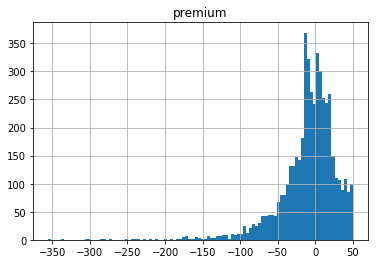

In [94]:
t[t['premium']<50].hist(bins=100)

In [172]:
drop_to_zero = pd.read_csv('./data_2/66997_Test.csv')

In [178]:
len(drop_to_zero['Policy_Number'])

1764

In [272]:
# test_set['Next_Premium'].loc[test_set['Policy_Number'].isin(drop_to_zero['Policy_Number'])]=0

In [301]:
test_set['Next_Premium']=predictions

In [302]:
test_set['Next_Premium'].loc[test_set['Next_Premium']<50]=0

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [303]:
test_set.to_csv('./answer/catboost_ans.csv',index=False)

In [58]:
# claim_merge = pd.merge(claim_policy, claim_table, on='Pn_IC')

In [92]:
# claim_merge.to_csv('./data_2/claim_merge.csv',index=False)

In [61]:
# claim_table.shape

(53769, 11)

# y值做偏態  predict完後記得要還原

In [62]:
# claim_merge.isnull().sum()

In [63]:
# claim_merge.shape

In [64]:
# claim_merge.shape

In [66]:
# t = pd.read_csv('./training-set.csv')
# g = pd.read_csv('./testing-set.csv')

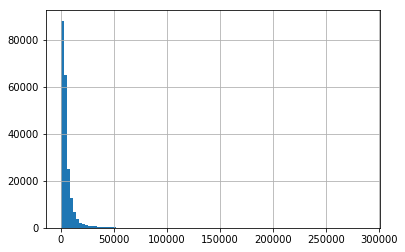

In [104]:
t['Next_Premium'].hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f615d553390>]], dtype=object)

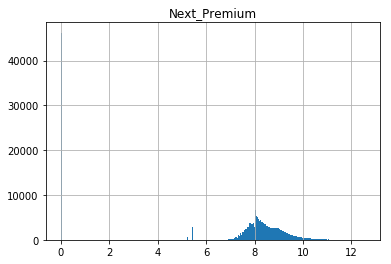

In [128]:
pd.DataFrame(np.log1p(t['Next_Premium'])).hist(bins=300)

In [132]:
noclaim_policy.columns

Index(['Policy_Number', 'Insured's_ID', 'Prior_Policy_Number', 'Cancellation',
       'Vehicle_identifier', 'Vehicle_Make_and_Model1',
       'Vehicle_Make_and_Model2', 'Manafactured_Year_and_Month',
       'Engine_Displacement_(Cubic_Centimeter)', 'Imported_or_Domestic_Car',
       'Coding_of_Vehicle_Branding_&_Type', 'qpt', 'fpt',
       'Main_Insurance_Coverage_Group', 'Insurance_Coverage',
       'Insured_Amount1', 'Insured_Amount2', 'Insured_Amount3',
       'Coverage_Deductible_if_applied', 'Premium',
       'Replacement_cost_of_insured_vehicle', 'Distribution_Channel',
       'Multiple_Products_with_TmNewa_(Yes_or_No?)', 'lia_class', 'plia_acc',
       'pdmg_acc', 'fassured', 'ibirth', 'fsex', 'fmarriage', 'aassured_zip',
       'iply_area', 'dbirth', 'fequipment1', 'fequipment2', 'fequipment3',
       'fequipment4', 'fequipment5', 'fequipment6', 'fequipment9',
       'nequipment9', 'Pn_IC', 'isClaim'],
      dtype='object')

In [69]:
# temp = [ "Premium","Engine_Displacement_(Cubic_Centimeter)",
#        'Replacement_cost_of_insured_vehicle','pdmg_acc',
#        ]

In [68]:
# for i in temp:
#     pd.DataFrame(noclaim_policy[i]).hist(bins=300)

In [67]:
# claim_merge.shape

# <50

In [176]:
pd.read_csv('./data_2/train_test_policy.csv')

Policy_Number  Cancellation  \
0        8e31b2f7864ddeac1be3a31766b0bf2c54908d37             1   
1        8e31b2f7864ddeac1be3a31766b0bf2c54908d37             1   
2        8e31b2f7864ddeac1be3a31766b0bf2c54908d37             1   
3        8e31b2f7864ddeac1be3a31766b0bf2c54908d37             1   
4        3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
5        3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
6        3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
7        3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
8        3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
9        3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
10       3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
11       3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
12       3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
13       3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
14       3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
15       3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda             0   
16       9864c955e499d1fa908f5dc7292054a232f01722             0   
17       9864c955e499d1fa908f5dc7292054a232f01722             0   
18       9864c955e499d1fa908f5dc7292054a232f01722             0   
19       9864c955e499d1fa908f5dc7292054a232f01722             0   
20       9864c955e499d1fa908f5dc7292054a232f01722             0   
21       9864c955e499d1fa908f5dc7292054a232f01722             0   
22       9864c955e499d1fa908f5dc7292054a232f01722             0   
23       9864c955e499d1fa908f5dc7292054a232f01722             0   
24       9864c955e499d1fa908f5dc7292054a232f01722             0   
25       9864c955e499d1fa908f5dc7292054a232f01722             0   
26       92170afa649706baf10774dc0a46e67617c0d50d             0   
27       92170afa649706baf10774dc0a46e67617c0d50d             0   
28       92170afa649706baf10774dc0a46e67617c0d50d             0   
29       92170afa649706baf10774dc0a46e67617c0d50d             0   
...                                           ...           ...   
1747912  ef507483165be44c207686b591a786a3f16885a4             0   
1747913  ef507483165be44c207686b591a786a3f16885a4             0   
1747914  ef507483165be44c207686b591a786a3f16885a4             0   
1747915  377445387d28933d7c4fefd47ca9af7f92adf044             0   
1747916  377445387d28933d7c4fefd47ca9af7f92adf044             0   
1747917  377445387d28933d7c4fefd47ca9af7f92adf044             0   
1747918  5507b79ec0706db272473efc6e1eb89e64ca3d4a             0   
1747919  5507b79ec0706db272473efc6e1eb89e64ca3d4a             0   
1747920  5507b79ec0706db272473efc6e1eb89e64ca3d4a             0   
1747921  5507b79ec0706db272473efc6e1eb89e64ca3d4a             0   
1747922  0800d2db269686d844cefcbc6117513bdc1842ae             0   
1747923  0800d2db269686d844cefcbc6117513bdc1842ae             0   
1747924  0800d2db269686d844cefcbc6117513bdc1842ae             0   
1747925  0800d2db269686d844cefcbc6117513bdc1842ae             0   
1747926  0800d2db269686d844cefcbc6117513bdc1842ae             0   
1747927  0800d2db269686d844cefcbc6117513bdc1842ae             0   
1747928  0800d2db269686d844cefcbc6117513bdc1842ae             0   
1747929  0800d2db269686d844cefcbc6117513bdc1842ae             0   
1747930  9d713bd1527037db5ebd20abaa7385e1686d17e7             0   
1747931  9d713bd1527037db5ebd20abaa7385e1686d17e7             0   
1747932  3e584df34e5f081ff235418143febd96a1c77156             0   
1747933  3e584df34e5f081ff235418143febd96a1c77156             0   
1747934  3e584df34e5f081ff235418143febd96a1c77156             0   
1747935  3e584df34e5f081ff235418143febd96a1c77156             0   
1747936  3e584df34e5f081ff235418143febd96a1c77156             0   
1747937  ee569955dc585b3ee4d457df5e73ac2b7b71e185             0   
1747938  ee569955dc585b3ee4d457df5e73ac2b7b71e185             0   
1747939  ee569955dc585b3ee4d457df5e73ac2b7b71e185             0   
1747940  ee56995

In [ ]:
trainset_df['car_age'] = ['NaN' if trainset_df['Manafactured_Year_and_Month'] == 'NaN' else now_year - trainset_df['Manafactured_Year_and_Month']]




In [55]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import xgboost as xgb

kf = KFold(n_splits=5, random_state=36, shuffle=True)
evaluation = []
Ypred=[]
Yptest=[]
Ytpred=[]

for train_index, val_index in kf.split(X_train_data):
   # print(train_index)
   
    Xp_train = pd.DataFrame(data = Xs.values[train_index], columns = Xs.columns, index = train_index)
    Xp_test = pd.DataFrame(data = Xs.values[val_index], columns = Xs.columns, index = val_index)
    yp_train = ys[ train_index ]
    yp_test_kf = ys[val_index]
    model = xgb.XGBRegressor()
    #model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.01, gamma=0, subsample=0.75,
     #                   colsample_bytree=1, max_depth=7)
    model.fit(Xp_train,yp_train)
    yp_pred_kf = model.predict(Xp_test)  
    yt_pred_kf = model.predict(X_test)
    #print('yp_pred',yp_pred.shape)
    mae = mean_absolute_error(yp_test_kf, yp_pred_kf)

In [23]:
np.take(X_train_data,[1,2,3])

array([    0.,     0.,  4780.])

In [22]:
X_train_data[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         4.78000000e+03,   0.00000000e+00,   1.67464794e+01,
         0.00000000e+00,   0.00000000e+00,   4.00000000e+00,
         0.00000000e+00,   4.00000000e+00,   4.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   4.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   4.00000000e+00,
         0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
                    nan,   3.63758616e+00,   1.79175947e+00])